# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

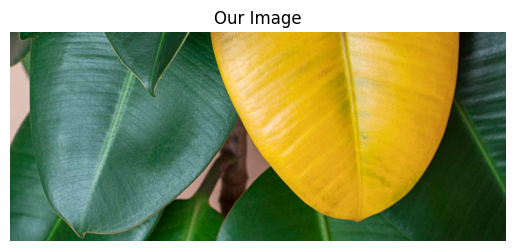

In [138]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [20]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)


Saving 213672_after.jpeg to 213672_after.jpeg
Uploaded: 213672_after.jpeg


In [21]:
import base64
with open("213672_after.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QAWRXhpZgAATU0AKgAAAAgAAAAAAAD/2wCEAAMCAgoKCgoKCggICAoICggICAgICAgICAgICAgICAgICAgICAgICAgICAgICAoICAgICQkJCAgNDQoIDQgICQgBAwQEBgUGCgYGCg0NCg0PDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDf/AABEIAtAFAAMBIgACEQEDEQH/xAAdAAABBQEBAQEAAAAAAAAAAAAFAgMEBgcIAQAJ/8QAUBAAAQMCAwUFBgMGBAUBBwEJAQACEQMEBSExBhJBUWEHInGBkRMyobHB8EJS0QgUI2Jy4TOCkvEVJEOislMWJWNzwtLiCZOzNESDoxc1ZP/EABwBAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCP/EAD8RAAIBAwMCBAMIAQQBAwIHAAABAgMRIQQSMQVBEyJRYTJxgQYUQpGhscHRIzNS4fBiJHLxgqIVJTRTssLS/9oADAMBAAIRAxEAPwDni3pyVZ7HZAvaTnkJEAfFV63EFWi02rhu7x819MPi7ZXqD3MdkYLTMjojGI7UPqUyxzaebt8uFNrHk6RLQBHSEO3ZJK+uBkvWXJa4EuWZp9tlkpDaMo1Sscl4vusVOvTyI8kIrUzyy4o5Xb3j4/VQ69+WsLBG64ycll6hZTO80rtx6IF00lwTjEgpexs9ht4XrahCW5iZLVZKxKY60wQV0F2QbcU2N3XQFz5UTlveOaZBhFhLbkHUW9HTXaFilKs2GwSVg3/CGsqEVBE6KBQ2yqA5lD8Wx11QyUaU7gadNpjmPUGA9xX/ALNO3J1qN0iR4/2WUuUO5pId7ZGqq8puPar+0ALlhawRI/TosAe+TK9NJG9mtnGVd/fuGUCyCN8EgzPLNDnPc8mbGlLfcG01It3QfOV8LIyYIduzmNCAdR0KVTUNnSU1ixPqXxq1QXngBlwAEcI4BWTbTB6L

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

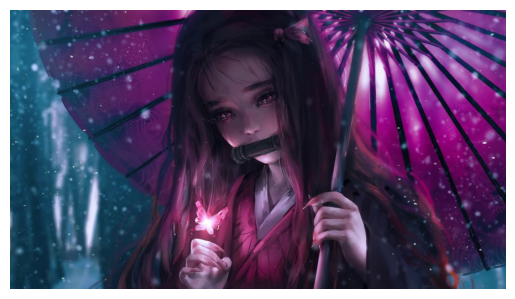

In [22]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4QAWRXhpZgAATU0AKgAAAAgAAAAAAAD/2wCEAAMCAgoKCgoKCggICAoICggICAgICAgICAgICAgICAgICAgICAgICAgICAgICAoICAgICQkJCAgNDQoIDQgICQgBAwQEBgUGCgYGCg0NCg0PDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDf/AABEIAtAFAAMBIgACEQEDEQH/xAAdAAABBQEBAQEAAAAAAAAAAAAFAgMEBgcIAQAJ/8QAUBAAAQMCAwUFBgMGBAUBBwEJAQACEQMEBSExBhJBUWEHInGBkRMyobHB8EJS0QgUI2Jy4TOCkvEVJEOislMWJWNzwtLiCZOzNESDoxc1ZP/EABwBAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCP/EAD8RAAIBAwMCBAMIAQQBAwIHAAABAgMRIQQSMQVBEyJRYTJxgQYUQpGhscHRIzNS4fBiJHLxgqIVJTRTssLS/9oADAMBAAIRAxEAPwDni3pyVZ7HZAvaTnkJEAfFV63EFWi02rhu7x819MPi7ZXqD3MdkYLTMjojGI7UPqUyxzaebt8uFNrHk6RLQBHSEO3ZJK+uBkvWXJa4EuWZp9tlkpDaMo1Sscl4vusVOvTyI8kIrUzyy4o5Xb3j4/VQ69+WsLBG64ycll6hZTO80rtx6IF00lwTjEgpexs9ht4XrahCW5iZLVZKxKY60wQV0F2QbcU2N3XQFz5UTlveOaZBhFhLbkHUW9HTXaFilKs2GwSVg3/CGsqEVBE6KBQ2yqA5lD8Wx11QyUaU7gadNpjmPUGA9xX/ALNO3J1qN0iR4/2WUuUO5pId7ZGqq8puPar+0ALlhawRI/TosAe+TK9NJG9mtnGVd/fuGUCyCN8EgzPLNDnPc8mbGlLfcG01It3QfOV8LIyYIduzmNCAdR0KVTUNnSU1ixPqXxq1QXngBlwAEcI4BWTbTB6LGNNNwJOoCquI2W44DeDsgZHCc48lFq1TzU3wW23aYQsdo6jBDXEDkCotbE3594w/3hOviopC9C9e47Gy7HwK9XgSmhVaG4vAtzYJgz1SHpTaa9lVQa1xllueCU1qs2AXLA0yJKr99UBJhTtxcFGWbBSzxNjWEbmZ4pmwtt5wBMSh1BTbapBB5KLZHqcbLAZx/Cww93SBmhFMIjeYvvCEPaVSY9STtkl2lQAydAtE7VNkba3ZQdb3VO59o1pqNG4H0i5jXsloe527UG9Bc1u6WwZKzJj16UO7G1F3TH2vSw5RgUsPREaMWTKb08HqGxyUaiPYZTJTqqS6qoj6qR7ZWRKkiZUrcvj/ALn148goz6qadVTbqqKgbkj6pVTNSok1Kij1Hq6ANju+vDUUV1VfComTyZPY5Sg9DaVRP0noseTRo8he0rI/hr81WbNysGHPRnwbtE0zZWpmFvOxdxkPJc8bNVc1tuyV+BHRYeqM/qMbxNkfjAYwucYDRJPIDX/YLL6W0Rqudc1e6wZUaZP4W6E8uZ8ghO121ntqjbdjhusg1vGN5o8GiXHqAsk7UO04Ammx3dZkOsakzw49UtCmc3R0qiryx6hbtI7UTUJAPdHGYnTPoJ0C5324281DfWUE2r2+3yQ315+SpF1eTqjOSirIydZ1GCTp0eF3GL6qXEkqC5ifqVFHdUSEpHDVaik7nwSHuSHPTRqJaUkL3Q4ai9JTbWJbGoTZU8ISmNXoavVUshykU4aijuX28oZpQnZYHjUTbqiSXKNVqqA27A3c1lHIT5CbJXgOBAavdxKNQJPtF4ruifbq+LUkPXpKi5O5CgV4XJBXwXrlbo8c5J9ulkJs0lJWVxTaiWEwAlNXgTZJ3koVE00J1qtcqfCsnGV157NeG3XivBIZVRrB8VjunTmqyMlKpXCmMrExm4vBfa1ORkq1iQggxqncJxeMjpwSMcGXxBRr4C1Gpq6Pabk4AhNpeRkijZXribhck0KsFF7GueE+SHULedUVw0QRH3Ij6p2ldBaGlnuvexMp4qQljFxyQ/czhWTA8ADzHPmtCMmzptHp69d7VLHuRRdteptlseH8Y85Wm7P9llNzZdkfvqo20ux7KInfjkBOaLFKWGdHDodK160Yy/QrmD7CupVG1Kb2lzCHN9owOGRnSdFpu0nafcVLd9E21E77d0vDiR/lYQM/NYq7aZ7XEMe6BzM/BFrbbyrx3T5D6IzoxYKHUunUG4Ri429LtFKxqm4uJ9m5vOQ75ECPRBqN25hlpII5HNaw7bvLvU58D9CD8woON0mubvOt3Nb+Z1PLPq3T1QKlBvuc/qelw1tR6ilqfM+21r9rFPpdoNYe8BUHXI+olTqm11GoIfT/ANWvk6JU/AMPtTMmDwgkfAqsbQYUC87jpbwkfog2qRXNxWGr6lp06W6NWPFnZ/uJvcGpuzpkt6HvD1GiVh13Xo+6SRyGY9NR4hCf3R7dOHIqXa4y9sbzJHQR8pQMXu1Z+wlGpTU97jKlL1jx+RYH9o+93X055gH6EIaDScZpuNMn8LtPI/38lIt76hU94CeZyd6hOXOyYObH+Rz+IKNaT73NOvT1VeN7wrR+kZL+Qc+5cMnCR96FRqreI80qtRezI6eoUXfVd1jnq2qcP8c017PlfUvnZj2h/ulQOWvbZ/tRmpSLGSMon7C5mhJBRFVElUjOeeAhiOJGpULySZhQqb9ebjHgBqkAxK8puPDU/BUckw3i22xXvwTmn8LTnxPIfqvKr47rMzPp1PikWdDgDA4u4nw5qd/w4xDR7NvEn3j16eanJpwquassdsdl6L092yAw7pk5k8sz5D6qUcNdUzcd1vBvE+PAeaaZeMbk0b54nj6/opLcIq1Ne43r+gMlRdMvGUf9OKcv/GPH/wBUhNS8p08hBPTM+unooFTEalTJjSPD6nIIsMBpM9470c8h6frKTX2kY3JrZjl3Qp2vu7fIcdKdkq0404/7Y5f6ESz2QJze6OgzPmZVgwzBqVPM7viTPz/RVutjFZ/ugj+lpJ9VFp4RVcZIz5ucP1VFJL4YlFUpU8aek5P1d/5Rpdba2kxsDvdGjJU6vtW57xAAE+from7bZiodXNHhJUxmx7Rm6p6QB8TKNerLjApOPUq2LKC+aR0TT2qtP+HtDXk1C2KjXt0M6g8QufaRpEunyXwr0miN+Ry3nEegTJxykNG+jY+avJXxJoyKnS4t3rVoJ+zv/IPt7xzXdzeGfCR8v1Wi7Pdqt6wAGarRwqQD/qMfVD9l8Oq3O97ClvbkSC8NnwmPmg+K3dWm4tcz2bm5FpGYRI0V63NfTaWlo0qiqTa7WWP1LdjW1/tp9pSZnw9/6D4LP62zDXOmd0cgP1UG7xV+fePkAk4HioFRpqbzmNILmh2bgDplwOmSDKdO9mi9fq+n1DVOUPa7srB2hso2OJ8/9l5VwgM5fVbhs1jFpVzpUWAcuI6HQo9f7O0qgA9mz0Tq2LsbUOlU3FOMY2f1Oa615HEobc3jua6BxPskY7NuSouP9lj2cJ8P0lX2prDMzU6KvFNQePYyqrcFM2tQEw47vVG8VwFzeBCr9xZkLKrKcXk42XiUp2qcmk7P7C0qmftAfCP1n4K3WnZrSH83XX6hYTZXz2GWuLSOIMFW/Bu1auzJ0VAOeTv9QAM+Mqkase6Os0XUtEsVqdvflGt0NlaTfwN9FPpWLRkAB99FUcE7VaFTJ5NFx/NJb/qAj/VCvVtWDhIIIPEGR6hPxcXwd/pK2kqq9FxfyG/Z9F8Gp9zEgNRlE1FbsNOo9EMvcOa7VoPkrEGqFc0c0dIWkoy5SKtW2OYdBHgUKuNhuR+H91eWtXoClCstNTl2M4veziqBORHWR9HD4hA7rZGsP+mT/SWu+DST8luuIY2XtDd0CEFNBXE5dNpTXdGLPw9zdWuaeRaQVHrE/ea3WnQCg3eA03e9TafIfRVtcxNT0LxMKX5mGNYC6HO3AdXQXQOe6Mz4ZeSjXbGhxDSXNGjnNDS7ruy6JM5SclrGM7FUeDS2eTj8iSFW7ns/H4ah8xPxBHyKC6L7HL1fs1qI5gr/AFKbaWxcptJpH4ojkYRj/wBkKjZ3d0+Bj/yhCL7Bao1Y7rGY+GSBKEkYNXpusovMXb2I7cfqg5VHZczPzUyhtpWHFrvEfUfOELoWmfeEDrkrJiOCMDJHwQHOa4ZWPUNTRdlKX5/2LtO0I/jp5c2Gfg4BGrLtConUuZP5muj1AI+Kzh9meSZhV8eouTd0/wBptVSVpWkvdf0beHpVFuaTQpSVZcM2dJ4LTPjzRCY2Ah97VhWfEcO3RoqpiOiq3ZHor1ItK7zRujieSqz197c6ShphpQusE24fmTzP3oh15RlEK9QZjdjTRxIEa5nPP9V6x8aj/ZKVVdHYaaWISQD3ITRCl3rgSYUVKo2VMkf8Odu70ZKA0Is3GDu7vBDHtRmkWUn3E1CvmUZXr2Kdh0TmoSDdiG+wKguar822aWqpYpRAcrOJWDyDXFRK7lLrBQK6h8HtRU2o8DgpLHhD20pKfrWrm6qEgdDUpO1ibK9ZTH3wTVJyXKixvRd1c9FNJ9kluKbc9esGwHrHZbeZvIFXtN0kcFOs8ec0QDkmGVw53eMDjCvgpFSTuyI5T6140sY0MAIMl/E8goFxEndzHBfNcqtDsHfkl+0RuhsNUcz2kd3VVlWO02uqNp+zDsuUKtl3DNy/CAar4kcdFBe1S6oJJKZe1SgjhgYtaiI03ocympTFRhqDsTmJbXJlhSpUM1IDwXpSWpbig7R2J8ClByS1P0QJzRIoZgxIclF6cuw2e6peB4X7RwbzR0MKVlkg4hbOZAc0tJAcJES06EdCozXytD282ZqEB790uAaN8Maxzg1rWNDtwNB3Wta0SMgAs5LOeXRXUfUBTqb8o+LkjeXjqg5pptQFSgjke1VEenatYDiPWEMuMWYMy4eWc+EK9xaVanHmSXzZLcV8Cg1baimOJPw+aH3G3TRo2fE/2V3Xpx5YlPqmmhzNFvapTCs1uNvncGgffUFQKu2dY6Oj75Qgy6hSiUj9odNB4u/ozZbaoiNDHWN95wauf6u19c/9UjwgfRRBeVHHNxd1J/2VJdUi1aKGX9r6UFaNNv6pHXGGbd29MS+4pt6F2foJScY/afpUm/wYqOgw4h0A8Pw5wuS6dq88Y++ifo4VJ7ziRx4pWWpnPiJmVvtZWqYjTS+eToPBf2liKdUeyl9Sf4m8REmXEA72uXhCyzHds6lYnOAeXH5ZKtOIGQEBSKK94snh/U57U9V1Oofht/O3BJCjVHp171Fc5BlKwhWnZbY9jwuTL16XpCRlITGXuSWleuKW1qGTYdDE4AvISnM6Ecf7+CgqJ3V6Qvt9J3l48e76QV4So1e9jRQxmD9R6tcAKI+smISw1QXlNvgUQV4WdUmF6ymvAtrZ4AF6Qli1PJeOoEcF49sZ8Gr7dXhKW0KD2VwxLaaUKSdYviFDDIZDF5CeXm6rF5MZ3F82knd1fbq8AbEBqUClAL5eKjjXJ1rlHCUCpRV5HimjS5ZL3fXrXKSoppKkuuDEcF5QolTxh2SsiN1gP7NG8KueBSLbBXPduMaXE8uHUnSAtN2P7NGsh7++/gB7rPDmfTwRI3uN6elKpJNIrdrhjjwMnQK34Nsc4EPe2WtkhsxvGDGfCDB0M6K+4VsmBBiDr9yid/agA/fJNupY7PT9Oe3czn8sLXkHgVb9n65CC7a28V3cob8lL2dvOBTennkx+n1lQrulN2zg1a3213WjXeiPFZ7tbtPWqPORE9Mz/ZEKgiCBITj7hjxPsg5zdRzHMfUZrWUVydrqoT1ENkJ2KDSpOn3Sr5sPssarhLMiYBfAYOZOYJHCFGoXrAe9aiOJlo/+pF//AGrpNOVLcA/mB+AMq223c5Sl0uhp6qlXq/msHSmxGzthTt2te2g94n2rntEkyZ1Pu8s1lna7tvZtY5ltQpExBqhvgAGNPDmSq1ZbT0nDSekfrHzULF8QpQT7M59G/qllTV7tml/+I6KlfbWjf2z+xi2K3Jc6cxwAygeAUJ1Q83ecrTLK1dWJ9nQ3gDm5zg1o8XQZM8BJVrqdkl01ntDbQ2JLnObpOobvAoM6Cb+I559Ferm6qrNqT5UGk/lwVjB+x8mh7apf0KDizfbRkvcQRvBryDDCctN7MrOaWObroc4lv4pidPDgYWh4tirGdyo4AjVoJc3yMKvXON240AJ6t/UKjhtxuNOv0yhQSVOuoyXN3e/zVwfRxq3dAcGnqWnXyXl57D/puc3wLgPR0pqvjTDwHSGj6BRX3wP4SR4Be3e6+hmVtRBxs5U2/VRz+aYmtWP597pmmJT5E6MjxXn7v5IEjmK95cZ/P+RpwXoanaFGSp9S0hAMSq7OwLdSTlrhrnGAptC2lFbO0LMxqrpC6quLumBvbGkYyn8zs48BwCRWr75z36nT3R/svMRrmSST5AH5kKJSuW8alX4D9Vfdk6OhUjNeZ/sv5CtrSePdbTp/E/X5Ka2zkQ+u6OTYaP1+KDUqtHi958S8fKFNoi2/k/zbxPxRk17HS0NjXxRa95/wkh99tbjiHH+ZznfMwolbH2D3WDLKcgPIAT8VNFG3Ons/ivjY0OVP1/uruL7WGp05tWpSpx91z+oHrbUO/lHgCf8AyyTH/Hnn8R8gGj5FHKlpbgiQzPPKT8QSj+AYHQqODQ1jnHIABxJPgFCpzl+JCEtLXqvYq8b+lyoWr3HUnzJM/fgty7GdirO4pvp1mzWJkd5zSWx+AggSDMzOUckNobHUWGHU2tI4OkH0JBVgsLSizNoa0jQh2n/cnFS8trjWl6ZLT/6k4yuZt2ydnbbSsGseXtcN4SBvN4QSNfHis5pW623ahlKoZduuPMuk/wDkg+GbOUXH3KfqP/uQZ6ZvKZk6zoinNypTil6FT2Ux6pbvD2PLSMuh8QZyWy0NtrS+YKd01tOp+GqDBB/lcM2/0neaVXbvZKiB/hs9f/yVWxCypN0Yz1//ACR4U3Hlmlo41qMPDqSjKPb2AW3ezwoVC1tVlZv4ajcgcpII4EaakeCp7X5q41alEmCWeElOswigeFP7/wAyXq0d7umZuo6VCrU3wnFX7N/yC8Ext1MgtJHUarVtmO14iBUE9R9clnzsIpjgz1/ukOtmD8LPX+6bhGaVpDWjhqNKtqnFx9Do/DduqTxIc0z5J+8x+m4atXN1LEg3JsDwP6p47TEfiV/KdHHW00vNa/zNgxrCqNUwWtPzVLxrslBzpvjo6D6Krs2uaPxD4rx23Df/AFD5bypJ03y0Lair0/UR/wAyi/qR8Q7K67QTDXAZ5GD6KoewjpzV3/8Abpv5n+U/UhQnYuwmfZlx5w2fWUo6EJPys5HV6PRSt4E9vzvJfSxVwxEcNvKlIzTe6mf5THw084Vjtrwn3bd3+n9GFSTaPdHtKBDdJO9llzgfJNQ06SwDpdK2+anNuXtGSX5j+E9rFZv+KG1RzyY71aIPWWq4Yf2k279XGkeTwY9RIWcYnhgaSAwACMzOfxSLnD2ezBEb/GJ5kRHgJlHVNo39PrtdQbhKSko+v8dzbLLGWP8AdcHRyKfrPWGYDcVGO/hvcwnWDIPi0gg+i0LCtrqjf8Rjag5thjx5ZtPluBXXubWn63Sqf6is/wA0Wxq9Q+32kou0fuH8tQbs+Bzb8VOc5eN+lXp1VenJM9Sd1J317KsGaHWLysvAUrdV0AngDXdGSorbVGK9uobmqbldwOdQSrTCt8wAphYp+BXO48E81DRWdSyxyGaHZFUcJgnx/uq3j+wopmKlJsc43T6tK6Q2R2ypFgmBkqd2sXtFwJESl7bnZmDJxqy21IJr5HOOKbJUT7pc3wM/+Uqt1+zh34ag/wAzSPiD9Fen0RKfp0F50IvsNroehqc019G1+w7hZE5rUtkqjYzjNZJQmckdwvGnDjovI/L8Htdy8bY24Ay0WYXlIkwBqrjfV95upJ4jgB4prZOo1tQEmIOq88lpSvLBnl1akHMEJgU5IjNaZ2kUaWoObsyepKpVrs3X9ma7abzTYf8AEAyHBAcbB45uDqQg6eRTzKcg9M9UhtWTJznMolhWC1Kz3CjTdUgF26MyGCASZInMjISc0GeEdDoZN0f/AGlarhNQpV/QLXFrmua4atcCHAcJBzUdyRjk6FO4gNSXJZaQYIg8kioxEsWC1phbSzemELJhetqnmkIrCw5JlvjBGS8q4NUeN7dMKRs3Qa6q0O0ldLWeA0zSgAQRyRIQ3K5SVTazkW7MGNFBraK2dpNiGVnNHkqm4ZINxOrV8Rj+D4Uajw1upVo2g2WqU2jeGgKqeG3xY4OGoR7Fdun1GgHwUpqwOjF70+wKhIfUSrdhcYAzKm3+FhrczDuSi1zqVUSQP3k2568p1Up5Ul4yuN7y+aF81iWCvWDwPHBOtO7wB3gmHuSCVFgyHablL/dS05iDyKgNqKW25c4zm48ZKo0Nwnk+I1SdxLcvKTo4KPYaIrwnGlKuKkpkOU2LxaXclsenA5Qf3sDikOxdo/EF52GFqqUPikl9QvSSy5AKm0bRoCfgotXao8GgeJQcJg5dY0kOZ3+RaQ5OGoFSLnaZ8TvNAOWUITW2gcfxOd0kqniRQs/tJRXwxb/Q0W4rwOHmQPqjOyW11Kk8E1ByyG9wI0g8PsLD6uLnl6kpkYk6ciQoeqS4M6t9oq001Tgl83c6x2x7U6JpQA5xjXJvwcJWCYltxJMNaM+Lp+QVKr4g52RcT4qMaPRDlqm+DFj1PWJf6lvlFFjq7Yu5j/K39ZQy62mefxOI6n9FAbZE8E5RwwkxxPP/AHS7qVGLy1dWfxzb+oirfuOeXz+ahVKxPFFP+FZkHUZEDNSaWzzjpTcfh81OypIpFOfEW2V8leNpk8FbGbLP5Nb5/RSaWyB4vHkP1KtHRTl2NCn0/Uz+Gnb54KW6zKU2x5z8FotpsMwnPfM+Q+Cs+F9nlKP8NvnLvnKbh059zUp9B1M/icV+pjVG3HSfET5BGrPZ6o73ab3T/KfmYHxWy0tnQzRoHgAPlCI0KA4p+GjUVe50el+yMZeapVf0X9syB2w9ZrS5zN0D8zmg+kleHZNzKe+4gcYzmP7mfRaVtPdTu0x4u8tAqbtdiMw3hp5CFWrFRRHUemaXRwlJXdlZXKQLNeh6LPoiEGuHQspu1zgKMrXPKtVRy7ovQOK+KXnIK2NynGhIhOtKE8ooJ3F7C9lI30M8LC9fUlNb6+FVeJsLJTAqJL6yaLpXj1mxurV4JlrVObYqXStgqsOog9tAp9mH80Q9mEvdXgyikQ22wHBKClGmEh9LkvBbjMJBq+C9qWyZNt0XiHIQ8jkmTTU4Uei+axeFm7kAtXwCnGnKbdbleK3I0r72ieB5hL9iCvHnIi+2XvtV7VpLxtMc1Vlbnm+vRUSzbdUn91Kg9c9FRfNelU7Nx0aT4CfkvK1q5urSPFesWszwFO2zZUamZMBG8Nwc6uMD4okckKm5cBXB7KVfMM2De8AuHs2niYk+An5qvYfjjaQhjBvfndn6BFMO2seTLnEnmU0mkg1PSq95/kX/AAzZtlMQ0ROp4nxV3wDZ9VXAMaaWguIEc1b7Pahg/F5BG5Ox0/h0Y3YerWgYNFUcUuRMIzfY8XNMAADis5v745u8ZzUSjYLLrFO+0p23bf4s8wEMwl2ak41c77504Dqo4pQrUnZnL14qpUc4lwZccR4FG7DDWkb2kZEAwQevMFUfCLnOCVZLOs7hn9RyW5CV0fROmamMqS39ghtAaDaZfuN3mxLRl72QOsET4R1WWvxoF2gaOkmFYcWaHEtcZ5Ceo/T5qC2xojNrN7mIc7dPIyY+CipCUjD6/wCLrP8AHSlCMO97Xb/K/wCQ5YbStB18lYsMPtjmH7sicnN3vAwAB1lP4Ds7WcJZbEDmRujwyj5rTNluyy8qZhhDdJdDRMDLWTnpCvGmo5kzE6f9m6NOoqtaTkl2tZfm8hvs5vaFu5pe2WtBDGtBIaeY5nzlSu03tV9pTcxncaQNZ3jxz005Tms97Q8NqWkg1pLRm1jhk4id0kcVk2I7X1H8R6ST5qrpR+NnW67qem0TTnG2Md7L5EXE8LBJLnuceeTfhJQerYs5T4/7pd3fPdq45qG23d1jmUvJxbxE+eLWaarNunSb93n9WPgtbyHgvG4gNACfCR9E0LVo1MlWfZ7ZmpVEtAYyY33cTyaBr9FW79gkalStLZBqL7JLc/0wvqBqVF7vwwk/8NdMctfuVpmw3ZLWuXvaHZUyWucMhl5+vmgG1GENtHupg75Gp4eiWnF8mNqpXT27rru+/wBCmexLTCm06kqEaxcZU6mEKJzcw9g9HSURxQgBCsFuQHCdFC2pxYb0N0TaygUKbnOwMu7oHKA7oZB8iodO2puyJNM8A77HzCRf0phw0PrPLopNOpA7w9qw6HiPvTmhJep2emppPZUSxnOU19Mr9USXbOVAJa5jhwBAz84j4pipScwd+3puHMZD1BPyUyywzKaNXLi05jwz0U60xZzXBtSmQTlvNzB8v7o6pp+xurS0Yq73Q90t8fzs/wBQHSvqB1okeDifqnm2Vs7Rxb/qB+IK1DH+yaiLdtd43N4SHNy8zu5DzCzu42DnOlVbUHIxn5g6+QXnTkuyYvClUnfwlTqr2Si/yGaeyc+7Vy4SJ+R+gV/7KaT7W4p1t1tVrZ3mzuktcIJaTIDh1Kz6vs6+mC4NLCzMmfkQTCLYJtLUA3t8kDmB+ko9OCTs1Yu4afS1U69FwlympXR1vt/eWl3buIEVQ2aRLTvA5HdJGUHTMnmuYcWqubMgiOYI/siGHdpjtCB6kfQq64hgtY0G1zQf7N43pEPIGgLmgyAYyTcYqK5NKpChrYXpz/Qw68xCeI+/Vap2IbP0bnfFQw5sENBgxnJ+9FUsVqUSc92R+YfWE3hFVtNwfTJY9ujqbiCPmPIhDVKSfJj6TpT09XcpxnHunhmp9omwpt277ZfS/NGbfHmJylYni5Bn4eC0jF+1GtUplhqB0jdJc1pn0AWTX+FvJ7r2+ER9VFZS225YPq3TJTSdFZvlenyBIpicgPRaXsPe2b4p3FuxpMBtQOe0E5xvBpETlmq1hOyVSJLZ8CP1TOL0CzVrh5fVIU91PlHO6WvW0dS0qe5PDTX8m/8A/wDh6zI7rCJ0IqPPxLkExvsIpEfw6lRhgwHQ5s+UED1Wc7DdrlS37pPtKf5SdPA5x8l0HsrtpSuGyxwJ4tOTh49Oq0VUTWDvaH3XVwvCKfquGjmHaTZSrQduVWFp/DPuvHNrhLT4AkhCLnBXhu9umPX/AH8l2RiOE06rS2pTbUadWuEj4aeKp+3vZm00S23IHKm/PyD9fWUrWpXyc1r+i1Yyvpldenc5Utb8tdO610cHgOaf7rRtj9sbVxDKtClSfoHbog+cQPM+YVExjAKlF5ZUYWOHB3zB0PiFCNHosuMp02LaTqFTQTcXFP1jJL/5R05b2dMe7TZ0gD7/AFSqlISMh6D9Fg+y22Vahk128wf9N+bfI6t8vRa3s52gUa/dJ9k8/gedf6XQAfBblGtGSPoHTusaPU+VJRl6P+H3L1hVIQp9TDQRBEofZuVrs8MJEpxuxsVJKOSqXOy1M5Gm0jwVZxLsvpOPdBYT/mHoTPxWk1mRkpmGUWcdVKZlVnCXxRuYxR7OKjDIaHjm3X/Sc/QFEf8Ag4gyII4EZrYKdoJyCk3OGseIc0O8R9dVbcYlXRQn8ODmjH7KJyVYo4tUp+49zRymW+hkei3nars4Y6dxxZ0PeH6hZXivZ3VaTLZHEtz+GqvdMB90q0vNH9CPhvaOfxtB6tMH0/urVh21tN+jxPJ3dPxgH1WT3tluk9Mv90zRBkclWzQxR6rXpYnlej5/M3ynU+/v9FKbUWUWOLVGgbjiByObfQ/SEXt+0SMqlOP5m/8A2x8ipTNKn1rT1MT8r/P9S83Fwhz35oZa7S06nuPaTyJg+hTwqqxsQ2zV4tNfMKW9rKn22F81GwfEANVKvcZA0heBziyVf3e4BulVrEMXc/IlNX2IyobailCqp2yfewlTre3TNui9q1Q8DtOVgBVaAcvsqZYuzlQ7ejJRu1wo8Alj8mBi3I3VXMWq7pkKz4js1Xo02VKlMtp1gTSfLXNdGoBa5wDhxaYIHBVqnhxqvDAWgunNxgeZUXXKLR5AF5dudrJA1R607R7htsbUPAou1bAnWdYlBr+y3CW7wJBIMZjLqo9u3PNDDqVlgU2mjGEbRGiWGmwB43gXEuk78DKCCI4KDVGpAIHqoVw3NVnFWNbpsrylB9wttHthc1WexrVn1WMO8xtTdcWH+V5bvgGT3Q7dM6Tmqm9FLk6dRmmcMwp9Wo1jM3OMCTA068FnqNnZI6aDtEhXNJwMOGeWuqSn8RtXMcWu1aS0mZEjWDxCYDUSxbfc8DF61qVK9AXg8GIp1N0ghXy07Y3MZu56QqFVahNy9ETsitbKyObQ4yary4qC0JvdlEv3YBsoEeRGjHdIgbqbnNeV0gL1hhTV7Fls2AQWnvaBWvaTs6LaXtXVJJEx9lZ0ytHFTb7aWo8BrqjnAaDgjo0rYwyDY2Rc7dGqIYjhDqeThCH2mIbjg4cFOxvas1IkaKMIItQovlWIvBNUQJzUV2IKO+7VN8UElr6a4ClaoOCjl6Gvvkw+/QZVUgMuqLsgsaqO7O27ne6JVIN8VqfZXjTARvKKdRSdhKv1Soo+VWBOLYe5hkhL2TwOjcbwqXlK0c05e0gh7YM7o3m94GMpzB05aB2g3FNze7ErAL+i6VFW/YDT6pXqYvaxNvb3Mw4OAkTmAeonnqoD73+ZMm0J1UmzsWZ72fJA3TZWVepLmTIVW/HVMjFByKk/uA5H4p9mFcm+ZIVds2XjTlU4Tf0AlxiJOQyUYUnHgSrXSwQzoAilrskSJk+QCt92kzRp9P1EsKFvm0UWhhLnEDIcJJyHjEqRdYHukt3mug++0ndcI4TGXkrqdnWAaE+JKJYRgDXEjda0BpJ45AdeZU/dUuTVp9Ery5kl+pm9HCPE9AFOp7Mk6U3HxP6wr6zNo7oEToIJkzn5otsvZb5zHHTRMR00TRh9n4pXnN/RGcUtlnDUMb4ypzNleb/9Lf1K03abZtoCqIHmiKhFdjTo9E0t8xb+bANTZ9g5u8T+i8bhrBo0eko9UZqh8q6hFdjQXT6FN+WC/IZbTjgAnqbUo0kkNhGSSHYQUOEOGmvYToYlezTCGkrkiyqAR0VosMVCq1KmpVIoqQ7Cmpcl2dcgg8UMfVhCaVc80jEL6GnwQpuxo05eHFgLEL7vOd6eAyVFvruXEozjNxlEqs1SsqvM+Zda1TqeUddeIbUfJSqrk1vwsuUjlooU96YdUTbynKFBLN5PMVSCdcV8EgonYg+c/JNNqpu7q6DootSqgXLWJJqcVHNeSkh5KfpMUXLDtGnKm0mAJFCnCcDl48nYdC9hIa5LavF0z4Je+kr6F4tc+3l97ReLwrx659vrwleykFyrc9c+dVTZrpRqJtzl5EHgrr32qbLwvC4KxXB4XSmS1SBUC8qVlDK2IdR68C8rvlIa5VJHqZVw2TwZjiO6C7XPSOccwqXSuYIMTGcK34Pie44OGhgjqOIVkO6VRbuzQq9gGQ4DJuTo1LTHyOaViWEteIc0OB5/Q8EDxvaLRrTkRJ6g8ClWWPH2LiTJbkD0/wBkxc33Om7opn/CRSqPAJMe4eQ4z1GilF3VBLjFSakiTGXjOZKK275CGjDjKLb2jzSiOH0jMHghFVjuBhO4dUqAwI8SR+oVr3L9y7WwdwVjwu4cCJCr2G0ahEmTpkC1XTDLYkRojxZoeFvVkWCm6o6k97WOcynAqOaJDN73ZjMA89FUbq/By5q77N31W2eKlJ/Ah7SJp1GnJzKjDkWuGWYyWXdot9/zFR7aQosqOL6dNpLmsnVoJz96fKBwRXLsZWq0c6VqhGxKhr6hQ6dWQnmXW8J5qKzJxHNUTLp2d1wPtqwrPheLBuvJVO6ZCI2j5HwWnRn2Nrp1XLgz7F6e8e7xOR9J+HyK1Lsu2LaKm/UaHGJNNw7jhBHeB0I115Km4JaNmTqMvDwV6w/a7cILQd4ZHl5njI6LSd2sHZaXQQj53Zv3N22gwMUXndALCf4bojlLDrulvxyzzQbEe0V9KkabCGCCWvMEwSd4AcfHdVXxfb+qXPFWpusqtY57WgfkBDgT+IcY1VCxbaSmwkA+04tc3RwPGT6EDQgocKTlyGqTjTj/AJGsepVNqnVbh34n9SABzlx4k/BVqpsvHvOz4NaCSTyyVxudoH1DutynRrMyfNdJdivY6y3pi4qtDq1QSCc/ZNzgA5jePE8Eeq1CN2cjW09HUzc2nL3lx+Ry1V7JbsM9qLR1On/6lUgR/kkuHm0LPcUoQ4gmYMTmJI4xwXbfbx2iMp0H0md5z8nOzhokHLKST45LkC0wN1Z5IEk68h4ngk4xdSPoZnV+mpUYQpX8ST4XG35diuUrVzjEff6LQ8J9s2iKZqFtNpcZDWh5DiS5odEtaZOeZjSFadl+z8AgAB7znpkBzH66q27R9mT6QHtQBLd5rQeA1LhwVvCjBZ5H+j9Cjp7yqu82uE7K3uZvh/atUoN9lRBY05ZZSNddYmTmZ6qt4jVNTeqvJLjMSil7ZBznVDAptyBGQIGQA47o8Myqbj+P753W5NHxWXWb4Od11KNKpOtUd74iuPrb0IdAZojbhQbRuSJ0KarA4WXmkN1QhgZLoKL12IUynmmVwbnT9PulcdosA7p0KVaWz2OIaN7KY4EdOoX11R4jgjOz1XeI7265ubXxMdSOI5hMKFzqI0VUrKnxJZi139gacLLv4lEkO/EwGDPnl66ohgG1ZB3ard7PUDvA/wBOnyKTtLiIbWD6bPZktAqM/Dv573i10BwRZuEMu2l1IinXaPdJiTw8ejoy4heWHZBKc5+M46aVqsXmHaa9k8J+xbdq6Fe5ptFOqIaPcIgHlyIPDksrvKD6ToexzXeJB8Q5uRC7k2R7MLfGrZn7q793uramGVmkblW3fEA1GTFWk5wMPbvtc2DkclzhtFcmlVqWl/RayrQeadXLeYHjw7zQ4Q4ObIh2msFhJTb9TQ1Oi0mpqbqb8Op/9rfuvw/sVfYmpc3D/Z0WfvLgAfZOhtTdmCWnJrgJzkEo5tBse1hDbii63edJluf9Qyn+oI52UsFhfUbulFWk3ea9hOYY8QSx+ckGDB1XXW0F7ZYnQdTcG71RphtQQ9jiMnNdoSCJyOmoV3Jww1gaWm1FOlsrLd2zaS+nex+fV9sYW5seHRwd9HAx8FrvZF2zGgxttdNIY2WtrSSWgkkB0cBIE8lju1NOpbValIlzXU3OY4HjB4jMZjPLUKFbbY8HN82/ofook6ffBg0NXoqNVxs6b7rmJ0p2g9j9rdNNahDXuEg0j/DfOh3fdnLm0c1yVijC1xblLSWk84MLSdmrj2vcp1XMnMhj3U/hKrmP7CuDjuuk6w4QesEZIdalJx8uQfU9D49qmmW592n2KSMXePxO/wBR+qP7KGrXqCm1zC4gkb/d0E6gfRB8QwN7feYR11HqF5hdyWODmu3XNMtcOB++CzKcpwlm5gUdTUoTXibrd13NfpYdc0xBoF3MsqNd4ROarOI4vmQ4OYeIcCPmtN2B26FwzvQ2o0d5vA/zN8eI4Kx4xsvSuGkPaCeDhk4dQ4ZroEtyujs3RlKKnRnzxuV/2Of/AN6YeLT4gfUT6KVhz2tIcw7rho5j3Nj0Kl7cdnVW2JJG/SJ7tQDTTuuH4XDTkVSK1OOHzSs5un2Rz0+pVNPPbVpK69Ga5Z9o9wP+s/xJDv8Aya5G7PtdrD3i1/8AUzP/ALS0fBYEL0ji4f5jCv2zWwle5Zv29xRqRG+x1RzKtM/lcw0nR0MwRxVYapSxY06HWZVvLGm38rf8F8x3auhdN3K9uHR7rmuIe082mMvCYPJZVfbOFpJZLm8AY3vUZFWur2cYi3/p7/8AQ+if/JzEw/Br1vvW9Tx9kXR5sJHxRpQjPlEaurR1UdtahNf+SWV9VyUlzI1EdCl0Wq01bl+j6IPPeaW/CFMtMKa7WiBP5TB+QlQtPbg4+roaUX5alvnFr9rnuy/aNVoQ1x9qz8rz3mj+V+Z8nSPBbFs32tUngNBLXH8L8j6xBWOV8ApAH32nw3vqhFTCiBLHBw4ZQZ6Z69E0k1g6TQdRr0vJJqpFe+f7Oj34xPmieGXgXOuD9oNWmA13faMpOTx0nitG2Y23ZU0MHlx9FdZOoo6yjqVaLSfobVb1wpuuioVjjqsFhi0hRYmVJrgI3WHygl7gvRWe1upUz92BVLkeNKLMgxjYtj/eptd1iCPMEH4ql4j2RCZY4jo7Mf6hBXQ1fBJ4IZdYLHBEUwspUqytOKMKdsbUYM2ebcx+qpG0lgR96LpytZ9FS9q9mWP95gnmO6f0+auncwa/RIzlupSs/c5pqI7s1tcabx7R1R9MTvMbulxyMQ54JbnEmdOCsGPdlxE+zfH8rx8nD6qpXGzNVnv0zH5h3m+o/shS3I5vUUNdom5JO3qi44Z2hNJO+x1OTlBLx4GYd9FfmU6T2FzagdHI5jyyPwWKUMKnitu2S/Y6xK5tW3bH0KVN2bA9z9/dgOkhrSGyCIEmZ4IU9TGn8bsF032m1F1Gav8Aoyt10y2oqLf41Wt6r6TntqGk91N3EbzTBh2uohEsP25pn3wWH/U31An4JmNRNXOt0/XNLX5ltfo/7Lnb1IRezuFXaWIMfBa5rhxLfry9EStKqvydFRlGa3Rd0EMFtASFoFnaAtAAGazzD7mEap4zwlCWD8l7rck/HMTfuGlvHcDt4MmQ13MePFUi/KuF/hZ3d6ZnNV3GcRljWBjW7pMuHvOnn4KlrEx5K29qebWyA5LypTXrKaFyHJNK4IloOTtRzTWLYc9hh7XNMAwRGREg+aU1PXLnPzcS4xAJM5DQeStJYGNNVVOqpAipEdePLonKOMljHNDQC4g+0/G2OAPBNuOSadbJGXNjtb4yMGrIzJy08znKZUp1mhtxXheAurFdx6UuULN7JhN3tw5moVSY6mKwFarwEMr1QhVfFyVFdfOQ3VisE1a8pYQQ9rCQcQQsvJTRolD8X0QCMmu4QrXoSLa+EhQTbr0Wiq6kjz+YUxK6AzCYw/FgHZjJXzZrYBlSkXb0nkf91TsUwNrHEBXtNq5RScsK4OxTEA53dyCiS4oo2yShaIbhN5YdU5egJFE8l7+7lFf3f7hetoK8aDYzDS1JcIi2NkJz0Gqs+1otHU2exYRUHv69E1Swpm4TOfJDa1sEdUUlYYh02cndsEC0CIYbUc05JbqKsWF4a3dk8VMaKQ8umR/GwZXx5zsihZtZUu5o5lEbHCSQrbbmrQ6bRirtAM2a89gil9ZwoUKGrGrDS0ovEUNCin2U0plFPU2yV6xoU6aj2PKbMwtG2buKRyJyAEfYVTscEc6IBz0HNN17Us5iMir2GlBTxcPbStpiQ2Mjqq5QtXEOIaSGiXEAw0E5ExzSajyRxUi3xN7Wua1zmteAHt4OAMgHzUD1OFkRs56KRZX5Y76ptoy+8ku5LQe7/EGXvCJ5yPHRShrYglf4+XDVBbSo1pcAAS8AQc44yOqfcz15BJaKQBNQE5QyCRDuZI4KxLhZXQgCFDrVY4ffkpxiOaj1iQMs1Yta6uRm0icyYT26vqVMkGRAP3C9aANDKskUjyehqUGpQCU0JhDCFBqkUgmoTrHLzYzBjrihmNXMN8T8kSngqztHWjySdRg9ZV2U2yrYrcSUJe7JSLqooNw9Y1WR8m1NR1KjYxVqZpkr5PNppNi74EeyUhi8he7yrEGzxyaLU9KZrNXmySBcPzTLmSUoGSnGU/jmgXLnzQpNs2SmAFNtWZE+SkqOgpxoSWhKFResSKAXpcmKlymTdrxZInueklyiNqkr2pcxpmV64QlsPNNvvOSge1KUaiqRccfXKbNQr41El1RQQKKQ9y8NUJLnjmpPHrXJyUgU+RSd7ovHhQK8evgvt5QQMlia3lJITTqKk8I3QrJhzN6kI1aT8IVeNNG8AxNrQWuO7JBaeGkH5KEMUHaR7VxWPHgkVcRNTdZo1vvfzEoTij++QCCBpGidwS2L3boyyknkrXDObcrIkYhX3TutjLjy6J/DsTGh1TmI2jQ3dAEyOGeRzJKHjD4VkwLlseCysdIyzS6ZQC3unN0/VFKWNg6iCOI4+SupB1Wj3DFreObo4hXvZXal0w7Prpms8tsRpQd5+6RpIMHzCtGzt9S13wfCVdSRoaep5rxZvWEVmuESqp2jbNNqMcJEjvMPI/3ChYfjrYyKH7RYzUdulpDwJ32ni08jwI1VjsKtSnUoONRXKBYUnMO49rmk5tkESJIJHMSDmJzBCeunaHyR/FsQLmbpG8Ad6kTqxxidw8A8CHNPdOR1AQfGsKfSID2xvDeaZBDhlmCMipODrUfCTiuBVXNoKVhdXUeahYdVlpHJO0Hw5NU5WPUKuycZIsFK4j5FEXYgWtLpgDzM8gBxQVlTPXIz6gKJixJGYkxkOAjp9Vs06mD6BT1tqbsT9scflzXNkh7W5k6FrWtIA4TAd5qDg106odwmfyn8p/8AtPFCnnepxMmnI+O8PGRIPgtN7H9kQ2bit3Wj3GnmJzPPwhXjNp5OXWmr6rXtrMLXfovmav2XbAtpAPqthx0DvOJ5dOavO1PaK2kwt3smjSch4ngs6xXtE3xu09G5TGZHAGfdjgdVnG0e07WZvcXu1aPqBoSOZRXTv5pnVzUKEL42rv2X9sl7U4o65dvPO5TaZH5jOp6acVXKO0jQRToDUgbwGpJ4A6+JyVQxzaZ9Wd4w3gwaeZ1PmiHZ7be0rguyZS77jwAHujzI+BVY1k3ticfHrC1WpVDTJ3k7Ob5fyXZHbfZ3sPRsaHtap3qhaHVars4J0a0Z5gmBxJiFknahtsbhziTu0/xZ6tGjQfy/mI94quY52j1KrQw1HGizJod+IARJ5AaZzKyva3bLf7oPdH/d/ugyht88jf1laloKTnN3fZepE212h3gQMmaNH5o4+A4BUWnn5o3ZYJVuXw0TJAA5D7CfxrZ/2LwyDIAmeaxavmlc+Yaiq6++vL5DNnT0RSmxeYfYFFf+H5IkDBi8isMw7eBVdxanuuIV7wm1hswqTjuZPim6eT6HSoqGkjKKyeYcN7JT8KwtwdI4HJC8Dd3l0h2HbJ0rh248e8P1/RaKwrmxpaaqQVSTyu5mmM7Fe3pb7B32jQcf5fEcPqsyo1X0nSCWuaciBmP9+q7qx/sYNm8ED+FU9A4e6R4iQfJYt2x9jetxSb1rNGpGXfAnVo1A1GfBVVp5KdR0FPVJamg7TXdHnYr2qFtelVa80Lqie49rt0VR+Jh/CWuGRpuEScls37ZuzNjiFn/xm2e2hd0PYUL63d3XVWucKdMhpgFzNA9sh7cjBblj37N/YGMSrVLff9jUFP2tKrmc2zLSARII6yFszdiq9s51pf0sx3N54DmVG8N7UOaRHeHHMwc0CpTjvTT8y/YLKC1MFGu/8tsSWG17+vzOJ8I2ofSdkd3mDmx3iOHiIWpbLdsu73TungGvJAB17lQD4H+yj9u3Y420cKlEH2LzG6czSdAgFxzLHT3S7SIOoWO4fZy8NJgP7uXM+7rzOSaUsXE41dRpaipLMX2fH5lt7R6FSvUdWA3nPjfE55AAeOQA5lZ1Ub8MiOvJa9jHZ/fWbGvqUi+i4AtqDvNE8DGbCZ0zCr11b0q2ohx04O9cg5Bq0PEzF5M/qHTKepm5weyp3jLu+9mBNi8Vp06n8RpLDAMGC3qCMwtib2WV3N36VZlVrocxr9S06DenXqsYv9mXszHeb018xJ+C2vsO7SpZ+71CCWf4ZJzLZmP8vBXo3gtr5BdLjKhL7tWjtn+GXF/r3Kdi+Gupktq03Uz/ADCQfBwyVXv8GYeA8W5ELq/ELJlVpDgHA8wsO7QezZ1Il9MHc1yObfKcx8k01GayjY1cG4vdHcv1M5wjfpPD2uzGg0K2jZbbdlQCSGuEBzT9Dpn8JWEXd09pgiY8j66FfW2PAGZIP3yQFUpw8rdjL0nUtPTXhxwvR9jq6luvaQ4Ag5EHQ9M1lfaB2KEA1LYSBJdQ/FHOmSc4zJac+XJVXAe0J7PccTzAM+oMrRsF7ZBkHieo7pPOBofVXcVNYya9ejp9bDbL6PujnG7pZ6ePiNQeoKkYHj1Wg8VKTyx7ePAjk4aEHlC6A2w2HtcRBfQqNpXJzEyBVIGj2kgEkDJ4z8VgGJ4I+k91OowsezJzT9CMiOoWLWpSg7nEavQ1dDLfd27SX/cHSPZz2tU7qGPilXA/w5O7U5upnjkJLfeE8RmtAL1xQ1uYjIjMEc+Edeuq2zs77bCIpXZnQNuOPQVABnwG8NOPNPUK7flkdB07rcalqVfEuz7P5rsblZMBMH5K2YRs/ReO9Tpunm0T6qk2lwDBBkHMEZgjoeIKs2DYtup46PUQUlce2j7KLRzT/BA/pcQfmsC2x7L30nb1uRUaJPsXQHDwd+LpofVdH4jjwLYlUnFGTKvAyY6Wny1Z+qOSMQpuDnBwIdPeByIPUHMKNTvC0yCQeBGRXRe02ydOsIe3ejIO0c3wP00WT7R9llRhmn/Fb4Q4eI4+IXpQfY5rWdJrQbqUndc+47s32muaQKmY/MNR4gDP71WybMY02rDmPD2nKQePIg5tPR0LmO9w5zNRCcwrG30nh7HFrhxGX+/gcuiqpvuW0XX6tHyV8r9TvO0whu6IUH9/3TBKwLZT9pR4G7WbPAPaIPm2FdrTbVtYb7XBwOhHPr1UrJ1ujqU9Yt1Np+3dfQ16zvAVPfbAhZjg20R4nVXPDscQ5QsEq6aUBy/wZVa5w8B3eEhXv9+BQbFLYFTGTBxquOGZ1tfbsPujXyVSt6Gea0TFMM6Kr3OGRom4s0aVZbdrB79laNQGabQfzN7uvhl8FO7XMfvrukyj+9O/d6Ld2nagimwQ3dlxYGioYkD2kgAmIky5b0CoeLPIGaHUpRm02uDG1XSdLqX5oq/qsHOOO4K+ke+wtGgyEeREhCCVuWI5kzx16oJjWxlFwkN3SfxMy+Hun0CXnp3+FmBqfs24/wCjK/s/7MuoXJaZBLTzGRVgwvbyqzWKg5HI/wCofVe3uwdQZsc144A90/Ex8kEvsKfTPfYW+PHz0Sy3w5MTZrenSut0fk7r+UbiygQnaRKMUIhMfuifPlLdx+ni53d1BLumTwlGGW4TlOzCoydxVzRSS1Wi4tAEAvxn4qoRO/BG3UXwKz3nAff34IUArDshR3qjW7wZ/M7QK55gLH8H3H5CGPzZPLiPIqFaYG5ztTu8B855q+bYWPtQPZhpc0wRIaHDSQTkDrI4g9F9hWzjhulzm96dM9OE5cM0jVg+TqKWo8SEUnlYINtsyA3NZztnhe6cl0TSwHu6g+SoO3mzwIQXFsL4T5aMIpVgwscHbzs95se758ZRTaHFm1G5CCnLnZ8SvBg4QlTfAdUcplXDOi93OisbLVoOiar0ByUKiG2NgHdPJeezKMeyHIJtzFZUS0aVx3ZnZV1d+61Wbansgq0GhxkjiU1sBtGKFQOPAhah2m9q7K1IMaBMZ+M+COqUbZCxoZyZBhGIvpggHIpi57xkpqhVUmFVYwb1DSwSukRxRC8dRT7wkKbmn4KC+CbImqJHBB8Uwg03EFGcC2ldS00UPGcUNR28US5SnTlvzwCF5TpzkFINNPWIhwUGh4dlccbs2+JjJSLBkGCtcwCkx9MaHJUPbjBfZu0gFEasL05b3ZlbxKm2ck/aX4AhDKma8DUK5qwp2Q9fVd5DtyFMAXzmKrY7GI26lklWlLNK3RAzzJzHIL52us9VIVRuXm0xGWtBOTQQ3ICATJzGZzQzFKjc0E/eoiCeqbdWJ8+CtcPClt4JFjSMwDrl5HVWNuxZ3d775qt02OYQYInQkETziYlWwbfONMUzEA73AGYjVesNPdhoq11abus6n4Jq4pgaGRlB8f0Kn4lirqga0ultPf3AYAG8ZdmMzJ5kqVs9eNG+x0BtRpG8W7264QR4KBvc0rgff0+81IxzBwzdBfv7zWvcA0t3Sc93PUjmOak7M4W6rVDGEBwPcc+AwkZgOLiAJg6lfbRYw+rVLqkb2QhoAAAyERwV0eve1uAMxwiQI3pjkYMHLNLAEdeUZR4pNZ7W93dJJM78mBloB+i8Y5ESIi8ZGHscePKF6WgJdVhPFJY0DjP6qUitrMdaF6E2yoeXxThRS6lcclKKbpuRKiyVVhVNohUOJVTx58yrrdMABVDvbkFyz6rwZHV9RsoYK3dUUIrBW7E3t3VVXjNY1Tk+aRludz6jRhNVHJ+4fkoQcgy4CMcdUSmheUmKQAqpEHjKaTUanWpLgokVTyCm0s061qUG5pbmoZdiN1Tm0sgkUW5HxH1Km12CApLRWCAGk6LyrllxUl1X0CjObvZqC9iI+qn7e1J1Uujh4GZXlS6CoeSsePIGSby4JDq3RI314kU6nKbNuUsVEr2p5rxFkRoSS9PFqeZRXiLEEsXrW9VO/dgU1VsRwKmxO0j+x6pxpS3WRCQWkKCBw0OIzTZKco3McJT4IPCFKPWuRAF97VP+wTBoLxG0Q4qNW6J24EKISqXJsj0BeUq7mmWktPMH7+Km2jgSAdUzf20FTc9xlE/DrgnMlFgZVetTARWncIiZXklVbVQnUoRO3qSF5Xt5UnmiG8yk4Ni3szmJHJOQo15SXrWKxbg7o0LC+0OlkDvDqR84Vlp40x4lrg4dPuVhYKftLpzc2uI8FKkzZp9SqLElc0naK9Bacz8kPobUVH0mU3O3m0STTBGY3tROpHIcFV24i5wzMpdtVjwVosRr1/EldFuw+tDuhU+6CAWlXQo/qAjJlabumTHPloMZz8tfXRPAT55+mSj4a/Ijkp+GszI6/BalGZ1eiqbrJiMOweXHUmJaIzJbMnxj1norRh1KpU7tR0Mb7rGjJs8SeuXCV9gtABzXciQfA/Z9FtWDbGU2OLWs9oHAVaJ/M12vSWuy6AjmtSL25OzpUYKCjwu6Xf0u/bsZle2jmM93dA45ceQPONTmsf2jv++ZzOh6dJ4wt47T8U9k1+8QDT7gYJmpUdk06Q0UwQXc4GWq5zdRnM/ZQ6ssXON+2WujClDSwwuWl+gUwCxa8Eu4aKx4ZhZpjvGGa7um+eDnnXdaMmt1nXUQO2Ww8/4jo3R7s8eBPWDpzWtdmXZTUv6ofUmnQaZk57xEnhrBGn916jTUVuZmfZ/p/wB3X3qfxST2x9F3k/49QFabEV6tCpc+zd7GkC4Tuje1G8QTJA1DB58lid9UzMHLh4f31Xbv7RmKMs8NNvT7prltFg47u8HVHeQB/wBQ5Lin913iAPxR/v8AVJ16kqi9gH2k1SqThRis8t936fzwbP8As73FNjKlR7Z3RA+M/oPNUba/EPbXL3DifoFq3ZrstFFrBlIL3Hk0SSfQf9yxx1X+K4/zO9JIHwSKfYxOpaZUKEIrvdlpwbDskXr4TlovcAcICsLqU5JuKwczRi3JII7ObJTSJI0WO7U4bDnDkV1pstgn/LPMcFzPtVZfxH+JVqKuz7NpqO6lGn7Ge2NSHBdBdjO03s3scDpBHxXPFUQSr9sFiZgkZmnD/I5OHwWpBblYv022505LsfqrfWLL/DzEbxZLDyeMx6kR5rlXYra5r3uoViGvYTE/iAneHQt0InMZrQP2aO1pppmi5wkDeZJ4cY8MiuXO1TE3C/uHDukVXOHKCARymRMpejTd3F/MjT6adGrOm/h5X1OoexvYptjidCrTEUape3L/AKZc0jcznuyZBPULsTbLYKheU9yswOj3XjJzTrkeA6HJfnv2U9uYeG06hkgQ2Tm4CciYHeaBk7iF3n2Z7fMubdjg+XN7j+ctyk8t4Z+fVZmuhOMlMyOq6epBqr9LnFPbFgX7lUfa3G6+m6RTe4ZbuRhw/Kd4ROh0XHfaLsB7JxfRk0/yg96nxlhyJE58xGS/Qr9vnZ4PtW3bRLrYhlXmadUtYD/kdH+rXJfnXS27LHbjjvMHHPeZ1HFzemo6wtfTSVSmnL6mhCtRraeKr4vxJcxfv+h1T+z7t+L2yFOruuqUR7N4IEVKYJaHERu5RunJU7tY/ZzpuD6tsPZujeNHM03R/wCnLppnpJE8As/7NcZfRrtr24Dx/wBSkMm1GOydB/CePInlqum7PainXbLHHLVhyeyeDgc566FTKLg8cDWo08WkpWaa/P3RwhVxN9Iw6XDPJ2Tmkaieh4Qn7W8Y8h7HbrxxGR8wMj4gLS/2idgdxxrsHcqH+JyY/IB3QO0jn4rnqrVIPh5KKtdws+xxmp1lbRVVCa3w7J8r5M6U2P7SYhtQyQILtDxiRxyV/u6zajeBDhw5ffouP8L2tc097vfNarsd2pxDS7eaOGjh00+KPTqwqfDydBp+o0NVxh+jIvaD2eFhlsuYdDxHQ/qdVSKuxrszGa6VwDGqVdsGCHatP3HmCqZ2gYN+75j3He67rl3T1zynVC1NJS5ON+0GhnT/AM9JY/F/ZiOFWdIVNyvvta7IVWOh1M9RDmuadMxI4LRLrsWrtzo3LagOYbUbB6Q4FwPo1ZXtPebzukrQuxTtT9m9tvcOPsnGKdUmfZnPJ2U7pygzkVm6ecFLZL6MZ6LV09SKpahbX2km0/k7ES9wG8t86ls+Bnv0zLf+3eHqAkX2OtuBFV0kQA5w7zf844+JE8l11Ws2BgLTM58wQf1Vcxjs5ta4/iUWl3B7O48ebY+IK1rWVm7o6mWirwi1TqbovmM1f9exytX2RcM2PD+QOR9RI+AQq4tHN95pHxHwldAY72AObLreueYp1BB8A8SPVo8VnOP4Vc2+VagRH4o7pjk5u80hUlQg+MHLarptH8cJU36x8yGezztVq20UyTUokyaciW9aZg/6Tkei6G2d2op1mCpTeHtOXEEHk4agjkuZa+EMeA4NI3o0yInhylLwy6rWh9rTeIkNc2O64cnDQ+Igq0YyhzwPaapqNFG1Tz0vXujqsYgmXVlR9lNvmXDMoY8DvUyfi05bw8MwrBRuuqbWeDpFtqx3wd17E2tRTYsuilUnAxr1RGnaKSqltM/2t2FZXBJEO4Pbr5jQ+Y9Fje0vZ3VoyY32/mb9RJI8pXVL8K6IdeYMDqFSVmKanpun1ayrS9UcffuJ8EvDsYqUjLHlp6aHxEx8F0BtV2WMqAlo3HHiBIPi36hYntPsXVoHvty4PGbT5gZeBzS0oNZRw+o6ZqtBLxIN29Y9i+7GdrbSQ2sdw5fxBJaT1Azb46LY7HGgQCCCDmCDIK48KNYBthWoGadQgcWOzYfLh5KYVMWZuaD7TNWhqldf7ks/VLk7Dtsc6qV/xqeKwnZztip1IFQexf4lzCc9HQInrEK9UsVnMGQcwQcj4FHioy4O2gqOqh4lGSaLjXuQVArMBQFuNFOUsV6oijYTnpZRDTAAqvtC6VPN51Q6/MqyIpxcXkpt5RQ54Ksd1ZqDUw0ouBzxAS1TwA4QYI5HMfFN1bIpVJqG8jNO0uQvZVCjNI5ITYMRWUkfkh8jVWpCivxFO3AQupQnJeJSH6+KyENfVlOXVkQozWqQuFwLRKwKH06ZJgCVPsAImc5jdUlSwWlVLG0XdcAP8Nw6+n3ootqqptDVLHvjR4HplJ9VSpwanToKVSy55X8mi0duhuhVDazaUO0dvKqMuDzTFV0pNs7LYeVDOaZe1Lcmy5eDbcA9lPNTX4XIU+0w3ezhLqXMCFJEYehWrmjGSi7qJXuqi7qgbhAZo0c0q6CkU6fFN1VFxyNOw3bNzU8UlHtmKa9qo2atGFkMupo5gNrR3XF57w90IK4JEKE7DLp7hFcCTGk5JvcTpC+aFPcPGFhLGqVfVmEDdEEalErPCZZvFB64gq7Z5ZYWwnaN1PQqLjONuqkbxmEOUqhbyvXDRpRTuQoXu6n61qRqITT2wqjKsJpqwbJ4A2s7dc7dA++iroKkW1YiM46qUxlZVkEtrMEbSfutcHDmglNql4nuz3SXDLMjimLZ8KWGgrCnUzrGXNKfSAaCD3p05AHVOVbokRwmVP2XZRNVvt94U/xFsyJmNM/ReGOwxf41UqNpte4kUmltMREAmTwznmZTFpXAcCWh0HNp/F0UzaGo32jhTcXMaYYTkSAoNJ4AMtknQ55KyGo8CrmvvHQDWByHIeGiUbjIDSByz1kzz8Ui4vCWtnMMBDBA7u8ZOepz5lWzYPbw2Zq1Bb0a3tafsf4rd4MOfebrmQVJe7Sulf2Koah+ImPROULdzyYEkAk+AUq8YwtYWEmo894aAEnICckw2u+m5w9xwlrhIMcCJzUotCakQK54xMcF7aVQ7WW/Hgpd4BOQIGWRMnTP4odWu3TG6MtIyVk7FJSs7jyacwDXnKdc8pt4CvdEN4PPbE6eBS2OUd9XgAvJhebBxqLuSt9KZemVE9qEz7RCbuFUkSsSvu6c1nWIV+8rdiNbIqjXTsys2vI5frtZbVFDVzdkpikF44r0FZpx8cIZuqiZYF67Mr1tSNEFlx+mFKbSQttXNT2KUyrHPYJmoE6169q05CiRCQMec1LrUYCQKeYUjFOBVEwu0YD4aPE/IJ67rmAUPNTKOpPqIREs7olVLCGGQnaZTDTn0C8fV9F65YTWqE+CQaPNTqFnPNEKGA8SVNi+xsCC38VJZhfPJWKnhwGgSTar20t4TAww4cinRh45QiD7dfUbfJesV2MgDDGr4YeOSJmmvBQUWKNWB4tRySalkD0RD2SQ+2UnrA2taKOWdJRQpurQXj1gYbfomSwhTTkU3VpKh4ZGY6rzcyXxpFKa6R1XiCLVpSh1WgQjFJ0ZJmvTBVmQyB7PiPRStQo+7B8VItas5Ktip9SpZBeh0KZSZko1ViueaJ1rcqaLj4oM16eNTJSnYqEazVGc2QvqN1IzXzla9yGDKozX1NLuW5pFNDPD9AqUHKIxSGlWTLML4bXnJWywfI9FSbF8K44TUTCDUV5gnhdTveKKhu68Hhx8CgTDDvBHLgSPJM03ZnQaNtL5Fkwytr96ZfELeOzXb6nbUyKjmg02vfQc46MqMO83Tg8NIB1zA90rn12I0yWFjSwBjQ+Xb0vA77hmcjlllxyQfFsUce7OTQR46zn0nLzW5TkpI6qVdKmpP8iPthtYbms95kNJO63jnqXfzHjyyQrCsJDjLsqbdde90HE/FN4fh7qpcfdZT/xHeoy8eMLVOzzYN185rG5U6ILjz3B7wGku4+Eq8bSy+EcpS0ctZPx66u7txT7ri79kT+zXs/N04VHjcoUzkODoEQPMeXVb9s9f/u53AO4R3QMo+9F9ZYe2m0Ma0Na0QAOACD7U34ZTc4kdwb8noJ+Oiib3u3Y7WnRtHP1Mi/aIxYXNUDezoCN3gC8ZgeQErJ9lsG33jxgfU+QT+L37qlRziSS8z4z+ivnZVs17WuxoGTe888gNfM8FNaKjE4Z0fvGr8Rrh4Nir4T+7YbXrH3n091vRgJHxPwhch0T3l13+0PjoFmKTeO7l0DmgD55LkltPM9Vz8XdtmR9oMTjF+jf5lvwTFIhW/Bbnec0dYWa2C0zs5sy6q0dR9UxuwY3TqG6qjqzZLBf+VPVpXJ23GDxXqDr813PhGFbtu0R+GPWVyZ2y4TuXZy98T8EzpMyZ9f6XaVTacy41Q3XOERBK1v8AZgsab6tyKjWuDKdEt3uE1KwdHjAVGx3Bt6q8aaO9R/ZW/sHtyyrX/oZPk536p6StcDT07jrNnoydXxF9pWLQ4g29TfYQYmm6csv5THHNM9rGL79VtUf9VgPpAR3tRwMgNrAe73H9WnIf/V5wsyxuvNJoJzouLR1ZUGR8i0DzTaSaUjpK1LbCS9sEK3x8sdvAxHI8RofEGCuh+xL9p6pbPDpLgd1tZkxMTuvGWRGvqFyxWrRIUrAGOgvZmaR7wHFjpmeeirZTxLg5ilqfO4TV4NZXy9PkfqHebZ08Ts3NMGnXa5lQa5OBnloMxpBAX5YdoeAPtbmtb1PeoP3J/M2AWOEcC0jyXQnYx2u/uzt1zpoVcjOe48ZhxGvMH1VT/a1wUPfTvGQQ4ClUIzka0nTx4tnqM8lnVIOjdL4WZnWenf8AppVKPwrKt6Pn8it9he3jLdx3+8Cc2HTjmORzV9xvtLaawrW7g0gwY5cWPHIrlg3JC07YXZF11bmpbuIubd27Wpk5V6bs6b25w1wG8wjQlo0zJHptTna0cn0TU1qVVp+aNvh7++3+jpqw2mo4hRcxwALmkPpnWI1aeMaiOi5G7Rdkn2td9JwmM2u/OzgfTXkrpsxjbmvgzSqsMFpkEEff3Ku21lozEaQYQ1l1Tk0nHJtTmw6AbwHHKU9qKXiQ8p1HUdLT11DfS5WV/RzKHrbNi9laOIUA5v8ACuKMMquZq6Z3Khbod4CJ1EdVi2L2TmOLXNLHMJa5rsnNcMnNI6fZMhap2F4iaVdrw7o9vB7Dq0+ESORCxNNUdOptZw2n1cNO/wDNG8HiS9P6sF7nBLuyM1Gl7BpVZoPHiDwzz6lFX7cGrTLHxUY4QQcnDz1y+yuoMQpUX0w9hDmuHqDwPhpCwrbbsipPJfQ/5epn7o/huPVujf8ALHgV0yb+aOyjSrQ81J74P8L5t7Pv9TnnHMDLCQdD7p/MOvI/earTzulazi1GrS7l1RhpyFQDeYfT6QVT8V2Jkb9JwcDJ3T9HfQrE1Gid91P8jnavS3OUnp+P9j+JfL1NS7De2bdLbW4f3TlRqOOhzO47L3eRJyXS9q8cF+dwoOad1zSCOB+a6V7Cu2Andtbl/fybQquy3hn3HGMiOBOqZ01VyW2XJ0PSep7/AP02oxNYTff2fv7nRfs5UK+tJkGDOsiQfEH+ymUSOcfXonXUE8b847XZmSbbdltKt3mj2VQZteyY8HNkBzeELnfa7DK9F5p1SczI/I+B7zf0zjpku0Ly3VF2q2ZZWa5r2hwJnkQRoQeB6qzhvVmZWv6fHWQtxL9H81wcn0bxzIIcWkQWuBgg8/qtn7O+0gVYp1yGvmBU0a88nQIY74HgqPt9sFVpudVO66n3RvNAaRoAC0Gf8wyPIJOw2F7zhlMnSPh6IEU4Ox88+9ajpNTa/wAnwzsDZ/ZqeCuVTZQNkEZ+qzbs42kfSDab5e3QfmZrkOY/lkLaKbwRkQR0+vI9OCI5tnVafqEdWt0cP07lYp4fuyChV/hk5wj+KOgqNTqSoubMFJFYqYR0VfxrZcOB7oIOs5ytIqUQUPvG7o0RIyDqq+5zPtP2INdJpfwj+U50z4Zy0+RCyHH9l6tB27VYWHhObXf0uGRXbH/DKbgXOqbjuDQ0uPicwM1X8RwBtRpZUa17Tq1w3m66xw5yIPVQ7PgytX0TT6pOVPyz/Q41FE8kd2e21rW+TTLONN3unw4jyXRlx+zzTc0uoGP/AITyTyyY8mfJ0+KxTb7Yk0CWuBY5uZacsp4A6+UoEotZOEqQ1fTKu5Xj7rKf8fmWTA+0inVgE+zefwu08jEKyMvCud3M4I/gW29WllPtGfldqP6Xaj5IsNR2kdjoftPGXk1Ubf8AkuPqv6NwF/1S6dzKp+CbYUquQduu4sdkfLKCPBWiw1TiaeUdhGVOrDfTaa9UGLeylEBgX39lTsGtUdbbhVkzErVLPBQ7/AkAusP3eC1WrZhUraWgAVCY1pKrbsDLJqlkqDZvUxyDY/Lfc9rMQmtWgovU0VfxEFVQSJKuL8EQhjgUyHJTXKS442pGmSetioxRmwAhePBSyszub8tiYie96clXNraEgO5ZHz0Ri1Oa8xOy3mkc9PGUOWUaGln4dWMl9fqUK3dl4fYSiE3EHx+a9ak2juWr8fMftmgnNIxa3AOScsbbecApuK7PuaJUBVwStnr9tMHe46KuX9TvEjQlNOrHilPzCtcapUxi4ZKYZRU1iZuHqlx+NMZquVw2J7GL2+o1K9rRFZtF/s3U2vaKrnbocdxroDiGkHd3t48A4wDS3K6dlnaXc4dV9tb1N2cqlJ28aNYQQPaMDmyWzvNcCHNPGC5rhVN1vLz7jKi3wBcc2dq2zzSrUX0agDSWVGlrgHaGDwP68kze0xlBlGdu9ua97V9vcOa+puNpy1jWDdZJaN1oA/Ec9fIACuNcvRvbPI9TjbDPC1SLXDi7RNUyilndwrjHHAOv8NLE1h7CXDdEngCARPgQQfMEJ++vCVp/7P8Atth1q6r+/wBu6sagb7N242o1pbO73SA5jhJO+18OBgjutKhytwi12ot9yn3+xlzTZLmHdGaqdU811PjXajaPoGHA5GBEHXLLmuYMTrAvcQIBOQRGD085S+JEIhTKFs/d3wDugwTwCiynmX7g3c3jukyR1XkPsJWeLAvbvgboOase315bOY32IzjPxVDVhwbZ4vViklG92+CrFPMcrJjWypbwKrlFsHPReaD0qifB85SbaykAtzM5hMO6KXhGJBh455GOWcQq8j9+5Gq1CXQciSAfkpmOYT7F+7vtfkCXN0zExqdEHq15JPNLYpLxbbHw1PWzQZl26IJGRMnll80yxs5T/spF5ZBhgEHKcjKsh5NNCTSLsgPIdF9VJI3Q4kTO7Gh09UinWIORhem7IO83IggjjnoVIYju18PJKZWkxnzJOfzz1S7mtmXcTCsmH1md57gAS0CAIyClC8pbclcco9w4xlqiGK2wByIIcJyOiHkqWe3bkfWNNztYS7+jupihc7rpLoCj47tE08VKlZGNW1saXlbsN17sph1z1Qd+L+CH3eKFLyqpGVV6vTj8LuHq9/HFDq+0YHigFa6J4pulRJScqzfBlz6xUqO0FYI1cVLkLrFTXYeQCc/NQK6TqX7iFeVSUl4gxUK+quyXlRNV3IDZRcDZXgXpC8al2WHLdglEKZHJD7VqnhSiLDkiNAmi88oHkmqteSAEw+6M5f2UNhiVqkVWknoM1HNVEbUSPFVuSN2dAck9c0Z8tVKs7bvR+YEeBg7vxSKbfvxXkTYitszoD8ku2oRq2fBTfZZJ6jSVWGjAdoXTBxjxB/RTW3beY+/FRhbTwSm4byy4K1xiMZE1tUHiEs2spqjTePwh3gpFG8GhlviD84XrlvmRqtlqvaVrICL0aAOhBSrWz1aeGYy1B/RRctZAh1Ackh1sJ8c1YBZdEl1geQyzyXrlXG4CNoF4bBWWlYzw+CddhnRWKeGVGphc8VCr2bm8J6q41rHomallzC8VdMpbqM/qoj7WFY8Ww2IcMgDDvPQ+RUGrQg/MFQCcAV7OVDuafFFRTiRy+RUW5bIyUWByjYHxKjkr6s+D80q9pSN4fT5a+cQvAmMV2Sm7YQU+M15UpKDwSotyTNwxSLM6pusxXJITUslJ3V6FW4NnwCmFyYop4KSCLWKZan3jVMwpLIc3k/RcoxTlN68ipMpPzVwwStoqUCrDg9zEI8WHp/Ei4XLMx1RKg+WobWfIB5IhhrZCNHk6KjHbU+Z7SqZkeaH39ElwMwDqeX+xlEajfgmby3ka6H4Oz+Y+K0qMzUS3w2v2ZI2fsHvrNpt92ZcOBB1keEx/ZdmYH2djD2W9akA5jxvg/wAwkVKbpnWSOo8FzT2fvax7HnONfKQ6fAHeHh1XXey+KtqU3W9Q9yqDuHXcqe80jxynzT8m0l6GlTo+HTxl5v8AJ9kBdq6bWu3mZ06gD6Z/lIEt/wArpb5Ln/tp2pimKTTnUP8A2tgnhzha3VxRwp1aDxFS3LnsHGJiowHQwYcPNcl9o+PGrcOEyGQweIguPrl5K8PVk9S1C0ukafxPyr3v3I2Gd4yeHH4ldL9geBbtF1Vwh1U+jRO6PqudtncKNR7aY46+ESfvouodkam7TAB8QOYyVdW/IZ/TdPeG99sL59zPf2kMQ9xvMl3kB/8AkFgrVqHb/iu9cAflB8Rnuj1DQVmNELDijguv1N2qcfSyCOHMlbl2H4bNZpKxnDqOi6B7CaP8VoHEj4SiPgv0eF53Z2RToD2bQNIXLP7TeF7tWg6IneafMt+krrzCMO7gnkufv2tNn/4LX8WO+ZE+miZ0j86O66XVS1KXucT7cUi2qCPxN+RhXT9nWwL69URM059Cq/t9aSWO8c+hzC0j9kjD969eP/gvPo5i2KscNnX6qKp1p1Pb+DVcQ2E9tSfTc33gQPHUeEFcsbVbOuZvscCHUzuOHHm0+oX6RYbsrlmMjnwXOP7SHZj7KoK7Wwyr3KkcDlun1yS+mrXeyXcU0eujXm6Uu/BxTf28Kx9k1QNuN0iW1GEEHjEmPQr7aHCd1xH5SmtkH7lxRceDwD4OBb9U5sszPlQ8DURk+E8lj252MdaVd9oJtq0lp/I6Ad06njlpIPRIxXGnVbd1u8y0juO4tg7w8RvaHhmuqLDs/bc25pVWgtcN0jjLTk4ciMiPiuatrthalpVdRfmBLqb4yc2JHnwI1BC9Tmql4yNKk4UqkqMs05Xx6ev5nOd3SIkHIjUcjOiv/YftV+7XbJMMrfwqnLP3HHwcY6bxKDba4JuP3h7rtDyIifXIqu0XQZ4jMHj/AGXNunKlUsfG68ZdP1bj/sldfL/4O0dtuy2ldDfEU6wEtqtnvdHgRIP5tW9ZION4lSq0H+zrAtc33XjjyzGUciNeMLZuyPa395tqb5lw7lT+puXxEHzVp2n2OpXNPcqNn8rh7zDzB+hyXRxdrHf7YytXovLV/aXzONe0Wyc9xrGXOdHtDxJAAa7/AEgAnoOeVVwnH3UnbzTHVbBtzslVsn7tQe0ouyp1AMvhPgWnQgkSCst2i2a1fTzBzLR82niOYGiy9bpm34lP6o5fqXTVX3VKaz+KP8+5q3ZB20uFT2FR/cqnuk/gfmeXHRblRut5cI0qvIxyI4EZ5eBXVHYtt1+80w1x/i04DhxcODvgr6DU71sfJqdC1UZQ+7y+KPHy/wCDccH2SFYbrmte05brhIPkhO037JjXAvtXmg/M7hBdTPjLv18QtS7NbcZLecKwEFvij1a7hINrKiUldfwz8wNodgzQqilfUTQn3asE03ZZFtRswdMj6lUDbDZ8sO9SO+0Z5ZOAkZzofEQv1Q7ROy6lXpup1aYqNeNHD5EEEHqCuB+2Hs0fhznNqUzXouP/AC72hre7Amm8Tuio3mI3hnHBEjOFbnkpPTUNX5qryuJJWkvm1yEewTtmFfdtrl/8VoilUP8A1miSGuygPbpr3sl0FXuRGvzX5wVsQioXsmn3t5oBzb585zXT/Y/2y/vTfZVXAV6bRmY/itH4hlEjLeHUIVGopPaz3TdetS/BqS86uk+L2NwYzeyAnwE/JBcQttU5YY6WGWuII+yvKt1M566+KfSaNpwcGU29w8GQRIORBEgjkRxQm37Lgz+JQmNTS4g82GcwOWqvDbds94SPl1UrCLrdMa9VaSuhHqWhpa6nsqLPr3XyYAwO6Mjd1JHjPnofFT6e3dS3cXA/1sdmHEc9d138zY6yrPt3gdGs1r7ceyqhveLvdqO4T+U9R5rm/bLF6tPebUaWOaYc0+9nnI/M0/mEg80sonyvV6PUaB3inziX9nSeC9odG6BLHQ5vv03ZPZ5fiE8QjFO5AiDM69Fw/a7W1GkPpv8AZvpmWubE55ZzkRwjOZW99mvbUy4inWilW0BmGVddCYDXZTuk58JOShO52/SeqR1MVTq4n+jNvp3wKbu6oKAC/wCufXJO0sRnorWN+VHuPmjmo19RUmlcJVQSvHk2mRcLvi3JVXtMtaVZpbUa2oDETIcP6XDMZ/7FWm8wsx4qk7S2TgiwSfIXZCo7SV16M5/2n7NHNl1E+0b+QwHt8CSA74E8lQa1IgkEEEag5EeS6Mq0DnnCB49srSrZPaCfwvbk8DxGR8CEOpp08o53W/ZqnUvPTva/9vb6ehh9N39itC2N26qMIa/+I3LUgPH+bQ9JCD7QdndSl3m/xWc2iHDoW8uokINhdzHWfj8vgkFug8nDT+99OnbMX+j/AIOrdlscZUb3TnyPvfHXyJVnBXPGz2MxBBjqMiP1Wm4Pt3GT+8OYjeHloU4qt+TV0/XYVPLWVpevYuV0YVA2hqz8VZrzaNjmyx4cOMHSeYOY81QMYvZOqYjk7fQtT80XgkUXd5TgFCw+giQpKp+YWsnxapdPZsOaSmGPjgnqO0u6C1CCweSmYjZ7jiFGajGJtLzKGVbeFLCpjaXTB4KVhVgXuAGcrfez/sF9o0OcInPT+68g9OlKo7RRjOFU0arWuS1bbTsf9gJboOn91ld6d3JeDSpOGGZrtNY7rzAyOY89fihRdoVc9qbPeZvRm05+BVP9nwSclk67Q1t9OLfK5JdvdbuasVXaRrmaZqpPondE8Mkm2ehcYNhxvIZum5p2g1KuWry3KqOwwLtqAmCvMRsgNFIFodQh9xWOi82HTzgieyUmjpoiWzdu0uz8kax3CABkFNg8KiTsVV5TbQmr13BM0KkKo7uJML6nUSyvJXhpMm3j6e4Ine4oWGpb6iadUUoJElByYrtSfapDqqtcuJK+XznJEqUe3IXTetT7PrpkAHWdemaycuRXBsc3NDCugdTzLBsG19BpZlCxHEqBDsuBKtOIbYFzYKqNpV3nGTu5SD4IsncBRTixqpcR4I1TBpsMtYRVAILsyI5Qq5e5HLOUmhcEmDOWg5ISVjTdXNh6vcz4jKVLw9zc96fdMbvPhM8JQyrTMmAYET5xmkU6kZ+Hgq2CwqZDNhhz3B5a1zvZiahGjRpJ6JLXdEvC9pSxtRrS5vtAGuIORbMkEcR8iolOpMrxoU5ev0JJZ+LONJ+ict2y4AmASBPKeKQ7En7ns57gdvRlqREzqht5irG5OdEcBn8AvPHJadaMFeUkkWPaHCBSqFoeKgyIcNMwhlWpLnCZGQ+Cql5tmDkymXHmTHwj6oTe4vVd7z90flbl8s/UoTqxXBh1+t6enw3J+39l0usVYzVwHTUnwj6wodjtFTc6HEsaQe8dZGmSqNSq1sFkyR3pzzUdrCdBKA6zfBy2o67XrK1Nbf1ZOuMSJ4yoT66m2uCOdwhGrPZPmvKE5iVPRanUO9n82VcMJ0Ct9h2dh1m65NZvtG1hS/d+7vGmW51PeDpDiOBBE6QiFphDW8AiBpDkjrS+rOi0v2edr1JFQs9mRxRmhhDW8EQbThMXlaFfw4wwdPQ6dQoK6RXdpandhVGqrPjukqtPCyq3Jx3VXesRqqYcpL2qM5JyM1DbivmCcl4naQQbEkqi3lwTVetwUq3oqFcMHOV4skN2pzSatVfW5zXjaElVZYdtbUnPQfFErZ3JOWre6ogMGF5EonueR46jyzU11DOeBzB0EHP76phtKUatWyyJM050MSxxLuHJ5Pk7opsM0o3IdOknqNPOPP8AVPsoqSyznoqMZseMoIjTE6jzGvnzTFKgptOivIPG45Tsp90z00Pp+idFnwI8iE9Qt0VoyOo5HMfH6Qrl8MBnAmH8MdQSPqlVMDIza50jhrI81ZGNB1YPIlq9bRaODvHKPBRYjaCba1kTvTPQKWyyTptSwz+Fxz/lceMcjoeRRBlJSiH6AaztPeHKI8DofSFObaKRcW4Dmu3hBG64aHp0yJjXRKtzmfvPReI2sHXeHSMtUObRkTxBzVo9khl3b7rt4aHJw+RXjzjgrmKWndOUgiChFewDmidQNfkfMRPVXGragf0u05Z8EAdaez/oJifyHl4LyAuJS8Qsi05jIcehUGtShXm8tgRmNVVL6w3ctQfdP08lLQrOOSu4tbcRxUS2q8OaNFuo5ZhCri3z8FQWayKrUoPReimnGukRxTdJ3BePEqwGqdqMSMO4qW9iseBVWmmCp9VqhXGoUWK2HbcJ+VFpVM0/vLyBMYemnJyoUgrwVCAvmPSgFJN9/DFPdGTi/e/ESRETwACk80eB6KYXWzQZqmYdXzU3LxwzVcOobzPIJ7DDCZ2WuZaB5J/egwm7nTRfwyH+a9tgDIOhB+GYTbl8DGaapysx+Dyiw7I4mGxzDmkesO+Gfkt72A2gmnuyQ6kd3rA9z4At6wuaLavuungSAfA5T5StU2Fx7dezORUBpP5BzfdPXhn1K2IeaNjZ01S9ky/9tOMex3b1rRL2BpGjTUa32cHjmJnLxXI9o3vOccwCTJ4k5rVv2gNuXO9laNMguNZwHPJtPhxgk+KoNWgN1jcoYe+enveavCzdvQyupQjqZNf/ALVvq3//AJRpHY5gubqhGgHlM/Ra9hrNxxHA5jlMaKq9kOGn2AeQAapL8uDZIaPRXDaNm7TL+X1S+pfJu0UqVGMV8/zObO1W93rmp03W+YAVXtnKbtJc79V7ubnn4woVu1ZcT4pr6vi15z9W/wByy4O2YXT/AOzfhE1QeQ/Vc0YDSzC7J/ZdwnMujkPmrNnQdLhaDZ1XhtrACyb9pLAA+1IP80eMSP8AxW32dvksr/aRunU7TfaBlUpTOfdMg/orUPjRq6Cbephb1Pz222tf4LTyj9Fev2N3t/4huOIBfRqtb1d3THo0qp7c0YY9o0G8R/Tv7w+EFGv2SP8A/a23VxHwz+Ero6q/xv5H0rXK1OT/APFn6WYPs/3RkDkqf2xdmgubaqwtiWnd6OHHygHyWzWNgANEu9wwOEQOo59FyMdRtldHyWlqZU6iqJ8M/GDtM2YdSLnEe6d2oOLXtO66ekrLK10d7LKMweo0Xf37U3ZS2nUqOAyrSH5ZSGth3i5uZ6hcA39mabyw6sJaesRB8xmuwhPxIqSPousqrUUYV49+fmfoT2UYwKtCm/XfYx/+oAO9CEP7Yuz1tzSOm+3NjuIOXwKoH7Mu0821Np/AalPynfb/AORA8Ft2J3Ug+CzpJwncE8TUjgPa/Aj3qbxmMjPzWO4lYGm8tPDTkRzXaHbVsQHzUYIcMz/MMsliFtsayux+9k+nO6Dz1I4ZFN16arRUu6Mfr3T1qaHixX+SPHuvQf8A2btp9yq6iTlXEtnT2jA4/wDc0EeIHNdZWdPJcQbOWxpVQ5vddTcC3xBkfFdxbLX7a1JlRuj2z4HOR5aIcPhMDoes8Si6MuY/mCdodmWVmOp1GB7HCCD8DOoI1yXKvaV2YVrFxe0OqW7j7wiaZMAB+eRzydEHjmQu4W4VKj4jsgHtIc0ODhBa4SCDwI4hX8W2DoZwVTKdpLhrsfmviezwePaU+Oo0BPLo7yTWxW0r7au2o2QWGHN5tzlp5Lf/ANofscrUC2rbUg23pMhzKQ9xxObngkueHT7xJIWGWWHGtnuQ9ujuB6feiSnRvPfDEv0Oc1dJqtekmqiyn2l6/L3P0L7H9ohWZTqMILag3gR8vIggrpTZLExABK/Pj9k3bsUj+7VD3XmaRP4X97eb5666krtXAsVhRXW/KGoV4a6mqsOcpr0fc126tQ5qxjtb7OqVxSfTqN3mvGfMEaEciOYWr4Ni8gIbtTRBBSNOThIpQnKnKx+RHbZ2TPsq5Y8d10mnUA7tRuWfEBzZhw89Cs2sL51NzXMcWuYQWuBzkafPzC/S/tl2CpXVJ1Oo3XNrgO8xwiHNz11BGhEr89dvdg32lV9Or3SO9TIHdqDLvD1zHArWnHdHfHkS6ponTf3ilhe3ZnRPZV2qULu2LHtLbxhG9B7rm595sxlGo5q4tuy0EHiuJNnMedRqNqMcWPYZa79eY4ELp3YvtNp3rSJFOqxsvYTlP5m5Zh2vRM6atvW2XJvdJ6otWvBq/wCp+/8ARpFvdg8VLp26puFX/VX7Anh0JqcdpuVIbM9iT7ElVLbrs9p3TIqAhzfcqDJzCevEHiCt0wnZ8EDTzSsS2QH5fRJ+KkxR1aclsmrr0Z+dO2uwta0qAVGy12VOoPdfGZHRw5HhJzgoIy5jXL7+/Nd07Y7I03tdTe0PY4Q5rhIOnoRqCIIOYIhcs9pHYzUtt6pSmpRGvF9Ph3uLm8A4efNTt7o47qPQnRvqKGY827r/AIDvZ723uYBSuTvsyDax99g5P/MNBOZAW32mIhzQ5rg5rs2kGQR0I8VxS2orhsP2i1LYx79Jxl9InTm5h/C7wyPLivbkuSen9f2tU9Rx68tHWFDEfJFLbEFnWze11OuwPpuDm5Twcw8nN1BniJCPsvfP6IrSaO6UIVFug7p9zQBeF8TGQjIAescUHx20Ec5QywxyNVOq4lOaosMWlSkmUPFMEj7Krtex6D0WiXjt5BbvB54BHTuMwk1hlHu6JEZyM1W8Y2QZVhwBa85b7efNw/F9FebvDc0ZwbZfeH3mvSjFrJ7U0qVWntrRUl7mKMwWrRzPebwcMx5jh5qMdpCPv6roLENkw0aeSyPbTYhhJLIpnoO6fFugPULPnSaV4ny7WfZ9Sblpn/8AS+foyjXe1rpBa4tI0IU/DO0bOKoj+cAx5gD4j0VQxjD303Q5v+YZtPgUPNZJeLOLwZ+i1Wp6bOyuvWL4OpMOci2+2NFWbWqUToVZWwfK/hLVW2LabJ1227tyWO3alqXbtw2am41waffBBD8tGnoVn1SoJWtYV2sObQdQrW9K4Zu7rHFobUaNCC4QTlEEQRGpWOYpWE5COU5wOGfFJ0t13v8Ap8i7isWD1nEKHidMIVQxMhJr35KPchRZYdhrgCqJjUarvbszrMdSaRGg+q/Oewu91wK6C7M+2z2TQ1x0++Sm1zX0VaNKXmOke1CzYabtNCuLNqaEVHAc1ru1fbMKzS0HX75KjWuBe073NV4G9TNVZeUpdKw3gQdHCCqHRw/dqFjhmwx5fcLebjZbd4Qs37TsBLC2u0ZHuP6H8J8/d8ggTXcZ0UnCTi+4Hx61a1uUZiQqQWwVPxTFSWxy+SFMqSl5HUQu4pk0J/DXtBzUWk5JqDNeuNpountae4RkqHdOzKkNuDzUZ+qiWQkMO5Ksam7mpl7tE6I0UJtHJRbqmToFHAw2iJUqSVLuqYMQIOUpllsdT8UupU5FSMRldi6TIXrnBRGV+qcL1UbVQU4ply+JSHFSg6mhRRTB9nXVZgjLVQKD1MN85gJaSOfVEUU+QVSrbgYucJcCRGmSG16ZBzCPYTtAM97UoVjV2HOkK+0HGrJuxF/djul/AEA+ajb3GVPwrDS8wJ5kfeSh31vukg6heSLqrmx6x5U3C7Lp0/shbrvIDlxRfDK5hroO6SfCY56A5feSskGnUVsF42CuqFC5bUrN3qcHVu9DoyMaqrbaYjRqXlR1IbtN5G6Blw1jhnK8xLFoyGWUEkAjMQdQRp6dNVUr6pTDQ8VQXB0OpwQYjJwOhHAxmDrqJickuTOVdRqbpMs9+4BvdMbwhw5qv0pGcEtOk6Shl1jbnMc5vuMIaTOeekA/RVu4xx7hEmOA4fp8EtOvFEvq1OPw5f5Fqr4ixsyQh9bbAAQ1vnrKqzqhPVfMJ0Sb1L7CVTqtd/C9vyD7LytVkbzWgCSJ4fNCBXaObjzOQnw1Kn4fs5VdoCJ+KN2OxMHvHRSozlkXhptRqZXy/dlZG+eEA8slMs9nnu4ffqtBtsGaABGmkqZRogcE1HT+p0en+z0pZrS/IrGH7KN3TvNk5ZzmEVtdnmt4Iuku5puNOK4OnodK09D4Y59xmnRA4L4hfFybNRMdjSUUsIQ8rwuSnGU04KjwVsLCj3NoXGB0T7XKbgDgX5pabuCrvy2RXdqNniG55Kg3NOCtq7Qrtu6FjV+7NZFfk+edRV67IFcKG5EjSlIrYWUm0Ig0NyUi3ppmu3QckTsKPwQS0eRV67dEIY9mg8/VTL18kDzTMd4qrCCKNtopVkwSctcgma74HijOF02AHfDjLXbhbwfu90kcRMCOpXgiRCpPjLlkvryz48kzSdDhPFHramCvIo1cYsCDHzRuwbBkeEcCDwPj8NeCF07bdOWiNWTFI1TwjyrS3CPyP9w/Np5Obp1Gak0mx4cFIFAEFrhLXa8+hHIhQ6gdSIa6XMPuVP15HqVVh07E+lTUyjShRrOuOGaJW9JeDIlW1NEadFMUKfRT2sUl7HtNifFORC8ZTToC8UuNOMZESDx6ciFHHc/mZOo1ZPzb8lPLUyaBGnovECbqmHNIGYOYQi3uDOeo1lEhA07h5H3Sfp5IVftLXZ5B2jtR4GOXDmvF7lgpvkA80irRBEc8ih2G3kHdOh06H+6LLxNgH7GAQc29Pwn++RUGq0SWuzDhI5OGhj0B8VY6zPjr9EFxG0gSNBnHKcjC8CaKpcNLDuHNp9wn/wAT4KDfUAQQfGeR5o7ilpvCDpwPEHggdrUmWu95vxHML1wEio3jd0glR7u2RzFbfgUKrM4KBKXINcIOS8L859U9VYmIXihMtXKcW5IZaVETpnJSXjwQpUW5ZmpMJi6K8DYw3VSGlRipDFBRoYeEghOOam1DLHoSS1KaEpzVKLCWuS6JgpkhONKkskaFspfwdeSLXlz39dVTdnbnvBWHEKmhTCZ0FKV6F/QsgfK9D0Ms7uQEQYjx9R1TuIu25H74hWHA8XhpJdGQc0jg4ZOPlqq/cDI+E+iD178hkAkEyMuR19QtSlUsi71Hgy3vsjyrj7q11UuXgS4wxuo9zdaPBrM+pJVp2JwJ1zUbbzBrObTJ/m3jPkAHO65Kh0ZgdNPHL6ALcOwbDi24bWifYva4f1Oj5NB9SmaOExDpeonWqbXleZv3bTv/AEdD4Zs42kBTiNwBo8G5fRDO0QtbQeTpB+C0ja20ipvDSoA4Z9BKxTt3xTdtyOJEDrJAP/aSlK2UdPXq/wCJz9E/2OYLoJFoM0is7Mp2zGaVPijd5Fy2ZoyQu8P2YMKiiHfmJPpIXDux1vJbxz+a/RLsCwvctqciO6HR4klUbO20i2UGzbbBuSzf9ojD/aWFwOIYHD/I9jz8AVqdhTyVN7Ubabas3nSqj/8Atuj4wrUZedFNJPbXjL0aPzKx14eCPFvhoPlCK/si1/8A3tadXu//AHbifkq9WrAveBpIcB0IhF/2WnbuM2Y5Vqw9adWPouprr/E/kfYuoK9G/wD4tfofr/bjIJ0tSbY5BPhcCz4azkz9sptRhou/6D2lrju5h7SCDPh9V+bHarhMVd8R3u67lwg9ePlC/Y3t02GF5Z1aUd6N6meT25t5coPQr8i9ubMkvpPEObIz1BB0/wApEeC7Lpc99Jx7o+ndEnHVaGVFfFH9+UHf2dNod01GT+R48W77XfBw9F083Ed5vj8VxP2O4gW3TW6bxcx3SWuzPmB6rr3D63cB+/BHqxvkZp+ajFvlYIW1VGWmRIXO+2uEmk81afH3gOIyz8l0dtJi4LCOMLIdoqcz4I9JXQ3ToqtTcWZZc2wcPaNiRmQOI5+IWydhO3ALXUSc2w9ngZ3h5GDrzWBYxiBt6hb+Bxy6Tl81FwDbA21yyo2Q2ZI/lOTh8UGUbM+Z1tJ911n3hYzaov2Z+iWz5Do4q92OBAjRZd2VYgKoaQ6Q4Ag9OHwXTeCYC3cCytRLYbeon4MvmY/j+ygIIIyM8J+vHquIv2lOzd9kPbW7Wsoucfata2dx7ohzSSYa/Puwd13EbxX6aY9gYhYJ2q7Isq0303tDmvBa5p4gjPz0IV6NRyVibvU0pQi7NqyZ+aGC7SFhBDoIgg9Qcj5LtjsO7ZBd0RLh7WnDao9Q12gycAuHO0vY19jcPou0HepP4VKZzBHUe44cHNPNK7M+0p9lcNqgkt92o3g5mfxGoQ6VTbLw5nEdKctBqZQq4i8S9n2Z+tezG0ematdzf7zVzVsFt42oxj2ulrwHA8wf00Wt4Vj8jVWq0drujtNTpdruiHtZh0z0XOXbH2bU7umWOEOzNOpxpu55ES06ESMusLp7EHBwJWT7aWmuXNNaeX4WG08lNeHPKeGfmztNs9Ut6rqVVu69hM5yCMoc0/iaZyP6KLheKvpPD2O3XN0P0PTmuoe2DYVlyCAPZvaP4dRxkzlIdpLXHKOGS5axKwdTcWPaWubk5p4cvIjNK6mlKjJSXHY4/qPT6mhqqcfhb8r9H6HSXZt2gMrN3xG+0RVpHPdka8Ja6DungZ5Ba9sniOYXDeAbQPoPD2ZOb6Obxaeh+BXWPZXtwyu0VGHMd1zTmWkyCCI05FatDUqtCz5O36T1Ja+m4VP9RLPuvU6o2ZxYEDyVir3QI1WObPYnpmrrQvSRqlalOzPVdK4yuQ8dtN7gqZiWATMSr9UEpVvQbGatGbSGqdZxOPe1PsVkuq27Q1wkuo6Nf1YSe6de6cuULD30y0kOBa5pggiCDyI1C7v2vthJgSFjO33ZvSuAXD+HVA7tSNdMnjiPiizhuV0c91X7PrVRdbT4n3XZ/L0/YwPBNoqlBwqUnljhxEQ4flcDkR0K3fYftMp3ENMUqwHepE91/WkTE5Z7pzWCY3gNSg806jd13Dk4ZZtOhHyT+F4LVcQWhwOoIygjqk4VHE4zQ9Ur9KqOEk9v4oP+Pc6qbX4+vilf8RWdbCdqBoOAvKLKsCGvqTuTlnUazdl0CJORGua0vBKVvU3n1bj2QzcGU6Tnb0me6RLQOQEpxVFa59X0Ovoayn4lLK7+qfy5I78W6r4Yxkg11VEndndnu72scJjKVGNVM7TU8BehPp1952a1DZzDwG7yxh9TijeH9oTmNI8gFEotiOq08mrRL/tdfs3YESsS2ovdY0lTcV2pL85VXvLsmZVNtjOp6Vwy+QXcUQZBAI5ESCqziuxgOdNwaeLDm3yMy0+MhWWoyfJLp0/7oU6SnyXr6Clqltqxv+/5l5ZUTjMQhAnOTYqqW0flZxuWGrik5Sgty6SkNeviVV8ExVhsIpiezlSmA5ze473Xy0h2QOgJI10IyQypQOsZKQ1xLfeMDMNJMeQS+bhTypXJieGQyHz1PnKk2c81DCeo1IRlwVDuGPIcM1rWy2MAAArIcN1V+2eokwoHqLa4NLr3TXjJQsb2NbWpPpuGVRsTxBkEHycAjGzuCSBkjeKvDGwpZt0o92cV4lgDm+1puEVbeSR+dg9+P6cn8ct7VVWjVzW/doGzlSpXbcW7Wmo3/EaX02bzQI3h7RzQcpaQDmFlm2exwaBXo503QSPyExEc2k5dNEs0bWm1UGtj78fNAGg9OkqHbzl1UltSChBlUtgK4BgZrOgGICav7T2Ty1w801heNGk+WmFHx/EN87xOZV1ZHvEu+QhSvmnIBTaj2wYyVXo14EpT8XMZLyYwpojYiTOXkPh+ih3lo9h3XNcwwDDhBg6HwKaqEkyn7u9OpcXHSXEkxwEmTlyVbXJ8dIjNcQc1MZVUUXk8E8yqOC9YZp1kLDkw+svPbpqqVKVhrxCQbhIqXZ5pD3ZJglWQZ1E0OFydp05KGVj1+Kdo4hHWNFW6XLFfvEY8sKC6dRO8DB+aFXl45x3iNef90i/2gJ1IHz+CC3eMzpmebj9FSVeK4FHr1+FNv9AnUvE8dq3Bns96GAyAOfjHNVZ1y52U+WgVhwPDab2VpDt5jG7oBymYJyOfglfGlLgRq6ypJWl+SA91tA4nX1zQ4bz3ROZU3/g3H5BFMJtGtM7soSpzk8kU4Tm/Km/mRMCwthbWa+oWOaBuNAkPPETGUKLh+zFR5yGXNWnD6ALtBz8AtB2P2W33AaA6ptaVdzSp9OlG8pP6L+zNbPYECd6XeGSn2+DNZk1oB5rpHa3YKg2k11IEOLe83kcsxmsLxjDC1x8dUxGlGPCOi0dGisJZPH0mNYxwqTUJO8I0jqktqE8VCbRUmkr3OroxtyTN5IqPSG1l6aas3c0UxXtE8cRcW7hgtB3mg/gPHd8eIMjRKwsCc85+abv6cFXii24hvcmyUpxSYRSp8kvC9cvYVJcHhh74TdnXgyvrgpq1yCSmLvM0vQE7X4kXHVVOsUZ2gqy5BqgWRVd2cD1F7qzZ7bvhFK12N1BKpUS4ucoS7aMuwmvm4ffFEqOQJQ2ypy9oyE88gPEoo4ZeKCFRBJ70+C8puz8V88d4p63Gp5Kj5LRVxr2UmPABFbtvwBQ+wqS8ffBT3n3vD6rwciV6Et6gAj4ophNx+iatmZLxlDdd0Oa8W2bQ5VpypWHFIY2RKcosUMOohSkEQokQWuEtPDkeY/RCrJ6LW4Uolg6rgBZmw5ajl/ZSrLEIycN0/A+CLWzo89RqD5JNaykZARy/ReLIn27hwU1jVX7MFvunxaUYtr7mIPw9VYMTktN03SnAVUofApYKSvQV48Jc2VHrYc1wgjI6hSl9K8Sit17FzSAe8B7j+Y/Keo4Ith15Ig6hTHsnI5goVUsy0yOGo5jn5KCUrBNwUG4ZqpPtlGuHKyIYCuBEjlp4f2VbxuzjvjIt+4VkxF/qNPr6oHc1Z6dF5gZFTxa8kT0Q4GWE8WED/K45ehyT+OZO3RpqOigYfWzIOjhB8/0MHyVTPlyNkJu4HFP1m/DXommiZChlXyN27s0QackLoHNEKbsirFonjfkmbmklWtTNPXNPJQylgYl0yvHhfMcoRRn1RyaTtRNwvM9E8hLSV80qUHghRC8ATu4mwVIS/YJ4VcwQrPXrSFTLapBCtdk+Wq8Xk09LLDiF8Hq5Qjdq/gqvhVxmj1nWzRkGpSsiTdPQg0dUWuSodJkEHl8k/SkEnHxJK4Mp05MALrHsx2U9lbsnVzQ93i6fkAAub8KwyazRwmfLVdgbPVN6jRI/Ez5OIK048Gh0vTeBKb+hoWOXO9Tok6hgbw4AZ5LmT9obFJ3Wzx08Gj6ldI7RCKVvw3mO84Oq487acS3q8flB+JSdbOC/UJqOiqS+n5szpxUqxGah7yJYcEufJqScpGvdjmH79ekInOT4Nz+i/Rfs3tt2mwcmtn0XCP7OeFb1efyt/wDM7sekr9AdjKUBvkg8netbNMkX+ybkqptuJa4cwQfMR9Vb6IyVQ21HdPgV6n8RnUP9RH5M/vsVDJA3ma9QArT+z1V/9+WnI3APrSd9VR9tsOLXGeBcPQ5euaMfs1XP/vew63NMfBwXX153pP5H1rU6xVKUoezf6H7TWpyCde1RcOfLQprlwD5PjYK2gZLD98V+SX7XWFewxW4gZPe2sORFemyofRxI8l+t2Nv7pX5kf/qBYVFehWgfxKT6Zy40agM+YqgeS3ukytNo6roFV06svdfscotu/ZVw9vEsqDxBz9V1Hs7tFvNGeonyK5FxPasv7u61ongDw0idB5LeuzPFHPpU4Bcd3Rsk5Eg6CYGui6R2k3Y7LSVaVadSNN3XPHHqaXiNWQVR8bGqsVa6yQDFjKJBWNWlHbKxkfaTgpewuGrcxGvVY/c4i4xP4ZhdH4hbzlzlYNthg3s6hHDh4cErrYO25HAfbDSzjtrw4eJfwdefsldoG/TbTc7vUu7/AJSSW/Vvku+9isWLmgEyvx57ANt/3e7Z3oa87rv83unydHqv1L7LNod4Nz8Vk6hb4XQpQqfetKp/iWGbDeUZBCxvb3Ddfvkth/eZCy7b6oIP3ySVB2lYjQtqRxF+012Zi5pFzB/Foy6keYO6XsJ5OAkci3quIntIMEQRkQdQeRX6XbaCZH3w+q4u7fezv2NT94YIZVP8QDRlSBn/AEv5/m8U9rtM5QVRE9c0G+C1EeV8Xy7B/wDZy7UjTcLV57rjNCeBzLmeB1E8ZXZWze0eQzX5g2dctILSWlpkHiCND0z4Ls3sc7SRc0WuJio2G1W/zZ5+B1V9HWVWG2XKD9F1i1VP7vP4o/Dfuv7XB1Rb4oCNZVb2ooyDkg+E49pmpuI4iCEdU9rGZ0XTkZDtZYwTz4LF+0Hs9FyN5oArMyaeDx+Q/Q8F0HtPagz5rPbyiQcvVakYqpDazXUIamk6VRYa/I5IvLEsJDmlrmmCDqCOBRXYjbapaVRUZmDAfTnJ7eXQ8ita7Ttgv3hpq0gPbNEED/qtEZGcg5o0P4hkZyIwFzCDBEEZEcQeR6rnatKWnnc+a6rSV+l11JP3jL1O7tg9sKdxTbUpPlrtRxa7i1wOhByWl4ZiZyX57dmnaM+yq7w71N0CrT/MB+Ia95oJIyz0XZOy+17azGVKTw9jxLSNZ4g8iOUBaNKqq8fc+idO1tPqFK/E1zH+fka9SxIcUi4fyVTo4+Bkfr8olFLfEJGRVnTaCz07iCsat5mcuMqj4nb8/wCy0C8qTkqpj1kWkgiOMcp0TFMdoOzsVJ+ylK5inVbvCcjo5p/M0jMH4LSNkOwVtBoJG+05h8cORE5eKo+GXJY8TzldQ9m2NtqMDYBJGhOU9ZyQNRHFznPtB0ynqUqjXmXf+zmvtk7M2Bhc1kQOA8PviucsH28qWr/Zu/iUZjc/EzqzjB13dF3n27YBFF7md4AEuY3vxyhzSQZ4NzK/ObaVwdUMcz8Pqsze42aPl6dfp1dThj9mbtheMU6rQ9jt5rtD15EcD0Uo1Fz5hGL1KB3qZifeac2PjQOHPMw4QQtZ2a20ZXGXdePepz3h1HMdQtKjXU8Pk+t9G69R16VOflqejfPyZYjUQ27ClPeodVPJHXumMUr7da9u63vgDeiS2JmJGUzmoDk/XCih+arYzZ0rHxsjyyXjGqysvmbkdPvgq+5QUpp3L3ieAQFVK9GFe8WxUEQgBwzeSso3Px3F2K8KyV7VS73C91CihPAaxOq4kS0N4BJosUWlqi9tQUJMl4Ehi+an67YUJtTNFA8ssOFffxWgbN1oIWd4U9We3uYgqbDdGdjdsE2jaxvVVTbLa3XRUB20zhxQbEcaLlFzSlqm42E4riZcemciOaYw6g0sNI5scC3wBzHoVCqOVq2awLfI5ZKjFIzldJFSwns/LiQQJaYP6+evmoG1XZw6nnHDgt/obO7pBH4onxHH0SNtMBO4THP6Km1HRRlJRuch1aZDoTVyc0W2mpbtQ5Rmgty5BZZVrq4ve7qaY7u/H+/gvmnJTrjaGq6iyi55NOkS5jN1vdMEZO3d+IJyLiOmQVbhFWdgXTB1KjXDpKJ2loS0oRc0oVWyHU9BNNSaVNMVbgNHBDa2NgdfBV8SK5YxTqtGi7I7K0K7KpqXjLd9Ns02Pgb5hxgucQIJAHd93jqFV7lojkqvW2kP4RCg1sWqO5nwQXqIrKyOeO+yLVXvQOP0+/RHNm7NtWc/QT8TCz5luPxOA+J+GSIYNtQKJ7oLp5mB6DNDWpbYpXrVZq0WStqgaby0N8zmq69zzqY8ch9Pki9/cVazp3Q0HwH915b7M/nfPQfqquM5vFwtHTVZRWMgWANXegPzMBPW1i53usPidPXT4K0WuG025hgy/EcyPNTPaSMkWOn9WbNPp11539Cu2+zGhc7yb+q0HA7WybaOya26h248G5LnQcmuEOtyHe7I3C3I5wQa86iYzMr23oyDnCYjTiuDVpaSlB4V/mRalDLySKFiSMtApoA5zzlRS8jLgjj8aaXBLwe1l2oBGefFarsHiwBEn70WRURmrJgd88AtByJz8ldMOqV8HTlkwXILWuAhsk9PDJc7dobNyq9kzuk5hPvxqqwS1zhwJBVPu6hcSTJXmw2m0213uNMqKUyqk2ds0nvO3QBOmvRMlyobEHtJtS2MB2UHRLpVeKZfEdeC9aVKHKbY+amcpL7mUmUgtRWw7PSV8AvISS9eUirPSvUnfSl5yJIN2lOZ3Ui+1S6ju75JSfAsn55FNxcZoO5FcWdmfvmhTnLHqHzzWy/ysRUKHVTmprnqC5JyErjtqM0TjIIdY6+SJSoXBdEKq3OUus6G9SlV2api/foOQVAkXYcwgd7yKIz73kh2C+95FEGn3vJQgseCVRGXr81Lu7eWhw/D8lFtPofmjNjSlvTMKRuKuj3CqkiPP1RGhTzVesqvs3dAfhx9QrUxvHXRVZMHde542ln95qfZ1VGjjyUqlSBEheRdJdwpQClsYh9rVjVEqT5RIlbWFXFmHDl1UeHN1Ej8w+oRAOS9xS1YvFjNvUa7Qx4J80Tw/T5qLWwsajI9MkunvjR0/wBQXi9m+BRviNWn0S6WJsP4o8cv7Jo3NQf9MHwdHzCUDvZuojzMqCLE6nUB0IPgQfkvCUMq2IOlFvrCdq2kAmYjWHnLxBUEpWJkqJe3rQIcR6qvYhi0DOq5reGTZI8xvQVUL7bWm091u+ebv1OagpKoi7MxaMh3gdDmIK9uL4Ad5wb5rL7nbKq/Qho6f3UGpcF2ZJnxOa9cVdZdi8YntbTGhnwVWv8AHt7TJCxQPL4JhwXgUqg1e1pKZtz3h1yUi6sjugxHDNR7RuYUAH7k+6M58wPhl9EzRCkV25+KisOa8QyPTHeU1nFRKgh/kpY+iklMZDc1MuMwoLyp/BQVBVQJCXWCaAVSrHXFIDV4CvWhWZ5CQF8xKASQvIPAkJhPplyk93PJVmwKvlCrJRbBq8FShyhLbIOW5hyM29bNAnnveKIMro6DbtraLDVfIUVx+K+pVpCjVHo9J5Hk+5a9lK8uH5m5eIK6e7NrneotB1puLY6OG8PkVyRg10WPa4TIOa6w7GqXtHAM7wrBjoH4XMcA8Ecg1/otqDW01KdZtfI0jtVrezZbtP4Wzw0eAdR1XDW2uIb9Z56kemS69/aKx3N0ZbjS0AdIHhqQuKMQrS4nmUlU5sZfW57NDGL5k7/l/wDI00ovhjUGY/NG9nqm8fAhAbPn+lTcjrD9mHDcnO5uaB4NBK7a2SGQ6QuR/wBna13aDD+YuPxI+i6u2Such5fVDid/qobaUV7GjNOXkqdtdcj5o/WvMlmm3eL5K9KDuZWlhuqI/NXtTrt9pUA/O8f9xUT9nh0YtYH/AP6qX1VZ2/v/AOPVB4VKo9HkfRGexW+Av7MzpcUjP+ZdLL4Podju21HD2/g/aHZ673mo60rPdksTyCvVCtIXF1I2eDhKkdrsD9o68MK/Pr9uPCvaWod/6Nb0bVbuf+QB8l3rtbc90+a4o/aUtjVtbpgzO5vtH81NzXfIFa2gxI6Lo0bTcj80sWtyx2a2Tsdx8imW5ODXE7pMt77SJjiRqJylYhjV0S7MzyV47JMVioW82/EFdDRn59ofoGq29QlTf4rr9Dom1rqJiAUnZex9op+OYKWrQukz6RKolKzKJetWY9qWFbzN8aiQfDJa7fWJhVPaLDN5hBHCFapHfBoF1DSx1mmlSfdY+ZzxY3hY4OGo5fHzX6Nfsy9qArUKcnMCCJnNvkvzpxmyLHkHgtk/Zq2/NGvuF2T8x4ifmD8lzNN+Z05Hx3pFZ0NQ9PU4lj6n6qYbtd3dVUNrsUmVQcK2rloM6r7FMfkaosNPtlg7VaTw5XKbtS7MrMNqMKZWpvpvEteIcPviCAR1Cu+0eKaqlXVeVs047lZmxTp7oWksM452t2fdbVn0n/hPddwe05hw8Rr1RTs427NpXa+e47u1BzbwOh90mVsnbHsP+80d9jZrUQXN/mblvM5TAkDmFzMx/H0XJamnLSVrx4eUfNNZpKnS9Up0+OY/L0O/sD2kDmtc0y1wnLrp5KytxqeK5J7DNvo/5d7tJdSnlmXM/wDqHiVultjOnJdRRlGvBTifRaU6euoqtT78+z7ou91WkKq4hZZlP2+KypAMosbxAxi6TK2bKFlna52TmoDcUW/xBnVpj/qD8zcx3mgEloB3hzMTudSxSRaRoprQjWhtkNV9LT1lF0qi54fozhV339/fnKvnZd2ovsqhBl1GpHtGDVpE99og58xxCuXbZ2Q7u9c27JHvVqTfw6fxGjPLi5oGSxALmJQnp6n7HyutRr9K1Ks8r4X6o7pwzGQ9rXseHMcJa8H3gfl4HMFGLTFIOsZAnquROybtRNo4U6h3rd5zGppOMy9ogyCY3hx1XStC+3wHNILXAFpByI6feS6ChWjWjf8AM+rdN11HqFLfH4vxL0f9F7diO9kcj96IbcDJDcMrxz8/JT768BCvtsMSpbXgA3VL75FWPDNr/ZU2tDagq7xLnOMU3M4NY2AZHEyfJV6o+UvE7mo+C973lohpe5z4HISTH+yiST5DumppKXAWxnbl9QarI9suzhtcmrTLWVdS3RlQ9fyO6xB4q6VqMKLUqQhulGSsU1PTKGqpOjUjdP8ANHOuM0TTJY5pa5uRB1+ygDbwtIcCQ4aEZELobanY1l02Hd14ncqD3mk8+Dmni0rBtqtlqts/cqDIzuvHuv8ADrnoc1j6ijKnlcHx3qf2erdMlvg7w7S7r5mg7HdpjXxTrEMefdqaMeeR/I7poeBVzuH5clzaXK5bIdozqUMqy+noHavZ9XDpqAj6fW28tT8zq+i/aXijq38pf3/Zp9yUOepH76HAOaQ5pzDhmD4JoNkrYPoU4Jq64PWlPMemqjYSQ9eBxgFXYweaN4RivAoFgmDGq7dGvVS7rCXU37p4LNi2fjGcUFsVvQQgNpbb7gOanfu5jReWHdcHckVq4KLLVcdnxDA4DqhdjaAO3XGOqvFPbRppbp5LNsdxEFxhRexayvdEnHKYa4gGeqFsfmopryl0lCdybFgwyoj7LjJV/CaM+vr8/kUWxB7Q4hhcW/hLhDo6wrMpGWT6vUTQppJqypFOoENIY3EZ9JH8A2k9nkhZuQELrXXeVbWLxdsm+7JbRh7c+CP7cY5TNDIiSPqFiezGM7mhhUPa/bGo1xZvGJMZ8FM5WRs0K7dNorO19UGqYzglVi5fmpl5i7SSd4E8UFrYkOaSlIuk7cE2k9eVaoCDVMV5BNm5BY4l5D5AbTDJa5p94l++N0jg3cdPMIXiJF9r7h612nY0Eaqr4jiZcZGXgjeCbBV61I120nGiyoKLqwLd1tUtDg0gnezDm5hsZ6orddk1WJg+HFB88/hDQlCPczp9RNozVwTdJBJPgnaFiJiEJ03wxlVUuAPb0Sfwypr8De7oPvhojJcG6RKVTqk8UeFCIRScnYHW2zLRqSfPJE6FmxmjPRTBUEf25JQvG/Y0TipRjwjZ09Du2RHU89I5pLKfWVKqiTPokOZGvBWubUY5PKVSMuZSnVY0CaYAR18E+x5hQNxTPWUzGZSAIUinQnOcxw5r2o/KF4ZUGN1bIwHSPqmTCfpT5LyrbrwaNMRSogePBWnZiiHOAVYYzmiWE3+6Z8FdMbjHGDYauybTTPUSsmxrD9xxCvrNtiGRoYVAxm/33SrN3Labcm0wZWbko7lJJTVdURpNDtE5J1gUe2UgqwzT4PHL6V9K+BVg1zxeFKkJuo9eR657CU0r5JBUNkJpEW5GacuGd3yUa7rZp6tV7vklZiW9XkUjE3aoTUKJ4idUIquWRUeT55qJXqMYFRMkpZX1OlOQj/M5rR6uLR5TJ6pRi4uwGZ8kUfwQ2zH0RGoVQsJ3c0Mu35lFagQi6GZUXLkvBT3vIqf+fw+UIVhj4cEUae/4ryDx4JlgNPEqwYaMiFXMHOvirDaGCOqhjseDzF7H8Q4a+Ck4TiI90iGwA3pAEg+JzU5rhodEKq2xpO5g6HhHI9CvXPNWyixUwpNJvH1Q6iNC3Np/DxHgUUtnr1wj4JDaf+69ZVITdJ3p8k65qui6CVvcypjHoRa0+R8kWpDmrEpDwEr3dSKcp5rVARYPA1MVa8KRUyCq2L35G9lOY9FDlYvZsm3+1LGDn0Gqo+ObXVHe5NMz3TkS3rmCN7qQY+KfFq4iYJ/2CEXFsSd0Ak8VTdcXq3sAL1hcS5xJJzJJmT5/RMMtFbqWyrpG8ASeHAeJR7D9kOMSfzHQeC9cQVCU2Z/RwZx/lHxKI2uA8mgfzOzPkFdauGtbqfJA7/EAJheYy9Oo8kB2GD8RJ+ATTg0e60eKHX2KzxlDDiLuA+EqBeTigveMmm7pBHjMKsDJwRmjXduVOJcGkCc3AOExnGU5oLWYeORC8BqZygtXMt+PxUKg3vJ+xzb980m2Pe8irg08kW4b3/X6KS1yh1Hy4efzU2mdFBV8kYqZRGSg19fVTrR2SgggXCjtUu4GZCiwvMgS0pTElKYpR5Hy8avSV5K8GgOsSHpbEiqpLiAVKs6sZqInaKgIsFlc/QqU1+SGWdSQp1F+SNFhZZyGbOtkpFN0oPZXPBFbYo8XZjdGV0kFrWiuhf2bdo/Y121HHuslrgdHB7XtHnvFvqsKtKEhWXZDFyxxAJyIeP6md4D4LVpSwdNpqKkrPujY+3vHGmm9wkbxGR4d4EifALlFrlu3bljE0gB+JwM8xEH5hYQClpO8mcx9qGl4VNdoskUFYsBtmhwLXF0gF2Ubru9LeugzVbpBWrYa13nAfmcB6mEGXKOY0EbyS+R2t2W0/Z0KYjRrfXUrddk8ViFhOztXdaByAWg4LjUKaSuz6RqdPujY2G7xuAsx23xiVJutostVnm1WL/MJ+nDItotLafB+eHaZdRcVuH8av/8AvXJ7syxSLm3PKrTM+BlCu02r/wAzX/8An1vjUch+xlzu1WE/hMz4NcVrN9vYrCe7Wum/kftbsdc5N8Fp1jXyWZbH0xut6cPVaBZuyXMVsswNWlvYI2wuO6fNcldqJBc5p0fvMPg5sFdRbZV+4fNcldqtxnPLP0C0NFHJ03QobpNH5o7V2pZWe0iC1zm+hI/RSthMQ3KzD1j1lWHtsw8MxCrvB2457XndjeLXtY5xbOW974E5SEF22bZsrt/catSpS3Gkmo2oHNqZkj+IxjjlGgIBnMpl1NlfJxzm9H1Jy/2z/Q6V2O2j3FZ7zHvaLJtncR3mgg6gFXKyucl0so7sn3KrSjJqou4auWCFT8ToDMKwV7jJV+9VoYCaeLTMQ7TsCg74Hj8FTtn8VNKq14MbpBXQG1uzvtaZykrBL3BHNdBGn3xK57XUNtTfE+RfajRfc9Wq8MRk7/Jnc/ZvtX7aixwM5BWS+xIwudv2adqvfoOMFsObPFpJn0y9Vu94/JP0nuSZ2ugrR1dCNVd/3WCvYzcKt1q/VGMVqqtV3LSgrGzCO0I0wuc+27YT2FX27B/CrmSAMmVct4eD5Lh1kcgug6VdPYzsky5oPp1BLXjPm0jNrh1aYKQ1umjqIW79jK6poY6qg4/iXD9zjWyvXMc17TBad4HkR9/FdJ7GbaC4pteNR3Xt/K7++q5y2iwJ9Cq+jU9+mYPIiJDh0cIKLbA7WGhVBJ7j+7UHT8Lv8pMzyXMdN1ToVNk+Hh+xwXRde9FXdKriEnaXs+zOpLO+Viw29VDsr6YIMzn4qx4Zc9V2zjc+nVaN8ovNF0heGmoVjd5Im0pV4EYRcWD6tDzXMvbV2Sewc64oN/guM1GNH+C48W/yEk/0+EAdSXDEKvrUOBBEgyCDoQUOtQVaNmW1vT6eupbJ4fZ+jOE1r3Y12m+wIo1jNB3uk/8ARd8SWEnMcNc9EH7Wey42r/aUxNu85Rn7FxiGEkzukzuk+HBUqxrfJcwnOhOx8jctT0jU+kl27Nf0dp3tWBIOuYIORHPwPAoR/wAVP2VkfZV2gEA0KtSm2m0fw31HhpbO8dwTm4GO6JESBxC0F1xnoun09aNaN19T7P0rW0uoUPFhz3XdFww10o0yzlU/B8Uzg/NXWzupC9UGK0XED4haRwVfu3Zq6YyBCo16+SRxUQyNUHdDdO8hB8fosrNc2o0Pa7Vp+h1B6iCpd3TIz5KG8phwTwzQ8CE1aSuvcxba/YB9A77O/SPH8VPo7mOThkqgwro1wDhHPnmPMLPtqOzoT7SgACfepTAPVhJy57qwtToWvNT+qPlXXvsm4J19Errlw9P/AG/0UvAseqW57ubT71Nx7rv0PGRxWmYHj7Kw3mHMe80+809f1hUO5otII0I1ByII4Ecwgtu9zHhzDuuB1/XmOhStHVSouzyjlOjfaKton4dVNw/2vle6/o2Wo9JY5CMA2rbVAa+GVP8Asd/TyMag+qMli36dWNRXifYtDq6WrhvoyTQTwy9LDLTBVmpg1O8TvO6ql29VaBsDVbv95IQPxpJDVVsDMQoN5bwAZB3hlBmPHktA21smOALBGXBZfXG6c0bADZZjxBhDLkZq6bI7Km4mDEZ/eYQXbDAzRdumZB+CpLgLGLRX2qTQcmGJ6kEOIWXAbw6oeCIXFIjUL7ZakJkqx4qxphHYowPY2RKl3OGEDRGcDoAclJx8gDJTtxgJFJozu/qEFDxURPFGqJa2clLtBEybh1wVmG3+1G+9zGgANd7+ckxmPCfNbLZ4T9wg2LdmtOoS6N1x1I4+ImEOpTlONkO6at4cm3wc9snhPkpNGzceB81oO2OwrrcB2bmHImB3TwkgnIyqsKaRdG3JrrU7ldA9tjzUyjSyjrKlGgkNZCLGCRRzbLl2e7d1LX2tNpaKdyGsrsc1rmvDC4sOYMOYXEtcMwfALYjtXQdRggExz4+i5vqDJEsPxBxESixltwgdnyiRtZTl5LG6z9FWq1o7UjxVyZdtaM9Sq5iQc53MIc43yPUo3AxCctBLgOa+uKUGJlJtbeSBzQ4ppmhRptTVwt7EDjK9qVhyPgEoUABrMZaAR6ceqQbmPwzzjUfNMXudPFWYppB0yI4Feezj3s+i+ZdGfdj78F4+gSZlUuaEGKpuHAJ8hR6LhMD1UmpUnQR9VZOw9FI+qN5FR6gjzTraJOidNkQJ1UhErEei4nolVZXjXFL81DGoIRTo80mo8r32XGUuZVg8FZ4PmVieKbLvinSmIU3GrWPSvaua8hIe9SH/AAjtFydlNUivXqbhYvB7vrwvTRevXU1JccrUnN95rmzpvNI4A8QODmnwI5hNsei+O7TOrMptexm/Rbue2AIfUYJDGvA7pLRlvxvOAbJO6EDULjJVN2yPscvnuUGvegJijiO8YVJOxmarqNHTq8mSLoTCXWokty5J82+at9jhzSxLN7rnAarrcqknswjFcQoxKD1ArjtXQAJjqqdV0WTV5AQbktzGHhNOTrk0eCUDImWLVPcFGtwptGgXENAlzoAA1JOgCgMkMXCF3bs0RrtOhyIkEciFCvGKCbYI9N0Z+CMVnZtdzQYKfb15YRxbmF5BIegSsXQ8jnCsFB0jwzVZNTNpjUZ/RH7WrB8VA3F4DdJ+SkNdPdIkHh+ig2buHopkKA4/a2pb7suZx5t/Udc/JErchQbZ3+6IUqw4jz0Xi20dhetd6KRSqN5x4hSd0EcPUFXTISsR6aK29ScjqodKiGxl3eB4t6HmETFAH6FWCocaxPspphpIMHyPP9FKpqQ1iLe229oENdhIORac1YAxTrKmENxuEhUtgrNhsoGkwTB/DGim2+z7G/hk8yrHVIQnEK69ZII2n2BtyGg5ABV7FcaDePlwXmP4zEgKmV7zedBOcPI/ytLo84hesBlOx7jGOnnAPP8ATXyVdc4v5xxJy/sPml3LPx1NBk1p0kCTpxVYxLaIukCY4ZwPIKhj1K2clkLqbdSJ5DvO8uaFYzjgBhoPA5nODB5ZSM1WTcH7y+PVWEbMurd6lVZWduNc5phlQHdEt3TE7ugImQAeK8BW6eIq5Bdij4nl8NMv1STV4kkn4JVDDnNf7Oqx9Nwz3S0h2YyyMZERmp2KYSGaH1gKbO1wDunZobwSpLt08QemgJ+iVW5pOEUe+MwdcxpmCPqpl1bQNPsqxbNrgp57zfA/RTWO+ih3g7zeicpP+ijkqxdzqpFmUxcj4pyzKmxB5fMzUKqiN6EOrhVIY2Ql00gpdJSmSeOXkpbmJL2qwaCHqaTWX1Mr2uF4sMQltCSlsUMs+AnhVREmvQSwqZos8qblr3Q81+aO4fW0Vdd+iO4K6UaLC6d+YutmMgvqdyWvBHROYazJMXdLrotCEsHaxbULoKdoONCo2lBnIkjiDlI+CobQiGLViQ0cgT8UPaVVHz/r2qeo1Lb7JIkUVo3ZRYzWpjk7eI/pBP0WeWoWzditl/E3vyMJHiSG/IlDmz3SKW6tFHQdldQj1piSo4uUStL9MadH1iVG+S5VsUMaqmYziBcQ0HMkAfRSK+IwFWmXv8Vn9Y+a1acS2nobbyOLu04f8zcD8tet/wCZVfw2p739Lj/2lWLta/8A4y6/+dV/8pVWw107/wDQ/wD8SjXy17HzqFRx6l68n7dbGXo3R5fFX6jiOSxHYfF/4bD/ACtPwWgUsbyWJVjkJqqD3idtb7unPmuSu1ivr6LfNtMfkHRc07f4hJPFaWhjaSOw6Dp9srnI37Rlr/Fo1I/xKTmk9aTgB5xUPosdYVvnbxSDrZrtHUqv/bUBb8wsGoMzCHr1srHDfarTeBr5+jtJflk2Ts8xLepD+Qx9QtJw66WR9lX428w1w8iQVo9lWhdNpp76SPqfQtT986fTl3Ss/o2izh8hQLti+pXOSXUcj9zcpR2yJeB24dkVm3ars02m8kDI/I/3+a0SzqwUI7WbA1LYvAk0szH5HQ0+hghK6inuTMD7RdNWr0ssZWUYRsltZ+7XNOt+Gm7vjnTdLano0l0cd1dp/vAewEEEEZHmOB9FwDXdmuof2fNtDWtfZOdL7YhnU0zPsz5Ru+SytLO03BnA/ZfUOnOWll818+5c8ZKrtw5WDFh/uq7dlbywfT1Efw8SQtCw+1buyCs1tqsFHaONO3Y8iqyTYrXhJ4iZp2/7CCs329MfxKIzA/HTkSPFmZHGN7oub2rs66O9qFzh2q7D/u9XfaD7KsSRyY/VzfA6jxPJcz1TRpf5YfX+DgvtF03avvMF7S/ssHZJtZvD2Lz3mCaZ4ubmY6x6rYsOuVyTYXjqbmvad1zTLTyIXSuw+0guKTagy3snD8rxqOHjonumavfHw5crj5G19nOpLVUfu83548e6/wCDS8Or5ahGW3OSqVu9EqdfKZA4ROfpr5rVcbnTTo5Dbq6ZeJKF1L7qnrOvJmVW1i0I7US6+zDa7SxzQ9rhDmnMOB5/MciFzP2ndi9Syqd1rnUan+G/kdfZvzOYzg/ihdrbKW4MaffHrKsGL7PUazHU6rA5jxBGnmDwcDBBGiytVFVOTkeuaWOuht4mvhf8P2PzFxLC3t1Hqr/2ddoeQoVndKTz5nccf/Ek8+i0jt67P22zo1Yc6dSI3xlMiTDhoRJ55SubbxuZ4LIjUlp5pr6o+adJ6lqenaluSs1iS7Nf94Z0xb3EaDLVWzCMcyjlzWDbAbdl8UqhG9ox5/H/ACnk4DTPNaNQu445fLguopVYV4KcT9B6PU0eoUVVpfVd17GhXGMyFXXX/ePTMHp18FEfeZTz+qYua3wVlGxoQoKJLvruUKL9emfkm9/hy0815Xfx5fVFsNxjZCX1evmm6j0w46jqmPb6feun1U2CWsFqHZH++5tAZVyh0ZO6OEiR11Cqe0XYxWt3RUYWkfLmOBB1lbv2O7UCk4THI/Fad2gYnQrsggHKQRqD0WBqKScuD4n9qOhvU1nOgts/biXzOFr/AAIt8krCdri07jzI0DuPmrf2k4b7NzozHMfVYzf185WdvdGV4nz3p9fWdMru94tcrsza6FOTCKYZdljtdEJhF8TfThnsnPMDvhwiHHkeIWgj5y+C9UMaluZVQxmtJT2F95p70Hko9xhhPRHvgVjZPIY2C28Ns4zmDH1TG3G1/wC81JAgffRVKsyF9RrxmhXGwpakA5+alvuGl2QgcAhDbhSsNqt3u+SG8wFKZWSuWfDqpGiluvCo2G3Y3SkcUZiL5sWrC68CZlKxG5LgglvenIE6aafTXzRZ9wIhWvcn2K5eUs1MwuyS7tgJVu2YwHehUsHpQcsDmG2QjMKQ+mGq94bsqBEhA8dwgA93ReNL7u4oyPtZx40qbWhrT7bea4uEgNbBgDnnkctFiLqULpXbnYl1xbvDR32D2lPq5uZHmJHmubonh6paornVaGhCrp8LzJ//AAKouTVR2aV7LIJBQJFdXQUrVYYvyvQcLclGpVd0qRQfwTd3SjzULIjCFhd5UJC8tJdkeXwSbWtzy5J1toZy04q5oU6eBN3hQaDLs+ChYe0Fw8D6j6Irf7v4ifBRrfdLgQIjIjnlkVBr0KWUx/8AdmjPIT803+8RmFKdTHHL6KFVbAIkGNCND4LxrbduULp3ZJjdjzXzw4nkB8Uu3e4jOE4WnoqpD8I35G2sheNrpx4TP71yCsNpoMYWBMlWCvQZGaqFCqU++7PEwpR6UXe4zd1O8QE29qafcTkOPFOPp7ozMrwzGVjxzBzT1bd3AQ7PiOX3ChmqCn7m9L4LjJADRkBk0QBkBMDic1Ie93cYFZOMISGuavSF4Yi7HznpDAUl9wAmXXZ6K4RVEuSUAlJj965/BSKNYTK8MKouwp9qRmmGu4lHa123c6qiYtj7W5NzOk8vJek1Hkz6nUKdG+9hy6vgBmq1ie03BqCXeIudqoDqSzqmof4TltZ1udW8aeESq2IOOpUrBsRIKjWuGucYhWXC9mIzPpCBGE5u7Miloq2rxl37sfpXriQrhQxUtZ4BCKFrGgUiu3ulMtbUdTp+gU6cHvyym4xiG9OXAqsvRTERHx+aEVQsuqznaqtLYux5VKZAXtRy+pDNLgydQ/RErauWkOaS1zTLXDUHmEPtRmpzQq2GqfAzeOkzqdSTzUK7Z9D8AiNVqg3Qz8vlkoZLVgaEhlxuu+fgnLgKNcjKVVgg8wy3LgUXoVZAVcwivII5/RS/3vdXmNQmi3WVXTmEUD1n3/tHnlkpDdoHrwXx1axeTejzXn/EjMQDyVJ/4y48fLJGcJxLe/D8dPCQqsLTmpOxb7K44Hyn5IzaoVh1RxgOpvE6GJaesid3ziUassLJOQI6jQHr0UJmvGkglalPMZunLQ8OXgiNLDyBom6turpl3S2jjWg6hI3S3q34j9Qo7asH6KV+8cZkc+XiPsItwLQ9b1xwzUptzCCOq8Rl8inW4hlmIPwXuBdsI1rvqgmJ3cDVPOuEBxmuqhYzRWcWqHvHXWFWLa73GvedT3R9fP8ACPFWXEqchVjG8Pc4bjGlznkNDRqXOIDR69RGqgRqsrGI3ZqOG8YaO7A0aANB48XalC6DWl3ukDjBMgfcFXDBNmC9tUkjdozSpnUVrh875nXcpNPAECW68J2z38OPabssmMhAkzOgMx8l5ITUN0kitXOylen7Mvo1GMrjeo1KjSxlRhdu77S78M5eKu+yuEGg8PG6cjut3iW7zTBLmyWu6S06K6drbKr/ANzfdUmtbToxaUaddr2iiSCHvpse9zN55kb3HUCFnYuqhl8loBj2h0bnkI0GZ45BU4Y9CnCjlPPYc2vxT2lYv33PcA3eLo94NAcGgQNwGQ3oq3jGKFwaBTYWtBEuG93iZcQMoJgZ8mjkjNth+88yxxYfxbwLXRAMOOZcTJJgAGIETLOL4KACRkARAOZiRqcgfQK7uDrRc7z7sGYZZ6Ef7IkaE5JzBakEaZc4ORyORy4+XoU++n35Hx4hRcVSwrFQxGnDo5ZeiQH5o3tTbZtcB77GHzBcz4hsoCdVACSsydUzAX1ALyn7oS6YVmUY7dDJDa5RKqckMugqlWN8E9ZNkpkDJTcKGa8iSdUw9Qrq0hWYtyQPFHojVgkHkG0069qZplO1dFAVkMpQXjl60KGVvYkWyNPOSB27kUbUyUlkx4nJGcKfy8kFpOkI1goVoh6XxI0PB3yBHFTLjD0JwSvBg+SsdzfgBPQeDr6VW9Kxn+LN75HLJRmhO4jcbz3HmT+n0TTEU+YaiW+rJ+4Ss2rd+xy0hlV/PdaPLeMee8PRYbhzM10J2e0t22H87nO9DA+SWqM7H7O0t1deyLWblPMu0JNVfe0Wrplg+p+GgrcX6C07yKtP+tvxcAnKtVA3XP8AEaeTm/8AkFrwiHp01ZnNPbRb7t9dggZ1TxBIkNPlrxVPwfV39LviCrh25D/3jd//ADGn1pU1W9lqILjOkQfikVJupY+GQn/+Z3f+9/yfqJsVjB9jT6sp/wDgFb2Y93dVluzuLNFCjn/0qX/g1GWYuCNeqmdPLPos9PvzYVtPjeuawvbG/mc1fdp8UyKyXaO81WppadmdX03TqKwZh2kW2/Rqt5sJHRzSHA/Arne2qwQuksWcHTOnHzXNt9b7r3N4tJb6JPrUNrhM4n7eaa0qNZLlOL/NNF42IxsMqs5HunzEfNahTuM5XPVnelpBHAg+i3K2uZgjMEA+MiU10mrui0M/YWp/hq0X2aa+TLRaXUopRKrVnVVis1tyR9IcbEwMRrDaFNzHtqbxLxutaAN3OZLic40gBQ7a2lS6bYKA84JaUlZnJe2uzpoVn0yPddl1BzB9FYOxXaI2900n3K38Kp4HJrv8rj8+Svf7QOznu12jI91/w3SfPLzCyPDI5/fRc5Xj4dRM/PfWYS6X1DdDs1JfL/k69xa3++CrdZim7IbWC4tWPObwPZ1Oe+3KT/U3dcOh6L60eA4TETnvN3xHVkje8JXQU574qSPsNCutRRjVhw1cGsoKVTyKM4teNq7pFGlRgQ4UgWtJnIkEnOIBiAeSEXFOFN/UrKd+eSQK4QHazCGV6bqbhk8ZHi1wMtcOoPwkaFe1ryI6FO4Xbmo6MzmJCiUFJWfBSpRjOLjL4XhnKeMYY6lUdTeIcwwY0PUdDqOisfZltmbat3v8KpDX9DwePDj08FuHbP2Ll9D95ptmpRE1ANX0pEnxZrppK5luLeCuJqwemq3j24PkNeM+may9J8Zi/Vd0df0LnLWR+v8AZP1Lz4rJOxnbTfp+we7v0s6c5l1MyY8WGfIhaTvwPuc8/qu009ZVoKa7n2rRamGsoxrw4f6Pugib3rHipdtfRz1yhVipWmMxopFG/g6xkMxmEdoc8I1rZ7acNGuXDURx4+HNTcW2yMSPgZWRf8fIHA/9ufNIxHHJEEPbIz3YPJKujd8CX3JOW5oN9oGLNuaTqVQEg6R7zDOTmmNctFyHtNgL6FQsfnxY6ID28CPqOBXQ9e8Ee+7zCru0uCMuGFriObXRBa7mOh480pq9Cq0MfEjH6z9noayluppKqlh+q9GYTS/vIyMjRbR2fbW+1Ap1I9oBx/6g1kDIbw481kGJ4W6k803iHD0cOY6HXzRC1vYggwRmCMiDzC5vT15UJv8AVHyrQ9Sr9J1LxjicfVf37nQbRHd15cvsEFMtrHj5qs7JbbCuN1zoqjUfheBPfaIEE/iboCMtVYatTPTXMH0XX0pxqRUon6A0Oqp6yjGtSd0xum7SdfdPUjMLzf1H3n+ih13GXeTh0g5/p5pZfn4o1jTSEV3TBHHIhfWzpy++P6JitkDHAg+s/qpVqDMwfHhooYOpdBKjclgBBXlbbN44lRrqrDVXKxJKVa9TKnC7yibieKmoCDx5rN8f2bI7w8YWoYds8XiVBvsOiQQkq1GNVWOc6h0uhr4uDVpLhhWqAnbeimQFLpmEuj8isL4F72eiuF3aNLVSMHsHvMN1ALsyBkNdVYLaq7jojx4E5LNytY3YQUNxO0a0gNfvggGYiDyVsx65aRCrmK2TAAWunogsbhwFdm9mPaCZj6KBiuG+zeWzMHXmimzO03s2wVExjE989FOLEPkTZvRyizJCaNAZQdfgjFF+SMKy5HA0p797S6TZRahgJPDVRf0LKF2AqL5cPFbv2fWo3W6KnbOdnckErV8E2eLAIQ0ze0dB3u0WupZjd0VSu8IzReriJGUqEbiVZM2ZwiwS3C46QuU+3PYf91uS5oilcTUZya7L2jPJxnwK6+rLPu1HZIXdB1L8Q71J3J409RkfFeeRjS1PCn7M5Gt62RHA/AqL7E8lM/ci1xY4Frmktc08CNQrAMHG5PIJZo2ZxSb/ANsuf7KaUlxRm2tGkkHUadeniotxaodjHdHZNxYOeFYNnao4oQbMp+3to4qyY5CndEjEw1zjxHPrxUfeAyATjnDXWOPBJZUngq3yadJbUPGhLefTj4qHXqAZATA48FKB8lEp0u9JzP1XjSv6DletlyPwVs2v7OLi0bTfWDNyuGmk5rgd+W7zhDSd0s0O8RqI3s4p9amZT7q7oALiQNASSB4CYHkqO9wkJO5HZRcSZOSRVuY0S61In7heMAb1PHoiDl8jlMk8EqowRmoxedZTFS4Xi6mh99yG6ar2pVMA/NNUbgAaSeErx0u1yhWLKaGnr32q9NYeK8ps48l4vGY9STVa+5Ju7usomCh766kmVdLgcrXI5pbLnnmoddpABIgO06/oojr8N+8l5yS5E6mr8N+YNiv1j5KFd48GdTz4f38kHqXhecvUZDxRG02Cqv7xBHXKTrpmlJV+0FdmRqOtuPlg7e4Hv9oXvORPQCVFZbcXZI5iOD+zBAEn7+4Qu2wZzs3ndHLifIaJRqUpZyzHjKepd1kapv3jDQj+HbPTmVMwik1uTRHXijTXJ6nR28nWaDpEX5qjv7CLawDdAp9Jiibyep10fB2NKMKa2xViUKa8uGZHwSWXIS7t4g+CVqcDbttfyZneL2D49puHcks347u9OhPA+MSq/URy/wAcqFppe0Ps5B9nkG7wJIdEe9JOesZaABBCsmofKasr1G16jNYJygxN1VJptyS4MetnZqexDrYZqbTeoGY4Q6od7SyHmPqpbSmq7cj6qzQZge4aorRw5ohUYh9QQgsWZ9SvzvCY7oDcgAIExkMpz1UihVnI+SgXIznmpVHOI4ZqLnkKfbQpdnSJyiVOZZyrPg1BjRIieZXg1OnuAVjgTp/tl6q6YRhkZ5eUSotXFGjVwQq62jpjT4SPgvMepxjTyaLY3McUetLwc1i1pthnnP8A3FWGy2wkZTl0KqOR1K9TX6d5lqpdOqFjz9u3jR3kUXw3bknUDxClDsdVHuaDdWgPJCqrS08kzZbSNOpT9zdhwyRkWqWkroYqOB6Hwy9P0le1LgaH1gx8hCHm4U2jVy+cqTLaF7vFpB8DI9dEKvaBnRF/+GjWI5xl8iF4/DjzJ8VUrcCWuzu/MvDGjNx1d4NbxJ01ACou2D3MktloAIaeMkRqOMHyWt21ogeN7Kipqe6Hb27z8TqPJQUmtyMv2fY9jWsYwZCBOg1JJ5zJ+HIK4YPsnWZ/ErtoVvaNc1rCXDc/+IIjecNA0SNSiuFbLtGZyOoA0H6ozXsdIdwAz5DTwGasmEp04r4gI7YoNEGtvQHPLGgtBqBpIbOTtMjnnoNUxd4dRAp917mN3XNbUIjMcWtycZJzcjn/AAaM5+/7KLikuOev3koGnKPZFcvxoBo2YjqTHwhAscHd82/MKzXNl1QbG7buHxHzQ7gJp7WVikYnr+qJWj5z5a+CiMtZnXJS7ZndPkpElGwztNSBYzoxvxdUy+Kp942HQrji7pa3oGj0cT9VW9obWHAqr4A1l3PLDNvmn2U1Cwp+cc0TaFdZF7DTqaGXiKOKE3rs14qxA0TtjXgpuEzS1UEFpff5eSD3deUn2mSiyr3CxWRdJPuTFJPOK8G7ibajOq+rwDCZNRJLlAOasxym7NTg9D2qQ56khMJ2SP4SIPoq7hz1ZbEQfRXiOUXwyzXHug+CX/xCRJOYmUy6p3PA/VB69WCY45JiJo1dQ6LuuLCA9O0iowcpNMpnscSsyDOGOzW47EY2XUgyIFPIHnJJ/RYbg2votl2IEUx1J+GSUqM+jfZqP+b6FqNdOsrIaaq9/eV0Gmj5T6goXJ9eugde5G8DyIPxUq5rqvYlV4BacEM0qbMY/aAYP+J3czG/T0/+TT/uqBhtYtJI5FXzt/P/ALxuOpp//u2rPrN2fjksqP8Aqn53ktvUpf8AuZ3jsnjO9b0c/wDpUvgxoRl2KdVl2wmJH93o/wDy2fAKxVMVyWt4Z94pae8E16Ik49iU8VQcbupRrEbpU/FbjVaGngkza09Payu3z9Vh23Fpu3D/AOaHj/Nr8VtVy7VZX2pW3fpv5tc3/SRHwSXXIbqV/RnKfbPT+Jod/wDskn+eCmtWvbIXu9RYeIG6fFpj5QseYVonZteS17OLXAx0cD9QsPo9bbU2+p8/+yFfwdd4faaa+qz/AGaPZ1FecEDd3PoqPhtqSrLhtIhdnKzR9uq2fBbLNqIVbFNbO0phXOpho3Um57WJyqbGZttVgAr0KlJw1BjpxkeBg+S5Ir0HMc5pEOaSCORGRXaV6/ddz4eK5u7Zdnwyt7Vo7taSej2wD6jP1Wfr6W6O70Pnn216f4tCOqivgw/k/wDk87FdqCyu6gT3a4BbnpUYHH4tyH9K2mpVg5rlC0xQ03io3JzDvNPKNF0Xh20zazG1B+NoMDhwI8iCq9Nrb4uD7C/2R1ni0JaZ/hyvk/8AkttK6yUa9uxCD08RUerfrY2nZSo5FXjs0f2UuWh3LRVOrVlP4fdEK7jgYdPdGxvLMbbuZ+h08+a4s7bNiP3a4Jpj+DWJdSj8Om9T/wApMg8Wwt8tMYccpQ3bHZ1t1RfTfkTmx35XtzB8/dPQrJ1mi8WnZc9jnOp9EWpoNL41mL/j6nLGG4i+k9tRh3XsMtP06yMiOU9F0Vg20ja9JtVvHJw/K8atPzB4rnTEcPdTe6m8br2HdcOR/QjOeSs3ZztZ7CruvP8ACqwH/wArhO68dRx6HosDp2q8Cptlw8P2Zxv2c6o9DqfArYhJ2a/2vs/4ZuTK0jTJMWt33jn09ExUuSMtJ0PDyTFs/dy+813OOx9taXYL3NXMaHjGnDy49V69gka58iT8pQqlVl44AAjnyjTqp1C64dTBUHlZntzSj83ofDiAoVajHHzhSr66ynJD7i4MH7yUXLqwG2p2ebXZBIa5vuPjQ8j/ACmPVY/d2zqbixwLXN1H6HiOoW6CsY0Vd2q2abXZI7tQDuHnp3XeOgPNYfUNEqq3w+L9zhvtJ0COtj49Bf5Usr/cv79DL7W8cxwc0kOGYPGfvyWy7KbWtrtzgVG++35ObpIMZjgVitegWktcN1zciDqCn7C+dTcHtO65uh+YPQ8VgaTVy08s8d0fOeidZq9KrWavB/FH+V6M3ysJII4A+ihUbwZA6/fDVC8A2kFdoLSGkf4jDnB4eIMZIq9wyBzOXA6/RdhCaqRUo8H6C0+ohqKaq0XeL4fqNGpmc+A08Co3779+SXdWhEkScvPjyCF1LrLrlzz16KkptAatRx5DNS+8oTDXg6IbVrmHeXzSKV0hOtfkXlqo8MteGY/uCIUHEsSDjKEvuVCFYyh71cSlWpp+Xk1jGb6k6nSDBm0d7h8VXH1FasW7O69K3ZcvaAypECRvQRIJE8fLyVUfckAjnrzySDwfijayw7OOE5rRrewYW8OCxuzud3MHyVip7XFoiVZTBqOR7bGwAmCqhZATmpmMbRF+SDuq8suaE2MKOApetAOSTRq5oe6op2EOG9mrJ3IcLIK0JA6aqXa3CfxG5buwFGwsSQiCzVzQdmsB34JWqYTsy0ASgXZvYgtC0nELbdZKskbGloq25iqLGNiIyR+hWBbAWHYttW5rsirzsTjRfElCkaunrKUtqLljGBgN3pz1VQbdZq848O5lyWX4rWIKiLsP1fKHKt4IVevr6DKinF8kIxG+nJX3GdUqq2DKO3DBG+0FzTH+JArgfnaAG1I4bzQGmNSAeJWcM2lIA05EcCDqtn2qtO6Q7MOBWG43hZpPLdRq08whzRr9P1Srp0Z8r9URKtaDI+/vRPUbidfVRCvmOzQ2jVqUdy90TgcxJy4wJTD3+MDTqE7Sq+i9yKGwMfKrESm2fNTGujKEkkDomPbEqUNQnYdId4dcvlqlXLImDMcU21p4pVRy8x2MiKXnmnaVxJjmo1bIqM8rx5VbB61o0i2oKjqgdu/wTT3d3fB0qSCd0ji0iI65CTS3ZMymKVWNFPtqW+psF8ZMF1K5JXjnqfeW8awoLi0clcF4rXcTSrZzyVks7EvGeSrguQrBg+OxlkrYK/eVwnkg3uG7hUCteIhtLU4l2fBvzKqlW5n+yo2kzz1qjyP1cz4pdIhozO9/LyPjwQ+viQaMz5DX+yCXWJudkBA5Dj4peeojHgUetvmK+oTxbGZOZJPLh0Hl0QmiwvI+wvhYwJeY6cVJsLkuIDBA59Op4LNlJ1H5vyM2TlNt8s1Ps42QZILu8dfn5eq6Cw7sqdWaIaGN4u+9VVuwTYxjYdUlxEEDh/ddQi5aG8FrQjZJWEqXTJVJb67x2Rz3tH2XUaTZ3d9wHvun4AZD6rn3H8Nph5j5ldb9qOIgMOQPgfouTdpWMqOJ0PhBGmoTNlY7LQUqcPJCOAZRw+MxxSqcgLy1rQYmfHlw9VJqAEdeKpc6ynFWwOUTKebQUOi6FPD8lVjtOz5E/uqTfMhpz0CcZcobtFfQx3UJKq8Ba84wpSl7GfVlHcnXOTNQrKmfKu4yFKcclGZqpVT4/CEEsKsm5pVSovbMDrMZaec5pmoMlUawkTbZ6faEOsKqJNUoLF3IFSkhV5SVgr08kPvKEifVUaBTWQO0yCOaTa1IPzXobmvLhvH1QwVw9bYgIzSnYtylBGVcl8XqzCKTRKubsnUr2hUaOIB8Cfkhrn8NeK8ZQJaXZQHBo6lwJHwaT5KpG5sJ08Uj+xRB+0r3MJazusgFxJy3iQPxcSCNOHBL2U7P33Dajmgv9kwOimHOzJgAkDTIn5pm3w9wPs41MvAG8e7l3mjKGiYbzJKtZjEYTSTtzwMUtoXcSD0In+6OYTjhJjQ8uB80e2e2ItnAmuKjpncNI7hAzIe7eydpk3LXjBVe/wDZz2b3MJLXNIiIILSJEQSNCPVeDyo1KUVNvD9/3Lfa4gUYs8aOUqkYbi0HdcD+qsjGRlBBGRBEEHkR4QpQaNVlkF2CVOtLhVe3qora14Vw6dy40DknZ9EOtK+UKU16sGULok7gSHW4Oq8Z/uvioZRwGf3YcF45ilMp5rypQUEbQdvSYUSvTCJ+xTVSjkoDQgBa9v0QDaGz7h6QVca1NCsVtJYTHTz0+qpYI4YKBVZEj8zj6Afqfgnba34JGIRvwOAHxk/UKVYtk+AXkZziB8Qo8Oo+aF7V0NPAKwY5Rhw6oXtVT7oPivWFZrkq1F26R0RpwQDeR6290enpkvRYkkJqBA745o9VQDENVdkT4PmjJNMOafpaeSYJVWURMaMky1SKTe6mIU3CJnjSpKjNUloVgkZZI1YJACertTSpctVFsSpzXgakscrAgtheqtNAaKr4YrVRGSsh6isMJ+17p8kJr1FK9pkhly9MQBa2flH6RUlhUGi5TaYRnwc9B3kH8DWsbNXcNA6fFZxsrhu+HGYDG75ynOQGj1KuOF1IEIDs7H0/7NJwe59y4m4SvaoPb3shSjWXSafg+rRjcevLvJVnErn1z+SKXVdV7EnrWpjtGK7mO9plyXXT3OJJcGEk/wBIHyCq1GZyVi7QT/Hd/S35KtW9SCsJztWZ+bOqeTqlV/8AmdR7D33/AC1H/wCW36hG3Xioew15/wAvR/oH/k4Kxi5yXUQhhM/RGkhejB/+K/YfxC66qtX9fgiV3XQK6qJ2lG3JpU42B1zU+KovaVbTRB/I4Hydl9VdLtyAbUW2/RqN5ty8u99Fn66O+lNexjdZoePo6tP1i/7/AIMcpuVq7PruKsfnaW+YzHwlVa2CKYPU3HsdycJ8NPkVwWjqbKqfufnjQahafVU6vpJfl3/Q6F2dvQMj5qzsu2nSFnNseX3KseEEkhfSYrcrn6W2KXmNKwGpEK5C7MKj4G/RXOlTkLPnyZlaKuV3GKayvtOwL21s9oHeaN9ni05jzEhbDjVvkqHj7AGn71RoJVI7GMOhHVUZUZ8SVjkB71o3ZTjvddRJ93vs8CSHDyyPmVWtvsE9lXcI7r++zwdJI/yulqEYHiho1G1PynvdWkQR6LkKU5aTUZ7PPyPg+gqT6V1C0/wtxl7rj9snQVC93Zlu9kRBMZnjlyUd1wVFFwCJBkESDz5JQqru7rlH3CVuV3JVKsiFAoUFKt6sKbXJhG5ZLDqihOXOEGsXIpSrR5ITD7DLu23YwPaLmmO8wBtYD8TJAa/xboctPDLDX8ukLsCtRGY1BkQRkQRmPifVcz7fbKm3rQBFOpLqfQAw5ni05eELkeq6TbLxocdz5V9qukeHL75SWHiXs/X6mg9nm0gr0wxx/iUoBPMcD9CuhLLYai+33oEuGuZI6ariTAcWdQqNqN1acxzbxHp8V0/g3aT/AAAWZtcN5vycDygjNO6DVSr09n4o/qjb6N1GfUdMqSfnhz7rs/7BwDaTnD7EGZ+SCXGJneDhxnKBrn/cJu+vt87x1OfnyRLAMMDt4HjBatz4Vc7JR8Jbr/MgXF0cxlBHL+6iNvCSAR706ayCP0KM4/hQgEH68YOmWspNlhx3hvDWHNjmNY55LznZXLTrWW5DFbDnxO7kdfihZxHdIDmjx5c/1yWu45SY+h3NSOAE9Neo481kuI28gkj9Z4hCVRsBS1EpptYa4BO2uxvtR7RmdRo1yHtG8nZ+8BoY0yWYfup0jMZEcQQtowS1BhwJcRkWz6eRCe2t2H9q01msDXtH8RoPvtGUgZd9o5e8Fia/SKf+WHPc4L7UdF8aH3zTx83MoruvX5mM4fiD6Lw9p7w9HDiCOI+S17Z7Gm12gs1jvN4tPI854LI8QaJyUrZHHDRqh4/zNmA9vI/Q8FmaTVyoSt+E5T7P/aGp02W2eab5Xp7o169pPaO6JPMkZffooF3RBHehrjnkcp6jOPgjuKbSW9RrXUAcxmXEgtPFrv5gZ0yIiEFqvAEuaJ5c11Maimtx90oV4amkqiynn2BVahEzx9PqkW1HMdU/f3ExwjgFGtq6Vml2MjUKN7IK/u6GvtpMD5gfMgKaLtMtCpFXE6UXJ4Lrc44/cFL2hNMGQycgUMOam2tNkO3mvJ/AQ4AA5RvAgzx06JBtkpyfj24UtcP3QCQYdm13B3OEJxkff2Uu7xl5a1rnkhmTRyBUWzxbdJJa18gjvDSeIXmRGPcgOK+BXjikIT5GidbWpKW6kWlEtn255r7HnCRCKkCb7EejXlEsPrwUHt80Zs7IlXTF5YNk7PtpYgaLVMQxXeZlyXPWyIIcFt9D/D8kaLwaekk3FozrHqffV62Dfp5Kg4/X756FaF2fW5dGXL6ockMaXFQ1O7ryzyWa7QUcytDvaRa3yVHxRsn76Kljfrq6KcLMnIIDiNfdkcQrhc0y3MKjY7qSpOfrLaAMXvi7U6Ko7QYP7VsZbwzafmPNHb56h7qliVOrKnNVI8oyd9ODB8025XDbHBP+q0ae+Pr+qqDnc0Fn0jS6iOppqa54fsxy3KnVapjXTRDGhPNB5qjIrQt8j2pTKl2OFudpn4KC+qVrHZTh7He9B+yvLIrv2mb3eHubqIUKQtp7TcAphsiFiVcQefVS42DwreoreUV4Tgqym4VQrmiG5yl4fe7qh1zmm6TyrIWdUn4tezBQd1RPXblDe9UlNIVrVj5xXtK4LcwUxVrgIdcYjy9UpOskKqUpcBS8uxqXfqUHuMRJyGS+t7EuzJgcynnXDWZNG8eaWc3LnCLYv6sjU7Di8wPivDfgZU2z81No4M543qjtxvqfIcEQFoGgNY3XWNSOp4eqJTpSlxhfqaUNLKWZfkgC3DC4y8yfyjkrFg9qJA/CNREZ8upUyhhR032g6xAJB5TE+hhSXsbSbJz8OJKdhSjHJu6bRWy+DauzLbVrSATot+dtBRNuK4uKb3bzQ+kx0mmHg7ocCAQ7ukmAW5gTIz4jt8WIbvCBlMDxjJS7DaV7GSSeeqabu8hamnu/Y3DtD24DgQDqsFvb8F5ByJ0/3Q272le4+8c9RA+z4mP1lUTvtk5Kd3oPaamk/Ke3FsCIjw8U3bXGenIekhO4azu59Y8CvqtHOVSxsbXhofqNTgzCS4SEmg2FVjUcMQSge0NTKEfYzNVbaaoJgJCrxYzeozcKDYBhM1QplOlkTyUSsFmy4OHSGaWpTznJqhxTjggkrk9oFLDZSKKk0WqofsQrduc8kXpulQKjUu3qryPRdgnSao7qAkA5AmCeU8fVO0np2qyQrDEluRXMUsDTe5jsi0wfgQR0IIIPEEKHUy+qsF1fAgU6g3mtEU3j36QJ0b+anOrCYH4d3MIWLeTugB06HegH1iPD5obQs1kgbsHx0X1Vp4gtB0RC7wp1ON59MTwa7ecPrPonHXgcWE0d9jctwuIDiB3i8iCd45xlAy4KrJSBVva5SdDpnn59OqN4jRYWNa3eIZm45AuLved/pG63jG9zUW8aXOLy1rN4zusyaOjRnAHDVP0qndEAtiQTvEl5mZiIbA4DVSi2zsi77K7b+xptbTLWhrg80yO48g7wFRpye2YBBMEFHe0XEn3T2X5smWFCtu02stbJ9Cyruojde+lWj2Zfn3mscfOFQsIqtYT7S1o194Ru1WvEHmCx7CCZg6yOAR20NZ4o0C47lOfZMJltEP8A4zt0HMA7xJE6knXNWbubFByaSk+OCUy7dVBBc2i2N4O3S8uI91gA4k5ZwI8UHOHe0e6s9xc98ySA3TIQ1oAEAAeSvuF4U2k2Z33Ge8oN5a75z9Oq8xmrBKIAscMbJ4nmRMeBOiMlhJ3nEuJABcdSBpPM8J6BSqNmGpe6oRnJWIKJ2rZhRTTRKyarB48hW2r5jmjVKjMIFTCslkDHOYheuPLAgthKFNSX00kFSslJnwC+Kc3V7TpKWeUURwzgvH2qINt0s0FUajEC1qXT4KLiVGWO8B8wj1S0yzCQ+2yPgfkqBkjE72h/EHUD5f2TuEe8VKx+lu1W8p+R/ul0rfdc3q0eZbkVCM5wyQ9pKXuoLjmdPwOforJjTJj1QC+Z3D4/RSxGrHLKEjGFvyI5fVCKgzKJ4Ocx1EemihGZ3JlVqAYgM1ZN1AMTGfmrS4ImrCWaKPUCk24yTFcKrBrglWx7qYKdtDkU0pJEtClNamGlSmhXLJ5Gq4UZT6rMlAVWhmssIcYUhiXTGqSwL1xYL4eFa6JyVTw05K125yVkaWn4Yl2iF3Ts0atqEmF6/BySmoGZrZYBVuUWotyUJ1rHRT7YaIjMqnyaPsbbxb1HfmfSpj/LvVD82os0Q3zMpnC6EW9EabxqVD6im0/6Wpy1qTLeZhKp5PrXR47FFP0FimRnop1G7kIheUmwqxVuYK6XTywfRdLW3qz7BKtVQW+qKW64BGqHXLtfNasZGip2WDI9vx/GP9Lfkq00Kz9oH+L/AJQqywLAn/qtn5n65jqFX/3f0bZsNX/5ekBwbHo936q42lqSFROz6p/Ap/5h/wBxWxYM1u7nC69TtTVj9HaOpbRUXb8Ef2RTMQYRlx0UDHsGqUSG1abqRc0PaHiCWnQx15GCOQR/aivukFp3XNIcCMiCDII6ggFV+/2rq1Kntar/AG9Qt3C6sA+WwWiRloCY5JpSdsGjFyaTVrd/X2sV+uc1ErmfDipNWnCiPKUqu6ZSolJNPuYtUpbji06tJafLI/JKfVyUzbSju13/AM267/UM0Ia9fOqt6dRr0Z+YNdQ8HUTh6Sa/I27Z283qdN3No9Rl9FecCCyXs5u5pR/6biPXP9VouB1zMBfQtHU8SkmfovpVb7xo6c/WK/TBqWEhX3C7MkZBZhg1fMArVtl8RhsIFbAPVJxWAdi1is52msvv0W03dnvKk7UbPnWFNCpZ5PaTUWkrnLXazhG9TDwO9SJ8dxx73oYWQOP39+K6Y2wwmCWkZOn0gLm/FbA03uZ+UwOo/CfNqxOuUbTVWPfk+bfbbQKFeOrjxPD+a/4/Y03syv8A2rAwnOmd0/0mSPTRaRj+zPs2gjP7C592Hxv2NZpmA7uu+h8itsudq3OaGnOMs1odO1Dq0l6rBs9C1ktTpoq+Y4f8foRW1FMolCWVUQtaq6CB3FJFkw4og6p6cR0QWxq5q84dsS6ozeE5iR9yqVGovIStJU/iAbbgRu882Hr1PDPJV3bDZMXNJzD3XatJ/DUbp5H3SeIPRW6xwjdqbj/Fs8DGYPQjLPiAVM2hYAZaJ0lo18uZhKzUakdj4YCpGnqIOlNXjJZOPzZlpLXCHNJa4Hg4ZEeR+81aez/aPcd7Fx7lQnd/leRn/qy81au2PZPL95YM8hXAHgGv8hkeYjxWP13/ANvFcZPdoq919PdHwmpTr9C6hdXw8f8AlF9jda1LOIzGY4eKP7K2rnOy4fCVRNkNohXpgn36fdePzN4O8wI8Qr7shtB7J8OAI4z9PvmuyVVVae+PDPuEa8NTp1WpcSV1/wB9gvjWypZOcjI7vQ65+PRAG4qY3SJLDPXL9R8loGP4011PuuBcyIGenTNZpfXPe3tQdT55HyORQ4eZZF9P/li1PsWzCwXDdByd3mnOYOseET6qVZbJ9492d7noCBp4FV7C7jMBpI3YfTHH+ZvgfkVsOzLQ5onIkDrCDK8QFTdTRl1xsDuPgBwmTE5SeBHTgmsVpPpNh4105+K1zHmhuYgGPv4LONqtqWlkOLSeEDNWhNv5DWmqSdklgwzbnZLWtTHMvYOQ/E0dMyRyz4FUIFbbcVZOpjgdAqBthsruH2jB3T74H4Tz8D00WHr9HZ+JTXzR88+0/QFFvU6WOOZRX7oBYNjLqTp1Byc38w/XkVpFldNe0OaZB0+o8llDSiuB44aTubHe836jkfmktHqnTdnwYXQOuvRy8Cq/8b/+3/g0C5p/YTDMyABPzS7d+8GlpkOEg6KbZgA9Suia3ZR9VcfF8y4f6/IJWGAmJgk8P7Hl1UW7sSD9+g/XRWLCsWDRESDrOpPT8rVAxSuCclaCJoRbdrB9lmYnlkc81HquUSreJl9wkmz8W7RFUZqba7Mvc0uAyHxUMFWaw2lfSpECC05Z8FTkumUq4MZJgOTl5WkzzTG8hN9h2PAQoX8J62ol7kKlEsMvt3NSmDnFJXQTFgWkSj9ld5IIcS3+CJ0qUDMQmFkQljktGzFXvhbJSxBvsx4LB8LuYzVspbTHdiVK4GKNXYrHuNVZeYPFbD2XVIgEcvqsIGKS8FbJsDeaHwyQmamikvEua/jzO75LNMTOatWL49kq5VbvKU7HQ1JX4K7iT+7mqHj1f6rR8aw0wqFjeFkyp4MXURbKFcuzSGKXiNtCg7yi5j7RVVizvaHA/Zuy9x2benRaHvKHiViHtLXcfnwUNGhoNY9LUu/hfKMvXjH8lIxLDyxxaeHxHNQ0Fn0NONWN1wxxtWUewPaN1LQqsvbHDVesqqUc/Wk4ScWXTH9tnVRBKpft84Tbsl485qQPi2Q62pwSiolR+aWX9VG71Dx1C7jN7ko1J3wT1eug91igGQzKXqT2i85uUvITK9xxKEXOJ8vVMPc53VOC3Dc3enNIym5O5dR7vLF4ZY+0d3nBrZEuJIG7Peghru8BpIgniE3XYxpMHfAJgkRLZyJGcZJynTfU90breZyHqYnylSqOGNGQ77uLjoPAH5qipt/2MqLt5sexGo2b36ndb98NT4oxZ2DGZtEnm4Z/2STR3feMng0H5nVSbS6kaDwCfpUornkf06jF7Xz+ZHZave7vHIGeXoFLvb0tybkT+JQww7wyIz+Ck3FOM+KajE06Ctdq933f8DbZkSZnn4pWLDQeK9p0M0/fACMp6qUakE3HI4aUsjopdahS9iADV9r+IQ32W6dCHb2/PDd3Y47wiDDYCWZclK3e75fRQx6nTT5IuD4D7SctAXZuawQOri0T0GZ4AohQpACAm93JO2FvOilZHaMFBC20U8cPJToowVbMLs2kZrwzKVkUlzYTLDmrHjloByVZpOzQ2Wi7i6juKomL15cfvorriVQBp8JVAJSFZnOdaqWUaS7kp1KGDLUzPwQ6uVYMRt/4dPpkfE5qvPSUzG1ENjS9jyg1KqNX1qNU5UGSXFEeNUw0VEoDTxCI8FbaMxQPuAobKucqZiRgeKhFvdlCZRhOwqyiVJyAYfU+KMMqKUxqEsEfFaHGECqOVovGyFW7inBUMBNZI3sQXDgCRvHLITmRMwYmMjnEgiVKu8Sa53dDmUgT7OnO8QzhvExLjqZAzJ8VGNOQRyUak1UuUTaC1lWBGmc5Z5AcVYbW3iCHQWwRlOYII+IVRsXwfFXSzfICqNUpDjbMkgkk5yeZ0nwmEYw1kEnMyC3wJjnqMvFMUxkitKmrmnCTSJtOuTzToKbYndxWLyu+RRckkpQavRTUAHEbDVLtEzuqZYUJVi8CfSzVpwillHkg1naHkrRhVvooHYkl1sPBMVcPgo1b2U/P0RBmESpKuNyout4TrKSK4phkeWii2tupZKVjylQUqlbKTRt1Jp01UfQEqUCktoI3XtlGFBRYMjDturOCOf8At+i+uaI/hOOhFTT+ne+BR7tItACec/I5fNVevW/hMOu5l6yD8IVGKVEluI9arvGOnzQG6OR8Qpdrc952fL5KDduyPiF5GRNlOv6UOPVe2Jgg8ipOJUlDttY5qbGTLksrmquYqM/voj9KpLfDJBcSb9+isyKhFtzkmqwTtEZJmqVAvcdszqvAF5QXxUl7nxCmUVCU2gFB4ceEPc1FHjJC6mqszRaukfNCSlSvmNVExWcQnhuitVo7IKq4dorNa6BEG6PFghYVgHI9b3AhUy7rRKTTxg803BmPrld2DGIvBKVY6hCqVaUbwGhvVGjmQPirTeAGlheaRql/WjcZ/wClTpN9W+0PnL48lBrV4IKZr3G8+o4fie6PBvcHwaoNe74FKQ+LB9a0jwmGrjFSQhdd3FN2V1PyKdLYyW9R4O5prypxGG1046vKbuLePBQw9acJ2QVVGsMz7tAP8QeCqwVq28ad4GMoP0VUWRVfnZ+e+vJ/f6r9Xf8ARGt7Bn/l2Hq+PJxCtlpj5aMiqtsiItaPX2n/AJkog9dfppf4439D9IdGSl0+hf8A2R/YlYjiBcoFO4gr55UZ6Z3GrJWQ7id0HHJC6jk/Ucoj3JSpLIlJlA7SLfvMdzaR/pI+iqDHLQO0KlNKfyOnyIz+iCbUdmt5aNpvuLWpSp1mMq0q0sqUXsq/4ZFWi+pTBfwaXBx5ZLg+oYrM+Bfaeh4eun72f5ondml5D3t/M0Ef5Tn/AOS1TCb0tIIWIbI3O7WYeZ3T4OEZ+q2C2eun6RVvTt6H0P7HajxNG6b/AAya/PJpGB4lvOBWs7NVNFiOyrs1sOy1XRa2qiux1+thZGnYdZgqNjWDgg5K7bB7P77ZOSJbX7MBrC6dFiKpaRxD1aVXb3ORe0XZ7UxESuXe07BILagH8j/hun5hdj9pJEO8FzdtZhoqNew8QY8ZB+a0NRSdfTtfkbfUNG9foJU+/K+ayYWH/f36LWMAxT2lNjpkwAf6hIPylZTUpEZHIiQRyIOatGwuKQ40z+LNviOHmuW6bW8KrtfDwfK/s9q/u+p8OWFLD+a4NGovU2i5DKb1PpOXeQZ9toh2xuMwtm2K2yaynuu0jL1OSwy1fwRvCqrgT3oHJXqQ3oY1GnVeNmXfae8bUdvMlpOZ6cNevHwCHuqRwLuJKHC438gS3qFLZULB+J/3wQVHbg9SpKEdpBxbDQ4GQe8DLT+IcVzXtnsybaqWfgMmk78zdPVuh8ua6huLYPEkEZaEwqD2ibLitTLdHNzpnk7l4ELN1+k8en5fiXBzv2i6Muo6a8F/khmPv6r+jD8Dxd1GoHjTRw5tnMH5jqFsVlfBzQ4ZhwlvODl/ZYeWkEg5ESCDqDxB8NFduzraLdd7F3uuksPJxzLfPLzWD0rVOnPwpcP9z579leqvTVfulV+WTxfs/wDk0M3BPE+HlzXtC3cJnMHTPTonzSHKPNJqAjgc9MtV2VlyfaI0lHLH7arGnDRXvZ3asiJyHGT8uizoCehClMqOGZEKskpckVaUanJftpdr94EAgnqVmde9LuR5nRe3j50gdeaiU3eqBt24QuoqnhcDrgmXV5y4aQV6anNebijsDnnBnu0+zfszvMHcPD8h5f08uWiB7i132AMggEGQ6evD10WfbTbNmiZGdN3un8pBza7w4HiuZ1mj2PfDj9j4z9ougvT31NFeR8pdvl7Dezm0JpHdP+G73h+U/mA49RxCvbWAgEGWnMHWep5rKXlHtmdo/Z9xx/hn/sJ+YKjSarb5J8Hvs91zwWtPqH5Oz/2+3yf6Gh0rgiM/1SzUUV7/AO3WUyyqZOcR8V0O5I+sKqo5LVZ228VMOHZiSBKiYfVgqfc3Kzbn4jne4urh4AQe7rHSchwRA4iIhBrl8r1y9NN8kasU2lOKQSlmPpEwWBiV5QppJxEwm6VzmpRVp2DllR3TKNnEC7XKFW7e6lEqb0xF4M+UfUM27kUpyhmE0N5WelhkDMq4NIFUMitf2Mu8hHT6rIbioJWqbAA5eX1VGaOkdplzxO6JUvBhmvsRwg5HNSsCt84UpHRxu2P4thLi2RoqBjbRmFsWLX4FPdjgskxq11VWDrqyujLsccJKAFqsO0NmQVXt6CoMScdryP07deVaKmW1SUm6pyrC0+CsY1goqCNCPdP3wUXs77FrnEKzqFLdY9u4Jqb3s++2o4bz2h26N2k6DBklo45WEROfmo+K2rTo5zDGT2Oc17c5yIIMHkqTi2sYZq9O6k9N5J5j+xWO1jsvrYdVbQr1aNR+7vRSLzujKCd5rcnTl/S7kqGVYtosFqMEl7nsByJc4x5EmPJAoQEmlnk6usqeshvpO7J2GmiS72u+O6dwsOj4MAiDIJjlCFOK9qVlBrXoCrKaRz2SVUeoNxiYHVQa92XaJBoAe8fIJWVS/AaMPURWuHO/smzZAZuPkpdBrj7rd0c/91Jt8G4uz+SqoOQdO2EC98nJo809Rw0anMox+6gdOSZrUYUeG1yVcrC20pGZ8uA8phK9s1kxmVDleDwTEX2HI1bJWWfU81Mk66ojZjJRGU5U62CZgjS01Ozu+T4U3TOWSXWZmF8BmnKrVc3KaVsEbdzUi+fkMkjdUx7MucKLmhBYseWXEKRRZw5KHbvzU0GD4qDRpcEZlzBg6KbaYgAoV1TlRS1eL7mgy7EQTKK0cYgQqjS1U9gleuGU78hbFMUkITbsEyo127QJTqm6wnkJVWedS2eyB2092D3R5/BVhjM/MIlcOJBJ4lQKA7zfEfNZtbLOL11V1a8ZMO4iwFpA4QfMQFVXtVqv6O7In7KrV1TgpaY11COU3zwN22qerhM27oKlOpoNjJSyfW9LTx+iJGlko1u36/JTanBWTwPRWAZiLJCgXNPu+iMVaSH3jO56fNAZVwBdq+EepPVba9H7N2SqmDhLsTqglqC3DJRy30Qm5Z3lJeaBNPWOY+SiuZDip16yCHKLf04IQhe40FbdnruW9QqmQpeEX24eihB6UrM0ShojrG6ITg9tvMDgZDsvBHra3O6Dyy9EQ26cLkmnSTxpp/2OQKdp2vRShjYRm2699kiLbde1LRWBOIFqKxbLWsuHVA32JnRW/YiszR2RC8WpQvI0Cx2NO8HAE5cpRqpsaQ6YX2F9r9tbOAdWDSRnvMfunoHRE+Cu+FdrFtcNljmPJyhsT8gVdqI/4ak2VMYLGsNA1/Xw/UKBi20FGlDTUbvkAhpMEA8xqPOE9t3jbajXNDt3gI97nJWT4PsgwOkCTqSQCZPEk5oZeUoxWC8X2KBwgGSeKas7bJe2OFBoRHcRGJvORNNie3UlLCrYMmKezJR3gCfik4hi7WjMgfH5Ki7Q7bT3W5DnoSoC77ZK52g15ec5z9MoVKa+aLx+VwP1KJYxiEmNUDa4kupjWoJ8I1+aExOdVNt+qsB7erE9Ui4f3XeXzUG5uC1fW93IcOg+a8kY059iJcskFBw7RHarMkFuRGSliT9Q5a1ciOgKHYgnLCroPFJvFdnp5B7BomKqkMCZcqgLXHLdeFKpLwheJR4plEqGpVBSiyJjhkh9dEEPuF5mnBeQapL1rMl5Scnd3PxVEBmrhCyCOWtTJA7QovbOyV0Wp4E4y7JD7d6kYxU0HiVHtBomIGbqfiDllTVq2QbFQO/KHP8A9Iy+KBUaGiseCiKdV3JgZ5vMfRXnwW0cb1F+YbwSvI6kT8Z+qj46yJ8UzglxB+A8kRxijM9UtT+I+n6GO+jjlA3D7hGmukdW/EKs0MkYt6y26M7HU6Kr5bSJ7ih1a01+aIOXzKpaQ4GC0yDyI4rUjZq6NdJSRn21NgTII01B8lR61vHgtWxegCT1zVMxXCfjql6lPdk+Y/aHo7rTdWHJc9lKn/LUhy3x/wBx/VTpQ7ZiBSDfyk/E/wBlN9qtjTyagrn1LpEnHR0ovtFI+qKNVCmU1HvE9e6NWUiBWcoxKcruUSpUSUmZ85A7HbEVKbm/mBHhyTfaR+0biWIUTaV6rG2rXUHU7SlSpsp0HW1P2bRScGioA4y94c5wLojdAhTwqtd2DWVXzoYcP8wP1lc51GipNTPk/wBsaKjCGpXPwv8Agp9pXLSHAkFpBBGoj/ZbZh9xvCeYB9QsUvRmYWobEXe9SZ07p8j+iv0mptm4sp9itVtrTpf7kn9Ua7sbS0++a1vAhELFtl8TAIHJafheM5BdXXTZ9Y1UXJnTOwO1DBTDZCD9qHaG0MLQ6fBZhs9eEnU+qG7c2J/MBkT3jAyE69eHMxzWPCknUycpS6bD7xukzN9t9ot6QDMysrvnfqrJjNz3lW79y3ai2wsju3SVOntRlO22G7tTeGjxP+bKfXVV+hcFpDhq0yPL+607aPBDVpujNzBvAc41HmJWXELgNbTdKruXDyj8+faHSvSa1yjxK0l8+/6mwYZdh7WuGjhP6ovbrP8As/xLI0z+HvN8DMj1Cv1uV2Gir+JBM+t9G1a1WnhV9efmEbY5opZVjmg1CpCm0nrXUjq4h2hch2QJHwRq0cYEu3jzKq1tcdUSsqzt4CRHxQ5xLSp9wg7F2F26HQ7lB+GSFYxalokknlkjRrN3gNHHp9YUbGbR8SXEgfXwQYSs7FYNJmD9pezg3vbsEA5VByOjXeB0PWOaow6GDwPhofJbxiDGuBaRIcC0g8jr4LFcdwg0ahYdNWnm3X4aFcl1TS+HPxIcM+J/a7o/3WstXRXlk82/DL+malsvtF7emJMPbk8Dnwd4EI9XxR5a1jnEtZMCB+ixTZzGDRqB3DR4HFuvqM1tOIWrNxrmv3g4bzSNCDH+y19Bq/Gh5viR1/2f6ytbQUJ/6kcP39/+9xeF1Wb7S6YBWjYoaLmAQ0TlIzCyq3dmCrJVu27mRjoE9PtY6DUJtqSYLfbs3yMjnEjRM4nQaDkodatnz5pLWTxkcFHLuWs3LLPpUi3ts03SoZq57NYBvQVDe1Fas1Tjdg2y2fLs4+5X2J7H7zSHAkHUffzWyYDgQAPdaZBHeExPEdeqkVdlg6eCVnUuc5W16bcXaxxPtTsw6g+Dm0+47n08QgkLo/tG2Yad5pEg+RB5jwXP+MYM6k8tOf5XcHD9ea53U6d03uXB8p6v0z7u/Fpf6b/R+gU2a2g3f4bj3fwOP4Onh8lcg3zmJ+iyqFa9ldotKbz0Y7l/K7pyKa0mq/BI3egdb2201d4/DJ/szUbdym+y3kIpVEVtr6mN3/EBz38mkTlu7uYMRM7x5RxTSfqfnuUWRLyyLVAeVZL2sHTukkcCRB9JMR459EGuLNecfQtBgiqU0SnLhqZ3kBsdFAp2nqmJUi0pyVETzZovZP2Yvv3ubTqBhYC477CWQM43wfejPdjQapraTBDQqvpO96md12RGeuhAOh8DwJ1UHDcNcwb7C5rubSWn1BB8kirWc4y5znHSXEuPqc0xGMk73x6CE5KXAQwi4gq0G+JCqWHnNXG1oghF5BAE+8t37IaW8WiJn1WIYlRhy0zs02uNEhzSAREIbQ/pJKMlc6L2gwUAaRkFW7KkA7Lz8U9b7bGsJdqk2dqSSdFePGTpotS4F45W7qo1xiLQTKvuLUe7pKyvaSkM1CAaiTiiubT3FJ2mqoGJUhOSN4s2CqxcvMqrMKpO7JDXwnGXOah7y8Xoi7LRjLq7qTabzU9lT/isa5kNYKhje3t2YcchJgmYzlVB7IWg3Ha5dVLVlm97RSpkmRTaX1BHcY8nLcYfdgakEzuhUgU1EE0rNAZRXYF3lsHAgiQcisyxO29k4tJyB7p8VrFxQWZbQ4M99R5LN4F05EZZDqqVL2wP9P1MqNS6AOJUHES3Xj1HTqhAtuLjHxR+uCwwR5HVRW2gmTx+CTlG/J0dfUU6vnh35B9Og46DdHPipVCxaDnn4qcckutZHd3gqqKEtzI4O74J4lMMfwKXQPA+SNDGA1N3weVraVDpvAymfvgp5YmLuhlICJKOLoddO6uRK1LNIaM1LaN4JoU1Cj3QajS7iqfJTbG0KatqSsWC2gcRPBERs01bIJuLQryiBotNu9kQWZKh4nh+4TzU2NOjPIKLYUuiMk3uylUVBqQwNbvBS2lMVm5r2m/NeGIuw8SmX0pTxavN1eDoZZRXlS4jJfVHqK+gSvEOTXA4GyQo+P3GQbz18FPptgZoHiFWX/BDYlqptQ2+uCPeshrfEyoNhS3ngcyiWKDLnnw8EOw0gPbykZrPq8nOamy1EV8v4De0zsxqIHJVq6Cs+0VPIGZ1AVbrJafI/wBQf+RohyiFHNQaYU61Q7mUlcmWtP78ivcROik2dL79U1i1PIffBeawaaj5CHSrTKZrN7p++KYY9e0q2RCFcUvcB1WwUVw90gKJeUlLw05R96oYOK8wZtioGL0swiVJmhTOJ05CsM2wAq2eSjXrO7P3kpNdqTWMtHgUJidgexetUenUSmVM1BFzR+y7GhJt3mBUg0jyeJMea1PBsP8AeaREGc+ua5wY+M5jqMj6jRdD9m22IuGt3iPatAbUH5wJh/KSIkDQq50GhqKXkYdOE5cOHBeU8P8AFatc7Fks3gCQROn6fVVU4MA4g5ePylSjedArP7j0Tn7orNUwToopw1WQtUpWK2ywzS32cZjIhFalso1YIqQq8A6+w5lUfxAZHEFPYJs8ykd5jyDzmCPr8Umu6FHZcIbLRm0WFrTMklx4k5ko1hFUTEQUBsjICl0K0ZqbWI8RouApr4oTQx1sZmOZjTxVf2h7UrSjkbhrjHu05ef+0EfFE3IHOqofEXI1UIxjF4B5BZHjX7QTjlb0P89U/wD0AR6uHgs7xjau4uD/ABazjn7jBkPJogeqBOVxOeuiuC/bT9pDC5zGuzaYJ4f5TEH0VCxDbBweAx29Gbi4ZGdIzn1QiizdJO6R/VmT1KglhL3Hrn6IdzLlqZyfJY8NxRz3kudPCJjLoBOXmp+H3pbUNTkY8jkgWGU90zyR6xo9wdZUoPQm8g7ayjDyRG67vCNIdBj1VZt6hG8fD5hWS/EgDy+aCC2yf5f+QUEzjuldC6lWR4odchTGjLRJvLWACpTJqQ2x9xizOilX6g0clOuzkrREQc/RRApNwclFBVWUJbNF9UKanJKC8SKDcpUuiVEByUyk1T3PEqoUPrlEHOUCsZUM0KL8tiGCpzhkCoUKVaHUc15FfYfoPzRa3qoE1yJ271JCweYk/vRyT+GUpI6lQ6+pRbZ2jL2jrPpmmIIyqsrtloFvn4AIu3Kgf56jR5NE/MqMynm4+XwSsZqxSojmKj/V0D5QpqPBo6LF36DVpcQQVb6Q3mjis9oV1dtnLyWxxGnggu6O46PqFu2DeIWMZ81EtK0ZHgrZd2oLYVSuacHwTlOR1M34UlJcBShcJZeh9GrknG11sUp4NijV7lb2mxLdIX1BzXtQ3b8oLs7ihb4SBrzk6a6DVeVa07M4ifVlR186FX4GXfDqRbkirrbJR7GnvNlPOuIWrTdrH0al5YrbwR31IUW6rpVeooVQppywMym7DVVyjOcnKxUVzkrJiU5ki0ZJhAO0bDiw03fmaQfIiPhKJUbstOXBBNvMSL2tn8Jy8x/ZZusd6TOI+0kfE0ckvZ/kyoPYrnsBdZObyhw8yQqYDKN7H1YqeIIWPoqm2qj5z0Gu9Prqc74vb6PBrNpcRmr3s9ihMZrPLcKy4BcwQvoEPMrM/S9PzRszX8JxaIMprabaAuEILh94mMUrSlVHzGb4KU91jPca19VX7oo5i5zKBXabr8GlqHggi6LZhZVj1h7OoQNNW/0nQeWi06s5VPbGwlu9GbNf6T+hXJ6+nvh8j5n9ptJ4+ndRfFHP07lawW/9nUa/kSD4HVbJZVJzH3ksNC1XYC6NSnHGnkfDh9Qg9Jr7ZOm+5ifY7W7aktNLvlfTktTXItgNIOe1pMAlBg2E9SedRrwXYxbPs6yrGsbdbL0aVJrmuElUjD7nPIoZXxd74DnEgaSnKFXrEq0bpWbJoQlCFpO7NEw29ZxicsyEztC0kS1wI1UfErFlOmHe0DtJHJU++2hJybkOKX25uhZQvLcgVf1JJ0VQ2qwf2rP52yWHnzb4EZ+ICstUy4NyEkCToJ5r7a3CzSeBvsd3RmwyOHxSupSqRaZm9Sp09RTlSqK6eP8AvyMOLv7/AGctclcNidoSP4JJjWmPUkdOY8SoG1WE7p9oNHe9yadPR2fn4qvtcZkZEadCuPg5aWtj/qPg8JVuj6y67Y/90WbLTq5CPin6hQjZ269rTDpEjJw5H+6J1KRXZU5qpFSR9z0mojqKcakHdMV7OciU7RoRxzKTSox1TzaKMkNpZuPWwzC1/Y/D4DTz0WRUKBJEBaXs097Q0E6cOCXqtcGL1KScbJmqUqQAUO+xPdaULudowGjNU7aDarL+6WsceqMpMAbc4lM5rNMVpNqtLC3wcNWnp9Qi2M4nvE5olstZNOboUOKas+B+rSj4bjNXTMNxLC303brhBGnIjmOn1UUBbF2gYYyoIGRHuuGrf1BWOXVAscWuEEfcjoud1FF0nfsfLuo9NlpZbl8D4/pm2uMGFdOy2woPrOFxbG6YGTuC9p2Lmne99r6r6bHkabjqjciTmQEC2W2l9g8uNGjcNIh1OsCWnzEEH1Te0+MNrVXVGW9K2a4NijSLjTaQIJG9n3tToOi0pXnePC9T5Xe2S77TYZYgh1ncPqtc4zTdTqtNNvD+JUg1DwPdA5ShV9aCFVbG8hEa+L5cUen5Y2bE5Jt3BOJ2KDPRW5xGUIq1M0CQ/TTtkkWFtvuDeat9vs3uOGY4Kk29wWmRqEWt9oXzJJPipi0TOLfBs2F4U3c8lUcaswCVDw/a90RKTd4iXeacumZsotDdu7NXOwf3QqTauzV0sqWQVSwPxOpmrFsu6IVZxYZo5s+7TNVuGpmwbP4hJEZRqtb2dZvNJH4QsGwCt8Fruyd3lqp7HSaSbY9tFixYCI1kfJY3j2J5labtkZnzWR4u3MqLg9ZLJWcRqTyzQ/aLBW03Q2tTrAgGWHQ8REuy6z5KXibEDfqvMwprLPmU5S/3ZSrSmiNK0ngoREYOQNoWUojRwQ8lYMLwborTa4AqOdh+lpd6MoxHCy3gqJi1tBOS3baTAoCzDF7UCQWyrxyZ9el4UjO8Sw0PHUaFVqpbRk4QeK1CzsW7wkc+PGMvQql4uXOJY871RhO686vbrB4aacsghzguToOiyUpSUuLcd/mV9juBSfaEeHJO1Kc+I8k2QlHG3A5qNN4MrrhnlSlOYTZbIU8WO6NdUyWcgjRiUpxU8oS0ylAJbWr1zUW5tUo4yQxSgngF4aWak1BKS4qBmEEhtzuCKYTiO4hdOnxXhcouNxWMms4JtmC2DEqmbU1w50jmgFvXI0MKS928vXHKMFyNNcnC1NVSvqL1CZpQl2JDk0KaeC8crDFxTHL2U2XJTV4KpiYXoC9TdVy8W3jN25A2++UbehNPJ5ylDZnar8PzGsRMBCqeqM37e6UHhIVeTn9fisvoEsXuGxyz0nLTggz9PFeV8HLjvOdvARAGg9fvwTjqPBLPLC6iq6ktzGrUaqWwKdhWEyvrm0hDaK0skiwcl4kMl9hrMwnMTpmFLNaCTiVsUs4UasIJRKoxDsT5oDRmVI7WfV6OSTh2vgU9bGWhO29vB8VQ9tyGGU1MxzCmsFOKzajnsDnsDXD2Rc1rmtLjLXyHfhMggggZT7Qt01d0s1642lgqd0FHc6BHQoniNLNCcTdl981URksgqq3NIYVJdmFHa3NUAdyXRGSIYPjL6Tt5h3SNCodEZL51NRwMU24u6P0h/ZX7RKOJ2vsahb7aiQHMIzGpa4DLJw48FYu0HssdTdvNZIBnxzEHxC/OHYnba4sa7Li2qOpVaehGYe3ix4/Ex2kRkYORa0j9NOxH9pa0xi2DHEUrqm3+LQcZdOffp91oqMME93TyRotSVu51+k1+6yl9TN6+Eg8j9FXr+wjwWxY7s+0OcW93iRwPnwWL7abWtZO6NPxOyb8py+Koma+qhGKu+ADfuiVW7rGW8/RVHH9vgSe9veZg/BVCl2kgkgUiTMDvAAxqc1bcclV1UE7I1Crfh3FJdXaMy4AcyQB8VlF3t3VOTGhngN4/EEfBA7s1KmdSoT/W6fRv0he3Cb1iXCNiue1KjTG61xqu5MBPxiFWsQ7Tap91rKA/M/8AiP8AJoAEqhCqBlJI5Dut9GxPqk06pOmXhl68fUlVuxWeqnL2CuMY6+r/AIlarUH5XQxvk1sfJCA+NGgeU/E/ROstfJOCzVRRzb5ZDeeZ+/NfUb4jJriPgpjrPLRQxYRq6F6xS55Zu7zpJOh8k67J/RwkeI1TJcGuaRocnE/A+qseJbLv3GujWQHggtnUQR0kEcx1XgkYt3a7AmvUVvw9vcb4Kg02vcHDdPdGemk8tSrts+8+zbIiMh4K6HNNzYG3VNCq1SN7Ll8wrJXpaoDdWuTvvivDErp4IlGpPl9U9c05ambOlEp55yUFJSclZgNo1U+o6QEP4lT57oXoiVgVdvUYFSLh31yUdq8yg9wSmJDSltXie44p1I5KCptI6KSWPPOSgvCIOChPCljMGMVGrxrU+4JprlBefqibQobyM2WFSoODMWibM4dvHyKLCNwUpWRRbzDYKL7H2s1B0BPrA+RKP7RYSBwTOx1pm88g0fNMKNmZjd2EK4hhPifjH0UDaq4hzG8GU2DwkBx+JRTGR3I5kD1hVbaq6mtU/qI9IH0Q6nJqUfLTb9bIi06ys+yV73tf9lTqL0fwKrDgQqcod0VZwqJmsUnZIFj9j+IeaJYbc7wUqtQ3gQqQlZn1W6rU7ooba0FS2VExjNhuO6cFEtLrgtWlMBptQ4ycJcoCbdtyVYwi1kq1bWvy9VV7C5gojSbufOPtHC+qc484Ns2TwgFg8F7juEQk7A4yNyFLxvEQclr0G7I+qdBrTqaaG70KTchRXuU+9ZxQyo5OOVjoq3lHLy6BCGEJbyjWCVKYBLhnCDyZ1SViuOpIHtPbEsPqrzRotcTCGY7hwIIS9eF4tIwOow8ShONuxlllaEnLorjs3ghD2mIV/wCyLs9a8y8eC0/bHYKlSYHAAQsOjR2u/c/P61k4V1tXwyRmtW23VKw6vBXuLPEDooNJy7ejO6R+tOn1/Foxl6o0DDsRS7nFXAGHEbwgxxHEeBVWsrvTNH8LAdMlMOK+I1JJLzFUxB8lBLko9jgAeQFXrooVaV0K15YIW7JhQcXswJGoIg+akVnKBWcsSo000czqbOLTM5uqBa4tP4cv0PmFdOy/agUaw3sm1O448jnB8ioG2+DBu5UBB3xDuhHu+on0VVBXMJuhWuux8VrKfT9Zuj+F3Xuv/jB0Xi9YF2QjwX2DFk97yVO2axv2tNrjmRk7+ofqIRymV3VKspRUl3P0LpNTGvSjUhw0g3i7Wj3YgocHpDrjKOS+lMbjRUrDr65OUpLnKM90Jyi4FU3XKOYn/hT3aBB7u0c05jTIha1sxh8DSfsqsbS0KbnuDqopENJbLC4PP5SWkFvQhruOSTm7uxzteupSsZ7fUt5pBzBEEffLVUK5sSxxaeGY6g6FaC+mQcxrCh7TYR7SmN0d6nO51BPeHnrmsjWafxFuXKOJ690x6uk6kF5o/qgVs3joovDj7rsnjmOB8Qc/CVqVRjTBBydEHof0WBmsr/sHi5cPZEzGdPqBmR9lD6dqtstj4fBifZXqf3eb0tV4fw+z7r6mj3mFsa8AVA9sA7w4HkiWKU6bQ2M+ap5dBlJqXJK6Jq59WnG/LOguybsir4ox5s2UXOoOptqNq1hR/wAUPIc3eG6Q0M7wnezG612cXvt5/Zzq4XQNyLqnXpM9iKjXMFKsx1Zzac7oq1Q9ntHAbw3ddMpPNOxPaBe2m/8Aul5Xtd+C/wBk/d3y2d2cjmA4+pS9q+1q/u27t1fXFy2QQ2q/eALdDEDMcOSzJ063i3TW307/ALHO19PqJ1rxlHYnxm7Xft+RHxLaknKUGucXceKHPqSvHuTQ34cVweXFXivbbEiEw9JlCFJq+GO1q0oRj2EioP5hm0/QoiaiQ5DqxU1tlwJ16MK1N05q6LIGJZpp/cSKqWR+VuQjs5aU3OHtXPaz8TqbQ5+hiA4tBzjiheINAJDSXAHIkQSOBIl0E8pMcyvG1YUetWUMvFNMjbhJAAJJIAABJJPAASSeifvsKqUXNFag9k97cqNczebloRBOR1acvgobnmZBIIzBBgg8CCMwRzSr3EqlSDUqVKhaIaalR7y0HUDeJgE55QhPkZQ3cVAXEtBa2e60neIHImGz4wF8xNJTCouSE7SsQj+H0y4gDjzVZtkatqiPB4FKy7h3913XQc45K42PuhUS0qq5WFU7oRkxRke9uYJylSsEqIXi71P2fEqGXgaNs9WWrbMXUD6LI8Cpla3aYI6mwOdHeGS8lc6HRsg7VYjlkVmOJkklaBjLJVNvbEzplxXmTqE5ywAW4I+pk0Ek8lWcTw51Nxa4QQtEt8Y9lJGRVG2hxf2jy4nMqWZNSKS9xNgFa8OteirmEMkq62CEHpRLBguGK7WGFCFX9nKclaPZWOWiqsm9GNoozra7CMtFg+09vBK6b2yod1c77Y0+8UxEw9fHFyimmgO1mCFw326t18P7K2+yShQlVauZulrSoTVSPb9V3MhrN3hPEajn1H1UNwVn2rwP2b99o7rteTXcvAqv1GcR8EtLB9JpuGopLvF8e3sRa1Ur7fX1duSSG5KEhGOnlTltHm1JXoemmCE5Tcrj8ItPJ65h4L51LJOyvgxRcejAjNyEJpTnNB4Jt9uI0UBdjGKWoTwfGSYBz91Ptqbw0zC8MU3ZDrs02xiSyqpCgbjK541LKaJSmFTewdSPg1KBSgJTVVsKbhNw6HpTmqEHr011Nz29LkddSQXEDuumfLkl4jtG1uQ16Z+SgVaDngl3dHBozJ/qPDwQnL0M7UamMvLDkiYjfuLmhveaeI+PovC1F/3PKYGQyAyHJDqtLNJ1IvuYOqT3qTCNnTaaZkacZ6T9EDNTNF7KoA1wOQcDny3c/icvNCIS0hyrJShANWmJgJFStvFA9/NErYZIe4rSVmE8PPeCJYhSyQuybmPJWDE6fD7yUo2aa8rKjeUOKF4rTls8lYrgIVfUMiOmSFMVqq6sDcJdkjVjb5+CA4e0jyVsw9mfjn6hCA0lcI0aWSiXNJFbO1JnNfX9rAUM0EsFRxm1ynqB6yqtifJXXFWd09C0/GPqqZcjNV7GdWWSHRGq9ZTT9tRTpoqthSx5RYnfY5JdBierBesFgkRCFYNjqcVQ8V3UDT7wqMJDweAaRxOY5BAnq07IW7TvSASAA2eGufVUkizm4vcsGjbYdu109gYLhzxoHZNJ0zO6B6wFQtqdra9dn8Sq5xAgDIAAnpqctTmhW0Q77AOIKfr28theSIqaqpUxKTH723aKMid7dGc5DwVVsG94TmATOcK4lk0hxhpnyn5EKo0WQQeEqwowwbg8Mh0/XVRqjk+2kpLLM8B5leIIH7s4qZZ20akKTSoefMDQeJ0Ck0rDMZARyEn10881JdRb4I4I4Z+X1XrWE6fDP+ysVhslUefcIGu8/IeQMT5IpR2epiJcax4sYCB9+SgMqEu5Sf3OeOfLU+gT7dnHHPcd4ugD4x8JV/uK3sxpTtx171TyaO8fgEDvKxJ110dUJBI5hkF5HgCFNiZRhHjIB/8AZ0RDiJPLMJdpU9mAwvlpMh2cNPUDOMtVZqGwNzXHcZUg/wDUcBSZHQOO87yR6y7HW0xNaoXn8rZA8zqpUWWjTm+EZ5iGEseWlrmklzQ3dJl4L2t7oDe9rxAUjBrBzQ4Ek94kSIyV5qbG0muaWUmtIcHAyRm3vTM8ghrqA4aK6VhyjRcXcBV6SF3NLXqrNeWWccx9EBu6eRUNWC1I4KzXqQUzWqyl4i3NQmvlQJuwxWHeUh47qYcO8p1RuR++ClAGwDUOaQ0p2o7NMuKowZIanKLU1TKfoLyLIUXKTbOUZwyCftirEPknN/VRd1SaZTbWKWMUxqo1RHKfXCgPUBJsIYbcQVqnZvcTvn8rWwepJn4LGt9bN2S2p/d3v133wP8AJIPzRaXxFIx3oVtRcJOyrO67+Z3/AIiFE2kfmpmz+TG9ZPqU5zkzJRsxeMP71Ic3g+TSCs/u628SeZk+eav+3GDupspVS4d/e3WjVuU69c/VZvUuErUkm8Gi4uC2yXo/zJFuxaXsBgNo+jXfXuXUatJpdRY0N/imO60BwElztS10gD3cwVmVi/OFabQQFT5h6Cu7os+BX8EK0srcVQLZ0Kx4ZiMZSokjuOm6vb5JE7G8M32yqFd0S0nxWj0LngfTmhGO4JvCRqr052Ztail4iU4cmf4rRD2qm16BaVeLy1LShl9h+8NFpJ3Vzk+oaT70rrE0Gdh78x5I3e3U+arWzFAtRevVWrQdkdx0ebp6aKnhrkdcZQ6+pqYyqpr8Bc5u9GSfOnqSU4XKs4pkuT1anBgphyC3Yxpysx+leEJmvek6qOSkOKpJ4E6mYtF22J7Q2UTBOikdo3bIKjd1pWHY8YchL6xK5+ddxe0/P+t6dbUTzbJruFY97Rusorb1FnWxl7q2dFeaFVdHoq26CbPv/wBm9Vv0cPbBaMAtC94bMStJ2l2FNClvh3BZRgWKFjw4cDK2DHNtBXoATnC05Sd1Y6TUVqinHb8Pcxq5rEoVcuRW/toJ6ILcOVassF607ohVnKG8qRWKiPcsqXJz1eRExK132FvMZePBUp9k4CSFf6b801t1itOAGtjfE+BHvLJ1tJNb/Q+cfaWjJxhWgr2dn8uwH2CxLdeWcKgy6OGnqtLp1RHVYfb3RaQ4atzHiPsrXMMvg9rXDRwB/X4prpdfyuD+h0/2P1+6lLTyeYu6+T5/JhN1VfCoo++lBy3bn0ZTHi70U67xFp3Q1kbupmZUFhyj0SGEgwRkrFJZsadgePRShsZ8VS9p7gP1GfNIOMOgNnJuQEfZQy4rTqosuRVaeKbm/wAhnD6EuDeq0faDZOgLdjmSHgH2hJyJnKOWSz/DsNc4y0EkadVIxfHagG470+/sIMmZGrb3JR7GXbV4Ruu32juu16O/R3DwPNQLHECzMGCM2nkf0WjV8PD2kOzDteh4HxBWbYlhxY4tOrfiOBXOaujsluXB8m6/077tWVen8Ld/k/8Almk4fjIqtDxkdHt/K4RI89fNSnLNtnsW9k/P3XQHfQ+IWhe26rZ0mo8WNnyuT6H0Xqi1tBXfnjh/2SaV2W6Jo1ZTRPFJbW+wm5ZNWTu7hmhjbRRNI0KJJM+2h3tdZAkGIGkaRwzMiKibeV6+nkg3sKSkkILl4vHBfEKtxdyR4Wr6UklJcVRu4u2XZzFEquVkxOxACq1Q5oLPyrDJJtrTeUK8oQrBhltDZ80HxWtJUtItBtyBNQKNUKJwIQuuUtJjURYeltCjwpVMKqJZJoHw+qLW6h0LE5EggHQwprWo6ATsTrQ5q52FfuiFSbSoj1jeaDmiJiklYJ3tDeRrZey4Kv3e9kBxVw2dwx7QHOaQDGall6MbstljTiFfMMxNz2gOJMaTwVEpnJWHBLnJQblF2eAtfMkoRcNyRNlReVmDl6q7GZK5l20bDw4yqm62LXAuBhX7HGhrpIyVLxnF990RCqYdVJSyTrGoN6QIHAK3YfU0VQwhuiu2EW8nTyQmxmgrs0jYmlmDC1W3tZCzfYswYPT6rWbEDd8lVM6JRujMtvBAPmudtpqcv8SVv/aZdZFc87RYpnEJmDMLW+4/ieyzWUw7ezPBV61pJxt0XCC5Ltaas+TJw2V7aSzBBB0OX6LML21LCQtZ2h4rPMVoBxQZo2dBrHpp7X8D59vcrpCQpFZkZKOUE7xWmlL8mfFNEZpa9lSTOO4kEp1rFDJS6daFQiMrYH3BfNKVTqSvCFKYypHxCaznglkr5qkJuQhyUx2S+hN1F4spWHQV64KMxyebWUB4zvgl4ezMIhidiIQu2r7pUfGtqQ0RM9F5tLLPTqqGbkevUDcyVVsY2jLsm6Dj+mShYhiLqh+QCL4Js0Tm4Z8BwH6pJ1JVHaH5mVOvUrPZDggYVgjnEEzrMc1dKVlu66/D0Uu3oho+Z4ph5zCPCCgvc1tPpY0ld8gu5Mb4yyiPD7KFVNVPxK5mYylx9FBpskjx+qpNmDqpXnZep858Aj76/RQHqdUoZwOqggpKZXP0Gd2SiDKmnRQnGPEqRbjRLdw8HksGFDvtnn9CUR9sST5ifgoeCDvA8g4/9q8trnMCeJnzRUbKltgl6iKtNDnskc4y9YRN+plRLJp3jIjIGNek/IobVyklcq9u2J8f1VzwSnIaeg/RVd9pD3Dr6q44BS7rOrfqVRRKaaHmsw1h9DvFfYkzJGrSyhvjHyQvGXRkpawacobUUm4bO8Oh+An5qo1qGZV7o20uPVr/APxKC3eEQShWMqrEB4bZ5pVzb5lH8Osu94ZpjEbbM5K1hHbi4EYzNO1glMbmnK7UMsgfVarTgtPcMcXNEdYP6FVm5ajWE4hJZJ9yGu5ls6jwBnyVWeaTi33JeMU+8x0aFwPmMlI3JaimN4A6Hd0kDQxHVpnqOCEWFX8PHkfNesKWa5HMBE7zPy/I/wB0GxKw3HEaA6fXVWZ9jUpObVaWgtz3XCQ6My3PLMIpiNyy7Z7rKZGgpt3dw+GpHjPRTYuopq98lUwmsTkGy7hHFW1uxrzByiBJqwCD0bJ+SBMvqlHuubl+B1PdbkNSZDiT45KONqagnel38xaAfMSfUei9YtFxjyrl0ttn6LYNR7qpH4WDdA8+HgIUz/j7KcilTZT6xLvUy74hUbA8bFZ4Y6qKU5bzzA8JiJ8V0r2b/s2W9ZofUrOrznuiWN8MiSfJwUqNzRoRqVcU0kYodqQ8wWvrPOgBMDyGvwV0wfYG9rZMtajWH8TnC3aPJp9o7xc+fkuv9iuyG3twBToU2RxDQT/qMn4rQrTZcH8ITCoX7mnHpiX+rL8jinY/9ml73TUqbgHvCkN156e0kvn+Zu6VqOE9i9tb5soNB4vI3nE8y528SepMrqG02EAE7v0VfxnZWAcvEI3h7cBFpqUXaKMCxHDYBVHxbDhmeS2nafBt1ZptBaxKE8FnTsjM7u273DIOy/ykKh2bO63qB8lq1tQDngc94eJLSB8Vi1jjwFNrR70Z8gZ0QmxKfKDV7IDdIcROQmW5DOJAz0Bg+iqWIUInxVje+WTxDgfvzUDF6OfiJ+ShjUqW6JRMUtkEVpxGh8FX7qkqGHVjZkSuBvDyKnVBkodYZDp8lOf7o8/ivAmrFar6pATtxxTQKqAHaClMbmotJSwVKReKPqg0UigmKnBPW5yXir5JVApYCboJ1gUjFMj3RUEuU27CGkqS0+bCyukOz3DN2wo83hzz/mc4j4Qua6r4BPQn0zXYjsM9lQpU/wD06bGf6WgJjTq7uE0yw2ZDtNTzJS7J8ADpHTNK2jGfmhT7jPwR2ZlbEg9223sexpRG62fUNBlZM2si21+Pvqv3nuDiAGCABkBA049eKrweknGyHtXqVXqua4xb6JIK0+fJW6wrS0FUq0qqwYVX3TnodCq3PaednYNOrFErW5ylDpBS6NSDkirJq05WZZqOJaSjdnfAqqC4BT9jeQV6UfQ6TS65waT4C+M4CHjIKjXmGFhWmWV0DxSMVwprvFFo1LYZ0MqUayUo8mf2dJfXKP1MFjRC761I4LapSusGnGK8O3chWrpIV0p4wGs3VRtCpAvSYkrQhLsy9Crd7ZETGKWcoWQrHfEFqrtTJRUwymsWx3GXMTL2qS9MuQuRHcmVbaq30PkqwSr3j9CWKiPC5/VxtM+Zdco+HqW13DWzFbv+S0em9ZbgtWHhaVQraLT6fPyWOv8AsnV/wyj7oI06qm2+LuboUJFRKa5bkZtH0JVC14TjbN6auYVex26Y57iwQ06BRHhfULcuMBenJsBN2bkQjSJMBR7q3LdVsGxWwgHeeJVY7VMPa1/dEfYSbOfq14yk4ozouUDaCx32dW94eHFTnJQ++X3mlpwU04mdXpqtB05cMoFKllMq5bB4jk6mTp3m+B1Hlr5qo4tZ7jyOGo8CncFvSx4dy18Dr8FhUJ+DVR8+6dqJdP1inLhO0vlwa4Sngw6xqmLepodQc/Iq8Y3tJQdQYxjO8P18F2UMq595jVTs1lMqSdD1FD1MZczAMQ2Y80VMaTFCkSCQCQNTyUY1YzV82H2/pUKNalUpB/tBkcs9dfCQqEaBJMA5zlyXri7qvdJNYXcs2yu0zGTvACfvJV7a3FGuqGII4FDqlEzlKbpWG8UvIxdRFJufccs6h4acUE2tw3ebvAd5nxHI/Rbhg2xVP2O845ws32itg1xA8uiVnDetrMCtGnq4SoyWH+5k+H4iWODmhpI0D2hzcwRm05GJkToYPBXbZbFw8bjg1paO4GyAWjhmSZHUkmVV9pMK3Hbw912nQ8R56+qH296QQQYLcwVgwm9PUPnOmr1elavzcLEvdGnUqxaQ5pgjMHkeaVe3Zed5zi53Enoh+FXoe0O58ORUhroK6RTTV0fWY1Yzjvjw8hTDcP3teCKHCgBolYA4Qtz7COyS0xJ7qVe4uaT4c5go02ez3Wt3i59d8saciAwgFxhAqVVTW58GNqdR4acpcHOVOxl0ddFYLrZwBs9FYu3js+o4bcsp0Lr96Dg8udDBuOaWjd7hIMg6mNDkqe7aWW6qFJSV0AdVzSlDhldvKUFMhO3VXeKikwRwVxm9rXNSxjEwQqy88Un98SDVQmz8vRjYLjEcojghVYp2k9MVyoeS9NWZBuHKG5SqqiFKyG0hdNifbkkNcF694UJnnyWC82pc9jGEACnpAzKZZXQegVNptR4sE1YKW9REKFzCDU1OpjJEQCSTLDhuNQ5pdmAtQO1vtQ1rfdHzWJMer3shcaEqYtloO2DUra3kIzh9PJBrO8EaxKl2eMAcUQ0YNINW0yrHhGEb4z9VX8JfvHLNWzDqZa3iovc0KZlu3trukhZDdu7y2Hb78XmsXv395QYurXnwWXBayvWHYiWwVQtmmS4BaWMJG7KpYtTuldFz2KxEErU7bHgGlYnsNtA2iX7zd4kQ2eCNVtpCQ485yQpRybtCstuSH2lbQggiBOefRc/YncS4q+bT4mXGJ14rPMWobriNYKZgYOsqbmIpVUUoOQi1CLtb3UWXIjB5K3j1yqZcOzVmx4qshkpeRZPJEubeQhFSlCPmmo9xbSOqG0dF07qPgvZP4f2ApCSE5UZBzSVVHZxkmrrg+3l5cPleLxwUkTjcSxxUtlVD3PhJFwoF1VccMmlsL1lRN0K0pb6cLyGI5yiQHJNSnKaBXhKkZUr4GSI1XnthzhIxC+aBJMcuqql1iW8cyQ3P3dSYymeuvRL1KsYC866hwE8S2h1Dcz+bh5DigFKk555niVItMNLtch8T5K12WGgN0jjH1SyhKrmXArGE6zu+CNg2EBvjz/RWOkIQqi5E6bJAKeUVFYN/TU401gcq6KFcVYBPLRPVq0IDiNzJhUmy+rrqEL9+xGYc/mvXCEim1SGUZPhqg5sczTpuXzJ+D4cXAmJ3hl5Zz56IHUpgAnlwV7t7Z26N05R56fqqDeU90uniT80nN5NnV0FTpw+twc7VTbUaKIp+HU5ICB3M6mrlnwlmTzyYT4TA+qBWtf4KytobtCo7nuN9SZ+noqhSPx1U3sadR2UUWUnP0+STb0O/z/3TtPMNPQKVQpZhSM01dIBX1pDpj7zVx2dwzusJGggepzUZuGS4HUK24XbwoRo6ejaW7sT7XDi4hjdTlPAZSXHo0ZlUraJ43iAZEmDzA4kdVf6tb2dCrU/E+KNPpIDqrvHdcxv+Y8lmF2fvwUMjVzsrI8o0NT/K/wD8SkY1YhoBP4gT6Etj4KQ2p3T1ifVS8Xo77aR4brsuffcqWM614gLDLOASdT8kOxOlmVaH0Y8EGvKMk+Cu1gUlGyKfu5qQWZKezCS7fILe4N4gkAkZzujjEZgZ5hRUu0L2Btemo2Y0ROtTUZ1uoBl62d2x9q0U3PIIjunR0ZAiemUKViWzrS0kGCDJiSWnnAzjn5LOGUFcaW19Xc3HGWZDdbDNBH4dfNWRR55B2I1ap7pdvx1BHGDkNOWqH0CWu/iCqxoBksHeE6SHFshEqu19Ns7tsA4fic8ugnk2N31VexHaB7xBMA6jWfGfBVZSxNtdpSSN4NfukwHdeflGSaxvGS/gBHL+yE0UqoV4sNBaj2WduN3h7h7N/tKc50ah7p8HAEt8RKy1zl4HqLl4VHB3iz9NuyH9rTD7yGVKotK2hp15DSf5asBhmNJB6LpXAL0ZFsOBzBBBBHQjI+S/DUV/Fal2VftOYlhhAoXG/SnO3rd+m7oJBLP8qYhXtybMNfvW2oftHSxlkZgqo7RY3Sz7zR55rh7Dv/1Jd5obWw0tcR71KuCCeMNdTB+JRTC+3t163fp0KokkQS3KPDLNGlXTHqEafxJm1bY4/Sk7uZ6iPhr8Fhe3m1TGAyYPLnnpCCYzjdczINP5+qz/ABe0JMuJJ5nNLybZNav2Qmw2lfUuGNad0HfE8fcccuWkT1WaYVbbp3fyuLfSR9Fd8Hp7takeT2j/AFHdPzVev7LcuKzOT5H+bvfVU5M5O/5hWydLXD+WfRydvaU02GNZH+k/3TGGO7w67w9f7olaNmm5v5HBw/zZH5KyRs0fNGxS8Qoaqv3torpf2yr1zSXrWMqvSsytOpcOafcMvBP3NvBSDx8lWwlKm7FYum5lR2qbibYJUFiGzPeB63P1UsaKLbHXwUtgyVi6PKhT9uUzVCfoLxV8j7HZqYGqIzVTJUjtNYIF21DXBFLtC6iqwFV2YW2Owz2lzQp/nrUgfAPBd/2By692sGR8/oucf2fML9piNE/+k2tW/wBNNzf/AK10ftpTIbMZGQDwlP6dWizR08LUpMxTaI94qr3NeJVnx/Uql3z9VMmc/Xd2AsTqZqGwp2/dmmaQSj5JjwTrNWW2oS3wVbtArRh57oQx2grtj1jX4HUKZKhXdr+IL23u5HVXix3gJUriEQpVJQEVFNoXCZtcPCrYsVrdwrBY3gdxVStbiUUtpGiC4nR6PVuHyLKKMqBi1lvZ6nIeQAaB5AAIjaXAAzPBNPqA6JujUthnWU9UqiuihYjhxBQurktHq4YH5Kr43s8WnTJbcHc9KSbuuQXRzCGXtFGKDIUDEmJh5RqVn4lO7AxlJUlyjPOfBBMNYYxd0ZaR0WeXVOCVpD+So+NW0OKx9bG9mcj9oqd4wqfQgWrswtFsqvdBWe29CVdsMq91RoZWlYW+zeoUKs4eqC9OupVrdQZQllRSKbl0UWfS4V9yD9NgqvAH6K0WmyvsXgnjComF4nuODuSsOMbfl+7HBWchavWk8RNww6N1ZV2qNHx/ReWHaFDYJzVQ2l2h9o4HUTpJEidJ1E6TwQGzC8NxlcqdQrxqtex1rZ1rxouXOs7V28XbrnVCzdZIb7Qsc6HOBG8WkiQOqt/ajh2Gi2pVbGzdSL6lSn7V2KNuXkU37oqVLN1FlSm2s0OcwggAOBeGHdY5SVVJqNn/AAVda01Fp/PsYttZgh9m2pIykRxgqo2roPitArUd4Fp0Ig/fiqDdWu6SDqDCytbS2zU13OQ65pttRVFxLn5ml7MYmHU93jTyP9Jzb+nkivtYWe7MXoa4H83dd9M+ivZC2NJX8Sn7o777O9Qeo0qi/ih5X/H6Dzasp4PUJ9SEqm2MzmNfJaEZM6bxrE91TNaRsbQplmcaLMb64a90saWDlyTlpjLm5BX3A6s/Eha4f2hDW1MueYGqnYja0i4OoghsCZz73H6qoPvO8SdTqjeE3yHJ+pl1rpJtltwu/wBGucQw+8RwVd2jw5u+7dJc0aEiCVe9ncADxKEbY4R7Mg6DpzQr5MdVVGVlyZbjOA7zSCDB48iOKzW4ti1xaRBH3/dbqcSY5hbo4ZDqFmm1uEz3m6tGfUT9EhqqO+O5coxus6D71S8aC80efddwPs9ie46D7r8nfyk6EfVXQlZtbvBVxwDE99u6T3m/EcPRLaOt+Fmd0DqNv/TVX8n/AAWnCryFLxKscjxGhGoPQ8E5sphAeZcYAT201wxsgRyWo2dNVqrdZFQqNjgB4JIrfZSatXNOWLxvAHRVQvKp3PBXPJOMeCUQxai0AEEBBKrVNyFVui2CmV4QirrZRnsQ2fm3cN0BkmqyltCj1wqstFg6sojlMrhQyUvMaiNh6cYmU9TcqXCMk2wzRS2pyhdvURa1GSZhwLSJ1k1EvZoPSfCL2kuyAk/cot0KSvciuCt2y1zACq9W0dE7pjnGSl4bd7sKCDT34n3dYSMOvjz1VSs7l753WufuiXbrS7dHN0AwOpRLDHkkaqzfcPGd2b12ZbRGmXQ1rt4R3hMLSqdqNwmFjOwtI5ffNavUuCKfkoR0WnlaGTHO0TUgLHsfw7ccM1pvaHe5mFlF5jJJMiZ0ngpMDVSvM2HZywwxuHCsahfezuuoCoQ6d4gODZjcAguMZiQg9HaYxHRZzhuIwrjs5hBquaCQ1rzG8Shxjt7kQm3gt+y9uazw0cVpmLbC7tInezhZxRqNtK4DHh+7qRp4cVbNo+1Dep7rRqI1VmjSpTjGL3cmR4x78cipFlspvyYQmrfS8k8StP2OvWkAZJjsZsIqcrMoOI7JlvBD6ttAWxbRW7S0nJUK9wreaSOCgNKiovBkO0LM1XremOM+X9wVZ9pqMHwVdtskJiDwz6uwwAdBMDlOqgVGo3iV7vDIRCHUKgGqqWjIF3NtKE1KUZKwV9ckgWocMzCixvaHqLoeWWYfsV4rwhSLq1g8+qYVXg7WE4zjui7oQ5qZdSCfXjmyouVnTUvmMe2AXwvlCJTFauAM1VyRmKs4sO74KE3+N7mTe8fgEHusWLshkB6leWuFk5nIfEpSVZyxEPOu38JHe5zzxcT6foiFlhEZnM8+A8uKLYfh40AyUxpA7pEDgrwopZeWFo0N3mkfWlDu6efGE9QdCeotUVjCCmzZjFKyHKgzU6g5MbspdIoUmOwRDxOvAKBE5ohjVXNDmD5obd2YGuqb6u30HEVt6cN/qzIUGhTkx5ojVKq2PaSn3CVhjADM+WQ8P91UcWcHZ8ZKMUKYLHTwQBxlJz5D6ybcIp+5Gp00ZwK2l7ev6KHbUFadmMP7/gHH0CE1kV0tJt3C+NWkWYyzc+SfBzQMvMrPaNNbDtxaRbNbkN1on1k/MLOLXDe5vRx+CmeWO6mKU9pOwulLG9CR8SUVo0swomB0+55ozbUJIHP6qg1ShwTrexyH82aOW1KB0UnEcM3SP6WgCefFe7mg5kCPEqTXtswQtqGSWUhIFJgc/mH1pqunrDmgeXKFQsSrTPADQdPqVpOK0hNR0y6pUfHPcY5zKc+DGt+CzW6pZxrI+OqhmTqVhMispz4Kw1HTSo5aCoP/AO44/VArbRHKQmjT6GqD/rlVihWDwM3LMpVdr3Gast0/uqnYkIKmbBVUQLw5qK96VUqKKaqAxSRIlfBi9I7nok21XMKpVxHKdsn6zICfYmsRPdKLtsDlEqtwVGlSq6ioQIft17WXtsF5UKk8MkJD045yj3FXoVVkWG99E9nsMNWoxn53AHo2CXHpkChlBsq47D2m641ZHdDmNHHee0t+DXEqqVy8XYKbSw6oGNaGtYN6QBkB3WjQa5krW/2XNrKbbh9AuM1Gh1MZ7pLAS4DqW5+SyavSgOPF0T4DRDuzzE3UrinVbk6i4PA56gjzBV07SGqdRwZ+geIWwcILQfESqJjGzzJ9wdVaNmdoBcUm1BqcnDkf7jNLv7OU61c3NqkjHMZ2Q4tgf7ZfGFVtudnyLprwMqzAZ6iP1hbJilgqft7QilRqAZ0nlh6h5y+SC4gJU7JmZiwLWl0Z03iegIy+PzRjCrXvVGzk9py65OHyPqidzay6o06VWgt/qAOfq34oPZV4qU5ykAH4sPxUob00+CDiFh3TzjJVO8pLRsQpQdNDn4T+ip2N2cE5eHhqD6LzGNRTurlZuaAIQ2s1HHMQ25pKGjMqQ8pUsbbmhrUVxpuaFBuqXZgz5H7Ya+X38FKBUei6ZPh04dE4x69clcDtUJ+gmSpbGKSHyO0ypDio1uM0+5euOw4I1cIPURW4ehVUKGKVOTe/2R8H3q9d5GTabGDxe8k/9rStm7QBFFg5ucfgI+Spn7JeGbtrXqn8dQgf/wBKm4D1NRWftYuY3Wflb81oUVaB0MY7dN80YljwynnP0VHxB2fmr1tC2BHID4iVQ8Q1UPk5Cs/MALv3ivKK+qGSV8xqTk8h7WSCVo1WOwGQVTt7vdOYRu3xJsTPgIzVQ1Ge1lopU5CH3tlBkKHQxmNYjmOCOOBI0+qhGtdVEDGpdJ0L6rRjokbyai8C7VgpaVCj1jcKtWVfNWSwUSZp6TLJ11vEZEnolYVJMSnaZXu/GmRVIyszelTcVeDsEHXm4U5d3ocOCql1XcDn6p2neLUpVrMPT1T78hC5wQEEhVrErMxmrRhmLiY5qNiVET0K14yujpNJW8RWZQq1OEVftrcex/d/aNFHd3CxtC3a4tlrodVbRbWdm0HvVDnPMzLxDDpz5CPLRVy5pQhyQlWg4PKwR20ZVS2mtTvK50Bkod9hu8QUpWp74mP1bSzraZ7FdopJwxzRJBgqxbL0i5p6I1tLXb7MADlp0QPZXGd0lsa6JKjHw5o4Do9WpT1S3xtmwWbRzS3FL3tUhzVvJ2PraW29hrcXwavQvioPXPDVTJelETomHqjFKkxJelMqJlehypcR8TJMpgGOZmfpCrW1WFmQ6MjkfELRdmcaqsZUpMc3crx7UGlSeTuzG697HPp6xNNzZ4zAT+0GBCpTcIgxI8Qg1qanBmb1JKtRcO6yjFKboymJWh4FiO+1p4xB8R/ZUG9owdFZNgrobxadCAfMSsvRVHCpt7GF0HVOhqUu0sP5lrqU8wR4FKZew4B2nDx/vopd5HBRKlIHVdLb0Prcobo3i8smX9+0iQI+4UOiS1wJ1GZXraojd+CSyJPNSwSi7L0F4jiBc4k/BQm4uW/Re1qZkqHWteKFNszNU5djXdgu0jcycMk3tttYKpJHHgJWYW7yBCJYPewe9pw1VUJQ08I2lLImvcydUkpeIAb+UQc8kkOzVkaW7dG5QMewv2T8h3XZt6c2+XyTNrdFrg4aj49FescsxUaW/wCk8iNP0PQrPKRiQciMj0KwNRT8Ke5cM+W9U00tNXVWnhPK/o03D8fO6C0wHfceSjXd0XGSVV8Av907pmHfA/3VgqLVpVPEjc6bS62Oopqa57jPteWS8NUIm5o3YOZ10QktMopZzu7C6t0TqnqDfuEwyn98k++TEEdV4tG/JpldqFVFYX01DvbRsCN7e4ggbvkZn1VD84oGAqLcVFKqMhDq4XuBmCI9USolxSIU2k7PNLxRgjJLtXGU7ApwS6bUkMTlNDDPgnW9NEqWSgUM0QYE1EUmhbVZrC5oNoEzVFwTAED2W7vCSTrO5OUe9CrdNimin8Fa3cXZb623LTai3FPvTLn+c5ZKtW9NQKpRbDgpuUkjSNlu0m5o2zrSj7OmyrvCrUFNpqva4nLecDuxJbvAbwGhBzVm2P2SLoy+89VQtnbeXBdJ9meHiAefqrJJDukpb5ZC2z2ym4JI0Xm1GKNawj4K047c7rD0CwHbvaUiRPlzUI2q0lSiVTa/EmO3t4+AHNZhcUeKKYziZcglSsSrHMTnudxdu/MK0Wl+4wJyCp1N6sOHVVDKptcFpw+Z4n4o6KRIQ7A7poBB1OiJ0bsSqjkeCsYzh5bwSMG2oLOKt+3Nm0Ut5ZLSfmjClRuEsGu2O1HtSGzHNaZsbsrYEF95dmmz3TTpsqmrP5m+zZU3hzyEfA4VsxhxcRE5LVrPDTuSUKa3K17fI1dPecbszT9oHZ+1o3T2Wdb29ANYW1Cd47xaN5sw2d09Br0WR02LVu0OkC7IcIWa1aUKyi1FJmdWVpNCHMG7rmhFdSqz1BqPVWUiIKbcEYw7D2OY4l0OboOaEKAiyN1aEqBcWR4IuWcU3WIjqotcd02rqaeV4PHoV9zVCuruMogo/WoyqdtRU3SGic5Mx4ZJeq9iudPDqKrrbHD7jF5iMZDM/BQ2UHO/Up60wri7yH6ogxIqMqju+CnsiLa2IGuZRFjUwUttROxSjwPUY2eSfajvKZUIn5KHYHMJd8M0S90a8L7cEuic19UXlm/JOU6cmVLY5BXHaDUuqwRyUy3owFBxZ+SCzR+CN2VW9fJUllVm4G7pDw4neBEFpAycImWkd2Mu8Z4KG52adt2SQot3ZyMVvquXuE7ahA8U/QZJSnNyTtiyToEKR1VCn+FA6uSN4feSDtajePZec/JBaIS0siOsXn2hDDbeStB2MwveccuAaOu8YPwVUwKzJiAXEnJrQSTroBnpJWs9nmF5gmZLpjpTB+p+C9Y19DRTsN9oVrLXtA91uXSC39FmQH8GPH5rWMcpb7qrfLw0J+Sy6pRilE6b3zVZ8iuojeo37n2CiG+JVs2Yw72lVjeBkk8gBMqsYW3u+a1DspwgveXAZgQ34SY8AUFZY3p47pKxO2wI9oAPw5eTQAPXNV+5fmM46q2doFICsAODGcOYknUqrFsuH35K3cfqvLH7ykRSbIhzwXEcQHnIeIaQgVvswZmEaxS/3gDOm60eGfn9+CPVblvsqdQD+R8cHD3fqNOCJHkwta8pGbYrs9ukgiI+SYtWgUWc9+oPKGkfNaFtpuvY2q2AY3ag66AqhW1L+CD/APFf6bjCqtWYGkmDb13dKrOJ0iWnLTNWPE3d0EGZHod45dcoPn0QFwQZHpq5WGqFUKK1LaC4eaHXFLRCYi+SZcnuD70UegFJvqeTR4qMxVPS5DDHZIfitTKFKoPyUW6ajPg9JYAdwo76J5FWWjgvFwzgkN0jSCZ8DkmtpXtps4OLpjoOSET91lt3y4ATboNElQnXJceQ+KgElxz/ANkWpUFS9xNCA1L9kpTLOVGunFuXFQX2s9o0gDKueD5U2jPPecfEmB5AAKr4ZZF0E+QVys7fujmP1RIllknOtt6m6Nf0Vc2Zw0+0B4CZ8FoWyltJA5iPXIIJs7ZmXAjNuvivMLtwbv2PYwQyJyMgjq2fotYw28DpE6ZhYT2cO3HRwOY+q1jCb7dcDwOR801HBq6eVlkJYjQVSxvD9+nVp8XN3m/1M7w+Su94FXr8bpDuU+ikdmkZXUcTTZUA7zA07vhkR6D7zQTa623Sx7dCd5sZ+9BjU6EadVZ3Udx9WmNA7fZ/S8b3zS73DW1LcxrScJ/pcdR4Z68B1VEhWm87QNi43iHfnaD8AgGL2stB5d09I0+CtV1h0U25+53Z6cFAZZzvN/MMvEKTotu9MzioM0OucirDfW0FA76mqtmRUiVDF2a9EDaVYcXGbvX1zVfISzOYrK0mPW6lW7FGpNU+3/RVDQR85uikHNNvbopAYrgorzCaB18kp7klpSHFRcO8DVcKDCnVgo9rTmVZCcnk7a/Z+wb2eG0BGdTvH/PVc4f9rQq72r3Pff0hvoAVp2xloKdvQp/kY3y3WiPmViPaNiO8XHmXH4rXj8J0GpltpJexQb2oXNJOck+iomKv16K/VmfwxPX5rOsYd7yXmna5x85XkAKb80Ut8/FCWKbb1YWfYbjIJOoyII6hQSEQtb0cU7d2MiW+a8g21SzEgUbkhGsPxstgcOAVfdThPsGSsUjJxeC+2uJB4SalIKj29+WnVWm0xlruh4jjK8sGlCqqis+RYEFELPFiEMunclDpXeaKs8kKs6bwXmhjIjNLfiIVKF7ClUMS5r21GjDXvhstovARnmmbqnGYzCFW19Kktu/RWiOwrbss+N4pP/GCRB9UEujxB8kgV5C1KVSxu6LUWlzkPULweIUa+sg7NVt18WnoidnjQI1TqqxZsQ6rp6r2VMMj1aMKLdVoBKOVazTyQ26swvSV1gYkkoPw5XxgqNPFN50O0lWa32TYBvA5lU/FrLcfz5Kbh+1bmwNQs2FVKVpHzCjrVT1OzUR78lkdRjgvKL4OYUizv2vAPNM3NCFrxaauj6lUoxcPEpu8Rm9uATkIUZ6+9oo1zXXmzHqVLK5Ms74tOUd7LP0+qtW2GxLKNFlT2gL3wY8Y6qgEqVWunOjecTGkqqZmylKb8pDC+D0opDiqgpYDGDXsHP7CsjcXgZGeCpFuE++6I0Vr+pGGsg68wunUqu33+ya4FwJHHiPWPVVi0rhlQQcpien2VYcco77Z1LflkD8FU6oz8vosHUrw54OI1FGWm1DnF4vdLsabb4pIjnolVzxH2VXtn6+80cxkVY21RwW7Rqb43Pqmj1Dr0rt45Q69kwRr95JbY46hMNu89E5UpzpqmLrsaiqRtdc9yTSpyei+vcO3c/gotDEI4Dl9heXWIF2qq2IVaicsDdJgPQola4OXaKLhjJMK6+0FNo0z9VTkyq1Vrgpptd0kTMJi5fHFT8Qvg4/2UBwkclI9CTdP3GPbKubUYdn7QdA75AlWB7SMjokPAIz0OREJatBVI2Zi6yl49N02Ddn7BrmkngrFs9T9qd38TcjxkcD9FQqly6m4t4cOo5rQ+zioGvD+PzHFZunm4y2nzWlqZ9OquU/heGXg9m8tka9dfms+xrDDTdBC6NOKtNMEHKFh/aLdh2fr4rZfqdVR1Upv2KX7eCZiNFKtmcQZnih5eCYcIIz/AN1NAPD9FTk1Kcrq/KNjeoleom7i5Q2tdFeufnnbdki80Qa5Yp4Bcody1eeRmGAfWCYqOUupTUOolJDKdxnfSqb5TNc9PHqvKRhUD2wHbQIluxqEBoXCIC4J1MpmDFZpO/qTt5TaFYQggqCdYy1T9nXRALhi4SuFMsaiFmqpdo5eYJmm7F5uC6i7ObLug9FzF2d0JcPvguw9grICmFfsbPT4pjm0F0xlN+8JygeK5O7QrjM+K6Y7Qqw3T98lyvt5V7xz4qCeoyxYpLrkeK2Xsw7MbSvbmrVeN4zlMbsT4LEKgSm4i9oIDnAHUAr1zEpyUXeSPtorVjKz2sMta6AeakWFRBHORTDXqCl8l0wwaKVidWF7Y4Y9oa4tgHQpjGHLwd3SAGK4tUcIkkDXooeEWReQAJJT/wC/OG81v4tckY2ArhtZpOiKKx80kajsbsbUZG8IDolavc7NgUzGfkndnnMqBoGa0u/2filMcEKTO10lBKBxdt/bbrzIPFZPiAg8lu3bSwB5gRBP0WC39eSip3OX1kLTYPq00OqsRSoUPuXIbA02R144pTBKsNXZnub0qC7aRVK1QpoOUi6pwVG3VW4RC99RKmHMcZMjjknwxebq84qXISEnF3REr4cwGWkkRo5D7yy4jzCKOMJp7UNwSWDsNLOLioPh/DL90/RgMZ+SaaEUvLOcwmHWpgTkhX9TQcGiRhVPOeS+vq0leurADJNWTZMq1xum8WCttSyUujb7vVMULoL25uSqORq07JEo3MoNidXVELc5IRir1VsvVl5G2Bt1EsPYoDQitqNF5PBiaKG6dydV0CkWDOKZuTopVqMkKbsdXplkGbTHuj0+IQG1CM7THQfeqF4c3P0QI5MrVO+owa32W2j6QdeU61FjrTuim/e33OuGVKLdxrYBlrqme9LdwnKAVpGxuHhojT2dOD/VUM/AZeqynYrDt97BHET0A18lstk7dpVake8TmOIEhXSOl0VPbHcVIGTWM6uJ+H9lmd9Shh8X+krUsGsS+hUqZAb25mRMkZQNTznTIrNMWpxT83/NCmYuoWfr/BFw1uS6N7LNmt2jqN6oJIzlrXDI7x5zPgFzvsxR33BpMBzgCeQOvwXTOydzm6JgQGDgAIa0EA5DLUgxJVKZrdPiuSo9qtWbmAIIZTBGcaEDvHoNeao17XgHmjW2WPe1rOImGw0TyHHQcZhVvEH5KjlkX1E7tkLHqsUqfXe+AACEYftg9oczVr9QToRmCFLx4dyn1a4/95Gf+lVC1ZLiVN8mPq8yRfsI2myLXiWP7ruY6jqF93adBw3t6X1Q13PepsieRhV+yGRRC/MUGZ6vqZeTQp3YIpvAEuDLPAhD5U24MesKJWp5oDLpXIN3b6HMxl/ug1SjnuwMjMxn08vDXrAi3ULYEEcx8swhlex74MahVsL1KeQNiYzjkB8c1EYEVxah3vvhkobKK9YC45F0Ci1lhgHfcJJzY3lw3j9AvcIwvedJEtbBPAGdBPxR5tHeM+g8/hnp0RFk29DpN/mf0/sGOo7gLiSZjvDWZHKOBI8Fm20FZ1V51PDp89FoO0mKhjCYMHKOuWccZzAjqqS15iXAAnUckORTqckv8S+oLtrDd1RG0o8T5LylRnVTYQzCpUrsYeIUKzo7xnmUQvgAE7gdvkOsz6qUj1XnaEsOoQVctmLUOeARkdfQyq/aUMwrpspad9vx9EdIHGIS2XwstrboiacnPPSCguylIF1U83/Uq6YZSi4qdA4+cA5dclT9jRG/1cVLXAdF/wACcGkHTryCvNlVnTTgVn1IK07J32e6UUdpuxoVtdbwE6oNtBXhvjklC9j/AHVb2gxLePgoHJTViuYlcd9vMSPLL1Iy8AVK2cuQKm6YDancdOmeh8nQVXNpbnLeBzYQ4eGhHmD8ApmGVd4Bw4gEKLiO/wAxaMQws7j2xm0SOu77vwlVUOGTvBXOhiwc1r/yncqD+V2Qd9fVVS/tN1xbwzj78VZr0Op00lNJorG2mGQ6Ro4SPTP9fMqj37Vq2LW2/RnUs+EajzafgsuxRkKjiRrKVslMxrWeeR9FXjqrNtAzpwVZpv8A0S0lY4vVK0yZbslTLZqbtRkSl0yvWJ4iSHUtF7UdC93sx5pFdeYGDyJaV7USKQSnuUF5SI9wi+xFhv1qTedRgjpMn4BCayvfYxaB1zT6En4R9USCu0BirzS9zq3GcYfTpsjLeYRMT7xB8iBHqskxYAkuPCQFoPaBdxutH4Wn4xHyWY4vX0C1WO6+p2K/jXuk9FmG0jYj1Wo4q3u+MLItva8OI6R9+qHX8tM5iEt1QrlXEgNM1Lw/EQeir1BhJ59PFFLCzI1CyFJmhYsTHypVC7IQ63qZeClMz4K5VNrglVaodwAnUJks4ZL5tNSqEcQrBYyuRKh4f2lesq5+KKswhrswSPiP1HxTVfBnNziR+ZpkfqPMBeDpPlIdtqpI104JFpvE81FY6M/9lPsb3vaa5QrJlJ5sfPflKjCsp0iFCRcWPWaeQjb4gVObiCBFy8NaESMUOwrOIXfcr1laUOp108xya7GnT1Fsofr5raux/YLBq1sKl/fUbaoG3Yq0vb1GXRe1zTa1KDBU9mWlge11F9FzqjixzXABzTizHSvKtAoEpPhA6z8TvZibOs7dE6wJ6Hj8V6+6KQx8J2oE3CtcPTrzjwwZe0N/hJAnyVbu7WFZrymoZpyrVIqZn6heLLzcitmHnRWVtfgRCj7E2zd/P7yRra6iGuEQj0rxjY67peqq0NtOWYsBVrODIUO6t5VmsgHBD721hNWudXq9Ctu+GUwGy1SqrFLco1dVMBwUFgi1HJpqceEkBUMyb8wUwdk5cSmcQtd0kHiiuzWzj3mWiYTG0Vq4HvBXsUUs2Aj3RlH6AIJtVcU3brWW7KJpiHPa97jV/mc0w0HqBPMmEc3pyKFY3ZTBAz0PhwSGshujf0MjqNLdT3Ltx/IP2dvN10cD9Fc6Vbos5aYPUK822JF7GnIjp0S+jqWvEJ0fV2i6fpn6Mfuv9lY8GxGkKJaWk1STnJiPkMlXmdT4dEQsbfUk6ZrXidRFXmpXI9wfDNWvBcHtzRc6o+XEd1o4EFVK8GfRfW7PFWTyEleUmiRh9xuukDqMiUeusSP4m6jKUPGAVg0vDXBvGOKnjETUbmAYEHnyCi4jKcVL1AjlGplzTzCknVSPZHr5Lw07NET24d48ivHUkscYa47vvQwkgHiYGWhXlOqDAGZOnWBPyUMXcotZ5AWO4YXNybm3MRnlxHADnEKFs1tCWZTB68FZKlzlOZzIymQRz05qobQ2MHfAgOOf8ronTk4LM1MGnvj9TkOr6KNSLmvqaJgfag4TTcddD1z+BQDELx5J5fNU5+YniPmjFhiDi2czEBwgZcp4r1DUY2yE9BVjGPhyvjhhCkRqQAeP9162o4PGZg6ARC8qtkHSc0mxrS0TwP0TzZtOr5lH6p/I091xKYqOTdFyerUclJ8PtknYbcAIfiDxKftrYwomIsheZ6CyQ3hR6tIRr3vywdOcxH1UqyZOSbxCjCDJXGY82BhplOtszyRLDLOSJWgWezjS2YCiMLhHUtgy2mIRK3MhTdocJ3DIQ63d81aKs7FJZQ9Ual27c0/7OUcwiwadUe1xeUrIEBErELzGLYNIheWTtFWzKN3Nh7OqgDgurdkMYYGDOOnquKtm8W3SCtSwrtEgRI+qvc09JWVNZNY7TcVEHMdFy9tbeS4nqr5tBtcXjWVl+N1JkqbgNVU3vAKoVM8+afxR4cZDd0QMlCouRCozJSjOlgDPpqVZvzCcoVqXf9oKhMfw9wtADs/fnhppJyKZsL2D4r1ypfrfHnvDWudIaIAUPFLnLVMYU2VMxjCIZvT5KoxJtxK4y5IOSNbOt7w8VWqBzV12Noy8ffFE4F6UbyOpuxTDpI8vqugsdw/+GfBZN2HYf7vl9VuWOUe4fBJ1Hk73TK0DgLt0p953ifoucrp/eK6l7e8KO84xxPzC5VxTJxTKZy2vj/kFXhA0MoXUSnVU2XKJMRhGx81yN0dozu7qAwvd1eLuO4ReVZKXaWBdom3Uku2xAtyHFVRaztgnYdhUlSMUwDdTuDX0FEsUxEOCIrCzbvkodxShRXK0Vtn3OG8B1Vdr0okKjNrS6nZ5ZZj3X9e4waaauHEiAn3NXm4hSimdbR1CcVd3j2fp7P39wTcWxylSfaboUp7siNfFCq9Lgl+OTRSaG23RlH7C4Dh1VYa3NEsMBnJUbHaEncsbKQAVcxhyNV6sBV3EX5ryGdR/pMaoMzHn9EZoMQqybmjTG5KRPRQtG4huZR+ztd0Z55IPQt81PqXCDPJ0WnaislX2gupdHL/deYPSkhRL9+84lGMBpfoosYq89Vs1fs6tol/HNo9DPzWhY1DLZo5tz8SZ+QKqeydtkGDhut8STLldNuXwA3kD8gB6GfVefB2lKNoFOwmnu0QTxknLrHyWe7VN3aR8XAeZha7c1IptGUwAPUZeiyDtDdAj+c/OUGSwcpqpq/1YK2YrkaaytzwDa4scR3ZNPfI/pcCDGp7xGmvJc/4VUgDxVp2exkurtmdHN94mBG8dejOCAmN6WvtDHtpcTzzPQmErE7c7odGRy+vyCmYXiDqT37oYSQ5gc5geWBwILmTIa+PxQSJyUnH8NPsKT+ZcB/qLforB3BtO5VNoT3WD8rPmSVUbQ6q3bTukR+Vgb8JVQoqrdjM1MfMglQqZjkYRXE8qdAZGfanrHtN0esIS2np99FYcWp52wn8DXf8A7R+8q3Bwi7MC4tTzd/W75qDc05A6ZIrXpTvf1P8A/Ipg0O6emaqMqJ5htrII0TbLb76SUZwm0yJ6IVTr5OHAFw+KlHpQ4AOKUcwec/NRWWckACZiB1nIKRWfIb5/RHdnbHV5Ayyb1JyMdQCB0kngiRKUaHiTUf8AtiRSw7dDWDICS53MnilXz4EaE6EZxAkkxoGideJCIV+7kIk5wcvvJUfa/Fd1uQIL9MyCGgzMDLvST6L0nY6yTjpqLm/oVLaLE/aVABO7TyA5nLP6+aYCjtZCk2rZQLnAOpKtNyfLFVDAT1vT0TraKcaFQaVOzIWKs7o++SNbOWncaeY+pQPGvd+Xjkr3s1Y/w2dG/fzRoCk1eoS7DD1ddl7KHA6KFhuHLWuxPZ4PumbwkMa90dQMvnPiE2onkgNsTsyK1W5e4n+FSe6B+InuxwiAsu2bZH+o/RdcYzs8GXVzugD95s6joGm9TLQcvMFco7LUJJH82Xw/RDqRs0Etgt9KjkjNjiDBTDPZxU3941Z1bHuRGUc5z6L22sExcUYKlotwPXGInmg17fJd7WhCnOkr1izY3uTIPHXzUnAm7rS0/hKkW9uhuKXW45p4O7p8eCixW3cKYJjIZWDXe5cD2buQdmWH/VDfNFMbt4BBEFhgmDJHMzpIj0WdY7ewwnjI3Y5giIV2w7GzcUm1TOXcqA8XD8XQHh4q3KsbXTquXAl4K2W1G+Dh15x5LKdqbTde5vIkfp8FrGCZVAOYcD5f3CovaPZw+dJHyyVXwdLqI76KkZbtDkB/T9/JU+krxtLT7rfCPQ/3VKphKT5OB1y/yIMUqUNH8w3vomZU23zpnmwg+TsvmPioLVIKt5Yqw7Rfmk16qadUhNOqqvIhGVibTcvX1FHpuXzyrHmzytUWk9grJuB0z9JKy+utP7BbkNqVHH8LRHiVaD8yDafNVGwbbYpL3Z6Q3yjP5ql4hcyUH2h2u3i4xm4n0lCLa5c4gE+AWmvM7IW1U90mWeuA4eCyTtDwaoGtrFsU676jGO5mnB0OcFpkHMGDpx1a4eGscfytJ+BWR39YvDQ5xcGTug5hu9BMTpMCR0Vtb5YRiZdBeZv5FfwuxjveimKQ9qS2msixpRV8n1m/MT5q1UcNETwOnVVGkjeHYzu90+6deivHBMlcmV7IBQ3FOXd0eGY4FQfaqzaAqLi8ha3dpz5o9YViOZ6jIqtWr0ew92cnihSVzT00sk2pY0qp3fdfzAgnxGQPlmgF3s3UpneaN9rc5HD+pvvDzVst6LSIIEn78in/AGNRkBp3hwB1HQP5HkUDc0zblpo1Fua+q/7kqdBwcDGoMwoQoqyYlhrXy5ktdqW6EHKY+4KrxrZwcj801B3MvUUXBoRcHJBhjbZgmEUxWnLDnHVZ3dggnVEnU2i2oVmjQhVnRP0aypuDXRHNH7bEAUaNTcgEKti1YUySrmdngWLPLK8gyrXQ2t7sK8WMupu4K/ilDdJCjCqpt/cb5TAwp06FDvYiNaUX7ES5pqPVLZ7u9H88T10y/TTOJJe7sjCCObBgo0KluRydsSDWFsjRTb0F2qH4ZXzR/wDd5C0KckzvOmTjOlYFW1TdKL1AHBCrhsJ/D68JmMrHWaKolejLhg+7p5qDXCsWKW0iVX7kQpMPX6bwJtdmQ3lNe0SqjlEq1IS8nbJyWoqbDYeynHwA5u7OUp7GNlXXLnOGiy/A9o6lKdwxvZHJaNsx2qtp0yCJd99EeMroQbfMTP8AHMENFxB1Qj2hgj8wI0zz4ottHjZrPLuaExI+5CFPOA0ldbZFPvKUHrxVg2UuJlnHUfVQcctswY975iFEwi/3HB3Iz5cVhK9OpY5uk3pqy9nb6M0q3wWcpAAzlW7ZvYUVKT3mo0bmgmC76qiV8QmI46L2lcvE94idQD/ddDGStg77e7Wh7Hl7R3XHORpnxUjC3DKeajCmvKmQgLxdOSyzRr7tJi39kGiYiVntpirmz/MoBeUqnXyiBqDMd4QCIDtYM5gyJAIjOabjMwmWLAsHq1yRSo1apaN5wpU31N1oky7cB3RAMF0TBidERwy7blPkmsB23r0aFShTuKjKddzX1aLXOax7mgBriWlrpAAETuuAAIIkECH8ldD7uwvtFZAmWnxA4jj4gqtMqcDInoif7yfJEcJwP27gwQCQYJ6LzyCdNWuA6TA0wc5Bz/2TNzh3vNObXSOfKD5KdiVu5pLXAyyRkQRqoVtduB/VUavgVqOPDKwzDy0kHgYP6+acDjTeHDQxMI7jlPebvAQ5vvcZb08FXRdbwifCM/r8JHksScfCkcLWpT09a645uWOlRlwAzkZdZ6+C8p2Dml4IjOR9VqnZLeYWWAOtHtdSO4a9W8a18lp/iNt96agecy1rCKZyl2TjXu0OhL5pjI6OGnBaUKilHch772oyi0sXz9UGLi2hMklOPvZSby8bu5appHyu18E61qiEMxuuEMZfFM1qpKo5F407MkWFWF7WdvHMwk24yTjWKUGWHcbta+6VfcDx0Qs/uCpGHYnCputg9KN8ln2gIdJ9PFVcojfYzvchlwynr/shRrKb5KpYJ1u/wU+hdkaFENl9vKlClUo020h7Ytmq6lTqVGgRIaajXCCJEEGJJEHND2WfLTgiq7ASXqNXVxOqfsnpptUtcHDItMgkAwfAgg+YKKtvX1nlzyCTyAaB4AAAKl8kYSwGMLBVyq4IxtJrxc03vdrRa1xLRwl0RvcYCkbIbGl40P8Aur/tpRqVKdFjqNvTbbNcxhoURSLw7dk1SCfaO7sgmILn/mKtZ4t9Q6puxlLquWqA4q7JWm+wlwVUxdhCsBm7IHW9MgjLXRGX2+SF2NYktBMq6/8ADZbovFbXM2vWmUu2OYUnH6G65QrZ2agHYv8As5dQQdV5tDiBdMZDkhuFXEBIxKupCy4BlsM1pXZ9ay8eSzezOa2LsnsZcPvmrvgnTK80dk9h9hABjl9VqWK6KsdlmHbtMHp+qseMFIT+I7mjG0Tk3t7tffgTquJdp6RDvMhdx9teOin7QETK5G2lx+k5pYG95x19E3DKOb6kv8hmLqifYimM7KuptDjoUMoZqGZlxxjUoU08aSiVXKxHyHjakiQoTKBOnBPNviBHNR21oVHZlkfe2hSKdYu8kPqp61u44Kbl3G6LhbbZBtIsjOCFSbl8knmnC6Uy9qiTueirCC1IdTT+6kvah3HKFeVF3jx3XZkZybqU5TtRLZSUO1jo9P1CNv8A+v8AXt7AmrZHl6KfaQBKm3FqBmHeRBn9EMudfHVJTntVzdpV4Xw0/YU6rKGXuqJ0bcoVe6qKdRT4HdTP/GrBTB7bKUQJCj0TDRCYa7PwRGM0UlFInvqQmMQuICb9rmoeKXCqHlPbFsFg5q3bLUM5j3c/PgqnbNzV9wOhADR4nxUAdGryubF2b2ubDyc55PRo+pRTa64LnH/KPMwlbAWcMLoya1rfNxJKgY7cwHv5Sc+Z7rVD4Oym1CjcB3NaXNzyBLvCAfqsx7Q6uY/qcVpVM93e6fP/AHWV7fnvdJPyCpUxE4Cb3SuQcGpyAiOzz92q0/ldn0ByPwJTOCUu6fJPWrO8eqQZp6dcM0K5tIeBrIaZ5yrXjliDZMOZIa46aS7en0EearmF1vaU8/8AEpgEfzMmCPEZHyVwu7sfudIRk81KR555sMcu7HiUxE6+nQVm13RjmNjuzzB/T6KvUKOStWM0IpweAf8AAkSgNvRyCC2c5qaXmQ7bM0++BVnxq1i6DNRSDG/6aQPzle7L4Xv1KbQJ3nNHxUvFDvXFd4OntXDr+EfBXtg9ChaFyu21DuHqZ9c1HqtgH4ozh9Duu8vQZJOIWWWmoQhiNLy3B1G5gEfcFCbS2JDzwad5xPCTAHUk8ByRq7tiGE+Q+/ivtqrX2TBQGrJdWP5qztW9fZe4M9d5RcpKHqUOs0gtGskgddAPjmr1bBrQAPwiPMnMx1PHkq5Z2f8AEDj/ANJm94k5N8OJ/wAqsGGMJ1AJPCI8OHMq6kNaGld39SLf8S7KJJdPDprqYHmsvx7EN95ccszlMx04LQNrryGmPx+IyB4A88ysmuQXOjzVZMQ6zX4px47ngcXmBkOaNWdsGhN2drH6KQ90KljIo0dq3M+e9JYEmf8Abl4qRRaePwVrWDxs2DcYpEwBmSYAWw4Pg5hgj8LenBZXXfFSmeT2n4hdP7NYDJZxG43hx3QmqMbiM152P7PbMb0AjMx8THNdE7M9ntK1JqMLi72Za6YzOpIjTRU3ZDAhLDwyJK1/Fmdx/h+i0oU7FlEBWdqKjW1CJd7Guyf6i0kf9oXEWyVXdridA+D8V3Zs9T/hR/UI455LgcNIrP5io4/EpavG21hGjYK2U/f3qhV3X5KdSdv02u6Z/JCrikh2CSgCcRfmmrWgpNSjmpFC3hUsDSE1Rl1+P+/0TtzY06DDXuAHOb3qNA8XjQuz68cmjXPdCs+F4U2mPaVMnRJnMMH/ANxnryQLah5ZFxVp/wARwiytnRvAT/j1W5gE7wLWu0ymc4vtAzfYyK4vql3VL3w0TmGgBrQNAB4Dr4lW/ZC4LZZoG92OYObfQn4lDMKsyx5a7M1O/pHe/EByifmrPs1s459cEndpkQ93JzZLAPGFCjm5bTVXCrGXowxY0e8HfzADzB18YQDtFsu6CYycRlydBHxaURvqpDvAjy70E+Rj4pe2udN3HNvz3f8A6lR8H0iMVOnKJhm1NGKbDz3vgQqOR3loe3FKKbB1f/5BUN9LveiVmsnA9RjaqTsOfnHBwc31H6wo5VkGw722dK936ZZWuKts2k0k1WuosY91R4iGsJeGtz3nGcoBKr9ZuZ4cVQzK0m4q5BuHpu3dKkClKsmB7DPfmRuN5nj4DVVFYQlN2RXKQOaIWmz1Woe5Tc7wH1Wm4NsVTacxvHmRl6BaDhdjGQAHgIVkh6Okf4mYhQ7ILuoMmNb4uE/NXXY3sPu6cxWpU94QdXSPCInwWwYXa8UWpVIRFAZjpoJ3yZpafs31Trc0/wDQ4/8A1L3Fv2e7qkN6k6ncxmWA+yfH8u+S0noXBbXht1kj9ncJqM2ndB306jKPD/M402wxj2VN9KpSq0KpEBlVhEyQDDh3XZciVmy/RfaDZehd0zTuKLarTpPvNPNjtWnzhcdduHYm/Dqm8wuq2tXOlVjNhy/h1czDsyQfxAKa9SVSzfYxKmgenvtyjK91KcxKpszTraKTIhhEV8DMoWcTbOqmYvQcdNEEGEuJOXihyb7A2WvD7gEZd4cengpLrfiNPl0KrGCy10Z55K1h0ZgoiVzzd42ZELyESssZEROaiXrARI15IRUZxHBeKq8coulji8SCJB4qzYVjG6ZPfacpnMDqsso4iRrn8EcwvGCDl5g6FClHua+m1dsGm3+H06g3mndcPxN1HQg6qj47aGYeIP4XDQ+I4HqplrcSN5hPUBTG3baggwqKVjVlCNWOeSq0uRCDYzgrfeAzGvgrHiWHlmYzHrA+qjNMhNqSfJk1IY2SKm+nGi8Y5E8Qw/dMjMHXom62EmJU29DFnHY7M+ssQ4FF6Vfqqu0qdZXsZK0Xfk9Gdi22F0AZVjOOthUihdIpStCRx0ny5+HVFGE7k72u+eijbQYWGiQmqFUtK9xa4LuKoxvdeNgZhtcg5q8Yc/KVRq93lporbgu0m+wNgSESFTabXSdbKlU2S7kjEcPkSEG390q3W7ZQjHcI4haEKiZ9FvhVIciQZCrWKiCj1i7KEMxa0TTeB3qcfG0ymuSv16qi/u5OafrpwvjICEs3udj5RU3VHYapNhLphKa1KFNESwOQh2ELd+yPsmt7ih7Soe8Z46a9VhO6iuEbW1qQinUc0cgrxditSLlFpOwT7UNhhTrPpUyHR3h5cFkJyK3jYG2oXD3uua5a/wDDPHz+iom3ux4pvcWZsmWnoflnOXCQkNXSv50YGuXf8wl2e4N7ZhE5sifA6fVWI7PRMnT4LOtitpjQeI0dLHfNvoVbrzaNzpjjKNpqqcEdB0zUzqUtreVj+iBc1s44J6jQ3unJNWpk94THBHGVGk5DdHAa/eaduatSbXICuMLIGfqoFRiuOJ0pH3mFUbxkFDkJzdh23dknZUa3cpAKlMZjLA9QdOgJgEmATAGpMZgDieCm296WkOa6CNCndn7Wqd4U3vYD7+44iQNJgg5IXf2pYd3KRlqvNnvFtglXl4HGd8GdScpPJBrq7DTnn0z/ANk861DxycNQNCmbiwlm9xbk7w4H6eio2zL1VSbjePPYH1sRcSIyA4az4oJdUt0gjR3DkeIRanQnJO3OEGCDlynmkakHNHL2nWu3kDNdmHDVucra8A2wovtswC4ZOHEELEaORLTlwI6py1uzTdlodRzS1Cs6bt2fInBRvtnwanRqFOSpdSygpp9KFrxRwmCI6mvH0lJAUp7oER65KWiSHStiI65oreuc6CYyECGtaBP9IHx4oP7TPJTRXJyUJl55eAfe6ocDmiV01DaxQWEpihWIUmiZUIPUm2coi8lppBOi5FqGI5QgrCnGOTaEpK4RrVJRjZc98eSr0q4bAYCarnEVKNP2e6T7V+5Mzk0AOJ0zMAaKO5FjqnsbwlrgPvmtH2t2Wbu6KjdgzZ3RzH6rb9tcNimSinR0Yp0+DmfafZ4AErGtr7cAFbL2g4mWgrDsfut5QYWqSvZAHCm94LU7YD2azLD6MGVeaF33IVQUOCjbXN7yBWz0c2mYZzlV+31XgMlktNmO7M+STcUCQTwCVRtoAzSX1uHNSRLgZsaWa6A7GLWSPH9Vh2HUswui+xKyzaplwO6FXqHbOwtvFIeH6p7GWKTsjQim3w+pXu0VOGk9Fmt+ax28LJHHP7RFH3vP6Lh/aGqRUJ5LtX9ozEx3vNcS7S1pcfEpyLsjluoNOqS7/G6lVgbqAoL7FzNQRKgW1+W6Ihd46XgAjRX3Iy2mPtfkotxTK8D1LtLwaFSUswQ8orY4QHNn79EPxMjeyTlvijmiAqxsECV2yn7M8wq4AlVKklOU6a9J3wWirIa9skion6jFFhCsXuPkpiqUonOE8+2yUoLGNsshOTtIpJYlU6cqLhYz7oS9ydsmiRKJYdYNMydFBu6YBMIc1eNhjTze/cO1oExH91WLhku81ZWfog1rabx3jpMDyhYdNOMvKd871FFCqVeCnLpnELypar7dhacW+5qRVkM0qiHXz8/VEtJQW4qZ+Ks2K1pbVYIYNT73RqvOz9OT5qo4TQgK/wCytv3h4qjNLRQNqwNm5bzPvS74wPRVHbasQxrR+NzQfLP5q5Yq/dYxg5NnwaNfNU7aGjvOYP5gh1DqtSrUn7IhYo/cp+An4THnELI9sHd5jeQPxWq7X1Pwjjuj4gn4NWUbRv3q0cob6KtZ9jgVHFyfh9GKev3mncOC8c+G6cPpHyUXCrsA5mMz4JSfJq6XDRoOBNiPvmiV/jLmM9mTAce5PBzS14Prkr12c9hlxc0m1J9lvSW+0YQC0EgnUOk8O7Co/aBgDhTfLYdQPfE5th2670JGhRnFxV2dzKjKnRuubX+hXtoaYdTDuD2OcBymZHrl5KsWwVxswalozOS0EHLgd5UqwKAYGrjlP1Ro/Zvb/wAQOP8A0mvqT1Y1xHxQ9tDu1nEe9uN9XSfgEd2IoRb3NT+WnRHKXukx1AEofcU/4Q/nqE/6W/8A5I74Dxp+Re+RjBMOmRzHyUrFMKyzyT9hdimN86DhzQq9vn1TnA4NGnwyQQ8IeW1j2lRhzXA+44OkiRLSCBGhzCC4s9ms/wAx4ydcyPso1fVA3u6Bs6HNxGpPjmgGK2YgmA3I6ctIPqqcFKtJKLBNnRJaXRBrOyH8rQR83SjpZAjjoAD5fAGUjDactp5aNnXmT9IT2JMgH0+X91awajDZG5m22lxLjlqYHQAf2VYtbcHNGNp6nfj8o+JUSkzIdVF8nHVf8lZtiW00xXpSY45RPGc/JFbe3y3hmS7dAjLIiZPWRnwhEbPDBJcT3iZP6Zqw1HTOpZEEYQyBHvZbxblz/CTn4pq7sN0xJOU5iNVZq9i0jTMk6Eg8hwg+gQm+tu8emStaxpVdNtjhFXxId5vQhdp7Ct3qbCOLW/L9Vxji9PPwIXafZ1R/htHT6prTdzmZxtNmrbNUIA6QrxeiWqn4OzLorTilWGT4fRayWCyVyPZiNwDiX/Bp+q4V25twy9rAZAPMeBz+q68ttqf4jA6A0OOf9S5V7XmD973h+IAzzglo+SSrvCIqYuWLYe53qRbM7pyHQ/3Uy/tlVNgL6H7vBwgjwklXu6ZkSeAlBjlFoO6uV4M5o3svhe+6Q0u4MbzdpPkcvFVeyDrir7OnO4CA97dTyZT6uOW9qJyjVdBbL7FuY32dOGPIDalUf9BkR7OnzeR3S4ZjorwjuYObIdpgIZDWtFeuYMasokcT+FztddCiWIbAUG03Vbz+JunfI070QACMyTOmQV1wnBqdBm6wBoAzJ1McSVlvaRtCa5DGGGMOX87hEk+HBNuNkL2MgxXA2uP8NpBDiWgDeLRy1zy9FZ8adTp24ZTMboDp5unU8stOiJ4bY+yBcR3nZN6Djrz9dVTcWrFoqg5jVhIAAaRm3qQZyQXhXIirFdvLgGDqHAifGPXNSL64BYQT+GPi0oLdVB7MRwGS9oX5IbPHen0P6BISZ9H008fRGe7fnuNjg6p8SCFTa7PkPkrftW2Wt8Sfl9UDrW2TfD/ZKs43qK/ysteyN411jVo7w3qdzTrsbxLKlJ9J8eDg06p/Buy2pdvik0yPffoxrRq5xOQHFHOxDsmfdONR0soNO458d6o8/wDSoj8T9JdozjyW/Y5UZRZ+7UGtYwf4m5mCRHd3tXH8zpzOWmSE1bJoaDRfeaSU1jsYMOzSjQyBNZw/6h7rcuTOXKU6ypJjlyVi2prGY0+9VF2f2XdIc5pDTpPHrzVFeTGq1GlQW2CI1rbHkrThL44Ky7N7ICqKveFMUKTqphm+9wbwYN5oJJiZcABOuhAve1olzg0cyfqmFgw2r5YTN5CjOxbqqJi239qDHtmz0k/RDRtrQcYFVp9f0V9wByjfk1ew2n3dSCFaMJ2paYzWI0btrhk6VKt71zTkVTeNqp2OkcOxEEI6zDadZjqVVjajKg3XMcJDh/bnqFhGzW2Ggk+Gq1fZnalpIzTMJJ8lZPcrMxntT/YqqMa6vhpNZgzdaO/xWj/4bnOG+Bmd3Ny5mr2RaS1wLXNMOaRBBGoI1BX6wbPY03dEFZ92zfs82eJg1CPYXP4bimM3HLKo0ENqDICT3hzVp0lyjIlD0PzVr01FsqWS0PtQ7J7nD6vsrhmRH8Oq3NlQfyxoc9Dn0VJpUUuou9hCphiRbDWBKfpnh9hebqbqORWrIAnYiXjyD4JIqT4/NeOdKjOQHkMsC6lH/ZKo5L2g+U6+koI+QUwzEi0jP15I+HB4kZO4jmqcx6IWF4R9/A+Kq43H9PqGnZvBZqdzIg+qD39lumRpxCeF3Oehjhx/RPOrSFEcGjUamgbb1xIleY/f5QBkfmmru2g9D8FG3/wnMFNRkY9W0vLIr5avWlTbi2IJykfJNGkqtMQasP2lVbRtN27/AL1aUaFWzpe3oBrP31rgHvYz8Hsm0mhu9lPfIkGB3oGJ0VOpOzRkk+Su6wcNWU/UqA8I6ST55q47Ldi1etZ1b1z2UKNNjqlN9U0vZXAZIfSp1G1zUbch7XD2D7cSADv5gKk2d5uua4AEsc1wDgS0lpBAcAQS0xBAIyVWOxqoRcWYOaTgx3XLQNudo7GrRtW21O8bXptqfvdS5dSNOoXuDmik1j3uaKcFrd6SWnvFxEmnU7bOUA0aK3NSXJbMPqooaEjmgFk/JG7K6R4Tsd/odW1G0gJc2G6VBxJshXXEbcOb1VOezMhatOpujY7SmlUo7ezKXXtc5SHBGMVt4KjMxBwY6mC3dcQ5wNOmXSIiKhYajRkO614BzkGTNrHzbUabwqjiQmhK317CbARExS20k3mI7zQ2AI5cVCYEqsF9SaouUv5jxtUggjgi2PYvv0eZbr4GPlrkhT2Ixs57IE+1aXDQcpzkHhoZXnlC1SkpRaZn27r5wrZhFwXNB46HyVdxmkA9wboDl1HD4Kw7A+/unMOmPHw9FkUfLU2mNoavgVtr4YVt6ZKlU8s81fMB2Ka4u3iW5S3JDcX2Z3fvVbdjpvGUsMq9TEpESieymJW4bUFZpLzG4c+qDXdjqoVZoI6hVvYrNbkN1XAOMaTklVAiFG8phsEZqNcXbSABwXrkqatYThuNvYTDiJyMKbRw/wBoHP3gCOZzKCFi9bVKhsjdbkk0bcgyCp9vbzvDUO4ckIYSdJRzC8KqtO9ulwGqiwJVYx8pG/dW09NdI1Khsv3B0PpndOXPXqFc8L7PnXILqTo6dfHggGP2VS2du1WTzyGnPk5RK6yjJnNRk4p7fRrj6kbajY2m6n7akYLf8RnGCffEnhx8QqDkZHELQ6+LboaRJY7KOQIiPAzoqJjNh7J+XumSPDkfBZWogl5l9THq0KlnOSz/AH3Noq3QUStUlPYjZlp0Q11Vardj54o3PnVUp1zlyGkqKXrw1MonJRe4ZInYbg1Wof4VKpVI1DGlxHoE77EgkOaWubkWnIg8iOCK7Mdot3bt3KFd1FpMu9m1gec5/wAXcNQDoHgESFFvr19V7qlRxc953nOOpP8AsqQvfJDBV6eiEVNUevqSEvC80FgRAESwylJXmGUgXCUTu2NYclEERUkuAnUsWgKAKacZcSvSmnwJ5PpVm2Psd5wPUKrVArr2c3ADxlOYULJ5nZHYfhfunw+q2TaynNM9FnfYnUBAjl+q1PH6Esd4IjOror/Gjkvb7DQ9+6XboPFYptNbim4sDt6NCtp7YreC4zz6clzlidcyVBzmpXmCdkVcLGzMAxkFUNk2bzh4reMH2Rmloqd7nqNO6MT28uWkZDRUKk7NaP2g4Xukjks4YM1cVkrMPW9zlqlVKygU3pb2rwOXAcwevJC6u7CcPkt8vmuUdnKXeAXav7PeH+75fUqsng1OnxvK51jg1OGNHRR9p6c03eH1RKypQ0KPi7e66eSy07zOvtg/Pj9o95l3muOcWqd4rs/9pcAPf4lceYrWa55nJaFro5LVv/IwMwKRRKQ0J+zgTKrYVvgXKZe5O1HK59nuxQuJnQIiyUKLPNfSrf2g7G/u7hGhVLc5UasXR496cpXCseyuw765yGSTtbsQ+hqFdRtkjdcr7q6TTzUaVJtjCG2Hp075JP7ovm2rjzUqlWCO2N0yFeMQdWpd4KdWtCDmF7RKK4/eDgg9EqjWS0fhuPOqdU37OU29e0a8IU2aWlhwSalTIoZg1bIg6Ak/FSLypkomFnunxWLB2Z20qjhldk2EC0cFGuoGqQ5yX+7ZSVoyi7XQvpureJK044Bd7cwPHRC7bMkn74J2+pS6PsL6o2Muf3ChcDtSaqzxwWTAmTnzhaZsNZy8ToJcfIFULBLWAFo+xwjeM6gj4FSdfoKXBfr+5mCeDQJ68T5lCnUpfvHRoJE84T1zS3mAcSR8BKdv3Bjc8pkKi+PJs65WoP3wUbae7Dd5x4aeJH2VmNkwufJVm26xaXbo0+qFYdadErN3kcc6eLC8UdkBz/sjPZltELW6o13MbUZTd32PaHDceC1xAIPeb7zTkZETmZCYoMwOQzTtpR+P1yUcO49pouMk/Q/TGjfDukEODgCDzBEg9BEeSwrt32UDqjqjZDbhveI/Nuhr+PGA7MDMDmmuyrtQdc27KZJ9pbNbTeIyIE7jwYzlogg6KzYhhz60h7ppuBD2ke7Md8HprC0as1ONj63R0qrUlUvhpnMmy9sadIse3NtWpTd3gMgSJgZZa+ao37gab93UGC082xIK23aXYp9CpVpEzuOY/e/N7RofvHWA4EHLw5rLGgu/hkS6m9zaZ45vLQyOU55zqsu1nY43WadKMY+nBoWGWRZYMyzrPqVD4NPs2+XFQ7ux7tJvEMLiOtRxeP8AsLR5LQNssH3G0qTQN2mxlJo0zZG84+L9VW8RpS4hnRrTya0Bo84CtJmktG7KPsU26pGc9BkOQ69T8B1UY1w0k6lseRPPwGambR3Xs+63U8890c+squ029yJ1cSTxMAfQn16ILYpUSg7LklUCSZMSeeYy05jXPVA9pq8NgZl0tzzyBzGXJ05mZjyU6teFjSTzAy+Q+kTmET2X7Lri+dJBoU2gd5wHHSGkg8OIkqRWVOddbaaz+n5jeF28MZ/S35KFjlTgrPiOEmk51OQTSO4SBGmhjhIgqobS1IY48gT8ERDGpozo07SXYyXEKm89x5kpx3BozJgDxKaexWXYjCprNJziXnwDT9UNcnDUYOpVsu7C1awa0loHuFjCJn8IkD/NBlO0LDkPsc5dmiF1ZS46S9xcemRGc6cD5KUyz/TPpr4JpI7ClSV7WB9OkJGUwJPjG8UPuqB3Q7LjOQB81YX2mQyzcYgcveJ9MlE2jZwygxLeIOqtZDdWn5GygX1lvPaNd5zAPVdl7G0oa0aZAfBcmUrSa7B1aTHCOK622Pdk3wHyRdOuTha8LTZqGEHJGNoah/dXEch8HQUCs6mXDT9VKxfFYs60ESC1sdHOH91qR7gLGVYtc9VivalT/isPNkf9xWsYnVWV9qh/wj0f8CP1WfVA1UV7Zq6DajHTGeasuNbSm4qGjQOTTD+BcTnmeDW65a6SsuxK84BdTfs7diYp0W16wk1e/unKczE5+6PVxQoXm9qBQlZWLf2OdmbaFMPc2Cc2aSJmXkcCdG8gtM7rG8GgcfmepKkVXgZlAsZaXgDSM4+XpqtaMUlYlq4I2ixJ1Qbrcm/F3j0VJdggJk6CcufT1WgXNNsd3IH5SqVjV7ALQOZKq8i7kVnE7/PLICcj95LJe2Da5sAF7RUEbrGDMgANO8NB3QIJ4yve1XtM9jNOkQar9T/6YygxHvGdOCzfDtmHHv1iS92ZBzOfBx5x6cOKz6lRcI0dLo5VpWSLMHH2IkQd05SOInUL2z92mfH6pvaSoG0g0CMmtHmR65JeHuyaBw/QpKT5OuovbNQXZFPxulk2f5ka2M2MFw9gfvCm0tD9z335ZU6f87tJjuiTyCPbG9ltfEq9O2oADKpVrVnz7K3oMzqVqpGjWgGAJc50AAkopV2mpWVN1O2e2tcGW+3aJpUWcdxxyqVagzLm91gMAu1IDDnGEqzdR4RspxxtswUWNZTcxu53D/DtGEZ0qX56r/8ArVpLpG6NXEmcB7PzXYH0qrIdn7QDeI4Q3eIh05SfTiuNLXaao+oPaVHOknUwPQZLfv2e9rgKhtXOqM9p3qTmuIaS0Evp1Gjg5uYcNCF5Ru8mjHqsXHbSVl6mxs7IadJubQ7iXO7zieJmc/LJZNtrjW64taA2MuZP6K97ebLvc0kXNUDPulziPDVc34jfFhI1IMSiVGoYsZmok5ZYXxrtJrWzHupuLHEEF/QiDlBHFYjjm2dWr71QkchkPRbhs12eVboB73ezYTlvNkkcYEj4hW2l+yxZHMuqEnrAPkDkhxTkZFbTVZ5RyHSMuHmiFMkcIK6qZ+yFanNteow8Dr8CV7X/AGInuEsvAeW9TA+TkTwmY89NNHOuF7Vvb+EHw1Vywna1rsiYPI6q24x+xziVP/DbSrjm14Yf9LjPxhVPFewLE6WbrKsY409x4/7HE/BQ6TLU6lWngPWuKgHIq9YLjxIBBhYbh93UpP8AZVmPpO/B7RrmGAMx3gFf8Av+E+SCm4s3acvERumz+3paRJlahs7tmX5SM+ZAHrkFzHb4jzVv2c2sYMt8TwCZjUCukjadqNnqF7TdSrMFVjuByLTwc0iCHcj0C4u7a+w6ph9TeaHVLV5/h1ONPkyprBzydk13jkuosP2pLSM1dKmMULqn7N9MEPaW1WOO8x/AboOYkZnP3tMkXEuRWemVTHc/NWrThD75+S0HtX2O/c7utQg7rXB1I86bwHN9J3fEFZ7iZ0VG8GDODi7MHuCccZy4j/u/uk1Cmn6oJCwS7NiIfu8pm3MjqiFlVjIq8bPkDK6ygXcUITdKvwRzE2giVWKgUSVmTCV8hq0vMwiQcPVVqnV0RKlc6IbRowquxNuXSCgD65RnflCrylBVouwGsru4/a1pXtS26BQGvKm0rzmixYKEov4hL7PlkkBhCmBy93UdIN4EXweMuTu7u8d2d7ck7u9+bdmJ6xKdpVF8aaXTtlfaUlp3HKOjOxDaDZ4WFWhijPZ3NU3AZdts6txVpNe3dovpvpsfnTPeDTAmM1nnaJYWdG4ayyrtuaIo0S6uxlWk2pXO/wC0cKNarWqUZbuE0nVX7jiROSoNtRJKm17Ut1CWdHN8/wABqL2SLBRGSlUKkZofY3YLY4qa1shB4OroyusFlwqsHCEMxDBc5CZwq63SrJUZIlGp1HHB2PS9duSh3M2xy0hVtwzV42ms9VSKuq041LmP1WW2uz66oxEGZTQC9c1eJkyOT4MTzrGAvm0DyTj6hIzU2K7bsiBqcbUIBEmDEjhlon6dJWbZbZa0qtqG4xFtiWbvswbatcb8nOBSzMDKBnJEwN4iJY5KSwjN8Yt9HeR+iLbDUnGoGtBc4kFoGpLczkNclGqUd4QREj0OuqO9m2PG2qNrg7r6ZykSOM8DzWbOG2pu7HFdVg6b3R7/ALnUmwuzLajQ45T+HiDxB6yovaBsq1hyiFS9k+1kuqPdvCXO3wAIGckgZcFJ2i229rqdFqxkmjV0c5V6cai78lB2hswJ0VEv367quO0WMjiqPeu/EMwqTNfdiwy+fBeimV450wUuUG5A5b1J1Tht1HbqnqdVFi7jEWmsll2PwwFwnQcFou0eMU2UojMiMuSomDuDW705qFe7R72RPqjJ2Fp0YydywbKbbfuwJpyefB3GIPjqOKB7VbX/AL2HFwEtndI9Zy8IQcZO8fivqVuBvCI3tYQnd4B/co79y74a7Ai0uf4RHFkO8i4HLwkpW0dsHtB4GSCOBIyPhKep4S0yMxrGeqk2w3cokdc4QfD3KzARhJw2y4ta/wAmartLhhzyVIuGrpPbvZhm4TEFYFe4fDijvKPkkltlZgF9MjzTZP8AdFH2scFCqP0EDLpmhhk0xyg9F6BnjKDUkesKMr0QEmQsQZkq5Wqq3YraZKoXIzVZ4L0Xc8p3BBlSqdyScyoAUi3QovsMtYDVtXU6k+ULtlMovhOReBGSCDWqx7LPAeFU31kV2Yr98Z8le4Pad79gFSQPD6FbviVv3D4LnP8AZ9vfd8vqulL1wNM+C8zrtO700cf9tsDe++S5fxb3j5rprtxd733yXMOIalWZz+r+Nlm2Bpy8eK6s2eoRR8lyx2d++J5/RdRYdirRTA5hVQxpJKzOfu1mnDj98lkJpZrXe1WtJKyR/vKLmXX+JjzCnaYJMJVmQDnmilneN9o06CQpiLWyWHZXZ94cCQQu4v2erHIffNc12dVjmt3SDousuwe1hgPh9UOZ0nTqebm+2aDbZXW7TceiM2wyVB7XcU3aLvvkkKavM3JuyucE/tF43Ln58T9FydfVJcfNbz26YnvPd4lYI8Zp2ZydSW6bYYwjCd+eiVc2MJnDL7d4wpQuQ4jNXXAm73A9dytewW3H7uTIkFB8cwzc80HqMQuGE5LZt1tt+8QQIA05esKnU9U8y/e1pYHENdmW8PiMvKJ4zAUemVW+bhUsG+9mu0tJlMB0NMZlVrtQ2pbWO63OP7LPqeIudA08Ew8kHPNMOeAcIuT2iHW8dFBqOU2td5Ic5yCs5HpNRW1D3tyrBs1TBnePBVxzkhtY81bdYT27ifjbxvmNEPZVXzik7qHuG4wsiRKQHZ+i8aU41iXm8GrShlWGsROvgvrAdzxkpi+fmcsjl6IhhdGRnosa9mmdaqe+69mNWtPidOCeurqAcvBJec4ULEnxHqtvettzn9PpmpbSFSo6k+J8Uzh1DefPmn7k6N55nzRjCMNgA80tF5Oxoafc1FB3CKWiumzxz++qrGH0tFbcFYrN2O60tGyLZUqZMj+Y/GEG2wxQhonWI8P91YP3sNp7wAJiATwz4KjYw01Ovn6oN8v1C6+D8NLsUv8A4aXunlqrBb4eAPDM/H6Kz2ez+4yTqekKJiWHGHNge64/9pKHbajnaenlVqKK/wC9zNPabzieengi1nSUCxo9OSN29FUjljdGlY6J/ZZ2UqOFZ7qb2063sm0XuaQ2o4F+9uk+8GgZxlmM1sG2ly+3a0UmtMuLSXCRlrI5TIlPdl1NrsKtL9p3n2tB9EtGe7VovLQADIbvAgmBmNZTjMVbctBAIBAO6SCQfGBMrQ/Bg7/pc26afMFe69/Qr21+yrbq2NVjIqUWhzWnPfo7/fZ1Nu8mOO68clz12bbMb2ICWy2i99d86QyXNnnLy0eMLs/ZrBC0ZNyMug6ZjdcPBw7p8ByWdO7PW2lzcEDKu5rg7lRa3ej/ADOyP9IS86fEmKuCr1vD7J3XyMl2xvnOr7pOTILz1PejxkoNiTwxjnn3naDmVd+0HZvcisM2vPeHIkZeSzDGZcZJKz22nk2a0dik+5S8QBcSTmTxK82fwCrcVW0aFN1Wo8wxjdSdSSTAa1ozJJEASrfsv2dXF5VFKjTLnHVxhrGDUue4kANAE8yuwNm9nLHZ6xdU3hWuqzYdVLTv1nZxTptk+yotmMon3nTkAWELvPBxlWEp1FTppucnZL5mF7M/s7ew3fbkVKozqO1DJ/DSGccvaHPlCs1nso2nWqVKXdbWYwVGT3d6kCGPaCcjundIETrqjfZ9tTc31GpVrsaw70M3Buy0a5cYOUoVt9tP+7U5EbxybynjkdYTe1Wujo/BlSfgStdc24uZF2r4e0XG+1w77Gl8GTvt7sHxG6sf24P8J0cSB/3D+6uuIVi4lzsySST1PHKM1S9sWyw+I+CA+DK6pL/E4R4X7mWBmavOxFI77v6DJ6Agn1VPFPNXjZGnk8/ykIEebnEaCP8AlT9A3Stt55MwJHXifvNEf3KZHOJ+Z+CRhFnqT0GnP/dHaVrMSOfpx+SfhG/J3Gmp3yDm2schGs5xP9lUsVZLomY+ZzKvWJv3WzE70geSpjWEyXAAnPLh08Qrzwg+qirbUBbC2/jt/p+/kundkn91vg30hc64fa/xh/SefXl5LdtkrvuM8I/VH06wfPtbG02ahb3OWqqm2eNEEUwYa8gv67ubfQkojSvuE+azztGv4c2OTjPHgmJPajKTsIv8REnNUjtJZNOmf5iPUT9EzVxF05Hii9HAX3fs2AEMa+atTpunJvU6dDCVfmwCk7sV+zt2NfvdU3FYTQoOyaZirUgw3UZNiSuv7y6axueUCAPDT0QDA7ijbUKdGi0BtJsZCGjifEzmSeKrON48XnXLUTr/ALJqEFBW7noQyGbrHt4k8tBwUW8x8Rqqdf43CB1sf6/FRvsUq24LpWxzLVY120dqQt2FlM/xqg7uU7g4vPDjAB1POErbftBbb0y/IuOTGE6u6/yjWekcVjuzGzdW6qmtV7znHeG9oP53cA1v4WpWrW7IvotHPU1EooTsjsq57vaPl1R0vlx90fncSYmNCdAhjse9tXbSYf4YdLnCf4m7P/YHac1oO01wzcNFhln/AFXSR7U6w4iDuDi0ZFVfA3tfU7rGhtMGCGgEzzgDLkkXg7aemVCCpwlZPn1f9Ic2qqFz2MA3j3qhHRjZ+vwT2A1ZI8JVYxy+3qpg6ENbHTvEz/UrHhGRB6O+DSht5E6E99aTJt9tjXpW77anUNOlcmbgNADqoYQWMe8d40w7vbkwSBMqmCt8kZxetLGnq5Vuk5QZeshaTYLD91/gVo2w21gt7qhXd7rHHe57rhunqYBnrCzTFXw89YPwA+YU65rE02kcJXjCjPY2dx7U460094EFrxvNdwc05gjxWU9mXZYb11S4eCaVOoWtb+d3jxAyKonZptDXumssqZkuMUi45N/EWn+UGT0C7y2S2Op2lrSt2Zik2HOP43uJc956ucSemXJGUfEd3wjoKcvFSkZNd4EKYiN3dyGSHUdoADEp/tW2o3HOA8PSFiNbaZ29OirKaTwWqyccHQWHYmCQrphu1DWiFzLgW3bhrorLS28BRI1UZFSN2dBM24Z0880+dowf9pWC2e0RKLW+1pGU+qJ4iAJF82iNOqN19OnUbyexrh6EfJZ7jOwdo/P93Y082S34NgfBTnbVTwlQ34tKHJxY1Ar7uz2j/OP8x/VIp9n9NubZnqSUZrYu0akI5s9Xa8jvAoW2IwnYqf8A7P1IABLo0BVm2Pw6o0wQQRr4LZ9nNkqbhJaHEZyUWudnmn8AB8EeNIF4qTOK/wBrDZY79G5A94Gk8/095vw3ly5ibM/BfpZ219mQurKuwM/iMb7WieO/T70a/iaCF+bt6yTOfn5IdSLRj6rM7gpwTYGakuamabM0EzwhRSw5IphLRIID3E1qxhDKjlPexRtwFWmTFWIntIUyhWTdW2SbZmaDYPB5C1GovLyjITdOnCkNcq8Dm3cgMF4HqVd0oPimqNKSiGbKNnk+ZXIU60vxIlQazU04osXY9Go4ljr3bTpBXzLlVv24Um3vvNEVRDcNT/uLjgV60PE6I9tTf0yO6s+oXqmi6nii7roOts8oLWFzCsNndcFT6bkXw+6ySk43yaOmq7cMPudmrThOId3dnVV/Z+wNZwaDmp2I2Ro1AwlBsa+nq+BVUvUVtTYd2Vl9y3MhbfeWu+yI15x4nUjgsmxrDt15TdKRs9cXw1V3K7vKXQa3z5cEmpQTb2rRjIwqeQyXthR8KxQU3bxYHjPI/ND94wpmFYG6qYaJIzRt1wtrciLu73nFwAbPAcF5QPNevwxwmcoyKfFw3djirJkNYIV00E5BVnGKUHSN7jnM8tYgeE5q3X9kBukPBnUckFxK33mkcRmPJLVobo2M3W0FUpu3PILwfHnMyHAyr0zGy4bwOokeCy6pqrDgF7lu/lzHUHMhI6aq09rMjptRRm4Pv+6Dtzfb2ROqDgEEjn6KRcnMEeafw5oe6CtK92as+RdpZbzMmP3w498EbhZAyI13p4jgma1u4aghdW9m+wtA27QQHTmcvv6Ko9ruxFKmwkNAV/DwZ8dVeW1nPoKca9NPXocqqRqRmh9l0RoVMo2+9BQ6m1T2PgKyYam9xJxJga5mfEj1CGXV3uVJ4QAV7iDpAInL7+ai3F8HNzHeEQfqhyFK9Zq6WOGh+/w4jvscSNYnmota+Lsjw46KGyuQCN4wdQvA79EJMxp6hNvbi/K7He3bFaboIHGfLNc63VPVdN9u1uQJ3SBMTGUzzXMt29OvCwfPdWv8jsBb0fVCauSI4gMp5IPKA/cpTXlHqdTRXDZgN45KmUdQrLhjlaDKzRL2ggaFUS6dmrVjD5VRuBmq1CaOBsNT9HVMtcnWFBjyNMJ0KikteoFEqXTR4sTkPlyJ7P1IePJClLwyrDgiLkodr9gV57v3zXVdRk0z4FcVdg2LQRnpH1XYVDEP4c9ERnTaJ3pnL3bfZmXffJc34jgRzK6W7cMUkOE6Lm+72iiWqzMTV/GO7OjdcIyWv4dipLVkmBZn0WtYBRyVQFFu5RNu6RJMrKbgw5bpt5hfdJjqsNxZve9foh3JqxHmXASaZUBjkTtKMkK6FDU+y+iS4Zk/ZXffY3axTC4n7IcH7zY5j6rvTs0wwtY3yQqnB1fT4+U0uiMlinb9iUU3D74La3OhvkuZ/wBoTGZDh98Evp15mxrUu0TgXtbvJqO8VlbuC0DtDry9yzso9Q5VcsfpuSm1IMpWF0XOcA2N7ON4sAyBJzeQ0ZA6nXTOEhzPuZ+IVSo7d4m5+RzhR/aZL1tqXaBIq25BgqGWx2EEpZYklibc8qqJFseQctUusTxSbapBlOXl1MLzzgbpx2R3CLajJRWjhE6fJQbQwizboxl46CfWJ8phEi0Jzbk8ALEqO6YUJT78SZKHVHoTebD9OmordI8qVV5TMpklP0Qo4PbrsdaFIIyUemEq6fDT4IMzW0qdm/yGd3eiOOanh+UDQKBas3WNHE/UonhdDKT1CxZ8WOw0q4+R5cM3RvHjkAq/Tfvvz0Gbj0GcKdtRiGg6ZBDKPdpk8XQ0eEyVoQbcUBVNKq7C7Vpe/wAT6BXplvAA5KvbKWP4j5K2OHdlFijp9FTtZsdtKnwVqwqpAE8VRWV5MCOsdFZn4hG6PyyD48vJRJnW0ZpIt9Sr/DLTkeib2VwcvqARkJLugAQe+v8Augg6q69mRAZUqk5ZMGepgk/TRDg8ldbJuyHsXoDegaCPXWFXL6l3aztYaB5mVZcVbAH82Z8+HkEDxOWW7iQf4rpEzmAeBQtS8WLdJppVHN9ov9rGS2jM0WpIa1sErX/2YOziniOJUbasf4bt59RsxvNY1zi3IjI7u7rlKlN8mTGagm32Np/ZHurg2lzTcItPatqMJ41g14eG5Zt0kgnvQr23Cix0sGQIP9IJhaJ+0N2Y1m0rM2jBSZbe0b+7W8Na1hAIA/8AUORJkZ5kaFVfs+uHvIDwTwzbEeMjNN0XvSTR1PTK0fufj05J3vuj6Zaz8zXdmsED6Ydzz/2VY7VtjSaUtB3sm+I3gf7LYdk8IkADQKwYzseHtiJRK2oinskcQur/AHfUbu1+Di3anYSpVpOpsBe53uMAzmch0z8ucCSB+zf7OdMEGrv3VUH+JTpO9nb0j+V9cyah5im0jXPQrrq02AFPeJbBMhp4tByJGepGmSEXGz7WDda2ANIy+qHTpU5ywzbqdeeo8kXhfrcw+8ofuw3GCm3lSpMDabBqJObnnq4nPgFS9qMM/eN3957+4e6BlDXcDEzK1bbCx3Q4t946E5wsY2hBYHPc8mMyT/eFapHa7Lg63piTjvjh+vf6FvtsTDN2mxo3nMFOkyIaAHyXHk1rJcSc8ucLnf8AaBx4G5NFhllsBTLuDqpG9UPr3f8AKeSPbL9r72fvTtwEtYxtNx1FUu7rOIgCKjgOiw/aSuXVCSSS7Mk6kkySep1PVAnO6BVqMqVSX0+r9SLUvFWdra/8P76IpfOhV/aR38P0QJcHN6yr5ZL2KXbnvDxWg7KsG66ctATwjP7yWdsq5zyVu2cp1HEO91gM5jXIjIeaDHk5zQO0+C7bP3YdO7nLmieHM8ch/lJVvoMyVcwSi1kU2CBrM9M1bWU8vBaMD6Dol5QRj9vLRkMjMadMjoqlZ25NTP3TkTp5ZDnlkrpj9ElmXMLP8Wvu+AI7hzg5F2noMgOevFemV1clFpsKm3aXkt0DRwjPezWg7M3IFMHqRPI6rNraWh0xJjSY94c1Z9lr8mm7k14+LY+iJSduDiepx81zRTioVA21u5cPA5qVUxZVvHLzecOJPD5I0pYOaeDzCMFdWeGNynNztd0c/otz2bwdlJoAENaPueqrmyuEMtqO/UIaTBeTwJIDWjrJGQ1JRTFMb/C3QT5q0VZXISDmJ43IgZAKr3+NRxQu+xrJV69xCeKrKZdysTb/ABZB7zFoEzAGvh98lFr3H91Bo0HVXbrdNSToOpS0pnqGmqamahBZ/grVvg1S8rb7x3R/h0zlut/O/PKYkDXTwVixjFW02mlSOQyqVPzdByA0T+KYs1jTTpHL/qVOLz05NCpF/cT4Dh9Uud1ThT0dPZDnuwdi+IT0Gnj4r3A7ncp1H8TAA55oRid1HnoPqnqHuAeJ9Sg3MmpWcpNg9gl48T9FbrF+fk7/AMSqnhwlw8z8VY7arHo75QqMW0TteQPu6mUIRRciFxUlDWheQrqZXAePN7wPMQplKrNIxqPqo+P08gUnD86b2jI5Eeqqc3N+Zo6a/Yd2QL61a8cO4wClQB4uz33Dw93Tgux9ocR3KbjyGSzjsO2Vba2lGk0QGtE9XfiJ6lxKf7U9rG02QTkMz9Pino+SJ0+mjsgkYn2i1d50niSs3ub1gObo+KvF1svXvJe5/wC7sd7kt3nEcSRIiUnDuwG3/HcVXkaAANE+pPxSGyTL1lKXCKTbXtMmA7PwKIsEcfitBt+wq34Oq/6yiLOxCiPx1f8AWreHIz5+Xkzq2vnN0cpx2gdxMK+u7I6I/E/1TD+yqj+Z58ypdOQNSiUultDycSlXO05AzKtTuyygBkXzznRDqHZkwOlz3OA/DET4mSq7ZBU0Vz/ixd9lWbY+7IcPvgp1xs2PwwI0CN7M4GQRI+wrxTPXujcez/FiW68lojKeSzTZui1oEZFXzDMRlsclpQM2orMcfSzIjL9fuPNfl1297GfumI3VEAhofvs5FlRoe2NeDo8QV+oZOc/H6+S5B/bn7PCfYXrRwNvXI5yDSPxLdOSisrxFZZOL6zExbtzRC5pwmLdqQsIywKS6NMGTMERDY94ZznoIyyOsnkkuS6TEdARqs7JMU2J2u1JYwKsiYn3sVHoOEqYAoN02FVlrhCrcg8kxSrZocK6kyl5ZNCi8E2u2R14IdClsqJu4Zy4r0GRqKatvQwCvqglK9mvfZopmyViC5eAqRUt17TtVVooNUnwp9vdlMix+wlNZCtFtEKdngM214rBho9q5rWCCdVSGVFY9m7Wq900wSW5yEws4G4aq3xFupVn0H6wRGik3eJmrUDnGT1VUurl+8d+d7jOqmWN3mECRtQrJ2bNuwDD2vpEl0EDILP8AbDZwnQKw7PYj3YRt7ssteqHCVmfQq9P7zpsZwjBrq2I8kNDVr+0fZ+PZuq73Xd8fNZO5ua1Yt8nG07xbiyba4YXDIE+SlYJi7qBJHFKwjGzTBAjPLNQLitJlOIdUbrJZ73Ye6dSNx7I+zd3p6c4lU4tW7YP2+0xZG3fTl4aWiNDyOix2lSa6eZJyVhWnUlncrLsBCyU9bV92TAMiM166lBISxbHWDHNRyedpclKxey3SRzzCZsa5EHl9wrDjdpLZ5fIquMdB5wsapHw5nJamDpVcfNFtJHdJ0I/2THtS14KkNuvasG6ILJkdChzgeJOWSfTujXlVcoqXqa1s92yVKLQBnHX+yCbZ9qj7nIiOn2FRrh6i1HIzqMUlGClu7kmk/NSgxS9nMNDyvsTt910KqjfIzSmmM0ksVOCY3oXjyiLA7vSQh1UtPRQbl8lF6WHF+iGX1kWmEOSMLUajc9t8EZO0wmgpNu3ohxQpBeY/QDtwxE98A5GQRw4feS5jvmajLJbz2wY2Hz5/GFz/AHL022cfqPNJ/MCXp1Qp4RW9+aE1EBsDBYHqRR3D35KvUnovYVVaPJSaJ1etGqq+JPBOSO3xVdrBWmz1IjBPMTZTjXIK5GWTqSn0BkhtGoidmjLArNDj2p+lYuADuC9q0lLqYx3N2PNEBG1dieKQ5v3zXatrd/8ALz0XAfZBfQ8LubBrsOtOsBeub2hflsc2dseJZn75Ln+s6SfFbH2x1e8775LGGnNT3MjUN7mW7Z0affNadg1/AHBZpgQ0VstriExtxcSjNqVi7bS4/T9iWu1gR6rmzHXd4+JWmbTXMhUuzwim959s99Nuocxu95HWMtMko+Ryo9yTKtScj2C05cEHu7cNcQCSJyMRIR3ZlkvCvcVtd2OqewrBd4t8vqu4dl8MDWhcnfs7Ybm3Ll9V2RhdPu/fIINeVonY6SG2CPMXqww+C457esTne811rthcRTK4g7Z8Rkv8/ovaZWi2B10rRscm7aCXO8Vn1Rq0ja5mZWcXOq9PLOeSFUk45N0Qp9OylWUcA7ke0xDcMhKvcV3zMQmrq1Ue5o7qowiSHnBM1Gpr94KdY9VbsHp0m3Y9emmnNOXFeYHJKbTy1+/s/NTFBKsspIlsYnP3uAodKumq1RVbIpx25Z5dVpUJ9NOuckOcpUSJTcmRy1SKS9DV97PNRJhYK+B+kxfV6fdJ8APVTrGiOaZxJw0Gg+5SVV7YtnUaene0UQ20pI8fh/ui9SuGtTNlSDQHHnl+iD4pfd31HnJWWzpYNU43YHvrjedPPJTqlpvFrOUSoOH0pcB5ko9hjO84p6Ksimkhve59w7h1KMhoNEQvrkNYT4fFQ7RLxISPMZcz+nHyR5PB0nwkrZmzLnsESXua0eLnAADyknyTV5cbhcyTLXuBnoSJ65hT+y64D76iBm2m47v8x3Huc6P8voEG20bFetn/ANWp/wCRKXvjJH3t4sHqF1LJWsYDYtbRoU9Se8Txk/xX+jXMaCsd2b7zd3mMtBJ5Z5LUthbkOpB5d7lP2cfz7x3yOmTB/lCrA1p1N0Ysk49c7zsuEeAnkrR21dy1taepDSS70keBQXZ6wNSqxuu89u94TJ8MgVF7ftqg+uGNPdptyjiMv0Ut4dybuCuY0aPePKVdeyXb6rh15RvKIa99EuljvdqMe0tewnMgEHIjMEDXMGpPfn45n4ozs3gpquLd9rIDjLsgS1pduzwLgDE5EgDUhVjcWhG6aZ2vbdutPF6tJlPGq2EbgJbSrN32uqPObHPkNqN13SS3dnQyuhNiey2rRg1Lxt0ToWMgHrIcQFyR2T9hFBlOnWfWNV9TMN9nuNAIORkuJnwC647Py2mxrGkgNjLeOWvVO06Uk9yZNac6dDw6crRXbbH/APlbd+dzatn8K3GhGJVRsb+WgB7gf6tfUFF7CqfxPJ+XyWPVpyu3Jnz+tTk5OT5JV5SBWebVVwJhX7EriGkrB+0HahoBDiWE+6eB8Cn9CrXb7Gx0ihKpUM925vqpJAEjhp8Vk3apfCnTbQDfa3F4RSoUWujfeSCCScg1kb5Om613IqTtz2gVKFKrVNUd2A05EwTBIEH5FU/tawinhrqJZcVrq/vLfffcucBSs7asCH07ZkE+1uRvMfWe7fYwP3QzfhFrVU8I+uOf3SEIq15XUUvblv2X6mX4s4NikCHClvbz2z/Gqug1KpnOSdOQgZKo3zJcSjlaP9kEr6oD4sHrSusldxZ2qqW1NeKfiQrNiFXM8tFVNsX9weI9EFnF66WJNFYsnguAPNaGzaBjABO9A4afosztjmrDheHueRAynwVFyYGlrOPwrLNQ2Sxfel27HDnGRzOXRX2zqgtHGcw7j4Rp10VQ2ZwncYJ1MmAMs45nKY+GoVssqvwWjB4PoWhvGK3DW0jXCi8tyMCDyzhZc61DR9ytqFvvNgjI5HwOSzrFMG3HFkEkcenA+mStNXD6yk3aXYBuvS4P6CQI8J+SMbB3c29yJzDqDx4b7g76eqi2uGiCZOY3SI8VE7OK5BuGnV1ud0c3irSIy5xJUR5OW6lRvC75swzUvSOOvHkj3Z7sz7V/tXjuMzE6OPA+APyUHZbZv94rQf8ACZBqxlOUhjeMvjyC0XaO9bTaGNhupLW8ODQTyA9Y4Zyyl3Zxyjm5C2juw5470inm1vDfOReeZAyA0ElA7q/UatdkqK8qXIq8HtxcSodV/XxT1ZRra1dVdut0HvOOjQgSkH0+mqameyH5jFtZuqugZAe8ToBzK9xXFGhpp0smfido55HHoE7jGLNa32dPKm333fnPMznCql5XJ8EG9ztKdKGkp7KfPdjNzcz4feaF3TuPBSqphBsUvg1pJ8hz8EFsy61SyuyuYjcd6TxI/SAjbPcH3qVSq1cucD1EDzV7rt7vkhGTQnvUyFhVLj0CJVKsB3hl5lRrSnkPvgEq+dkfFqqxik7QIbqihRqpG+ozl5MRqywDsYbI801gQ4cCAPqpGI+6VHwvJeMGb89z9KcLxsBmo0y+MKpW+zRvqznu/wACid0cqjxqPBpVX7KG1cQoW/siWNg069Q57vsjumNJc6MuS6ZscFZSptpsbDWNDWj6nmTqSnI+fL4OxSTimjGtr7NtITkAMhy+ws+o413tZVt7Y70zAMgLCrvE3g6lBqVMlK3lV2b3guKA8UcbWBXM1vttVb+Iqx2Haw5ozkqY1UYtW0mbg9qZqsCyWn2uPdpA8T/ZKft6XfiVvETBGi3NdvNDKlYcws6vdoHHifVDjirp1nzQ3IZizT3XQ5oxgGICc8lQ8Au5VqsWr0QqVjY8MqjdEIxYXRB8ciqVsjek5FaCyzkSnYLuK1fcM0xKqfbFscLuwuKP4nUy6meVRkOYfUR5q02p7oUio/JHM9n5RG3D2w5sOEh3Np/3Crl3Ylhj0PNXn9oHBnWWKVWtltJz/aNbwLajQ7ro4keAQW5AcOYKzOGITWSrtCfe1P8A7runwTVQhXAEVzU2wqQSmC3OV4lcH28FHvQn30phRb2vlChsjkG03qUx6h025ozcYdA3pyy5cfOeHJAaGKcrDdNyce6QotJykAobwzVpyUo2Yu1avrlqaTwaixaZlVqTg7rga3EvchPigvSExYQbJVNrNwme9wCCXD0/VYlNIgyoeCOAf+8LTezTbqlRYWvEEmZjVZYQvg5DhPa7lalNSVi8bRY/7Wo54EAnJNUa6BUno3g26TBMBE+If0srKxbcDx4tIzWg2WKhw1WQMfDoGYVgw/Ei2M8v90s1nB2vTOoSpeV8Fu2junlhbOSy+4tIK0Z+IBzc1WMYs+ITFObubmtoQqrxaZXKiZeUusxfULZzjDRJ5BacZGKnbA0HJ2hcwU3VpkGCIPVOsp9PPirZuDtc8e6TKNbJhj6jadV+5Tee8eWSDinCZqtzRO5EkrWQV2xwmmyo5jHb7eB5jiqINmXuJge7l+is9JklazguFM9mDAzEFBqUt5y3V24Ut8eV+xQdkMFo06L3PfFWPd558FUsQqgukCEa7QrsMeIjKQY8kLo0N7TV2YVYSVtvoK9NqOrRy88kG6UUBP1QZheutCvMvUfmHLHEXMMgp+pWL8yc0OhLpuUqXYtTqbSUayZNVW7CdlQ5m8SOaq+JWoaYCJJW5LfeE3YuWytwwDvGBxIzPlKr+11RhedwktyguEHhOQJCEUrwheFpK85XVjPUfNcYaxSKYUqxw/McirFiuzzWtBBlWhHuO0omu7YbQb8581R3uRnEackoZXs8ldo+fVJXYFvT8VDYxEqFkajwwFoLpAL3BjRlObnEAZBQcRtjTe5hLHFuU03B7DIB7rhkRB8jI4IPexMeBt9FPWihvrqVZFeRLi7BO3awuaKjnMYT33tbvua3mGyJPSQgWMNYHuFMuLJ7peAHEcyBkDPAcEWrNyQW6oEHRWkr5Ip2RDcvAvXJ23oA8UIZHLZyOYchNGgiNs6EWLFqgbqNyUawwv2jiN9rIBcXPMDXQcSeglK9rkh7wryeACZd+zy7h7V2Vs3tEP3eAeAXEexru+PELqjZYxSHUfqiwV0amllZ2Mx7WLmXFZUzMrS+08ZlZ5ZsE55KieROtlsteBty9EcaUGwRyN0RKeT8pn/iIOJsyQ63vGN1Vkv7XJZ1j1Eg8lnyfmH3HykXaOowu7ql7IHvjyVaD881adm7ob7YHJWARWTvP9m23nd++a6utWd0Lkz9m2+Hd8vqutbR2QSupfB2en+BFN7TLzdpnwXCHa7iEuK7N7Z8Shh8PquEe0q9l58U1SxTMnXy7GMbV1dVnlfVXvaZ+v3yVDqnNCfJlErD6eatNClkq1YOhGW32SKmAYNxlwCA1a0qbideShz2oLYzGOBVMKfb2ZPBRrNua0HZLCWuOaoldpDsPJByKNc4Y4cFGFQrUtr8KawZQs1uLbMwiTwL0k5eZkXeTLqi9e5MhiCEkx3eSHlKdSPJJFNXuU23HGKRSakMapdJiG3Y09NRvK7PS+BPHQJqjRkgeZTtbXwUig2BPErM1E9zsdho6a5Y1itzl4ZDxVTu3Z+CK4rWnIeSC1+XAIVKN3dltZU/CibhDcyfAeqsGH0N0IZhFt3fEo1ScnEaujW2KJlskYtO7DdSQPLeGnqpdnlBgHjB0KmYdRDqjemYHJEfBqzJXZcwUr9jTluvdP8Amtqsf+QCA7c1JuLjpWd9/Eoxgtzu4lM6vZ01p7vw1VS2lvJuK2etR3z+xKUqLGDElO2Pcsux9bNnCeJ55rQNmnFoew8Xl4AnIH4T4LOcGhpbmcoWjWnvAc8ifAZoEW7nTUJXpK/b+S97N3Yptc/iGv8ALebAP+yxjarEDUqE8ch6ZLXcRyoOIy91vqRPwlZLcWW6d52e9qRJLJ0McfBFlwh2rTk4o+wzZx7gXuljGy0w0vcSACRDdACR3nZZq7djm5+9NY5gexxBJdvQIB3SQGumXOa0ciQqThmJ16bSaZcaIPeJZNOcgASYzkjIHim6OOvcSN7caYJawBoMGRMZmDnmSvJ9xvTajS04Zi3P9D9JMHwJxiGExwaCQB9nkrNhDSDlGf8AM3/7vovzqw7b+7EgXdxDsiPau000nkjmCY5U/O71P6pv71t4QOGllWdm7fQ/TS42gZQp7z6jBGXvDU+BUns+7Q2XDXw4dw+OR0K/PWwxlxGZLuYJK0nsg7Vv3W4aXn+G/uVOPdM5+TiD5IH3hTdmi+o6BFaeUlK8ueP+TvO1xUOBHPJcpftPYkbLdrBwdRrPNJ1F2jKga10hwk7rgZy0MrarvHw0AhwIcN4EZyDocua5q/a9xgvw5sh5DblpY4RuhxBa4uJzAJEDqmXS2LdFnN9NpOnW3R4vlHPN7idreVQ2remwplzfaONGtWIYCC72ZptcGmBA34EqZ2v7V211eA2j6lS3tqFG3pVKrS179ze3nbrgD7zjHPlosgfURzBWQ2eaz0+53MK061WMpPEVZLsTbh2SA3taASjdw7JVXFquUIjYzqJ2jcCVnZTzVV2vf/DHjCs1y7KFUdq6vcH9SEziNZO8ZEDZS3BfJAMc1cLKpDhwzEKqbNZT1CsTHKEZ2me1I0ayvgQBMRkeeWscx8FZNn7oVDAkhuhgx66knmBHUrMtlKhrPFMOgAEmfxAag8gBmAdVt+D4U1oAAyygxwA5cPn5J6GTu+nydW0uyJ7aOWkIbe2oOrQY5oji2K06QmpUZT5bzgCfAanyBVYvNpS4TRoveNfa1AaNOOm+N908C0Qmjo6lSEVZ/lyAsSohpIGQB8gD8VQdmsWFG+a557jHVN7ImQaboEAHMkgDKJIR3E8YcakF4eTJIaN1jcuHE9SVWaNMG5AIkPEdQSJnyI+JS27zI4rqlZShheqNh2RuvZ0zWLdw1ZNClM+zplxG+45FznRkSBkBAjWBc3RcZJklMB+gnQAekAfAAeAC8lNuTZxrPSF48r4uTIDnEMYJJQ2EoaeVeajE8ZRdUduM46ngBzSscxNtNppUyA0f4r/zEcJ5A8eKm4ndtoNNKmZe7/Ffy6BU64IGufTrzQJHc06EdJDZDnuyA4ued4gtYPcaci4/ncOA5N8ZjIBmrXCm39q8NbUI7tQuFMy3vFhAcIBkRI94CeE6qo4zicZDj8/0Q27GPVqKOT3EcTGvoOJKq97Wc/ryHL75qQ6m5zo1PyGs+iLU7ENYeZiTz6eCE3cxZXqt+hWWWe74nj0nRWsiRHgqvWfJVzoWvdnmFCPaWKUZpewxSp5D74KDitXOOSNeyyQC595UZM8RE0wmK9BTW00zejJVQhLMWCbn5qPZ0SYaNSYHjwT735/fMotsdYb9Zo5S70BXmzHhDxKqj6s/QX9nvA2ULOkxgjuy483uzef9R9FpWM3oawrNez299mxrDlAAjkk9oe2wbkCc+Xkm1VSifQHpHBJJdjNe1bEhJAzM5/BYPjuPtZqtVxDBa9yT7NmXBzsh8cz5KPh/7J76rt6vcn+ljQB4Al0pbbKbwjJ1DksJGL2+0zXGIP35Ke1xdo13kCfot/o/s82VIjuOLhxLj+qN2mxlFogNmOZV1RZjzuuTmrfcPwu/0uTbsUjVpHmR811IzBKY/wCm30Ue7wGk7Wm0+QVnQsCObG4p0KJWdQmMjmtkuOzy2Jk0R6mPSVOo4HSbG7TaOSjwmhmESqbJYc4/gd6K+0MDfHuHJGti7UFxGhyWq2OFCIjVHjTLyltMz2ZJadCPFa/gr5A4yEAxHZP8QGaJ4DUITME0JVKlywstl9UpKfSpyF9+6ZI9hY/Pv9vHYwsqsr8HnLLo0H0ifNczbK3hks4HMdCF3/8Aty7Le0w9r4k0qkHmN8AD4tHovzqw2ruvaeR1+Cy66tMTqpXLhetlC3BF6qFXeR8V6LFmIIXgpFfUtVNoNREQQgEMvEVvXwhFQzmqSRESC9LdeE5cl9WCjtaQhdiy5JlMqSwqDSKk0skNjlOduR8BO0U3KcaFVDDle8WEKDC8gL6tQ3SQdQo7HxpknC9NRldZMqvRcXdDT6Safb5FSylMoyjbVwKX7FYqCF8ETxSxjND6FKUo42YVNEizqIpbPQSYKK2FUcc0aHBeOGGreoi1rWQGlUzyRCmUKfJuUalsljdc5a+KmYteUpDabi7LvTlnyVeo3OUKBUfDlan6G3DVyg1Jcd0Sr631TltcCj7OoyoHVDO8zdPcGkEnIyvW15CH3DIWlF2NGvCMv8keGTa1f2j952UkSQPUwin7gyDBmDkY1CD4fflocModEyEYouMb0Zc+CYiZ7bRFqWqG3FBGalRC7gq4JsH7sIi7ax7GROQQ01JTVSjIVXfkVrwU4NMruJ3L6x3tY1UzAL/LWC3KUOY/cL2Z55dOaiWlch3wWRCe2eTmNNLwZNLjgtr3AmVJfEIM6tykH4fRP07udVpXQ7W2yZDrnMpsFTK1so5oFUasKShJE+2xx7RuyYUJ9ScyvaduTwT1C3VslYwbG6FKVZMIwieCHWlDgrVgbwMkaCH40CZT2eEdUPvrY6fBXTD7to1KrmP3ALstEa41SjbDLNUrKFdVMl9jjC10ITUqodz5ZJZBN+7VDzmiN1STdGgEJl1axFaxS7Nuak+wXtIZqeCXII2jhxUbH7hsZJys1BMQKs5YAxWQaQl0184JslBTsOE6lXT9G6QwOT1oc1LZSUCzWxyUesUuyCaumol8Clsh7Zir3wuoNk8R/hDwXJOFVocFumy20MMAlGi8DNKe1kftSuJcVmbXq3bfXZJlUy1Mn0VW7MrUyaRsHiDGPDqlL2oAyaXbrd7LN0A7wH5cp5jVXvbja6ncPYadGnTDGBpNOn7FrnH3ophz4E6S4lZtgFHJWOwoS5NKEXaT5Er5sT61CQs62pZn99FvFls3LZWR9o2GbpPilpLJqONomYPKKbO1YeEIcc0QwZ/eVUJ2szt39nXFYLfL6rtPB7juhcGfs+XObfL6ruPB6kU56T8EGqro7DTZpoyDt1xTIjx+i4g2zuZeV1n284tr5/Ncd7R3ALzExlrEzx04ck08RSMDWvzmd7RuzP3yVDuDmtetcNbUeQ4xn9FSNu9nW0njddIKDwxNPIBovTlS5UZjks0165Roh1XSm4S6whIlUYxHI5SfGasGEbTbnFVyEw1ipF9xyqtyUUWnGNpy/iq4+8KZquTS83d3IaUI7RRcjWztIE5oI2mUTw6ruqU8i7hfksOM4c2JCq76aL3WIEhC4UTa5DUYOo1GJ8ximWzuPJQ3lGbm3Y1vdc508XNDeWQEu4zx5JSdSyudPp9Pd2QOptkr3E6uQ+CRb1NShmJXuax3eTudLinDJHu37o6nT6oZTavLm7kp6yZJCfjGyMTdvnctFtRhjfVSbBm8fBN1XZAdEVwy1geJRo5Ono8pE1jck9hTu9P396L2rTyUazrQ49CjLkdqz2xuQ8Tuty9pv071JxP9LhJ+Ca7UNpLWs+3FvbG3qURWp3jt1rW13zT3KjS1znO0qzvwRPFQtuaneY/oW+kFVGi0ucXczn4lJ1FmxytSp57e5pWE5kGNAD8Fe8MBc8TECTBJ5c+gWfYI4yr/AIdU0g+9lkNOck8EG2TtenR8Qu20F0BQgDUy7lry8M5WTXbyMg95A5/mPHr5ytD2vuTuBogZwTr1GXjGiobaQLpzgTHXNS2b2seVFD1vtNWFB9HfApOcHFpYyS7eByO7vAOLWmJjIaZodaDPw0UO9vA50DRs5/mPE+WgCvfZ/wBjmIXv/wDC2VWsDo+WU2E9H1XMBjxleir4MdOMXcDUKsQrPhNwrne/sh47SguwyoQeNOtbVPgys4/BVy+2Iurf/Hta9D/5lJ7R1ziPQoTyaWm1cG8NfmE6F31he3OJdUEbdmFGr3yokbq1ODUdn/2kLu2Yyl3K1KlO4x43SJJy3x3ok5DOEH2/7Vbq+bQ3PaGm5nsbi3aAWe03syZaD32w4GMo1HHL7q5ScM2kq0CTSqOYXDddGhAOXTLoj73a1xKhXhp6vibU8NWfuN7RYYKVapTDt4MdAPHQGD1EwimH+6FXGy45mS4ySeJJzlWamYEL0SdNNNtjd4/JU3GKucK0X9f4Kk3VeST1UkauqtliJdvyVO2pfIYOpVouXqo4/qzzVGcdq5Jpok4KYnyUyq8vO6Dug+ZPlwHiUAN0YIHGJjUqx7LYL+I65QOug81CE6bc2oo07s32brNZLH06YdJJdT33NAMANlwb3+mm6J1Wh2mybn/411cP/M1jm0ADy/ghrv8AuQ/ZamGNayc25kcd52cu6CNQQOEGVc7eo1jC4kwBJPE846rQppWPpmi08Iwin+RAt9l7ehLmUmNPF579QnrUeXPcepcqnj2LOrOLKeg952gPmdA3Mcz6IziLn1zuju7pG9JyaMpbz3o1PXLivri1ZRYYENaHOdnmQBOZM8NEds0pJWaSsv3M4dhID3gTDQxgd/N7zsuUEBAjb7txTJ1P6FXG3pEUmud7zy6o7xqHe+AgQqntHTIfRdzqNYPNyC+xx3Uaf+ByXzLk1ykOfAQ1181o3nOAB48/BM0q7qxGRDBk1vF559ArqRyFOnKrK0ckujULjDRM+6B+I/2Rq5rC2Zuth1Z/vO/IOQ+QTrqgtm/mruGnCmD6iVQMfx3dnMOqOzzzjq79EOR3OnoQ0NK7+J8+wu+vo1MuPD9UHuLzidePRI4Gczq48SUPuK51PgwcSeZ8OqG2Z9eu3yN3+OEACTlJDeDA6JMczAk9OigVrKTOpiHcc/l8FFtHA1YdJ3tPE/TVHt3UacD4jj8FTlmWn4l7g61t4BaMtDPEx/ZeXR7vipDQJ18U1fHIqzVyLWRXKNCT98Fe7Zss8gqlaUtVasOugGDnu6eB/wBkOIHSYcl6oauHQEDqalSMQvuCH2p3nZZQgsFWZOoUUPx2rAR4UCgG1LO6ouLVItQYGpuWidhOEe1vWM4d2Y5SZ/7QVmdN+S139mLPEGN/Oyo3wJpVg0/6nNUtXM/Qf/qYN+p1Ng1eRIJJcfPPP5klW2w7OjcOFR43KbcgDBdUPF0aBs6cVXcRxOm68rtbuspseGNAgCGgA+cytKsNqGNaNA1oERyCLQhC/mPputcnBOC5J9ns7TZG6wCOPH+yCbX7RUrdsveG8uZPRU7bz9oKjRBDAXu65NHI6ZrlbbztSqXDy5xPQcB4AQmalaMVaJyleSprzG27S9oocSWnXTw9FFwntAaffJHlP0XNjtuKmm+fvyS7ba935vv0SyrMwKlRSeDqY7b0vzT5KO/bCm7muc6e1rj+IqbR2vdzPwVvGuUUkdCt2gpn8YHivBtJb7rt6pDju7kDeEZ785jpBzWI0doZ55px1wDxXlUGVKxuezWPtDw5pkaHwW7bO4kHcdQuJ9ncWcx43SY4jmF0TsHtUQByy4+qNSnnJFTzI3elmoN7ZbpkaJnCsR3kdpgOEc08Z7Vj3BaqLmmgdk3dPgrLTpyFJWxjP7UOzntcKuREloY8eIeBPxX5LVKcOPQlftP2s4bv2F20/wDoVD/pG8Pi0L8aMUo94nnmkNSsoBVWA1RqZDwSarZSKPuhObyEuBW5AqUCOoTzL0jmpIT1DDw7pKuirYKvnyOSFPWhv2Thskf7fRVfFsN3VMkDuABSleXNBSadNfPCBYt2uDgn2nivKjF5u8VVhIsl0SpYtyD+iF0yiVvXUJh5eaN1yh9rF8QvWvXxCKolVW/3HjCplCsoRCXTqI8RWrSXMSResDgomJ3NMUmtDYeDm7mpDAhmJW/Fen7CiS4BSl2VVRSU5QGaWi3cYQet3opTcglq5F6DlaRrUHdEqkm6tOUui5OhVi8mnFeUhUXkFTLqlkDOfERw4JF+Wg92Y66pxleQtA2NHJTi6bE0Q2M9eHJWuthNWmDQfH4XwCD7wDhmOhCplJw3gDoT8kfxC9FNwLHF0gTJJ+/BMJidWTi7IG3790wkWdYEGT95Ji7rb7p5pupbQVILMgns1iDaVQvdSZVAa4bjxLSTEEpFWz9vU3aFMtLwXClvAhsCXBrobLRwmDHOJUSo4Nb1QqteFp3mOLTwIMEcD4SFFu4GctqK7jdMtdJkEGCDznL9FJ2ltd0jq0O4cecEx4GCOSXcUS8Hj1QNpyI0+81nV42l8zmdRDzXQWtqsgH18UuEMw2tBIPGIVpFkHUt4ES06cSDl80zCW6Ny9nOLt2IjHkaqZTKjOpSBzGoSqZlHTDwbWCw2zWwmDRE5QoFFxUliLuuOQa7kxtGFNo1oQoV05SrK178DSkgo69KZfVUelVlSW0pXkmW3XL7tjT/AIh81W3hXLbWh/FPiVU7tipc+TTWQRdPzTLLheXQzTBVSq4J5uU6aJGaD0q6LOxSQByU3JaZPL8kDxLVFRUyQnEXZrzKQ5ILimSU5ITdQ8lQbsLBUi2TDE9RevHmWfD6a+urZe4O5XTZzC2PcA5EirsSaM9a0grRtk8R0RDbfYymxoc0j4qp7MXMOhTLDLRZbtprfeaqnh1t3oVuvroFqC7M0waonmvJ5GLXNG2fwnuqdZ20PVm2Zw0RkouJ2G6+U7F2RSdC1pIvOFYoGsjisL7VL8Fx8VeLjEiGrMtoMHqVXmAUKTuxqc7xsZo45qVh1WCETxfZKpTzLShFq3vDxQXgQksnXX7PVWC3x/VdwUL3dozp3R8guD+wW+A3fEfVdc4xtEPYAA6hWmuDqNDmBgXbjjcl0Hn9FzDiNfMrZ+2XE4nPiVgle7BJzUSd2Y+qV5kXFawDSQYKoWK3JeZJJVmxWpqqlcPzVJcidhn2amYfWA1UWm9JquUXIa7HuK1QTkh4K9rPTLaiG2Hpq1iU1y8cVGZUzXtR6GP8ZEvcvm0kkLwOVgDjfLFuevaddfMoJ/2YCq5WG6Wlc/iwK3l7vpqpUTluyczogyeLs1qEIryRJVvT4nySMWu8gEi5vVBe7eesyctxvwSgrInuMN6lVHGLyTARHG8WgkDwVc3pK9TiK6mte0ESrcSjmD0M0LtqcBHMLOSZRSgrMNakBWC0bp0+qr9kJIKtFrw8AiI6KjyPXNPTxQK0q5u8Sj14/LwVbou18XfMo8eSNXOyIO19SafUEEeeSr+EDTxCkbYXWQHWfRRcJ1A8T8CUrVfmOdk7zRecIzMc4y81oFrVM5H3W95n8zjkfQFUXZ2lmM4P3krfYMaXSCRvOLiOjch5CCc+aAfQel3UL/8AcBHa6vO6M9PnGvhzVar3O5Tc6e9GXi/L9VO2huyXmNMp8EBxd8gDP8zuvAei8xvVVMtmz/sf9k9K8uKtxcs9pb2IafZn3atZ4JY12YO6AJjOTlku19ndo20vdDWCZDWgNAz4AZBYF+w9hzRhd/VcQB7ZgJP8reHqlXG2BLzn0EHIQmoyUIp+ojotL963r0O6Nj9v21GgE58DKt1akyo0tc1r2nVrgHA+IMrkTsyxGuQHNaSOGYHkFutjtkGACsHUSYg1B3STlAcJbx5q0qSktyOY1+gdKo1Bje2n7L2E3cl9mym8/wDUoF1J3owhvlCxTa3/APTsouH/AC2IPpawK9EVG+rXtK6Vt8eyBa6QeIMheXO0hIInOEv93n2F6Wr1VLEZP65PzY7UP2ScQsZcAy8Y2S59v7wGudMnfy5gHyWCVHajlrz8xwX6gbS7RO3jIgg8eKzjaDYyyvjF3bMcSCBVp/w6zTwIeyCY5GckeenXY6+lWqShumr/ACOC8PqDeHRHjcLTO039mKrau37Wp+9UTm2QGVGxwMmHEdIWQuqEEtIIc0w5pyIPVLOLjya1CtaJFxe+gEzCqjX90HnJ+KTtTi5gjmm2OhjfviVRPIHVVb4IN5UVZxAy7wB+aPYjUVcqvzPovSOZ1U8E7DLMe96K4bNOh4PLOToIzz8fNVXDh3QjmHmOMZKkQ2ne1pmp22KtlpMNj3nGRuzPL3t7TjEDSSrLQv33AbTp90CC53BgHE/QZyVhlpdvrODWmA3OenE/ouldkLFtKi0MESJJOrjxJnxyTtHzYO46bqJV7+hLt7FtNu63KNTxJ4knqqR2iXP8IUwc6z20hzguBcfID4q73lWFnOPVN+7pN4UWPqn+p3db8AU3Lg29XLbT2rvZD+Is4cBEeWSo+2V2Gim8ifZ1ab403t1wLgPLh4K4YvchoJJiASTyAzJ8gsgr+0vKwYwHPJjeDW8XHrx66IM2YHU6icPDSvKWCVs9Z1ryqGiYETyY2NOGsLdLbZl1Cm54LS9oAbyY3Qkay4A6qdsPsfTtaQY0d45vfxJ/RQu0LacMYabc3Piejf7qbWGtJ0+GjoupU+IzfHsc3Zgy85mfwzxPMngFWrZkkuJPUninLzKXE/3ngo1WtkBH+6Dzyc9WqOpK7PbmtOZ04dUMrPkyePBTXWZcRwHwXl1heWR0y8T/AGUNXE5qT+QEfZnJw/CfX9PPJG61XjpMEg8DxChXzoAHDIARnHE+Z4aFeuuZaIgSNOWeXgoSsCWLj7OJ0GWXmUms2Ql025eMH6fVfObkpL9gYwAa6BO4beSfFQr6oo9N3FAM+E9tS57j1WHeOif2c1lM3TxVbGjm/YPVEtk7AkgctUNsLOF53XDLO22yVL2tqZR98Fd8Uu4Ecln+0LsvNUcj2pilTYAqPgK+di1xcNumOtmkvyBdlDGmozvuOgG9utmDO9Hhntc5Ba/+zxhbnVXuz9mKbvbjg9gLSGO/qe1rRxBIPAqyMPRr/PE2yhvBzg5x3yZeTmC8+9n0JPHmpGI7avbSNMOnmZ+B6IRc1w0mXd4yXeJz4eOiBX957QVNzM0WB7hHAuayZ6Oc31VVFp3O/qdUhP8AxweeCg9oWPBgJJ3nE5Ccysxr4692aK7dy6oc50+UoDb2buSJFXOC6lKfiNXIt7fO1koZWvXfmPqUYxGwgH1VdrqWrGA5MN4BfvEnePDU9OqO4TtfoHgct4Ku4Tk3xJTNP3iPNCQ5GTSTN2wR4c3hwjzCcuq8cVRNh8an+GTnEt+oRutiMlXsH8WxYsHvzvDNbzsNiXuiVzLaXUFavsRtBkATmixwEjUZ1zszi40lXbD76YXOOz21Dss1q+yuPSMytOE0y+25rLKEjJGLOllHJANnb0HKVbLVnHmirIKSsVbtPoxY3fWhVH+psfVfjBjlGHDzHxX7a9pFnNlcjnSd82r8adqrDcqvYRBa5wI80pqFwLTdwNS0C+JS2jJMpePAix6m9T7GpCGU1JpPREVuaFhuKjdg6clUNq7PMlmfMfoo7bw80ivdEq9ytirVHpJKJYhZzmMjx6oWUGRdOw3UbqkUapiE44Tkpv8AwZwE8EK1widiHSpic8ktghKfRTuH2smFVxDxY+xyeKK08FyUO5tIRFdApx7oiwkbi6J2GOAPwq5pv/g4h7F27VvXSRW3Hlj7TusphpfLfZU3uqkBm/q1c+0bcu0RFK4BVNqaY3TqQm7gSl1aUeSjGp8FfkpOF8xI+LYO5kSInNM0G6IlimKuqRP4RA8EY2T2dFTXgqKN5YBb9ivIB0GItbKNj1r7J+6n7SpKrNZNrRyUkrExqXUSadIxPBP2jQSATugnNx4Dn5IK5NylFNkJtElLtGxkpF9TDXuDXBwBIDhkCBxQ795z81op3RSlU8GaZPqUGiSQTllnEFN3LwTIaBpk3TLj5pNxUy8lHo1ESLHNRKO+67hHBqRe8UmljTUO7vVHBrW5EyXHQZKKaZkjWDGWnkU2nqtMgSiJip9c2WRkxllOc/p5obalocC8bzWkFzZjfA1bI5qW6rIkl29PlH6qE+nJyU3EquVklXFy2pUqFlMUmv8AcpglwaI0kqn4paFrpiOPmBmrZa28FNY7Z7zCI7wzaeo/VDrU96EqtJOF+5TSYcD4FaTs/itOnu1HU21mOB/hkxB0zMHMHPRZxVaPwzAA1GcxmEU2fuvwk6Ztb80jRnnb6idCSTa9UGzUBzGSaDwTHFNVHEnJP7qfuVc3dr0HrdvNS6bVGdTT/tc0VW7jEaluTynqpKjs1Tj35qUMRmTMPOaLCuEJtqfFSQroKkabtxV/ik9T9FU6jJRDaDEN989V5hlCSqI+ZN3IlDZouS7/AGZIbots2L2aY7WFM212aptbkEZQTF7O1zlrELTdKaocFZNqbcAlV1iA8MYi7xCjHIbehT2PXlBzd4b2ikEsO4nCdmHVNEnFdmnU9UdwfakU3GNFKxvHhVGgU2TRG+S5KQ5oA6pmmc1NxC3hD2uzQmNRyrlpwZ+itFvdluYVRwWqrMX5K4BoZxfaZ7+6SY8VJwUAZzmq9f081IsabtVKZROxaa+IahRMJrfxAeqGGsU/hdWHAr18hovNzqLs+vQKYk6x9V7j9+0TosvwXastbEqDi+2BcdZV0x7xPLYul3etIVo7PrCm7WJWK3O0EjLLIZE72cZmYGR5cOZUjZ/b91J2qvHAu5dzoba/ZCk+mRA0K5O2yw0U6pA5rX8R7bQaZHGFh2P4qary4qZtC1SSk7o2fshx7dIz4j6rece27IpDPRcv9m1WCPvitR2lxL+H5KjNbTVdkGjNu0na51RxznPJZ0++RjaGrLiq3clCYjKV5XHqleQq5folXuIQG/uZQ7njwVV77RQGleh6lMiyHqxUaUt9ReU2KrCxywpc45UexrCWhjdGsp06Yy0LixjXPcM+88uOZzUAlePam4Vb2G+bIUQnqdKF7TEJt1edFS9x2nTjTW6Q62sAmKt4mK7So5bKta2WCnqHJ2iSqOZ+al1K3oEzTpwI56qLf1oCz6s9zsjb0tLwo7nyRa91LwNcwpr6u5J++Sh4PbS7eOnzUTF72d7lOSHtCKo1dgyrVk5pdmySmWlE8HoK6QGC3MecEUt9IUDii+FWZcRCsORwwtbNgKzWFTug+H6IViFmWgeCl4Y+d0K1zVozs7BK+cPDJVqgPe8XfNWPEG5Kt03e94lXjJXKa6WEUramtLwOUBE8Its56IJe96sfEKyWTsj4hAk7sy6UbyuWnBB5QPmrfgpcASdGiBHUSc+ip2C1jynLzU/FMaLQym0994L3/wCYndn/AC5+Y5qlzvNLUjCkpEl9UlxJ5lDb6rkT5J+jkEMxmto3nmVRla1SybO0f2T6R/4FcETBuam9HQMhP4fsg7e3niN4k9A36yn/ANiugamFOo6NqXT3PPJjIJ+g81c9vtq6e/uMAAbqdJjIeiecU4Jsr0/UuMpRXdl82Hvmsa1oyj4rabS7pVqe49rXtcIc12YPy+a42tNpnSIJgLWNh9q3xm6USM1LArr9G5PxIvJqB7OjTc59rWewPiaFSXMJHJxO8PEglU/aba2vbmKtJzR+eA5vwBVuw7aU5IreYyxzSHtDgRBB0RtrSwzJhWkpf5Fu/cwjGdsW1BMiecqqYpibg3uTPABXva3YahUcXUz7Bx/KCWHoRMjxBCyDbNlWyINQSw5NqtzZPI8Wk/zQg1Lrk6/SVKTS249mDrrtiqtBpO3XtkbzKrZkcsoPXIyOBCqm2mw9K/aKluRTrMaQaLnd+DB7ryR7ZuUgEb7eEqLtRtnbVRNXd3gMnNMPB6RrPIqkYf2hs0e1zQCdyo3Jw5EgZHLWII6pFv1NCU6fHD/Qw7a/CalKr7OoC1wMEc+o4KVU0HQfUrctqLqhfMLa26azR/AuhkXEaMrARMgQKmZ5rEr61LCWkQWyCDqqRjkx9QmpNgC/qaqtl+Z8UfxFqrzTqokc9qHlIPYczuheXFw57vZsz/MRy5KPVuS1rWtEucMhyRDCLPcGeZOp+ihDcFutFF22Nw2HNa3nmTqSt2wy57g0yyPisQ2SriRlMGZPw9FplniXd5R96p6jg73pdqcA3e3izzAq+/Wuauu85rGnm2mIy9Af8yNY1jW4xzifdaSPHh8VSaONNt7Zs5lwL45ufED/AEgecojlkNqq63xvwrse21xAFrmlxBfDWwJce8O6BImdDmMiVduzXYcW7N8t77oknMgR8OgEKo9lOAe3qm5rd4t/wmHRsyN4j4adVpO0W1dOg2XGXEd1g1d+g6lQubsjSRi29VUwvwj+PY8KTco3j7o+p6LHsfxOJc50ucf9X+2S+xDapz3F599+p4NHBrRyHxKFVLAPzIeZz4R+vxXpO4lrNW6+I/QCe1c8y6Y4BPDMopXsgBkOp8PVRbeNBl9Uu0zCcGmN21zu8egCdu6uXGB6knX68SpxogQNdT9/7qDVf9/fiioJZpAu5q+UEEaZDlEAfOfJIYA0gn8RJHTLwUwWwJnP79ULx98bp5GP0VROStkJ3LuHIJumo9xXDs51hL9vDXO5A/oqN4LOStcBX1WXGEzcvy8fkmo4pN7w6D55/NLSMqOW2Q7e4IqNPkeoK1DB6QawuHH5LLLMS7Uea03C7maAz0MKsHcd0XmbTI93VyPVU7HHyrTfuyzKqV80EmeHqhs9q35bAGtUiPNa5sJt1TpWgo0WvbWrP3rqs4t3fZs/wqVJgEjMlznl06AAarHsYOfkF7hWKlpRlI5SdVwlePJ0nYYy2M8yeJUvs22uZSv2B4D6N0yraV2E7odTr0y0DegkFtUU3iBq0aLCaO2ZjUpi22gLnAt94EFpnOZyI6zCvKSaPaVveiz7R2BFVwIgg7pB/ly+iGVKC1rtC2ZcXis9ob7cNcQDo4MZvTkMyZdlzVCxSwjyTEY2NfqUbTbKzUwveZUcTG4J8ZKz++EFaq5sUKnWAfVZjilPP0Q6qOXfIQsmQ0Jqk3vnqB9/BSaQyC9os73kQlkPzxFC7C5LKjTpDs/NXi796eeaoV83j4H5K821XeY08x8slZsmOSVQqKybO35BCq1u9FcPrK9wqVjctnMbmFrGymMQQud9msR6rVtm8T0R4PJoxV0dO7KYv7p5LU7GsCFzrsdjUgCVsmz2LZBaUJAatO6LFts+bSvz9mfi5q/Int0wtrL6qGxDodlzIEr9Ytr8S/5avx/hn4EL8gNu8VNS5rOP53x4Sg6l4MucbFaqqMFIrqIXJKIk0LaVIovUL2iepPRED4J8pDl9TevnKSwy8oZf285+qKOUcrzRDB9rRjNGa2N9zdhDiEh1OVFrLBMWMUKsqfb1NEImFKbW480OKL3sXixxRpCF4xWCr/74RovBfyvSkMwV0SQ9SbetByUJhS2uhVjKwOtRUldD9xnnzUGvSjhEqW58ph2c9ExyJwusDdvXA1Ccw7H3U3S1RKjVDqthUbJdK6yP4ti5qO3ipmF3fBA3PUi0qIF83YxppbJYLjQr5EcE7TYhtlXlGKYVJux1ujakRK7IUHc4o/8A8PL8gomL4G6mMwc1oULuJn62SjUsRrG3L9OA5gZeam7U7OPtqhp1N3ehju6d4Q9ocM/AoXhw4J+8lzsyToJJ5CEaIR1HKKkP4fbBwJJ0SaT3PO6AXHMho+K8uaG5qoVvdFrgWktI0I1GUfJFKeJYM0qDS1W28vLBmHBjaD3XpfLqxJDQ3ey3dREHRUW0dH6KdiO0DXM3S0giN08OMz8Fdcg6kkwBvknXPh0RbHGMg+zcXAAZuEGYz8pUa2pZEpik+WuPNX7CksFQxahuu6HMeeqYsKwDgSYHjE9FZ8bw+afVufrr+q0f9nntlw+xpXFO8smVXVRFOsKLaz3AmSx297u6QADpB8VjVounO5mSVnczwU4H1T9I5CUqpiVOs55pNLGbxIYYBaCchAy9F6ynPd4rTh5ldEzV+Bu6Gh4JVWnoURtrOBBzHNSLjD4EjMIm0XbaywZSKarvU1jc1GrMzV1GyLKtgm2tbJKo3Gabtm5LyjqiIP8AeOMlsJU7DrmCmX0M0xcMhA4OGTNHwPbvc4pnaTtAL2xKyiviBHFRKmIE8VPiNHnBsmY1iG8UJa5fPMrwodwyVkSmOTN09OUimbhi8VjyRRURW0voCEsoknILwuIVeArgpE6+upUNuqTvL1q82W22DeEK2Um5KqYNqrna0JCusir5B1aiksuYT2ICJQGpWKsCCraqkW1RCaT1MpuVQ9MsVK/yTNSr1UWi7JOFShge9v1TDxK+eF7RbmirItUwEMT2chgcHTKAG1hXayspEFQr7ByCruAvvC+wdeFcdoMV7mqpez9AtRXF3EhUsxuNRWAOGbK1rqo5lFm+5o3nS5rQG8yXEKq4rYuY5zXDdcwlrhkYIyOYkeis9rilWkSaVR9PegO3HFu8BwMajM+CD31sTJMknUnU+JQne/sRcql8NVX7oK3Yhaqu3FqqWCA5oXsJyoyEhUPCnRAyz5pVNqbXoK8N0o2yeuclUkmmE3VJMwCd3MxwQpO+DQppRW5n1asncFuhvZoY6pKXbVCDllKIlYTqylUeSz47UY4d0IEKaWKqQ1yXr1Ow9odNncx7eyQi67xhELytAhRbERLjwSETbrSvg8xGvutDQeU+qCXA+JlOYlcyU/TpSW+CO/QUg92Rm1w9HKVLdHJM0GZhSbzRVvYepxsrg6mte7Mtm5YXkazHgFklo2THVdD7K3jG0Q0HQJmlG+WLSnaSRTNuzEeaHYEch0+qkdoVf3fNQMAqd3zagSwzVpy84fv9FVPa+94kqyXtWQqVUr96qOUR5iV6DyRruEV2gIcXHijeG5jxVfuasGPVWywpQ0E8B80IFp4OdTag1h9yGiTyQbDsU9pWLuenhoB6CPIIdi+JZEcNP0HWVF2fuodJMBUbOgdXa1DsjQXVkHuAX1CGtLjkAGgk5eAKT/xEnSCTAEdVq3Z1sd7I79UEVDo0/hB58yVKVwtaopOyOif2X8S/dcODHyyo/wBoTTIzG9Udn5tDfVKxylUqPJazXTMD5oVs/dARmrgy7EJ+11YpQl4crohYRgdYt/w4M5DeacvVWXBLO5pmQyem8J+aVglwCR0V9wumpVP3NF1Go3ZDw3tGDCG1mPo9XDu+oEK3nG2VG914IOYIKaxSmws77Qcs5Wd3mzY//la3sXGT7F+dN5/lcfdJ6ot2hBQhUd7WLNcXbQ6HkhpkEjM6ZeUwhlVzKocx4FRj5Ba4CC3hkqjXxqo1xp1WFrxwPHqDxHUIng9xObZy1CHuvyaKgkrnNHbx2M/uX8akCaD3QDOdNztGuzJ190+KxW8rZFd/bU06dWk+lWaH06g3XNPHQjrIOa4e7YdhX2VRw3SaL/8ABqcC0j3Tyc05ZpOrC2QUsK5QcJxRzXCDly/ucwjOK1/aQ78UQQdTHXoq1gzS54DWlzjk1oEkk8AFrtj2BXj2BxYGE57riJHjnl4IcE3wBjUckYxiB1VfpFaTtx2cXNsN6rTIa78QzE8pB6rOKTe8vSXqZVf4kHLe1g7x94j0HIKXTeU2GlPUgqI16UbWLfsw8Q4nLQD5khWa2xaBBPJUWhiADYGvH9U1/wAZPA56JqMrI6alWUIpFn2txVpaGzk+C52gDRm4KhNvDc1s8mMG8Z0awZSToC45KFtDi+UHPhH69EU2LwuG7zsg4h27xdAy3uQHBqq22zGq1XqKu1cd/oXnCcQeDvtcWNiGgZbw0kjgOQKD7QY3vHMzB945kkqPiuOAAgGI94kx4AdTkqlSui93TQDkrSlYY1GostiZdbWwJz4Iy2j8P7n6qNZthgAM5eniiVJk/fREQ9ShZAi9pAznmfkhGDU+6RGbT8FaqluPsKu4dRhzm6xx815gqkLSRIc/4BQ/ZHiFPraqJUqrwKSItUIVidGRHgR6ohWeg2JXkHqYCq2J1l5cg+yuciOR+BUjGasMA/MUHNYioRzMJ7Ea0lo5D5pYypVLU2vofPbool+/VS3vy8EOrun4ITAwdkNW5A3cgSStHwH/AAiORB9Vm7xNZo0iFo2AP1HMfEKsXkf0WJA/E6nVVUGXT+Yx5SrBj9SOqr1B2nJoJPpkqyFdXLzWAOLvlzuhj0Q+ic/D+6kXD5k+fzTFBuqlI5eXmkxttcq99jOEe3vrelrv1BI/lALnfAKiezW+/sY7Pe1xNrv/AEKVWp6gU/8A60amrySC6T/Wj8ze+2bDBLABk1pPqGj6LAMcbErpnttowfJcy7RPzK0pKxvdV5K3jFWKJHMj5hZzctlw8VeNoq/cA+8lSCe8k6vByX4gkxe0D3vVIYUq3OaVQ9LgXdN+SPbKXstLTq35FBa30UHB7/ceDwmCrMHGdmXoPhyn2tVB7h+YMz1T1C5V45GWy8YFiUFads1i8RmsOtLxXPZ7GkVDVOfZnSmzOORC2HZbaUc1y9s3jswtJ2fx2OKZhMcNu7Q8e/5OuQc9wx06/Ar8lrivNRxmZc6STxJK/RvtA2rH7nWE5+zf8Glfms1/ePVxjwzKrWd7GTq8WsSKzlGlO1CmJQkZqR4l03JreXwKvcG4hKg5SSENo1FOY9XKnjlYrPZWm60qXAr/AMWnUDXW/dB9mT/iAk7zokZADjmd0hV9wSN1eZKINcZpMp+5YozSvHmMXTVHa5O3II14qOEOWGXWVYnUmpqrbplt2Qvn3ZKl2aPRbix+i+FLpuQttYp+jX5eiXHVNMmTHUFP2FYNdOozDh0KYp1ZTb2kaKylYq6auN3rACQDIGh5jgmHtlSnOlJFJe3XI8IF1KCctWqXXoL2zavAI03GdmTrJWO1bkgNAQrJhYyQKjOo0C820I4TiAYQSNEra3H21AAFGuLWUFvqEFOaWrZWFOq0GqimRLCnml3Gqdthmm7g5p6LAt2ppH1y8nVR7ampNZics6KKgd7iqzxpEIf7KT/ZSbjKUvDXkHLkiJFGxDgfd5peH25zaRGiTUf3vMfNFy7miAcN3IBtY10KoWNYd7Oo5vDVvgVole5g5jI8QqztZZT3h+GJ8CBCU1MN0b90K1ZRWALgGIbjxOjsj9Pjl5q3Wu6ZB15qiNZ9/VXllp/DY7iRn9EHSt8C7nYmULotO6cwdCpFd8HLQ5+ShXjMm84+gTl/+HwP0WiJVJXv7fyOuA3vFQ7tma9qVu9KmXdKRI4KMibnkZsG5+KVcUIKYpuhFmNDwpRV1GsFtIUK9KkGoh19VVXYwE8gLECoO6p1S3c6YBMZlQQUFjscI9JXiW1icbQUHriabkmvVlOXNTpChVHrzZ5BbCMRFKSWzvCAhFWpJJ5r51YnySZUN3CKKWT5fNK8XkKpZhvBqma0HB2yFnWEarTMDtzuzzTdKJnV5bcgvHbXVVi2A3oKu+0FNZ7eZOXqmAdKe7Idq2onJT7fDpQ3BBJzV9w+xEeKmKuWdTYAKGHGYRCrgDgJR1mHZhGqOBuI0RNheNdSM7daHknrTDzKutxs2QcwnrfARyRo02Aq1SDh1BEv3GeCnUsOAUyjTR1TFNzYPoYYvMSw7JWS0tZ4J6rh3ML0qeA8JNma18MUepYq83tgOSEV7ZJShgOnYzbF7WFU6tUTmr/tVQiVmGInNJyVnYeXA7ie7GSFyvSV8CqMvBHiQUquU3SKDN4H6a3NIW9+SZpXzmhwBgPEO6hfVqp4KMc1aKsFryUmorg+otzT1Xn5fYTlB4bJImQQOQJ4n9FBDyT5Z/fkonKyuRCnd2H7c8fTopbW5Jqm1eXFzAWZJuTOipJU4EO8qFxgJd4/dEDgJTVu3OeSi3tb4o9NdxGrJtfMHvz80dayPIBAqBkqx1G5+nyVBimsEiwZPkvMVKl4fTgKFixUvA/a0SDZHPzV3wrGnAaqj2pzRehcpymmkYdWfnuT9q8V3na8FI2cr93z+SqGMXXe9EVwK/7usQUnP4jV00vMrl4r3HdVFq1v4tboAB5AfT5q1vr8FScefuuqH85bH+kD6BUNPUK6QPtW77vE/BWq8uoAaI4a8OarWCuiTyGXmvMRxGe6OPvfp5IbJ0c404OXdnl9d7xgaDT9VJtKcwOSHWyO4Va8fRUPRbnK5oXY7ZB17bgiQHOdBzBLWOI9CAVpVxtJNQk849CqH2JW5N9RIGTN9zv6dxw+ZCsWP4YRVqAabxjw1CNF2iPU1edvb+S74dt8G9UUpdqX8p9f7LMLa2UG7uYyXvEZpeGbXgva3uu5SPGPgt67Oe1i3qhrXvDHGBnxPiuA2Y4Jjek6aStL2B2Uua8upN390TG8GvMcGzqfEtHXgiQqtMIrSVjvvGLcvZLDMiRELL8cJaeIjTpmsX2a7S69sTTe6owtyLTIc3oWnP8AXhIgqyM7TjcTTe8Nc4H2dRw9x34ZAiRKPKaYWhS2+6LHibjUAa5z3RoA4b7erJzMcpzQixxatbuDiRUYdKgyBj8Lh+E81SKG11UH2Nw0U6n4HiPZ1RrLXDIT4yrVsx2i+zJp1WNqtfrvQHOjSHRqBz9SqKVxqULqyLxtFizKlJtVvdzhzSdD48lQdsbCld0XUnDebUEGfwu4ObycMs9Uz2jWtVtu59ofa0nlpc13v0YIygkdY4FZTgu3bwTOThq05THL7lelJXsxeNktsjXuwrshw3DIfXumVrusIpueyPZjPKmwb+ZnNxI0C2H9xpPJg7xHMRKwXZq+o1KlOs4e7kZEkawPCclb7vtAc2XNAEEQZ/DyRYySFPu9r2ZZ9stlKVak+lVYHseCCOIniORBAX51doWyDrS5fROYa7uO/MzVp+hX6GVtohVphwPvDPpC5H/af3d+kYG/LxPHdgGPBVrK6uZ9dWeTJyfovA5MPrqPUrpA0YSSJFW6Ue8vw0EqHUed6Z7oBy681Es6BrOiYY33iOX6nRSj0qspWjFZeETtn8NNR2+/3Qch+Y/oFcHXGUDI6Zcv7KIQGNAAgAAADl+qhXF7+HidegH1PyR15TUp0lp4279wdjVwS7dEkf8AkeZSXUS2AdTy4IkygO648NByyg/RDsSqGRPEwPMhDM+pQa8zNLtXQ0n70RegQPvoq9a1g1nPSUTp3HVNo6qlHCJVaoq3SqQ8/wA28ir7tV+vV754ZypYLULgIXFVQa1VeXFwodSooYm0eVKirdW5l5dwBgfKfRT8Tu8o0n4NGp9EHcY/Tl0SspGZqJZ2jOLZPnmfkmrir3/JKxepmz1UDEKvePQBDRzmpqKMnYnm47p9ErDc8yhTbmR45ovSkMmBxjoqg6NTcyJgtHeqOMxH1V3wp0H1+irGztmWtJOrzP8Alzj1kqy2dPXNVSybmlVkvcDbSVe8fL4wg2IVIY7KJho6xnKM4vSmY5/2VXxi5k7uoZx5u1PxlQ0Y+qqJNsg2lk57gxjS97yGta3MudyA5pi3HdJ8PNSsPxB9N7alN249h3mOABLXaTDg5p14ghO3t69+8+o4ve87znO1cdJyy5LxjQTbb9gW1q69/wD0/cD/AIl7WPBlvSb4k1nv+G4uQwF3z+w1hQp4ZUqxHt69R3/7JraPx3ZTukjeon6DehhurIndt9x3nfekLmPHqmfr9F0D2v3sud5/Rc547UzTU2afVZZKltHV4clWqbMz98Eaxh8kodbsySdXg5mn8QsBKttV5uqRZ0s0skOT4Pq2oQOpqVan2hVdvreCVZqwtfAcwe+3mwdWj4KeyoqjaXRaZCs9ud8bw8+ilBI1PUK290jWHYhBVXa5SqNyrtB1I1rZ3HdM4K0zB9oZjNc6YVipCu2FbSaZqyY5CZq+2e0v/L1hP/SeB5j9VxlQrZz1/VdB7SY3NCrH5CudqT/n9V5u4pquwQc5NFLKS4qwkhhxX28vHlJ3lDKkimVNovQ1lRSqdRGiwMkFElzV5SclFWIGzTlCaoMqx2bRxQ66oZlSeTG6dGWwUFr25aYP2EfolNYlZ7w6jMKso3LJ2YAe1OUqE8UmmE6SgLDGpx3K6FCl5pTWcwvaVREKDAiWTF0miE2r0T1GqkXBHJR6vRUlFPgJCcockypRHgmm9fVRWXUKVSuQUBpocjViyQxiQ2hBT9uxO1KULyY8oxmhttPNWTCqsKt+3RPDrxL1vhuaGi/1Ui05IRjbUZwO0c/RPYrss88CqaKV5M1euUtlOKRTqZT5s5zzUurhZaYVzw3BA5nkujpI4qvUWIooF3QgJFroVZ8cwwAKt2zEztsBVRjVliDqb21GmHMO8JEiRzHEHQjkp17irq1SpVcGNdULSRTaGMENDe60ZD3ZPMknMkoY5uZU7AbwMeHFoeB+E6HxRVgBKukQhT16ZohSr7w0gqRVb77oADs45eCi2hhpXkLb5fmn+gi9bLDPA5KFTt94OHMQi123uGFFsW69IXpIQrTu0yhiluug8JCt9hczTDeLSR5cEO202dqUan8RhYX94B0Tl5r7Aq4kE6aO/X5JOjG0nEtKeE/XBY8Voy1p9fQJTrHfa0z95Ihb28NOcjhPX6Jt7w1pLefxkAp1EVXbnuv2ANa3gwpmH3kZH1Uuna71OQJIJkqbTwIvYABm3hxIVnEzZPsD7rDJzb5j9Ei3s3g5CPkilpQd7pBlvCM45qWLRw1EePd+ea9awFyJJfkhV89S7tyF1zPklWxCPIzQxNzN4Ny3tVAFJLqlO0yqXGj6lThSnBR3FMm5VkCE3ogqA8KXXqlxlR3NVGHhwNgr0lemhCQ1yqETPSV6xI3k5SZK8S+AthfBaDg13kBKzvDm5q3YdXgJykzM1CuH8fdlqs+xTVHsRvuCq93Xleqspp42DuB14haLhVWQshwy5grR9nLrJWpFK6LlZPErQMHrN3Vm1FyN2OIkBNoBSnbBbb6iDooH7uOSbt7qU/VqK6mEauRKhhNUqmadqsSKFvmr7wewuOzNNvGER2kr0w3KJVes5AQjF7gq03dDEHtIt5dpijRlRnuU6xrJZIo55KvtfhHdWLY7aQV0PtNUG4sE2oOZSlaFsjdKd3YrLgvAUpxSqdOUkzQgsjFZJapVW2USsUKXuP0cJsQV49y+c5R31ZVrkqG1bnyeXFx+sJVjS481GZTlwCKUmpKvPsamkpfifc9fkM0Ju68mFMxO9jJDKGZQaauNV5cRRMbk0dUOv3KdVd8EPvU1a0BCWalvQRh9KSPJWGt7yF2TMx5IpX94+KXRowjcL2jMkJxV2qM24yQfGG5lWbH6i8oLt3KZTrqGRCXOSfjhHMVPjYNxCt3kTwS51Hp8UDunZp7DLmHBZ8nds1KLtYv1teaHPTNVva9/eaOk+MKfh17nu+YULaWlJYfEfVUNact1NggVICbphKelMCqK0+CVaM0VootgDwVfw6lmt/7H9jA1za1UAuImkw8BpvHqdR0IURVzSoIj/s+WTv3snddApPMwYOnH1Vj2zr/x6kDLeyW44fe5BfXlUHUA/wBWY+Ka2WjY1aVJqW45zNxkUBNTeeB1zWw7Wi2mH0WmeTQ34tg/FC8GtrCc7VxnRwqVGlp4R3kHaOOEngybCME3Kx3gdZE8QV0H2W44aT2uaYgz4pGIbD0KrAaZcxzfd3mhwPQkQR45oRhWAVqTs2+BaQ4EeMfNSltdwai6a4Oh8cwu1vWg1abS6Mn5h7fAiOSoON9hwn+HXIHJ7Z+Mo7sWXQCRkrXimKCIhMuKkrsYhWtwYBjmyTqRFN1VtQa7sHLPrMKvYnbVWOlrXVWHg0bxb4gZgDmtP2wqNJmOp9FqvYLg1NlM1Zl7+P5RnkFVU08BJ12lc5/2S24c07u9IPdcx2scs9R45qpbf4EWH2zM2kzP5Z4eHTgu9du9lrWvRd7SjRLi0j2hpt32n8JD2w4Qf5tFw5tfv2xdSqOZVaXENLTnET7uvr6qtSntKU66qxzgq2z+0xYcjkdRr6Ixt3tu4Mp7g3t/Jo/M8fm6N1jiVmeLXwY47uQ4f2RDBNsm7hDxLgd+m6PddocuEhLxkBnVVjfMF2qbRoNbUe0OiSOvHTTNcp9tu2YuLs7pltIbo6kgSfFGdodpw0El28YMCdfFY3UuZcXHVxk+aJKd1YwK9bKLDXulHNVMOqJitWhLXHFUFXdck7o4/BWzCbIMaAPPqf7ILgNh+M6nToi9zWnQ/RMQVsm5oKW1eNU5fAi6xCJceEho5nn/AHUKzMyfXrGSHYliUxHg3w/3RmzoQ0DXLeJ4z95qV5mXhPxqtlwh+tW4QeH38kOxTI05yh0nwlEJ8/FCb6tNZrfyxPUnM/BRJWCalWjn1RdqNz3f05IhSvVUqT/ZwNaZOR4sJOh5tJ48EVFfkmEbNGpfDClW6Qq4qCUl9Yxmoj6mYPivNkVHuJVSqlV7IikKuW655p+82Q4De92d6N3PeLQOGaHvqKBfVco/Nl5cfh80OUsCdTCbI9WrOfP/AMRp6nPyUOs5S6uQnw8hwHkPih1YpdmHXlZ3Gt/ejm0/D7CiYge87/LC+sLiHfP4pV/ShxPQfBQjlq8tyuQ7ed7LgFcBZEta2MzM6HX7KH4RYZZjM5nIGOKsFpb58RxPioG9HC3PcSf0HoiNNu6wk+PkExWpZgfeam45VDGgHPgF6K7m3F2TkwBiFTukfiIMdOqor2xkrtUrTmeP0VRvqUEqJI57UPdkhkKTde6m6FOSl31ND7i8VaLZCX6WdgWFewwa1EQXUjVd/VUe93yLV+bFra7xDdZIEc5yX6pV7T2NnTp/+nTp0/8AQxrT8QVqaNfEzT6TG9Rs537TbqXOnqsGx2pmtj7RLmS7zWJ407Mq0inU5Xkyp4gc1Gp6J++OaRS0SdRmFQWRVNqJ4bRkocxqJ4ZVgoSGp5QeqWWSqeL2mblYauMBV/FLuZRewiV+s3NGcBud3PnqOaD19V425hVRRlwvrkH3SmKNwqwy9MopbXcqbhoydiw29yjNnimiqlvdIjQrrzG4TLZf4r/Df1aVlNAq5XNWWuE6gqnsavIrWlewQcU24r1IcVZizG3hNuTrio7ioKjgcn2OUNjk8HK8ZENXDNoVJAUGwdqp7UcCxbXIVfXUEozTpyq/itHvHqvSwTEXZ1pRQNQzC2Z+KshpiFaOTzK9dWkO3hx18U26gEWr01F/doUON+SIzkuAebLklNpkfqp73wh1a681TYkS6zYl1t1SRTGma8ElPeyyVXFLgspt4ZEq2Y11X1vbp+I4LZOxvsYt8Qtrl371Ut7q2AdTa9tP91qh3uNNRzmua8mWkEiJa4B4a/dE7ESukZhZ2B1Cm1sPJCKYYN07rhuubIIyMEHMSJB8QYRFrGlMygrC9GtNTt2KLc2RCXhpzRvE7cZoHRdBWXqFg6fp1R+ImdC9jmACpEjh9VuN/wBlzCz3c4WG9hm0TQ4A8cl1wzGA9syDI9evoi6KKSubuvqyqNHG23exTqTzllwKqNhtBuktXSHamxrp0nNcu4vYxUcRzWtCtFuyOa1OhmrVFwLvr7ecR4woFOz1S8PYd4z5K0YZhoTkb8me5xcbP8yqtw7Ijdzkd6eHERoZ58E1/wAPOkLRqez4nQqBiGFbsEN6QiGNUvF+bgp7WyCOkeBUa0p6tcIn4ovitvEOHHUc1DNfor8EurFW9iNSdundPr+qcZbQctDqpAs55ZpqlaPnLRRyIyqK4J2jwwOYS0Ztz9DnHl9FV8KfmRz0WrYdgTn6N8zpKp22my/7u5hbkHgno0j8IPUJepFwfiIrT1EJPwk8h/Z65plu498ExzOny8EdZsg4Hdgua7MFuYzE+XPl1Wc7J4dVqOim2ScyTk0dSdP1W74fhh9m2nvO7rQ0uBgnnny4I9C9QT1+t8K0cX/7yVbA7OlQcfa1D1psaXk9Ccmg+ZRy422tWf4VjJ4PuKxMHmGU4b6lXDZnsytXEe0FR3T2jh8tVumzfZ1h9Js07OgHfme01DP/APVc4egCZ2MDTqRqK6ORL/aivWMA7oOW5RZut9G5nzUCngNQn3COrsvnmurNuqbYhoa0cmgNHo2B8Fi+IU80Twe7M6vrHTdopGW3yDXjIVou7Yc5VbxBqzpxGKck2Ct5LYm2FSg7JAHWsEcvSHFL3ZKeq2RGoVuSEyKpOF24c9oOQJzUqzY3ih1yBOS9azIvfBoO1NpRbRyiYyjWVmSkVrsnUkpiVMpXL04be4zUCKYNdxOUzkhLypdhw8VUNLgsVjQRiioWHNyU4I0OTMqIhYiFXq4zVlvGoJeMU1ETRZFtzmr9sxX0Wf0Srnso6SopPJFdYNMtmSFPtaeiRhNvIRu1sei0TPjEkWdFTDSTtraqZ+7KozYFGmpdhbZp80FKsbdTYmw+aOSrmIUVbK7ckFu7ZFXBMlgq77dOU6ZRV9qvnUlMYXE3hlX2jJ3ViW01qSdPvJb3tA3JZjjdAZpevDAxSqWkZWWwnLZ+al4w0A5IYCsl4N+gnLIQrVELrvUk1ELrvS0nc10tkTytUTDkolKtqG8QOahvahbM5WJFpQgTzUh1SFMo0fhwQnGK0SFnN3Z0ezw4Aa8rSVMwxqFNci9ie44o8VgRXmkhAfKjPGacpvX1Id5Gb8oCmrzZIoajyRMjveaDuqZorTr9775ICNanyGaJyQbE9fVGGOyQe6ZKkbmsEO5bp4KM/RT6lvLR0kFQ30k7HKsc7XjaYFudSmw5SsRb3vIKK0JCfLGo5QTp30FpnMEIriNXe8SAI0zJCrLHKw20wHAwREH7yPmqjlNtppAqtkYOoMJdvqlYlfuqVHPe7ee6N50NbO60MaIaA0ANa0AADIBeUGwFASHJoPZBsd+93TKcwxv8Sqf/AIbOA5lxELYtqNrwys4t4HIDSBkPgB6Kgdg9cU31qs5tZu+TpzTlX+I4ko8XaOOR6lFqdzUcL7Vm5TPgATn5Kfd9qVNwgOg8MjkqTsJsv7WoGZgHNx5Qk7f7MvtKje60tqDuuIzkahSnK1x51trJ1a2dUdP7yBPNmQ+MIfh2GF9Qt/eSGjLeawDx4oOx5dqf0RnA2wQhWBz1MuEzR8I7PAf/AOfuvL2Y+krSdkuyBpzNzdPB51AI6gBseSzXB8TnjC1DYrbLdgOzE6pqCRWFefdmpYPse2jSDN91SJ774k5k5xHOBHJVnaQNEwUnG+0YgdwAg6E6rKNstu3wc4RpWQbxgTtXtKJIBEzmrb2U7XFmW8YHD1XPmJYuS7VXLZnHd0apZSyMUq/qb/2gdqB9mQHbuWceS5H21xoveSTPVWfbHakuESssxC5klUnLcUq6hcIi4ndyIOcaFA6IcTAJRGs0nLmjOB4LxhASM+dVyKptZY+zpAnV5DR5Zn5Kl2Yk+CvHbFe9+lSH4Gl5HVxAHwBVMoCB4rzwZ97zHaj07hdrvO6DMqMTJR+zpBreEkZ8+YHl9VCNnS0/EnnhE41IGWUcPkPvmhuJXu6I4n3voPqlVrwNBceGg5ngq5VrkmVMma2r1W2O1fkTMNobzx6lWymMp55oLs7TyPWPnCNVqiNTVlc0OmwUaTk+WNB8nPQTJ6RJ+AVc/eZql3GSfh9EVu7iAQNTlrzI4/BAKDu+eWaHKQnr63mil6lxtLiWie9r8eB8kkVCyRqyRB4sz0PMcuSg4dVgwpr7rXIQcs8+aIpYNanO8U+4++v5+fNRbytA10P38VEed0iM28uXOOiZxKt3MjyKq5Aaleyb9AnSfIUNzt53Rvy4+pj0XjLvudTAHiV9SbAjicyqNgnPekjy7dkg9ZyK1Sg9d2qqZmqBwfr980YFUPptB1MwevJBG8fBS7R07rZyJBHTML3By+7JcsHt5JnLhKPeQzzQ7DjDevz+5U+iMyToBPh0V2bFPFkLtqMuJ4DNVraHE5fE6K03FyG0yT+LP009VmGLVpfIKpwE1lTZBRXcKV7iAgtcyUgXc6p+2ZK8zDctxLwjD5KVf4bmrVgVkA0L26tRmvJEVHtjYg9lGzXtr61pxIdWp739IdLvgF+iXaJdRSA6Fch/ss7O7+J03RlSZVq/9hYD/wB0rp7taxCAROghaNBbYM2+lK0HI5v24uZLlkGNuWmbXXEysvxwqjMfXzvJlZvCo1KpBS752qisclJ82M6jgLbqlYZehhDnMFRrSCWOJAdHAlpBg9CoFGrIXl6YZ4oQ7J3QvF8Wa57nMZ7JroIp72+G90bwDoaSC6SMsgY4IbVuFGJSVNxIU6okALwNTjV4qxlwUi1rJtwSYViAvRqohbXKAWtxzU6nUVrhEw7+8yCnrW0buzOaDsfl5KI25KlOx5tsIXAzUN7U/KblSzww4JDgjdhhkjkoOI2W6pseBzUoOXhK+IVSoWw12qJscguHPhEBWTMeAcglRqINiz8ypLbpB7+tLionlHonjLmEctb4kKuAolh1TLwVIOxLDFRNEJ1qS4JpAWQ6lLVDzbEFFw1IexQ1cG8EKl6J5Nl/BPjTKF6x7lkaoQkGDq0HlImPBO1Hjmo1d/EJaUdruhxPdgKYddxkiljiqqHtz1Uq1uCqOpgoqe2QevLzJCg7NR6tx1TVG4zSVWVzZ0nlyXfYrHjTeDK6W2X7U+4ATw++C5Jw1pJEarRMIsnwOCmhTlNPbyM19etM1v4Ne2xx4VM5WP4/hBLt4azPj0V9wzDCW5nNeOwsTmFhVK9XT1rTwdrSpUtfpr03hme2eGEnJufERKvOGYXUj/DM+ARy2woatCt2E4Y4sdubpqASxrzutJmRvHUfei7jSydaKkj5F1Kl91qunUb+dsFMq2TmiXOawfzOa36yqzi+MUdA8v8AAQPUxPiETxbsjv31C57KZ3jJf7aluic8hv70DSA1SrTsYdE1KwHSm2f+50fJaMadsmBPU3W1GeXdyHaNgeqYZbScmz4CfktSobF0Gfg3nDi8k/DQeidfSa33WgeAj5I8Ke7JnanUOi7NZKFh2xNZ+YZuDm50fCSUWp7Chvvu3ugED1lXG2xKOCi3txvFMqnEyKmsnLjAMp2oaIAgDQBQb/Dm1BuvYHDkc/7+iLGmo5oqySasIXd73yRaFqGiGgNA4AQFMtKhBTbqaUwIlksA223ktOBX5nzWrYJi5jVY7gbsx4rS8HuAAgyNvS5R9tU6QsqxWlmtUx58hZtjDM1a90K6qHczHE27pcORVVxEolXvJQHEKqzajVjQoqzB0r01UlySkzRHqL80avrzeAEaIRZtzRl9DJEiBm1cC1imXKRdDNRyqsNHgVQYJzXlKgmXBG8AInPooRLe1XBdfDzrCTaNiFfNofZFkt1VCe7NWkrEQm5ItNhUU11VArC6iFOL1ePItNZJD68qDcW0p/dRPDsMLimNu4W3bchPsawG2qXtNt5AtyKm+5zyxrHBpNNx3SDUG+A00wRIcTmGkHZ9sOzu0oU6FOwcbljA99xe1KT6datVLoayHtY1tJjAA0MZJMlziVnOzmBbrgQNDK2tu1YNIMgaQjQ0yT3Nv5dgXiqpdFVweygI5b26I7KuZvd8ZIljluwOlqYkWhTxcH06CcFFKplObyCFSPGWql06EL2gU65EiibEeuMlBq0VNqvUUuTEYkSIbrNRbizRTeQ3FsTa0ZkIos8lUxo/fosk2ruYV8x/Ht4w1UDHLM6lZtee7CD0KCUt1QqWDbO1bmqKVFntKjw4tbvNbk0FziXOLWgADidSBxCFXds5jnMcN1zCWuB4EGD08xkQi9HaStRFRtKoaYqhoqFrWB7gwkgCrumqwSTIpvYHT3t6BAepcFx3nOc5xzLnEuJPUmSfNYU7pnT0Xuwhp74CHPU26coO8qINVlnahsotg1vk53kPHihJCtFpQhjR0JPic/qhVXZDehpqU7+gqmICp+NV5Kt9TQqk4pqko+psal4ViIwo7b/4ZQWmEctm/wAM9SExHgzIctgppU23pqDVpkFFrJvdRZYVj1FJsHVTmpjX5jyUW4bmpDuHggD8FZh2hcyE9ZWO8g9vXyVn2bcCrQyxlu6CFls9IIjqgmK7PEcFq+F0BH35ITtJYiCtKmsGFqfUwnGKEFD2tyPkrJtXbwgFGnkVn1lZhtP5kJt6clFqt1lAUGhThOgoLNGF4oap085UuiU1TCdoqtwsVkvvZriXs6kH3as03eBGXxVidbllQs4tdE8xwVBtTDQeIzWhXl+KjKVZvvRuVY4Pbln/AFDMIsWPNpJGz9k1zTGRI3z68fuFftr9lKdzT3HieLSNWnXJc2YXiDgQ5pgjMEagrfdhNqjUZDyJ08U7CSasUkr5MsxHs5fTMSXDgYhT8F2Yd+X1WsYmQZylD7dgVdqPRp3BmGbKDiYPgj1pgBbo4keCcsm5o9Up5K21FpQSBdyO4BGYWb7V2pMlaLfPgFU/Fng8V6SIuYvd2pDvNEqF9ARfGMNzVdu3RKXsxdzaBmI4hJKrwzMore0ifNe2mEk6BUaKXchOG4bvHTRWO1ogZKZheC7rZKg49dikx7jwaY6mP1XrBbGGbZ4katxUfORdut8Gjd+YKgnQJFtR/Efsp2mJMoMsgIrLY9bNRe4rxkD8NI5lCKVQtMpt7ifNeRq06ypxsuT6/ut49Bp9So7WJbGJ6nRUNC0d05XYZw3L0Ui4rcgoNs6Et11Hjp5K6lg6anX2w2icR1jl80IbcAuJDQ3+UaDKFOc5D6HFC7mPqKm6aYQo3EEdE+bpDN9LFbopWC0dS0rBGhczl5+ii3lWZUf2i+lSS9TuWSbYu0nhwUx1dBbaqpFSupTCw1Fokh9VDa/FOvqpiq9SK1a25EJvFSsNpS9vTP4hRmt1RTAaffJ4NHzI/RRcyErstdWqAAPvxU6yu5HISPOOPzVYvL/MD1RGvdblNjfxEGRxzJPyMKzNSjPzNvhHuL328TyAgfD+6pd8e8Uee6B14+WardZ0klUYhqqu93PWKfh2qGgolh5+Kq2L0kmy4219DfRIrYjl4qt3F9w8FGfiSvFkah5OsP2NrOatzV/KynTHi4vJ+EFaB2s4rJMGcz9/BVT9kajuWNSp/wCrUcf/ANn3AfNI7QsQknxWhH4bI6ShHw9OmuWZFtLcZlZ7jj1cdoa+ZVCxapJVDldVK7AV4VEonOFJrlQWPzSc8sHEnUNVLxrIAJGHslw9V7tA/MdFQbatFsEErzdSmNlHbXCJCuotiTYBhEWYE/2Xt4Hs9/2ZM94Oy4cjMTz4cUziNCDCjMKhqx7kW4JghSEy4KSGMlT7KvwUJwSHOhe4Kp2LC1+Sg0nZr6jcSE3b6qQgUplePCTRcnHKx4L4RiAGqhY1cg6KC2rCYqOlWcsHhAC+cm3vSCVU8TLapCltrobTcnmVEWMirJbqqhVRJSqjl6GKHyV4GQFLw50FR3NS7d0FeieuWO3Kce1M0lMcE0mAIRCYqBTKwUWsvXByeQZiLtFEZXPNELmlIQ59OEKbDUlgV7QqeyznNDgERsLiMuaA3fAdYd0RK9CE2KiLXVJCbhsJKLfBo6iN/PE8c9fMTUpwOUSVyaMrItGzLpeFsOHPyGSxXZO4AfmtYw+6iEfT1HRlu7HtXQjq6Xh9+xf8KzX2J20FNYFVkaqTilbMK/X6cJ0Y1VyX+xFatS1NTTS4t+pEpughX7CK2QcD58VTaY0KIuuDTgj3XZOHI80bo7fg3ZP2pdtQox5t37+xdH4pI1yQ26rKv/8AE4PGDql0b+V1sFizPlGoqxunH6r0B20L4II+9ENFWVOxrNpQLBqhIQL7Ku3swtWP3jS7+8Hb53CXsk4bZOtanCxOM52MfUhuoqOaamVwohcqlWxl7EgBOPTLgrXKtBTD3RmrnhNxIy4LP7V6vmy9oVT3H9O3wT7moSFT8Zp5rTquFQFn+P0M1CYzqItxyc5V3FC7go4+ihV7SWVND9J5BTivmuXzgkAJcdCeHtzyR3cyUzYq0olpL3AGMl7cxJjTgnKccGfUl5irYlQhQAi2KoQHJaSsxum7oSQnaNzC89lxXtKlkqhOSW68JCgPt80/SUwUQrWI+HgjW70fsWSgQZmrVgFrvEBFpq7F6rxcM2GDSrVguAdE/YYZuwrNYsC0lExJNyYuztN1E7ZqjAKfYtR28BIxyTqFNSZKVbjJKNNA3DiQuSnaJXzLdSGUFUukPUUp9dePyCG1q0JiCKzdkSajkxUKZdeACSqrju1HBqNJ7eQCe7CJ2ObShgy1VAxDEX1XZIgzC3VDJMBP3FJrP7JaV584QbcqfGZA23w8NzOqqm1deVbtwvQPafDYCpKKtgAqm2d3yY3iTcyo7Ap+K0u8UOJWDV5sdfpOLs9v7aADvtJMHdEyAeJyjhETKGPUmuVEqFUtgq8tsct6UkDqrmGD0yVZwKlLx0k/DL4wrVSSNd5Oj6dC0G/cGXB1VPxFuatVy/vQq5jdOPNBTDajgFtarJhLZYq17RG8Jr909ExAzEsSHMRtckvDh3U1d3MhO4ZoUeryRor3IN43NfN0CfugvrOnJjzSjNRcnhKPYJULA1xiH7xbnn3XFpkajMcdfWAddkE9E1Z1oMqL2DdzTaG0sN5woWJ7T72UqsXVc/CEDr3B5nKUdVmhOvSvwPY3cbxQsNXz60pTQqTludz1GntjY9a1KAXkLwvVLjIpP2xUE3CXRvYOigiM0mW+0oyQOAGfgpFDE3Mf3fdOVRn4XNAgT15EaKDhGISDlBUlQsGneMoosWH4sJkGIOY4jx59CtK2T2h3SM4HFYmAZDmndcOPAjkQrrg2KQBOh0z48kSLsLXceTo6yvN8SDMorb0Fkuyu0ZEQTHitOwjHA4Z5EfFNJ3GYywWKwtYzTl5WUejiIhBcexiAjA5MjY5iuufRVO4ueqjYhicnX+6jtrIIvcZvmSqpiNnmVeG0JEoRf4epaF5u7KzZ4XPCUfsMOSbSjCLUMghmhCCshm6EBY12hY3vEs4A5jwP6iVpm2uPNo0nOPKB1JyACwLEL0mS456lCnI9JpA670TdGqIUevXkpy3poLE4yu8DzU4Gr0BewqhbntnQzTtRi9tKiWSrIchLyjJXkJa8IUWL+IIqHJDms7vmiN84DTjEc9BKi0qOXiotYWqSuzxrJXu6kWlXgnyF4FuG4S2hIJS2FeJUsjLNU+8KPUOaU9ymxXcKJSXFNuXhKmx7cRwdUSw18NeeaGxmjOHsAYS7Q8OJ8FNwcFdirOlnvO0Gg/M5OV6hc4k+Q+Si21bedJ0bvOaOW6JE+iVa5+enlAUMLfFj7EcgTyHlmf7IBKK4zc5R1z8sh9UIYZVJCFV3YqkjDYA8B8UOsKOclTqhgeKgYpYREqO94+SiBSqruCRY2xc5rRq4gDxOQ+KmINq7O6Ox+39jhtBuh9mHO8XkvHwIVI2yvJJV+cRTohg0a1rB4NG6PgFlG09zMrQjwdHqvLBR9jOsfrZlUu9fqrFjlbP1+iq98dVVuxx9Z3kCK71DcFIrlMFyTYQO7Ntk+Sh4vUlx9FP2Y90n70KE3bsz1K8OVMU0hui7NWazxIAahVVfe1V4ysItE3FLmSorEySnmKrdyELDk28JYCW63KklkbdSX0k7ok1amRUgwRb4kQ6eBRuzfOaq4H35Kw4Oe6EKDyEDtFKckUXL17kY9cbckOSiUleZIw9q8LU64JDgpIuIYnGJqU7TCtEhkjdXoC+C+RbXKC6oTAGidLl81qng8HLdyINCFWLkVpoiAyEVGofWRRzUPuGKQUuSESm69iTonaYzCK+xyVbYCQeSvPsHDgmywjyRO4uiOCh/vZKWkgybHqFeRB8lFu6SdaB4JTuqFUjfKG6NbatsuASQvFIrUkwQluORm3oSbO53SCtK2dx9rxmc1loKl2d2WnlzRISVrMrK8XuR0Hs5je6UVxLFwXdFjGE7THQlWvCMQ3iM+iU1lSU6fhHR9HlSp6h6j8TVma3h1vLZ5R8ZRC6ph1MjiNEnZtv8E+X1UNlRdT0zT7NOk+588+03UFV194PCx9SDZVZBB1Cf9rCiHuv8UQr2mS16Ents+xxXUqSVRVI8Sz/Z5cmW/fJV3C8nwj9McFX7bKrHj8kDVNKcPmP9KTlRrRfpcs7KKc9lwSqBXj6ifvYx2kJu8NIEoLUYjVa4MRKEV1UXnH0I5TZTjymwwqrFxdA5q/bNYhEdFQKTVbsFt+7M+SnsN0G0y83OMyFTcRMuU2q/JAr26zUKI3Ukmj//2Q==
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [23]:
import cv2
img = cv2.imread("213672_after.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [58]:
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [70]:
#task 1
def convolution(img_gray , kernel ):
  img = img_gray.astype(np.float32)
  kernel = kernel.astype(np.float32)


  kh, kw = kernel.shape                 #kernal size

  #padding
  pad_h, pad_w = kh // 2, kw // 2
  img_padd = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

  h, w = img.shape
  out = np.zeros((h, w))

  #convolution
  for i in range(h):
        for j in range(w):
            region = img_padd[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kernel)  # * is element wise multiplication

  return out


In [71]:
#task 2 (gray)
#we can use privious task for this
def average_blur_gray(img_gray, ksize):
  kernel = np.ones((ksize, ksize)) / (ksize * ksize)  #kernal for avg blur
  return convolution(img_gray, kernel)


In [72]:
#task 2 (rgb)
def average_blur_rgb(img, ksize):
    rgb_blur= np.zeros_like(img)

    for c in range(3):  #for all 3 matrix
        rgb_blur[:, :, c] = average_blur_gray(img[:, :, c], ksize)

    return rgb_blur

In [81]:
#task 3 gaussian blur
def gaussian_kernel(ksize, sigma):
    kernel = np.zeros((ksize, ksize))
    center = ksize // 2

    for i in range(ksize):
        for j in range(ksize):
          x=i-center
          y=j-center
          kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    kernel = kernel/ kernel.sum() # so that sum = 1
    return kernel



def gray_gaussian_blur(img_gray ,ksize ,sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolution(img_gray, kernel)

def rgb_guassian_blur(img,ksize,sigma):
    kernel = gaussian_kernel(ksize, sigma   )
    rgb_gauss = np.zeros_like(img, dtype=float)

    for c in range(3):
        rgb_gauss[:, :, c] = convolution(img[:, :, c], kernel)

    return rgb_gauss

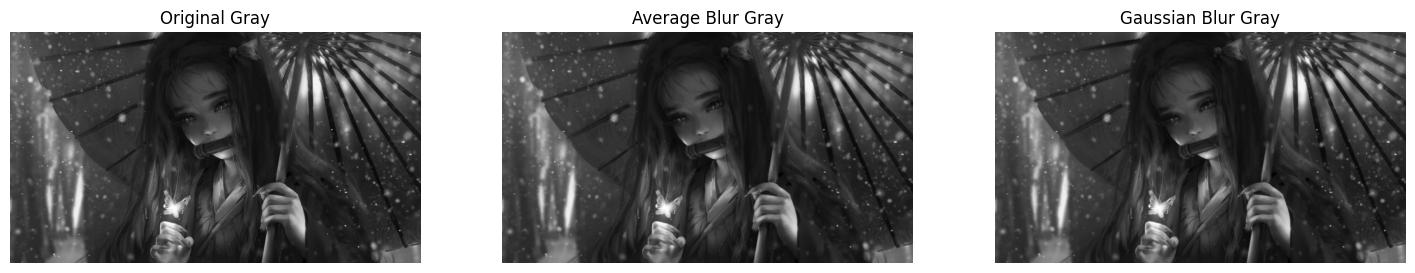

In [77]:
#plotting
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(average_blur_gray(img_gray, 3), cmap='gray')
plt.title("Average Blur Gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gray_gaussian_blur(img_gray, 3,1), cmap='gray')
plt.title("Gaussian Blur Gray")
plt.axis("off")

plt.show()


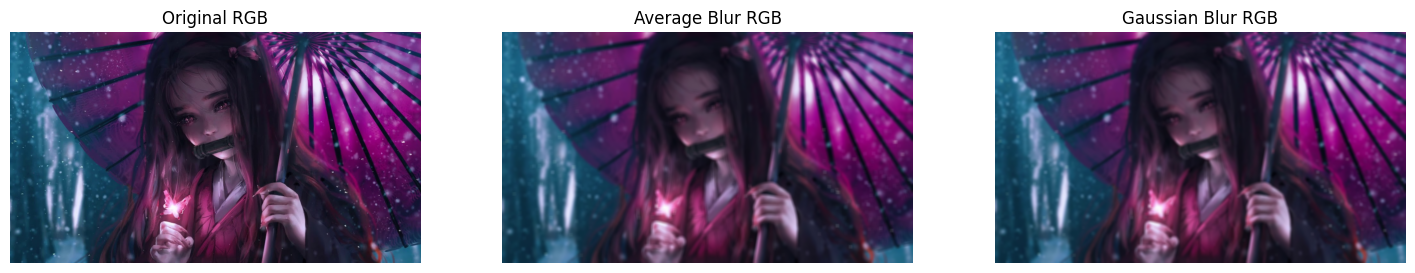

In [90]:
plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(average_blur_rgb(img ,11))
plt.title("Average Blur RGB")
plt.axis("off")

plt.subplot(1, 3, 3)
gauss_rgb = rgb_guassian_blur(img, 11, 5)
gauss_rgb = np.clip(gauss_rgb, 0, 255).astype(np.uint8)
plt.imshow( gauss_rgb)
plt.title("Gaussian Blur RGB")
plt.axis("off")

plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

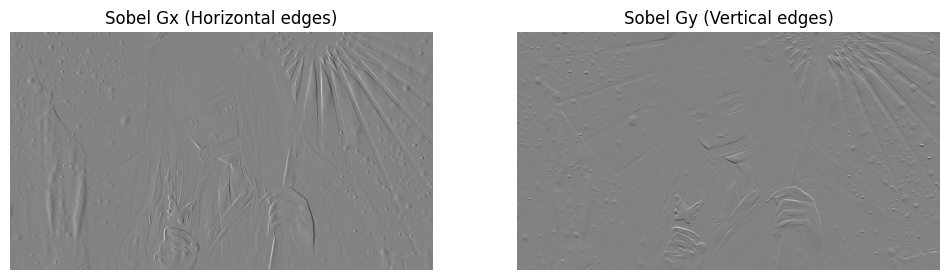

In [89]:
# Sobel kernels
sobel_x = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Gx and Gy
Gx = convolution(img_gray, sobel_x)
Gy = convolution(img_gray, sobel_y)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(Gx, cmap="gray")
plt.title("Sobel Gx (Horizontal edges)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(Gy, cmap="gray")
plt.title("Sobel Gy (Vertical edges)")
plt.axis("off")

plt.show()


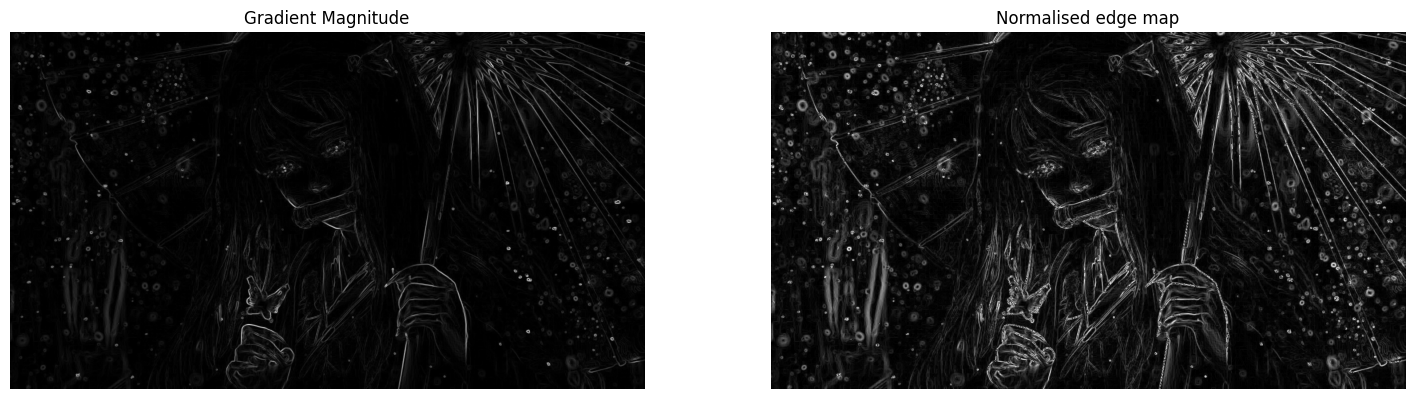

In [93]:
gradient_mag = np.sqrt(Gx**2 + Gy**2)

gradient_norm = gradient_mag / gradient_mag.max() * 255
gradient_norm = gradient_mag.astype(np.uint8)


plt.figure(figsize=(18 , 15))

plt.subplot(1, 2, 1)
plt.imshow(gradient_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.subplot(1, 2,2)
plt.imshow(gradient_norm, cmap='gray')
plt.title("Normalised edge map")
plt.axis("off")

plt.show()



### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

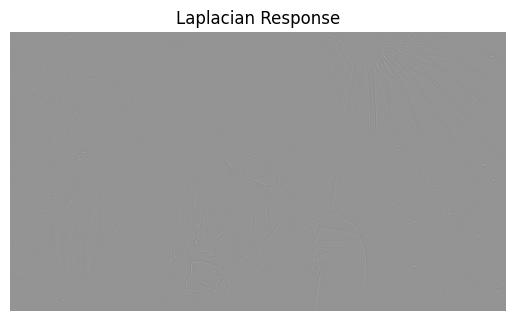

In [95]:
laplacian_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

lap = convolution(img_gray, laplacian_kernel)
plt.imshow(lap, cmap="gray")
plt.axis("off")
plt.title("Laplacian Response")
plt.show()


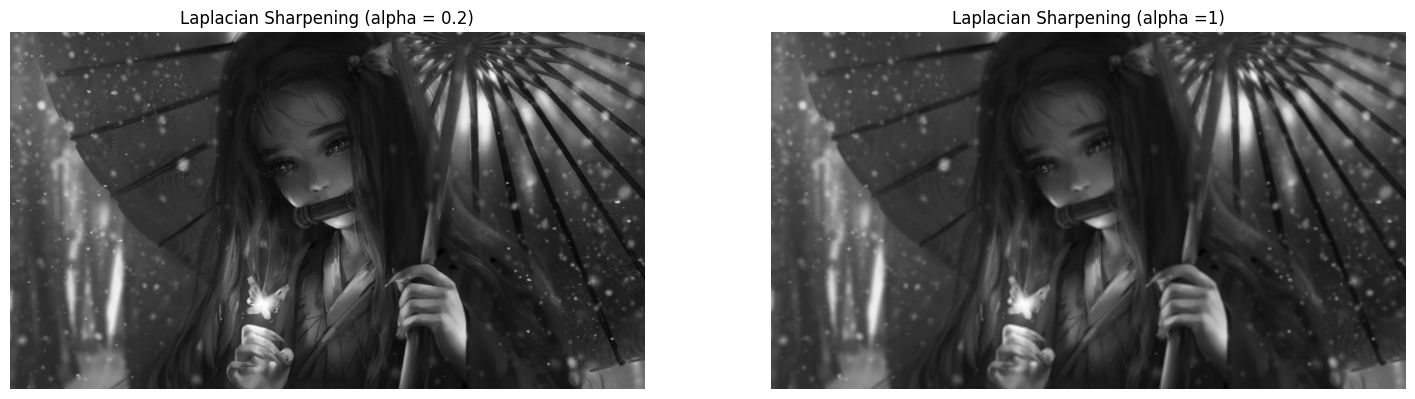

In [112]:
alpha = 0.2  #arbitrary values
sharp_alpha = img_gray - alpha * lap
sharp_alpha = np.clip(sharp_alpha, 0, 255).astype(np.uint8)


alpha = 1
sharp_alpha1 = img_gray - alpha*lap
sharp_alpha1 = np.clip(sharp_alpha1, 0, 255).astype(np.uint8)

plt.figure(figsize=(18 , 10))
plt.subplot(1,2,1)
plt.imshow(sharp_alpha, cmap="gray")
plt.axis("off")
plt.title(f"Laplacian Sharpening (alpha = 0.2)")


plt.subplot(1,2,2)
plt.imshow(sharp_alpha1, cmap="gray")
plt.axis("off")
plt.title("Laplacian Sharpening (alpha =1)")
plt.show()


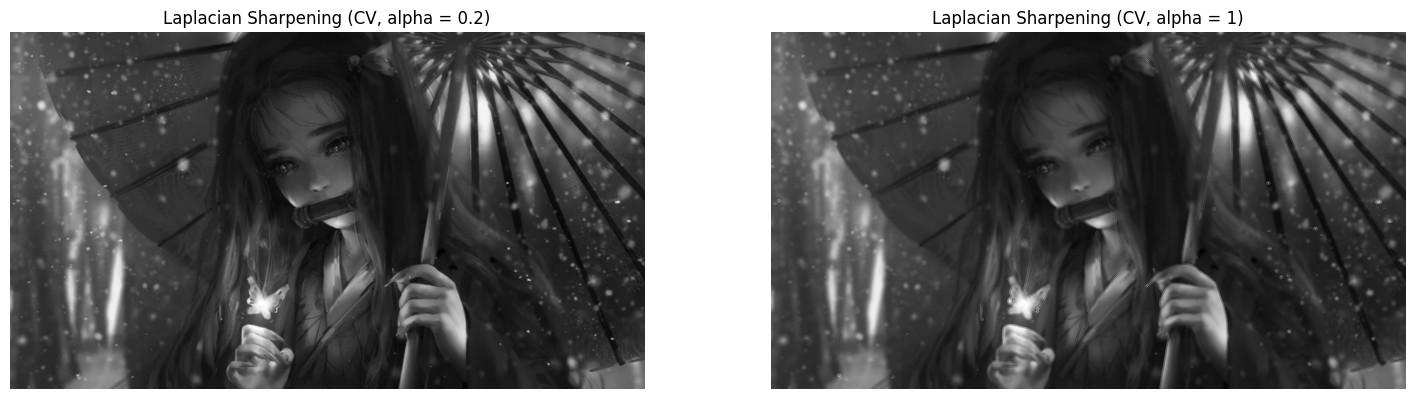

In [111]:
#  Laplacian using cv2
lap_cv = cv2.filter2D(img_gray.astype(np.float32), -1, laplacian_kernel)
alpha = 0.2
sharp_cv = img_gray - lap_cv*alpha
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)

plt.figure(figsize=(18 , 10))
plt.subplot(1,2,1)
plt.imshow(sharp_cv, cmap="gray")
plt.axis("off")
plt.title("Laplacian Sharpening (CV, alpha = 0.2)")

alpha = 1
sharp_cv10 = img_gray - lap_cv*alpha
sharp_cv10 = np.clip(sharp_cv10, 0, 255).astype(np.uint8)
plt.subplot(1,2,2)
plt.imshow(sharp_cv10, cmap="gray")
plt.axis("off")
plt.title("Laplacian Sharpening (CV, alpha = 1)")
plt.show()


In [116]:
# matrices comparing
diff = np.abs(sharp_alpha.astype(int) - sharp_cv.astype(int))
print("Difference:", diff.max())


Difference: 0


In [120]:
#task 2 Unsharp masking
def unsharp_masking(img_gray,alpha):
  img_blur=gray_gaussian_blur(img_gray,3,1)
  mask=img_gray-img_blur
  sharp=img_gray + alpha*mask
  return np.clip(sharp,0,255)



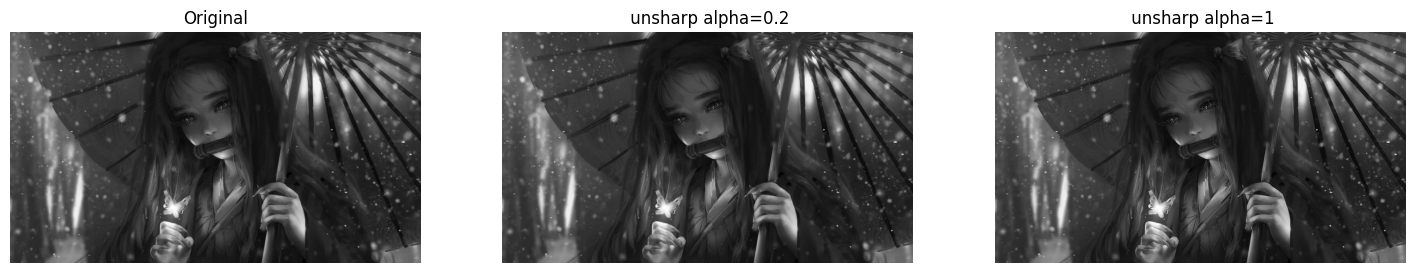

In [125]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(unsharp_masking(img_gray,0.2),cmap='gray')
plt.title(' unsharp alpha=0.2')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(unsharp_masking(img_gray,1),cmap='gray')
plt.title(' unsharp alpha=1')
plt.axis('off')
plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [126]:
def magnitude_spectrum(img_gray):
    img = img_gray.astype(float)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    magnitude = np.log(1 + np.abs(fshift))

    return magnitude


In [127]:
og_blur = magnitude_spectrum(img_gray)
g_blur = magnitude_spectrum(gray_gaussian_blur(img_gray, 3,1))
unsharp_blur = magnitude_spectrum(gray_gaussian_blur(img_gray, 3,4))


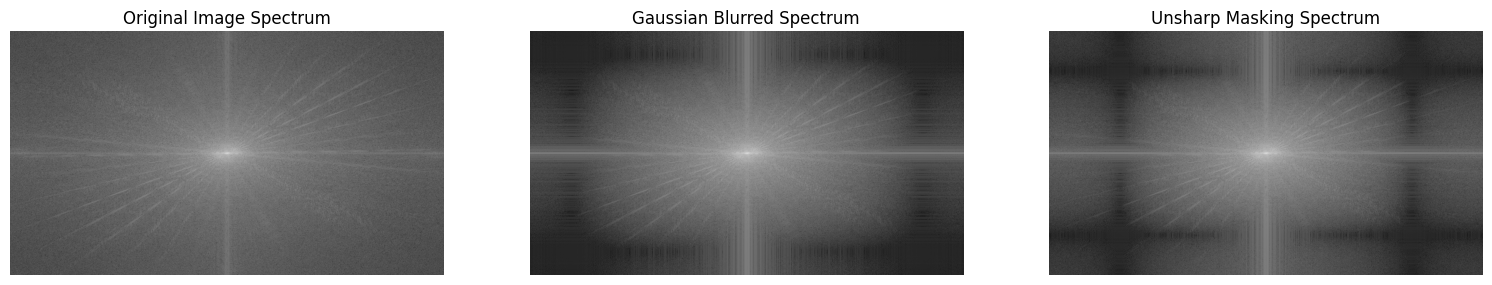

In [134]:
plt.figure(figsize=(19,14))

plt.subplot(1,3,1)
plt.imshow(og_blur, cmap='gray')
plt.title("Original Image Spectrum")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(g_blur, cmap='gray')
plt.title("Gaussian Blurred Spectrum")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(unsharp_blur, cmap='gray')
plt.title("Unsharp Masking Spectrum")
plt.axis("off")

plt.show()


In [ ]:
# The original image spectrum has a bright center.
# shows that low frequencies are more.
# After Gaussian blurring, the magnitude spectrum becomes more concentrated at the center.
# High frequency are reduced making darker corner.
# increasing alpha increases brightness in high-frequency

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

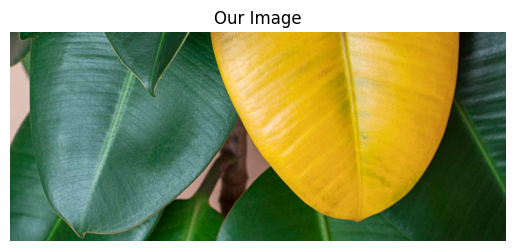

In [139]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [140]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

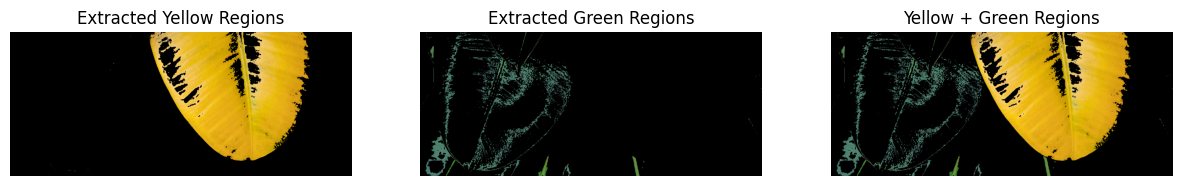

In [153]:
img_f = img_part5.astype(float)
R = img_f[:, :, 0]
G = img_f[:, :, 1]
B = img_f[:, :, 2]
yellow_mask = (R > 150) & (G > 150) & (B < 120)
green_mask = (G > 120) & (R < 120) & (B < 120)

#Extract yellow regions
yellow_img = np.zeros_like(img_part5)
yellow_img[yellow_mask] = img_part5[yellow_mask]
#extract green region
green_img = np.zeros_like(img_part5)
green_img[green_mask] = img_part5[green_mask]

#add them
combined_img = np.zeros_like(img)
combined_img[yellow_mask | green_mask] = img_part5[yellow_mask | green_mask]


plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.imshow(yellow_img)
plt.title("Extracted Yellow Regions")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green_img)
plt.title("Extracted Green Regions")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(combined_img)
plt.title("Yellow + Green Regions")
plt.axis("off")

plt.show()


In [154]:
R = img_part5[:, :, 0]
G = img_part5[:, :, 1]
B = img_part5[:, :, 2]

edge_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=float)

R_edge = convolution(R, edge_kernel)
G_edge = convolution(G, edge_kernel)

RG_diff = R - G
RG_edge = convolution(RG_diff, edge_kernel)
combined = (
    1.0 * np.abs(R_edge) +
    1.5 * np.abs(RG_edge) -
    0.5 * np.abs(G_edge)
)

# Normalize
combined = combined - combined.min()
combined = combined / combined.max() * 255
combined = combined.astype(np.uint8)

# Threshold for clean edges
threshold = 80
edges = np.zeros_like(combined)
edges[combined > threshold] = 255



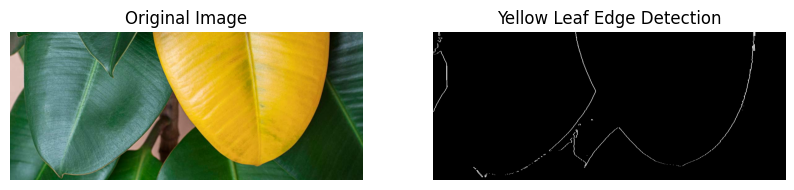

In [155]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Yellow Leaf Edge Detection")
plt.axis("off")

plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
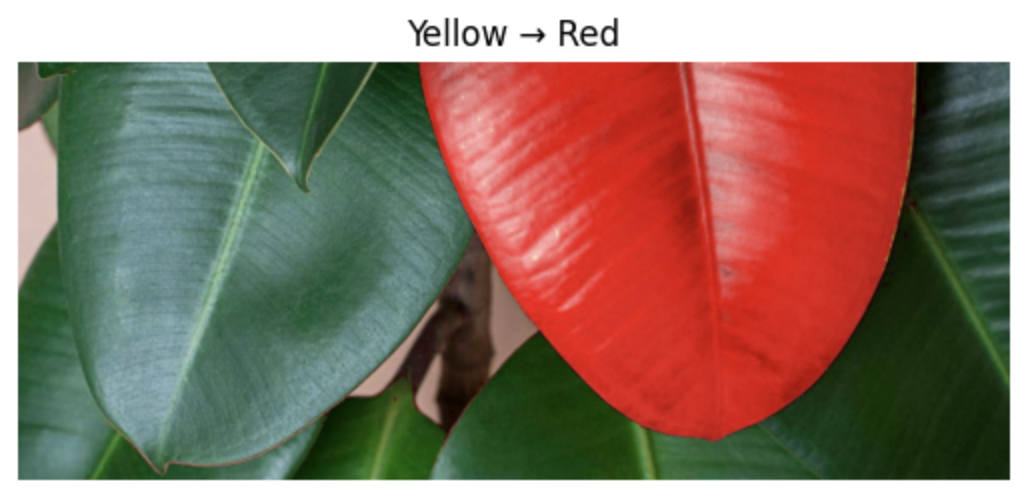

Also, we can change to a less brighter colour
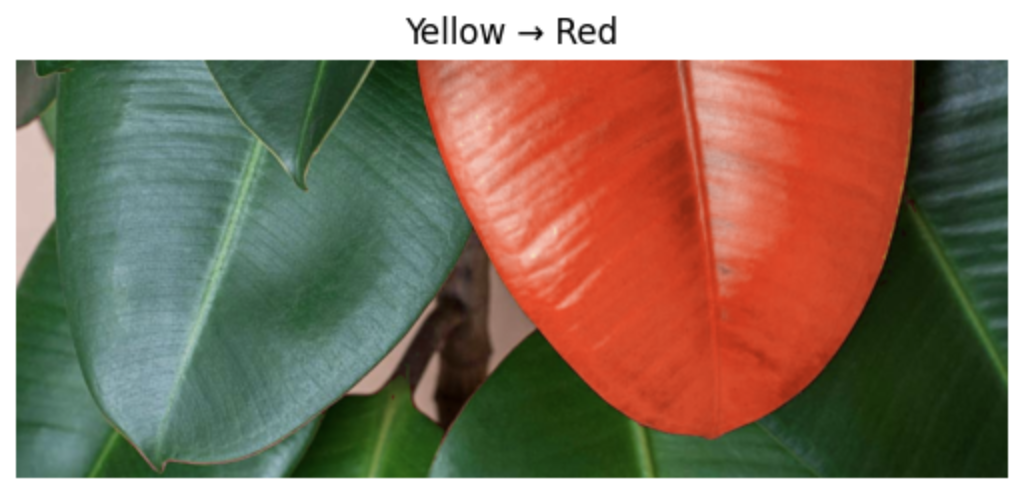

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.